# Last Man Standing

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import footballdata as foo
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(1234)
import pandas as pd

from matplotlib.pyplot import figure, show
import pprint as pp


In [2]:
print(foo.MatchHistory.__doc__)

Provides pandas.DataFrames from CSV files available at
    http://www.football-data.co.uk/data.php

    Column names are explained here: http://www.football-data.co.uk/notes.txt

    Data will be downloaded as necessary and cached locally in ./data

    Parameters
    ----------
    leagues : string or iterable of league-ids to include, None for all
    seasons : string, int or list of seasons. Examples:
              '16-17'; 2016; '2016-17'; [14, 15, 16]
    


In [3]:
foo.MatchHistory.available_leagues()

['BEL-Jupiler League',
 'ENG-Championship',
 'ENG-Conference',
 'ENG-League 1',
 'ENG-League 2',
 'ENG-Premier League',
 'ESP-La Liga',
 'ESP-La Liga 2',
 'FRA-Ligue 1',
 'FRA-Ligue 2',
 'GER-Bundesliga',
 'GER-Bundesliga 2',
 'GRE-Ethniki Katigoria',
 'ITA-Serie A',
 'ITA-Serie B',
 'NED-Eredivisie',
 'POR-Liga 1',
 'SCO-Division 1',
 'SCO-Division 2',
 'SCO-Division 3',
 'SCO-Premiership',
 'TUR-Ligi 1']

In [4]:
prem = foo.MatchHistory('ENG-Premier League', range(2016, 2017)).read_games()
prem.sample(5)

date  \
league             season game_id                                                   
ENG-Premier League 1617   2017-05-12 West Bromwich Albion-Chelsea      2017-05-12   
                          2017-04-15 Tottenham Hotspur-AFC Bournemouth 2017-04-15   
                          2017-04-30 Manchester United-Swansea City    2017-04-30   
                          2016-10-29 Manchester United-Burnley         2016-10-29   
                          2017-05-21 Leicester City-AFC Bournemouth    2017-05-21   

                                                                                   home_team  \
league             season game_id                                                              
ENG-Premier League 1617   2017-05-12 West Bromwich Albion-Chelsea       West Bromwich Albion   
                          2017-04-15 Tottenham Hotspur-AFC Bournemouth     Tottenham Hotspur   
                          2017-04-30 Manchester United-Swansea City        Manchester United   
                          2016-10-29 Manchester United-Burnley             Manchester United   
                          2017-05-21 Leicester City-AFC Bournemouth           Leicester City   

                                                                              away_team  \
league             season game_id                                                         
ENG-Premier League 1617   2017-05-12 West Bromwich Albion-Chelsea               Chelsea   
                          2017-04-15 Tottenham Hotspur-AFC Bournemouth  AFC Bournemouth   
                          2017-04-30 Manchester United-Swansea City        Swansea City   
                          2016-10-29 Manchester United-Burnley                  Burnley   
                          2017-05-21 Leicester City-AFC Bournemouth     AFC Bournemouth   

                                                                        FTHG  \
league             season game_id                                              
ENG-Premier League 1617   2017-05-12 West Bromwich Albion-Chelsea          0   
                          2017-04-15 Tottenham Hotspur-AFC Bournemouth     4   
                          2017-04-30 Manchester United-Swansea City        1   
                          2016-10-29 Manchester United-Burnley             0   
                          2017-05-21 Leicester City-AFC Bournemouth        1   

                                                                        FTAG  \
league             season game_id                                              
ENG-Premier League 1617   2017-05-12 West Bromwich Albion-Chelsea          1   
                          2017-04-15 Tottenham Hotspur-AFC Bournemouth     0   
                          2017-04-30 Manchester United-Swansea City        1   
                          2016-10-29 Manchester United-Burnley             0   
                          2017-05-21 Leicester City-AFC Bournemouth        1   

                                                                       FTR  \
league             season game_id                                            
ENG-Premier League 1617   2017-05-12 West Bromwich Albion-Chelsea        A   
                          2017-04-15 Tottenham Hotspur-AFC Bournemouth   H   
                          2017-04-30 Manchester United-Swansea City      D   
                          2016-10-29 Manchester United-Burnley           D   
                          2017-05-21 Leicester City-AFC Bournemouth      D   

                                                                        HTHG  \
league             season game_id                                              
ENG-Premier League 1617   2017-05-12 West Bromwich Albion-Chelsea          0   
                          2017-04-15 Tottenham Hotspur-AFC Bournemouth     2   
                          2017-04-30 Manchester United-Swansea City        1   
                          2016-10-29 Manchester United-Burnley             0   
                     

In [213]:
print(list(prem)) # columns of DataFrame

['date', 'home_team', 'away_team', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD', 'WHA', 'VCH', 'VCD', 'VCA', 'Bb1X2', 'BbMxH', 'BbAvH', 'BbMxD', 'BbAvD', 'BbMxA', 'BbAvA', 'BbOU', 'BbMx>2.5', 'BbAv>2.5', 'BbMx<2.5', 'BbAv<2.5', 'BbAH', 'BbAHh', 'BbMxAHH', 'BbAvAHH', 'BbMxAHA', 'BbAvAHA', 'PSCH', 'PSCD', 'PSCA']


#### TODO check correct formula and explain going from odds $\rightarrow$ prob

In [6]:
# odds are typically given for home team
def probs_from_odds(odds_win, odds_draw, odds_lose):
    prob_win, prob_draw, prob_lose = \
        map(lambda odds: odds / (1 + odds) , [odds_win, odds_draw, odds_lose])
    vig = prob_win + prob_draw + prob_lose - 1 # bookie's cut
    prob_win_normed, prob_draw_normed, prob_lose_normed = \
        map(lambda prob: prob / (1 + vig) , [prob_win, prob_draw, prob_lose])
    return prob_win_normed, prob_draw_normed, prob_lose_normed

In [7]:
probs_from_odds(3.10, 3.30, 2.50)

(0.33787160082557843, 0.342940942173299, 0.31918745700112244)

In [8]:
# Check seasons
prem_index = prem.index.get_values()
set([idx[1] for idx in prem_index])

{'1617'}

In [9]:
teams = list(prem.home_team.unique())
num_teams = len(teams)
print(teams)

['Burnley', 'Crystal Palace', 'Everton', 'Hull City', 'Manchester City', 'Middlesbrough', 'Southampton', 'AFC Bournemouth', 'Arsenal', 'Chelsea', 'Manchester United', 'Leicester City', 'Stoke City', 'Swansea City', 'Tottenham Hotspur', 'Watford', 'West Bromwich Albion', 'Sunderland', 'West Ham United', 'Liverpool']


## Winning probabilities matrix

What we want now is the matrix $X\in [0,1]^{38 \times 20}$, with elements defined by

$$X_{i,j} := p^{(i)}_j = \text{probability that team }j\text{ wins in week }i.$$

#### TODO Refactor to take odds from different bookies, maybe in `prob_from_odds`

In [10]:
num_teams = len(teams)
X = np.zeros( (2 * (num_teams - 1), num_teams))
X_index = np.empty((2 * (num_teams - 1), num_teams), dtype=object)
games_played_by_team = np.zeros(len(teams), dtype=int) # array keeps track of how many games each team has played

for index, row in prem.iterrows():
    j_home = teams.index(row["home_team"])
    j_away = teams.index(row["away_team"])
    i_home = games_played_by_team[j_home]
    i_away = games_played_by_team[j_away]
    home_prob, draw_prob, away_prob = probs_from_odds(row["B365H"], row["B365D"], row["B365A"])
    X[i_home, j_home] = home_prob
    X[i_away, j_away] = away_prob
    X_index[i_home, j_home] = index
    X_index[i_away, j_away] = index
    games_played_by_team[j_home] += 1
    games_played_by_team[j_away] += 1
    

In [11]:
print(np.where(X == 0))

(array([], dtype=int64), array([], dtype=int64))


In [12]:
print(X[24,5])
print(X_index[24,5])
game = prem.loc[X_index[24,5]]
home_prob, draw_prob, away_prob = probs_from_odds(game["B365H"], game["B365D"], game["B365A"])
print(home_prob, draw_prob, away_prob)

0.354387283101
('ENG-Premier League', '1617', '2017-02-11 Middlesbrough-Everton')
0.354387283101 0.341707952758 0.303904764141


The winning probabilities will be (very) small, even for the best ones. So let's use the $\log(\,\cdots\,)$ of the winning probability as our metric of 'goodness' for a strategy. 

In [13]:
def evaluate_perm(perm_list, X):
    """
      Gives log of winning probability of a permutation
    """
    winning_probs = X[np.arange(len(perm_list)), np.array(perm_list)]
    return np.sum(np.log(winning_probs))

In [14]:
def team_order_from_perm_list(perm_list, teams):
    """
        takes a list of integers and returns corresponding list of teams
    """
    ## check list 'full'
    if( not (sorted(perm_list) == list(range(len(perm_list))))):
        raise(ValueError("perm_list doesn't contain all integers from 0 to %d" % (len(perm_list) -1 )))
    team_choice = [teams[i] for i in perm_list]
    return team_choice

## Greedy strategy

First of all, let's do the most simple thing we can do: at each time, pick the team out of those you are allowed to with the highest winning probability for that week. We'll call this the *greedy strategy*.


In [15]:
def greedy_strategy(X, teams):
    """
        Given winning probability matrix X returns the "greedy" strategy
        permutation of teams - given as a list of integers.
    """
    ## Check dims of X ok
    num_weeks = X.shape[0]
    num_teams = X.shape[1]
    if (num_teams != len(teams)):
        raise(ValueError("X needs to have %d rows, has %d." % (num_teams, X.shape[1])))
    # generate sample
    visited = []
    for t in list(range(min(num_teams, num_weeks))):
        allowed = [i for i in list(range(num_teams)) if i not in visited]
        probs = X[t, allowed] / np.sum(X[t, allowed])
        sample = allowed[np.argmax(probs)]
        visited.append(sample)
    return visited

In [18]:
greedy_perm = greedy_strategy(X, teams)
greedy_strategy_result = {"opt_perm": greedy_perm, \
                          "opt_value": evaluate_perm(greedy_perm, X), \
                          "opt_team_list": team_order_from_perm_list(greedy_perm, teams)\
                         }
pp.pprint(greedy_strategy_result, compact=True)

{'opt_perm': [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19,
              10],
 'opt_team_list': ['Sunderland', 'Crystal Palace', 'Burnley', 'Southampton',
                   'AFC Bournemouth', 'Hull City', 'Stoke City', 'Swansea City',
                   'Middlesbrough', 'West Bromwich Albion', 'Watford',
                   'West Ham United', 'Tottenham Hotspur', 'Everton',
                   'Leicester City', 'Arsenal', 'Manchester City', 'Chelsea',
                   'Liverpool', 'Manchester United'],
 'opt_value': -20.572731020060896}


So by our earlier reasoning, any permutation of teams we can find that is higher than `greedy_strategy_result["opt_value"]` is a success!

## Greedy sampling strategy

Now let's do the second simplest thing we can think of.

**Greedy sampling (GS). ** At each timestep $t$, look at the teams that haven't previously been chosen. Choose a team randomly, where the probability is weighted by the odds of that team winning in week $t$.

More formally, let $\mathcal{A}(t)$ be the set of vertices allowed at time $t$, i.e. those that have not been chosen in times $1,2,\ldots,t-1$. Then,

$$\mathbb{P}\{ \text{choose team }j \text{ at time } t\} = \frac{p^{(t)}_j}{\sum_{k \in \mathcal{A}(t)} p^{(t)}_k}. $$

Let's try and provide some rough theoretical justification for this method of generating permutations of teams (you can skip this part if you believe me that this is an OK thing to do).

---

Suppose we have have chosen the permutation $\sigma = (\sigma(1), \sigma(2), \ldots, \sigma(n))$ according to the greedy sampling scheme. The probability of choosing this permutation is

$$ \mathbb{P}_{\sigma \sim \text{GS}}(\sigma) = \frac{p^{(1)}_{\sigma(1)}}{\sum_{k \in [n]} p^{(1)}_{k}} \cdot \frac{p^{(2)}_{\sigma(2)}}{\sum_{k \in [n]\setminus \{\sigma(1)\}} p^{(2)}_{k}} \cdot \frac{p^{(3)}_{\sigma(3)}}{\sum_{k \in [n]\setminus \{\sigma(1), \sigma(2)\}} p^{(3)}_{k}} \cdot \cdots \cdot  \frac{p^{(n-1)}_{\sigma(n-1)}}{\sum_{k \in [n]\setminus \{\sigma(1), \sigma(2), \ldots, \sigma(n-2)\}} p^{(n-1)}_{k}} \cdot 1 .$$

We then have that

$$\mathbb{P}\{\sigma \text{ wins}\} = p^{(n)}_{\sigma(n)} \cdot \left( \sum_{k \in [n]\setminus \{\sigma(1), \sigma(2), \ldots, \sigma(n-2)\}} p^{(n-1)}_{k} \right) \cdot \cdots \cdot \left( \sum_{k \in [n]} p^{(1)}_{k} \right) \cdot \mathbb{P}_{\sigma \sim \text{GS}}(\sigma). $$

Let's consider two permutations $\sigma_A$ and $\sigma_B$ and take the ratio of the winning probabilities:

$$ \frac{\mathbb{P}\{\sigma_A \text{ wins}\}}{\mathbb{P}\{\sigma_B \text{ wins}\}} = \frac{p^{(n)}_{\sigma_A(n)} \cdot \left( \sum_{k \in [n]\setminus \{\sigma_A(1), \sigma_A(2), \ldots, \sigma_A(n-2)\}} p^{(n-1)}_{k} \right) \cdot \cdots \cdot \left( \sum_{k \in [n]} p^{(1)}_{k} \right)}{ 
p^{(n)}_{\sigma_B(n)} \cdot \left( \sum_{k \in [n]\setminus \{\sigma_B(1), \sigma_B(2), \ldots, \sigma_B(n-2)\}} p^{(n-1)}_{k} \right) \cdot \cdots \cdot \left( \sum_{k \in [n]} p^{(1)}_{k} \right)
} \cdot \frac{\mathbb{P}_{\sigma_A \sim \text{GS}}(\sigma_A)}{\mathbb{P}_{\sigma_B \sim \text{GS}}(\sigma_B)} $$

That's a pretty hairy equation, so let's simplify with a bit of new notation: let $S_\sigma^{(t)} = [n]\setminus \{\sigma(1), \sigma(2), \ldots, \sigma(t)\}$ for $t\in\{0,1,\ldots, n\}$. Just to clarify:

$$S^{(n)}_\sigma = \emptyset, \ S^{(n-1)}_\sigma = \{ \sigma(n) \},\ \ldots, \ S^{1}_\sigma = [n] \setminus \{\sigma(1)\},\ S^{(0)}_\sigma = [n]$$

and $\left|S^{(t)}_\sigma\right| = n-t$.

Moreover, let's call the ratio 

$$ R^{(t)} = \frac{\sum_{k\in S^{(t -1 )}_{\sigma_A}} p_k^{(t)} } 
{\sum_{k\in S^{(t -1 )}_{\sigma_B}} p_k^{(t)}} $$

for $t \in \{1,\ldots, n\} $. We can now have the more succinct

$$
\frac{\mathbb{P}\{\sigma_A \text{ wins}\}}{\mathbb{P}\{\sigma_B \text{ wins}\}} = \prod^{n}_{t=1}R^{(t)} \cdot \frac{\mathbb{P}_{\sigma_A \sim \text{GS}}(\sigma_A)}{\mathbb{P}_{\sigma_B \sim \text{GS}}(\sigma_B)} 
$$

Now for the dodgy bit: let's now assume that we choose the permutations $\sigma_A, \sigma_B \sim \operatorname{Uni}(\mathbb{S}_n)$, i.e. uniformly at random; and that the $p^{(i)}_j$ are independent and identically distributed on the open interval $(0,1)$. Moreover, define $\mu = \mathbb{E}[p^{(i)}_j]$. Let us try and estimate the quantity $\mathbb{E}\left[ \frac{1}{\prod^{n}_{t=1}R^{(t)}} \cdot \frac{\mathbb{P}\{\sigma_A \text{ wins}\}}{\mathbb{P}\{\sigma_B \text{ wins}\}} \right]$ as a proxy for the ratio $\frac{\mathbb{P}_{\sigma_A \sim \text{GS}}(\sigma_A)}{\mathbb{P}_{\sigma_B \sim \text{GS}}(\sigma_B)}$. We then have


$$\mathbb{E}\left[ \frac{1}{\prod^{n}_{t=1}R^{(t)}} \cdot \frac{\mathbb{P}\{\sigma_A \text{ wins}\}}{\mathbb{P}\{\sigma_B \text{ wins}\}} \right] = \mathbb{E}\left[ \prod^{n}_{t=1}R^{(t)} \cdot \frac{\mathbb{P}\{\sigma_A \text{ wins}\}}{\mathbb{P}\{\sigma_B \text{ wins}\}} \right] = \mathbb{E}\left[ \prod^{n}_{t=1}R^{(t)}\right] \cdot \frac{\mathbb{P}\{\sigma_A \text{ wins}\}}{\mathbb{P}\{\sigma_B \text{ wins}\}}, $$

where we obtain the first equality by symmetry and the second from linearity of expectation.


Let's now take the expectation value of $\prod^{n}_{t=1}R^{(t)}$. By linearity of expectation, we have that

$$\mathbb{E} \left[ \prod^{n}_{t=1}R^{(t)} \right] = \prod^{n}_{t=1} \mathbb{E} \left[ R^{(t)}\right].$$

Now, 

$$ \mathbb{E} \left[ R^{(t)}\right] = \frac{1}{n!} \sum_{\sigma_A \in \mathbb{S}_n} \sum_{k \in S^{(t)}_{\sigma_A}} \mathbb{E}\left[ p^{(t)}_k \right] \cdot \frac{1}{n!} \sum_{\sigma_B \in \mathbb{S}_n}\frac{1}{ \sum_{k \in S^{(t)}_{\sigma_B}} \mathbb{E}\left[ p^{(t)}_k \right]} \\
= \frac{1}{n!} \sum_{\sigma_A \in \mathbb{S}_n} \sum_{k \in S^{(t)}_{\sigma_A}} \mu \cdot \frac{1}{n!} \sum_{\sigma_B \in \mathbb{S}_n} \frac{1}{\sum_{k \in S^{(t)}_{\sigma_B}} \mu} \\
\frac{1}{n!} \sum_{\sigma_A \in \mathbb{S}_n} (n-t) \mu \cdot \frac{1}{n!} \sum_{\sigma_B \in \mathbb{S}_n} \frac{1}{(n-t) \mu} = 1.
$$

So that means, under some somewhat shaky assumptions, we have

$$
\frac{\mathbb{P}_{\sigma_A \sim \text{GS}}(\sigma_A)}{\mathbb{P}_{\sigma_B \sim \text{GS}}(\sigma_B)} \approx
\frac{\mathbb{P}\{\sigma_A \text{ wins}\}}{\mathbb{P}\{\sigma_B \text{ wins}\}} , 
$$

so sampling permutations from the GS distribution hopefully gives us samples somewhat consistent with sampling permutations with probability proportional to their winning probabilities -- that is -- the permutation with the highest winning probability should be sampled with the highest probability according to GS.

In [19]:
def greedy_sample(X, teams):
    """
        Given winning probability matrix X returns a "greedy" sample
        permutation of teams - given as a list of integers.
    """
    ## Check dims of X ok
    num_weeks = X.shape[0]
    num_teams = X.shape[1]
    if (num_teams != len(teams)):
        raise(ValueError("X needs to have %d rows, has %d." % (num_teams, X.shape[1])))
    # generate samples
    visited = []
    for t in list(range(min(num_teams, num_weeks))):
        allowed = [i for i in list(range(num_teams)) if i not in visited]
        probs = X[t, allowed] / np.sum(X[t, allowed])
        sample = np.random.choice(allowed, p=probs)
        visited.append(sample)
    return visited

In [20]:
greedy_sample(X, teams)

[12, 2, 11, 9, 17, 14, 18, 4, 3, 13, 16, 19, 7, 5, 8, 15, 6, 0, 1, 10]

### Take many greedy samples and save the best

In [214]:
def greedy_sample_strategy(X, teams, num_iterations):
    optimal_sampled_perm = []
    optimal_value = -float("inf")
    optimal_t = 0
    for t in range(num_iterations - 1):
        if (t % 1000 == 0):
            print("Run %d of %d. Current optimal value is %.4f observed at run %d." \
                  % (t, num_iterations, optimal_value, optimal_t))
        sample = greedy_sample(X, teams)
        value = evaluate_perm(sample, X)
        if (value > optimal_value):
            optimal_value = value
            optimal_sampled_perm = sample[:]
            optimal_t = t
    return optimal_sampled_perm, optimal_value

In [22]:
num_iterations = 1000000
greedy_opt_perm, greedy_opt_val = greedy_sample_strategy(X, teams, num_iterations)
greedy_sample_result = {"opt_perm": greedy_opt_perm, \
                        "opt_value": greedy_opt_val, \
                        "opt_team_list": team_order_from_perm_list(greedy_opt_perm, teams)\
                       }

Run 0 of 1000000. Current optimal value is -inf observed at run 0.
Run 1000 of 1000000. Current optimal value is -20.8488 observed at run 781.
Run 2000 of 1000000. Current optimal value is -20.8488 observed at run 781.
Run 3000 of 1000000. Current optimal value is -20.8488 observed at run 781.
Run 4000 of 1000000. Current optimal value is -20.8488 observed at run 781.


KeyboardInterrupt: 

In [210]:
pp.pprint(greedy_sample_result, compact=True)

{'opt_perm': [15, 18, 19, 4, 7, 13, 0, 10, 6, 16, 2, 1, 14, 9, 5, 3, 8, 12, 17,
              11],
 'opt_team_list': ['Watford', 'West Ham United', 'Liverpool', 'Manchester City',
                   'AFC Bournemouth', 'Swansea City', 'Burnley',
                   'Manchester United', 'Southampton', 'West Bromwich Albion',
                   'Everton', 'Crystal Palace', 'Tottenham Hotspur', 'Chelsea',
                   'Middlesbrough', 'Hull City', 'Arsenal', 'Stoke City',
                   'Sunderland', 'Leicester City'],
 'opt_value': -20.226585488990679}


## Metropolis Strategy

The justification for the Greedy Sampling procedure leads us down another potential solution path: can we sample from a probability distribution over $\mathbb{S}_n$ such that the ratio of samples of two permutations that occurs is $\frac{\mathbb{P}\{\sigma_A \text{ wins}\}}{\mathbb{P}\{\sigma_B \text{ wins}\}}$? It turns out we can (sort of), using the Metropolis algorithm!

**What do you mean "sort of"?**

### TODO discuss mixing, burn-in etc

In [ ]:
def metropolis_sample(X, teams, burn_in, start_perm):
    """
    Returns a Metropolis-sampled permutation after `burn_in` steps, starting from `start_perm`.
    Acceptance probability ratio is winning probability ratio.
    """
    ## Check dims of X, start_perm ok
    num_weeks = X.shape[0]
    num_teams = X.shape[1]
    if (num_teams != len(teams)):
        raise(ValueError("X needs to have %d rows, has %d." % (num_teams, X.shape[1])))
    if( not (sorted(start_perm) == list(range(len(start_perm))))):
        raise(ValueError("start_perm doesn't contain all integers from 0 to %d" % (len(start_perm) -1 )))
    
    out_perm = start_perm[:]
    out_val = evaluate_perm(out_perm, X)
    for t in range(burn_in):
        idx1, idx2 = np.random.choice(len(teams), 2, replace=False)
        candidate_perm = out_perm[:]
        candidate_perm[idx1], candidate_perm[idx2] = candidate_perm[idx2], candidate_perm[idx1]
        candidate_val = evaluate_perm(candidate_perm, X)
        ratio = np.exp(candidate_val) / np.exp(out_val)  # evaluate_perm() is log of winnning probability
        
        accept = False
        if (ratio >= 1):
            accept = True
        else:
            beta = 7
            accept = np.random.rand() <= np.exp(- beta * ratio)
            #accept = np.random.rand() <= ratio
        if (accept):
            print("accept", t, candidate_val, out_val, ratio, out_perm)
            out_perm = candidate_perm[:]
            out_val = candidate_val
            
    return out_perm, out_val        

In [247]:
def metropolis_sample_strategy(X, teams, burn_in, start_perm, num_samples):
    """
    Return the permutation giving the maximum winning probability after `num_samples`
    Metropolis samples
    """
    optimal_perm = start_perm[:]
    optimal_val = evaluate_perm(optimal_perm, X)
    for t in range(num_samples):
        if (t % 100 == 0):
            print("Run %d of %d. Current optimal value is %.4f." \
                  % (t, num_samples, optimal_val))
        sample_perm, sample_val = metropolis_sample(X, teams, burn_in, start_perm)
        if (sample_val > optimal_val):
            optimal_val = sample_val
            optimal_perm = sample_perm[:]
    return optimal_perm, optimal_val    

### Determine "nice" `burn_in`

Discuss Lehvenshtein 'edit distance' - relation transposition distance

In [248]:
import editdistance

In [ ]:
burn_ins = np.arange(10, 500, 10)
num_trials = 50
distance_arr = np.zeros(burn_ins.shape)
std_arr = np.zeros(burn_ins.shape)
for idx, _ in enumerate(burn_ins):
    distances = np.zeros(num_trials)
    for trial in range(num_trials):
        sampled_perm, _ = metropolis_sample(X, teams, burn_in, greedy_perm)
        distances[trial] = editdistance.eval(sampled_perm, greedy_perm)
    distance_arr[idx] = np.mean(distances)
    std_arr[idx] = np.std(distances) / np.sqrt(num_trials)

accept 0 -20.7544692955 -20.5727310201 1.19930026647 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 1 -21.0247225715 -20.7544692955 1.31029627537 [17, 1, 0, 6, 7, 3, 12, 15, 5, 16, 13, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 2 -21.2074621504 -21.0247225715 1.20050173139 [17, 1, 0, 6, 7, 3, 12, 5, 15, 16, 13, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 3 -21.4781322829 -21.2074621504 1.31084259463 [17, 2, 0, 6, 7, 3, 12, 5, 15, 16, 13, 18, 14, 1, 11, 8, 4, 9, 19, 10]
accept 6 -21.7633958474 -21.4781322829 1.33011255234 [3, 2, 0, 6, 7, 17, 12, 5, 15, 16, 13, 18, 14, 1, 11, 8, 4, 9, 19, 10]
accept 7 -21.9530926184 -21.7633958474 1.20888297379 [3, 2, 0, 6, 18, 17, 12, 5, 15, 16, 13, 7, 14, 1, 11, 8, 4, 9, 19, 10]
accept 8 -22.3925693757 -21.9530926184 1.55189498825 [3, 12, 0, 6, 18, 17, 2, 5, 15, 16, 13, 7, 14, 1, 11, 8, 4, 9, 19, 10]
accept 9 -22.6775789275 -22.3925693757 1.32977472977 [3, 12, 0, 18, 6, 17, 2, 5, 15, 16, 13, 7, 14, 1, 11, 8, 4, 9, 19, 10]
accept 1

accept 15 -22.3282059482 -22.2845417386 1.04463151874 [5, 10, 0, 12, 13, 3, 17, 16, 8, 4, 15, 18, 14, 2, 11, 7, 6, 9, 19, 1]
accept 21 -22.5290161131 -22.3282059482 1.22239269683 [16, 10, 0, 12, 13, 3, 17, 5, 8, 4, 15, 18, 14, 2, 11, 7, 6, 9, 19, 1]
accept 22 -22.8501052443 -22.5290161131 1.37862845415 [16, 10, 0, 12, 13, 3, 17, 5, 8, 4, 15, 18, 14, 2, 9, 7, 6, 11, 19, 1]
accept 23 -22.8794965759 -22.8501052443 1.02982751967 [16, 10, 0, 12, 13, 3, 17, 5, 8, 4, 6, 18, 14, 2, 9, 7, 15, 11, 19, 1]
accept 24 -23.1857838619 -22.8794965759 1.35837249198 [16, 10, 0, 1, 13, 3, 17, 5, 8, 4, 6, 18, 14, 2, 9, 7, 15, 11, 19, 12]
accept 25 -23.3555444533 -23.1857838619 1.18502111311 [16, 10, 0, 14, 13, 3, 17, 5, 8, 4, 6, 18, 1, 2, 9, 7, 15, 11, 19, 12]
accept 27 -23.5451641672 -23.3555444533 1.20878982424 [16, 10, 0, 19, 13, 3, 17, 5, 8, 4, 6, 18, 1, 2, 9, 7, 15, 11, 14, 12]
accept 31 -23.6913097677 -23.5451641672 1.1573646887 [13, 10, 0, 19, 16, 3, 17, 5, 8, 4, 6, 18, 1, 2, 9, 7, 15, 11, 14, 12]
a

accept 88 -24.7811224531 -24.2975040811 1.62193255263 [13, 16, 5, 15, 1, 4, 11, 8, 2, 18, 6, 0, 3, 12, 17, 7, 14, 19, 9, 10]
accept 89 -24.851724447 -24.7811224531 1.07315401894 [13, 16, 5, 18, 1, 4, 11, 8, 2, 15, 6, 0, 3, 12, 17, 7, 14, 19, 9, 10]
accept 91 -24.866379421 -24.851724447 1.0147628847 [13, 16, 5, 18, 1, 10, 11, 8, 2, 15, 6, 0, 3, 12, 17, 7, 14, 19, 9, 4]
accept 97 -24.9129634195 -24.866379421 1.04768607945 [13, 16, 5, 18, 1, 10, 2, 8, 11, 15, 6, 0, 3, 12, 17, 7, 14, 19, 9, 4]
accept 98 -25.0229387338 -24.9129634195 1.11625051463 [13, 16, 5, 18, 1, 2, 10, 8, 11, 15, 6, 0, 3, 12, 17, 7, 14, 19, 9, 4]
accept 0 -20.9922701272 -20.5727310201 1.52126025597 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 1 -21.4593708383 -20.9922701272 1.59536206599 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 11, 18, 14, 2, 15, 8, 4, 9, 19, 10]
accept 2 -21.6923828484 -21.4593708383 1.26239664077 [17, 1, 0, 14, 7, 3, 12, 13, 5, 16, 11, 18, 6, 2, 15, 8, 4, 9, 19, 10]
accept 3

accept 18 -22.7637845766 -22.5650072376 1.21991030915 [11, 5, 14, 17, 7, 12, 3, 8, 9, 4, 15, 18, 6, 16, 0, 13, 2, 19, 1, 10]
accept 21 -22.8413726185 -22.7637845766 1.08067737314 [11, 5, 14, 17, 8, 12, 3, 7, 9, 4, 15, 18, 6, 16, 0, 13, 2, 19, 1, 10]
accept 22 -22.8529007457 -22.8413726185 1.01159483215 [9, 5, 14, 17, 8, 12, 3, 7, 11, 4, 15, 18, 6, 16, 0, 13, 2, 19, 1, 10]
accept 28 -22.9484823229 -22.8529007457 1.10029857771 [9, 5, 17, 14, 8, 12, 3, 7, 11, 4, 15, 18, 6, 16, 0, 13, 2, 19, 1, 10]
accept 29 -22.980183331 -22.9484823229 1.03220883708 [9, 5, 15, 14, 8, 12, 3, 7, 11, 4, 17, 18, 6, 16, 0, 13, 2, 19, 1, 10]
accept 30 -23.0534997614 -22.980183331 1.07607098455 [9, 5, 15, 14, 8, 12, 3, 7, 11, 4, 6, 18, 17, 16, 0, 13, 2, 19, 1, 10]
accept 34 -23.2125198729 -23.0534997614 1.17236152448 [9, 5, 15, 14, 8, 12, 3, 7, 11, 13, 6, 18, 17, 16, 0, 4, 2, 19, 1, 10]
accept 46 -23.2559678382 -23.2125198729 1.04440564755 [9, 5, 15, 1, 8, 12, 3, 7, 11, 13, 6, 18, 17, 16, 0, 4, 2, 19, 14, 10]
ac

accept 90 -24.2315494225 -24.2119620503 1.01978046344 [0, 4, 16, 7, 18, 13, 17, 19, 11, 12, 6, 3, 8, 5, 1, 9, 14, 15, 2, 10]
accept 92 -24.4249110676 -24.2315494225 1.21332150592 [0, 9, 16, 7, 18, 13, 17, 19, 11, 12, 6, 3, 8, 5, 1, 4, 14, 15, 2, 10]
accept 95 -24.745190589 -24.4249110676 1.37751275488 [0, 9, 16, 7, 18, 1, 17, 19, 11, 12, 6, 3, 8, 5, 13, 4, 14, 15, 2, 10]
accept 96 -25.0904758468 -24.745190589 1.41239275823 [0, 9, 16, 7, 11, 1, 17, 19, 18, 12, 6, 3, 8, 5, 13, 4, 14, 15, 2, 10]
accept 98 -25.2204422868 -25.0904758468 1.13879016485 [0, 9, 16, 7, 11, 19, 17, 1, 18, 12, 6, 3, 8, 5, 13, 4, 14, 15, 2, 10]
accept 0 -20.7407706316 -20.5727310201 1.18298346947 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 1 -21.1076218952 -20.7407706316 1.44318324928 [2, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 18, 14, 17, 11, 8, 4, 9, 19, 10]
accept 2 -21.407164239 -21.1076218952 1.34924117773 [2, 1, 0, 6, 7, 14, 12, 13, 5, 16, 15, 18, 3, 17, 11, 8, 4, 9, 19, 10]
accept

accept 12 -22.7648190775 -22.4007162692 1.43922217061 [17, 4, 6, 13, 7, 3, 16, 0, 19, 1, 15, 18, 5, 10, 11, 12, 14, 9, 8, 2]
accept 13 -22.9351525337 -22.7648190775 1.1857001644 [17, 4, 6, 13, 7, 3, 18, 0, 19, 1, 15, 16, 5, 10, 11, 12, 14, 9, 8, 2]
accept 17 -23.1866817521 -22.9351525337 1.28599047413 [17, 4, 6, 13, 7, 3, 18, 1, 19, 0, 15, 16, 5, 10, 11, 12, 14, 9, 8, 2]
accept 20 -23.4486169371 -23.1866817521 1.29944231631 [17, 7, 6, 13, 4, 3, 18, 1, 19, 0, 15, 16, 5, 10, 11, 12, 14, 9, 8, 2]
accept 21 -23.4791255389 -23.4486169371 1.03097875833 [0, 7, 6, 13, 4, 3, 18, 1, 19, 17, 15, 16, 5, 10, 11, 12, 14, 9, 8, 2]
accept 25 -23.7375429121 -23.4791255389 1.2948791537 [0, 7, 6, 19, 4, 3, 18, 1, 13, 17, 15, 16, 5, 10, 11, 12, 14, 9, 8, 2]
accept 37 -23.8032979599 -23.7375429121 1.06796508467 [0, 11, 6, 19, 4, 3, 18, 1, 13, 17, 15, 16, 5, 10, 7, 12, 14, 9, 8, 2]
accept 39 -23.8475760083 -23.8032979599 1.04527295095 [0, 17, 6, 19, 4, 3, 18, 1, 13, 11, 15, 16, 5, 10, 7, 12, 14, 9, 8, 2]
ac

accept 22 -23.3118150016 -22.9688267781 1.40915216705 [17, 16, 10, 6, 18, 3, 19, 7, 5, 0, 8, 15, 11, 14, 9, 4, 13, 2, 12, 1]
accept 23 -23.5152999418 -23.3118150016 1.22566669915 [17, 16, 10, 0, 18, 3, 19, 7, 5, 6, 8, 15, 11, 14, 9, 4, 13, 2, 12, 1]
accept 25 -23.8332241355 -23.5152999418 1.37427207879 [17, 16, 10, 0, 18, 3, 5, 7, 19, 6, 8, 15, 11, 14, 9, 4, 13, 2, 12, 1]
accept 32 -23.9996794024 -23.8332241355 1.18111069997 [5, 16, 10, 0, 18, 3, 17, 7, 19, 6, 8, 15, 11, 14, 9, 4, 13, 2, 12, 1]
accept 33 -24.1889034329 -23.9996794024 1.20831162078 [6, 16, 10, 0, 18, 3, 17, 7, 19, 5, 8, 15, 11, 14, 9, 4, 13, 2, 12, 1]
accept 35 -24.2496586804 -24.1889034329 1.06263879884 [6, 16, 10, 0, 2, 3, 17, 7, 19, 5, 8, 15, 11, 14, 9, 4, 13, 18, 12, 1]
accept 38 -24.5230855429 -24.2496586804 1.3144612193 [6, 16, 10, 0, 2, 3, 17, 7, 19, 5, 9, 15, 11, 14, 8, 4, 13, 18, 12, 1]
accept 63 -24.5500719945 -24.5230855429 1.02735388369 [6, 16, 10, 0, 2, 3, 17, 7, 19, 5, 9, 15, 11, 14, 8, 4, 12, 18, 13, 1]
a

accept 8 -23.0820656753 -22.7043244917 1.45898528467 [19, 14, 0, 18, 17, 3, 11, 13, 4, 10, 15, 6, 1, 2, 12, 8, 5, 9, 7, 16]
accept 9 -23.286482046 -23.0820656753 1.22680885436 [19, 14, 0, 18, 11, 3, 17, 13, 4, 10, 15, 6, 1, 2, 12, 8, 5, 9, 7, 16]
accept 14 -23.8083015706 -23.286482046 1.68509092642 [19, 14, 0, 18, 11, 2, 17, 13, 4, 10, 15, 6, 1, 3, 12, 8, 5, 9, 7, 16]
accept 15 -24.149106817 -23.8083015706 1.40607937521 [19, 14, 0, 18, 11, 2, 17, 12, 4, 10, 15, 6, 1, 3, 13, 8, 5, 9, 7, 16]
accept 24 -24.2032797208 -24.149106817 1.05566711519 [19, 14, 6, 18, 11, 2, 17, 12, 4, 10, 15, 0, 1, 3, 13, 8, 5, 9, 7, 16]
accept 25 -24.2424832953 -24.2032797208 1.03998217601 [17, 14, 6, 18, 11, 2, 19, 12, 4, 10, 15, 0, 1, 3, 13, 8, 5, 9, 7, 16]
accept 26 -24.4051061857 -24.2424832953 1.17659290154 [17, 14, 6, 18, 11, 2, 19, 12, 4, 10, 15, 0, 1, 5, 13, 8, 3, 9, 7, 16]
accept 30 -24.5878371844 -24.4051061857 1.20049143086 [4, 14, 6, 18, 11, 2, 19, 12, 17, 10, 15, 0, 1, 5, 13, 8, 3, 9, 7, 16]
accept

accept 50 -23.7998537088 -23.6401532381 1.17315942283 [2, 14, 18, 7, 3, 5, 9, 12, 0, 10, 19, 15, 11, 17, 1, 16, 4, 13, 6, 8]
accept 63 -23.8695177067 -23.7998537088 1.0721478767 [2, 14, 7, 18, 3, 5, 9, 12, 0, 10, 19, 15, 11, 17, 1, 16, 4, 13, 6, 8]
accept 64 -23.9296728137 -23.8695177067 1.06200125769 [2, 14, 7, 18, 3, 5, 9, 4, 0, 10, 19, 15, 11, 17, 1, 16, 12, 13, 6, 8]
accept 80 -23.9687242249 -23.9296728137 1.03982394086 [2, 14, 7, 18, 3, 5, 9, 4, 0, 10, 19, 17, 11, 15, 1, 16, 12, 13, 6, 8]
accept 86 -24.149806839 -23.9687242249 1.1985141893 [2, 14, 7, 18, 3, 5, 9, 4, 0, 10, 19, 17, 11, 15, 1, 16, 12, 8, 6, 13]
accept 89 -24.2586456048 -24.149806839 1.11498256251 [2, 14, 7, 18, 3, 12, 9, 4, 0, 10, 19, 17, 11, 15, 1, 16, 5, 8, 6, 13]
accept 91 -24.3878687158 -24.2586456048 1.13794398373 [2, 14, 7, 18, 3, 4, 9, 12, 0, 10, 19, 17, 11, 15, 1, 16, 5, 8, 6, 13]
accept 0 -20.7436195332 -20.5727310201 1.18635847822 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accep

accept 49 -24.9435531078 -24.773107674 1.18583294386 [17, 13, 11, 9, 1, 0, 2, 12, 18, 10, 4, 3, 19, 5, 6, 14, 15, 16, 8, 7]
accept 60 -25.0114002457 -24.9435531078 1.07020170267 [17, 13, 11, 9, 1, 0, 2, 12, 18, 10, 4, 16, 19, 5, 6, 14, 15, 3, 8, 7]
accept 61 -25.0297946748 -25.0114002457 1.01856464864 [17, 13, 11, 9, 1, 0, 2, 12, 18, 10, 4, 16, 19, 5, 6, 14, 15, 8, 3, 7]
accept 0 -20.9087377337 -20.5727310201 1.39934841946 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 1 -21.3612011693 -20.9087377337 1.57218038418 [17, 1, 0, 6, 7, 3, 5, 13, 12, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 2 -21.3755987435 -21.3612011693 1.01450171846 [17, 1, 0, 13, 7, 3, 5, 6, 12, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 4 -21.4607048417 -21.3755987435 1.08883258378 [17, 1, 0, 13, 7, 3, 5, 6, 11, 16, 15, 18, 14, 2, 12, 8, 4, 9, 19, 10]
accept 5 -21.6382757612 -21.4607048417 1.19431275491 [7, 1, 0, 13, 17, 3, 5, 6, 11, 16, 15, 18, 14, 2, 12, 8, 4, 9, 19, 10]
accept

accept 47 -24.6805395733 -24.467747 1.23712801134 [17, 13, 7, 2, 14, 18, 8, 4, 3, 15, 0, 16, 1, 6, 9, 19, 5, 10, 11, 12]
accept 50 -24.7519165212 -24.6805395733 1.07398598627 [4, 13, 7, 2, 14, 18, 8, 17, 3, 15, 0, 16, 1, 6, 9, 19, 5, 10, 11, 12]
accept 55 -24.7902646423 -24.7519165212 1.03909290011 [4, 13, 7, 2, 14, 18, 8, 17, 3, 15, 0, 16, 1, 6, 19, 9, 5, 10, 11, 12]
accept 72 -24.8206894239 -24.7902646423 1.03089234509 [4, 13, 7, 2, 14, 5, 8, 17, 3, 15, 0, 16, 1, 6, 19, 9, 18, 10, 11, 12]
accept 76 -24.8365229436 -24.8206894239 1.01595953402 [4, 13, 7, 2, 11, 5, 8, 17, 3, 15, 0, 16, 1, 6, 19, 9, 18, 10, 14, 12]
accept 78 -24.8505739851 -24.8365229436 1.01415022138 [4, 13, 7, 8, 11, 5, 2, 17, 3, 15, 0, 16, 1, 6, 19, 9, 18, 10, 14, 12]
accept 80 -24.8881220075 -24.8505739851 1.03826185572 [4, 13, 7, 8, 11, 5, 2, 17, 3, 15, 6, 16, 1, 0, 19, 9, 18, 10, 14, 12]
accept 82 -24.8937912913 -24.8881220075 1.0056853846 [4, 13, 5, 8, 11, 7, 2, 17, 3, 15, 6, 16, 1, 0, 19, 9, 18, 10, 14, 12]
accep

accept 14 -23.3614835459 -23.113517295 1.2814166849 [4, 2, 13, 3, 7, 17, 19, 0, 6, 10, 9, 12, 14, 11, 1, 8, 5, 15, 18, 16]
accept 15 -23.3617246303 -23.3614835459 1.00024111339 [4, 2, 13, 3, 7, 17, 19, 0, 11, 10, 9, 12, 14, 6, 1, 8, 5, 15, 18, 16]
accept 23 -23.4345531147 -23.3617246303 1.07554604818 [4, 12, 13, 3, 7, 17, 19, 0, 11, 10, 9, 2, 14, 6, 1, 8, 5, 15, 18, 16]
accept 24 -23.6253111717 -23.4345531147 1.21016662533 [13, 12, 4, 3, 7, 17, 19, 0, 11, 10, 9, 2, 14, 6, 1, 8, 5, 15, 18, 16]
accept 28 -23.7168346726 -23.6253111717 1.09584252974 [13, 12, 4, 7, 3, 17, 19, 0, 11, 10, 9, 2, 14, 6, 1, 8, 5, 15, 18, 16]
accept 32 -23.9529481613 -23.7168346726 1.26631801477 [13, 12, 4, 7, 3, 0, 19, 17, 11, 10, 9, 2, 14, 6, 1, 8, 5, 15, 18, 16]
accept 36 -24.0364530763 -23.9529481613 1.08709055826 [13, 12, 4, 7, 3, 0, 19, 17, 18, 10, 9, 2, 14, 6, 1, 8, 5, 15, 11, 16]
accept 37 -24.0424548317 -24.0364530763 1.00601980206 [13, 10, 4, 7, 3, 0, 19, 17, 18, 12, 9, 2, 14, 6, 1, 8, 5, 15, 11, 16]
ac

accept 38 -24.4730537028 -24.4090701348 1.06607488089 [7, 17, 6, 9, 18, 19, 10, 1, 2, 5, 0, 4, 11, 8, 13, 12, 14, 15, 3, 16]
accept 40 -24.5342759759 -24.4730537028 1.06313519426 [7, 17, 6, 9, 18, 19, 15, 1, 2, 5, 0, 4, 11, 8, 13, 12, 14, 10, 3, 16]
accept 47 -24.6520217243 -24.5342759759 1.12495805265 [13, 17, 6, 9, 18, 19, 15, 1, 2, 5, 0, 4, 11, 8, 7, 12, 14, 10, 3, 16]
accept 53 -24.8310775302 -24.6520217243 1.196087491 [13, 17, 6, 0, 18, 19, 15, 1, 2, 5, 9, 4, 11, 8, 7, 12, 14, 10, 3, 16]
accept 58 -25.056912171 -24.8310775302 1.2533683922 [13, 17, 6, 0, 18, 19, 15, 1, 2, 5, 9, 12, 11, 8, 7, 4, 14, 10, 3, 16]
accept 64 -25.0569704975 -25.056912171 1.00005832821 [13, 17, 6, 0, 18, 19, 15, 1, 2, 5, 7, 12, 11, 8, 9, 4, 14, 10, 3, 16]
accept 72 -25.1116177855 -25.0569704975 1.0561680258 [13, 17, 6, 0, 18, 19, 15, 1, 2, 10, 7, 12, 11, 8, 9, 4, 14, 5, 3, 16]
accept 74 -25.1521236698 -25.1116177855 1.04133743721 [11, 17, 6, 0, 18, 19, 15, 1, 2, 10, 7, 12, 13, 8, 9, 4, 14, 5, 3, 16]
accept

accept 6 -22.787501077 -22.3926365296 1.48418314077 [17, 1, 7, 6, 11, 3, 12, 5, 13, 16, 15, 19, 8, 2, 0, 14, 4, 9, 18, 10]
accept 7 -22.8393441848 -22.787501077 1.05321048907 [17, 1, 7, 6, 11, 19, 12, 5, 13, 16, 15, 3, 8, 2, 0, 14, 4, 9, 18, 10]
accept 10 -23.3157071261 -22.8393441848 1.61020732067 [17, 1, 12, 6, 11, 19, 7, 5, 13, 16, 15, 3, 8, 2, 0, 14, 4, 9, 18, 10]
accept 12 -23.3615098039 -23.3157071261 1.0468678203 [1, 17, 12, 6, 11, 19, 7, 5, 13, 16, 15, 3, 8, 2, 0, 14, 4, 9, 18, 10]
accept 18 -23.5360137421 -23.3615098039 1.1906554314 [0, 17, 12, 6, 11, 19, 7, 5, 13, 16, 15, 3, 8, 2, 1, 14, 4, 9, 18, 10]
accept 21 -23.6833834789 -23.5360137421 1.15878232836 [0, 17, 12, 16, 11, 19, 7, 5, 13, 6, 15, 3, 8, 2, 1, 14, 4, 9, 18, 10]
accept 23 -23.7592363933 -23.6833834789 1.07880388592 [0, 17, 5, 16, 11, 19, 7, 12, 13, 6, 15, 3, 8, 2, 1, 14, 4, 9, 18, 10]
accept 24 -23.8160711262 -23.7592363933 1.05848086386 [0, 17, 10, 16, 11, 19, 7, 12, 13, 6, 15, 3, 8, 2, 1, 14, 4, 9, 18, 5]
accept

accept 98 -24.5615753267 -25.0324049739 0.624483951936 [0, 11, 9, 18, 1, 3, 8, 6, 19, 15, 7, 12, 17, 5, 2, 16, 14, 13, 10, 4]
accept 0 -20.896647776 -20.5727310201 1.38253221467 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 1 -21.0477742834 -20.896647776 1.1631437951 [17, 1, 0, 6, 7, 3, 12, 13, 14, 16, 15, 18, 5, 2, 11, 8, 4, 9, 19, 10]
accept 2 -21.2338128551 -21.0477742834 1.2044687179 [17, 1, 0, 6, 7, 3, 12, 13, 14, 16, 9, 18, 5, 2, 11, 8, 4, 15, 19, 10]
accept 3 -21.3111018329 -21.2338128551 1.08035422974 [17, 1, 0, 6, 7, 16, 12, 13, 14, 3, 9, 18, 5, 2, 11, 8, 4, 15, 19, 10]
accept 5 -21.5188395289 -21.3111018329 1.23089025966 [17, 1, 12, 6, 7, 16, 0, 13, 14, 3, 9, 18, 5, 2, 11, 8, 4, 15, 19, 10]
accept 6 -21.8850745092 -21.5188395289 1.44229411361 [17, 1, 12, 6, 9, 16, 0, 13, 14, 3, 7, 18, 5, 2, 11, 8, 4, 15, 19, 10]
accept 8 -21.8930208024 -21.8850745092 1.00797794875 [17, 1, 12, 5, 9, 16, 0, 13, 14, 3, 7, 18, 6, 2, 11, 8, 4, 15, 19, 10]
accept 9 -

accept 7 -21.2637271564 -21.189699538 1.07683654561 [17, 1, 10, 12, 7, 3, 6, 13, 16, 5, 15, 8, 14, 2, 11, 18, 4, 9, 19, 0]
accept 9 -21.4713278992 -21.2637271564 1.23072169699 [17, 12, 10, 1, 7, 3, 6, 13, 16, 5, 15, 8, 14, 2, 11, 18, 4, 9, 19, 0]
accept 10 -21.8366141866 -21.4713278992 1.4409264681 [17, 12, 10, 3, 7, 1, 6, 13, 16, 5, 15, 8, 14, 2, 11, 18, 4, 9, 19, 0]
accept 11 -21.8373456381 -21.8366141866 1.0007317191 [17, 12, 10, 3, 7, 1, 6, 8, 16, 5, 15, 13, 14, 2, 11, 18, 4, 9, 19, 0]
accept 13 -21.9932765288 -21.8373456381 1.16874542913 [17, 12, 10, 15, 7, 1, 6, 8, 16, 5, 3, 13, 14, 2, 11, 18, 4, 9, 19, 0]
accept 14 -22.0687716347 -21.9932765288 1.07841794988 [17, 12, 10, 15, 7, 1, 6, 8, 16, 5, 3, 13, 14, 2, 11, 18, 9, 4, 19, 0]
accept 15 -22.1691758076 -22.0687716347 1.10561768847 [17, 12, 10, 15, 7, 2, 6, 8, 16, 5, 3, 13, 14, 1, 11, 18, 9, 4, 19, 0]
accept 16 -22.5308033602 -22.1691758076 1.43566413303 [17, 12, 10, 15, 7, 2, 6, 8, 16, 5, 3, 13, 14, 1, 11, 9, 18, 4, 19, 0]
accep

accept 63 -24.7982776637 -24.7680526501 1.03068642639 [1, 11, 2, 5, 18, 8, 19, 6, 13, 15, 7, 4, 3, 12, 17, 16, 14, 9, 0, 10]
accept 72 -24.8128799497 -24.7982776637 1.01470942016 [1, 19, 2, 5, 18, 8, 11, 6, 13, 15, 7, 4, 3, 12, 17, 16, 14, 9, 0, 10]
accept 73 -25.076269601 -24.8128799497 1.3013336865 [1, 19, 2, 5, 18, 8, 11, 6, 13, 15, 7, 9, 3, 12, 17, 16, 14, 4, 0, 10]
accept 75 -25.1136675182 -25.076269601 1.03810601897 [1, 19, 2, 5, 18, 8, 11, 6, 13, 15, 7, 17, 3, 12, 9, 16, 14, 4, 0, 10]
accept 83 -25.286562808 -25.1136675182 1.18874162518 [1, 19, 2, 5, 18, 8, 10, 6, 13, 15, 7, 17, 3, 12, 9, 16, 14, 4, 0, 11]
accept 86 -25.2936229269 -25.286562808 1.0070851003 [11, 19, 2, 5, 18, 8, 10, 6, 13, 15, 7, 17, 3, 12, 9, 16, 14, 4, 0, 1]
accept 87 -25.3667526365 -25.2936229269 1.07587007851 [11, 19, 2, 5, 13, 8, 10, 6, 18, 15, 7, 17, 3, 12, 9, 16, 14, 4, 0, 1]
accept 96 -25.4081822204 -25.3667526365 1.04229976462 [11, 3, 2, 5, 13, 8, 10, 6, 18, 15, 7, 17, 19, 12, 9, 16, 14, 4, 0, 1]
accept

accept 21 -22.6782678594 -22.4202068223 1.29441782371 [17, 1, 14, 8, 18, 3, 7, 15, 0, 6, 19, 12, 5, 10, 11, 16, 4, 9, 13, 2]
accept 22 -22.6982982585 -22.6782678594 1.02023235371 [17, 1, 14, 8, 18, 4, 7, 15, 0, 6, 19, 12, 5, 10, 11, 16, 3, 9, 13, 2]
accept 23 -22.7952003692 -22.6982982585 1.1017525186 [17, 1, 14, 8, 18, 4, 7, 11, 0, 6, 19, 12, 5, 10, 15, 16, 3, 9, 13, 2]
accept 24 -22.9619157042 -22.7952003692 1.18141790908 [17, 19, 14, 8, 18, 4, 7, 11, 0, 6, 1, 12, 5, 10, 15, 16, 3, 9, 13, 2]
accept 26 -23.0111733 -22.9619157042 1.05049091795 [17, 19, 14, 8, 1, 4, 7, 11, 0, 6, 18, 12, 5, 10, 15, 16, 3, 9, 13, 2]
accept 27 -23.1785505702 -23.0111733 1.18220019013 [17, 19, 14, 8, 1, 4, 7, 11, 0, 2, 18, 12, 5, 10, 15, 16, 3, 9, 13, 6]
accept 28 -23.1899752636 -23.1785505702 1.01149020439 [17, 19, 2, 8, 1, 4, 7, 11, 0, 14, 18, 12, 5, 10, 15, 16, 3, 9, 13, 6]
accept 31 -23.2320423153 -23.1899752636 1.04296440902 [1, 19, 2, 8, 17, 4, 7, 11, 0, 14, 18, 12, 5, 10, 15, 16, 3, 9, 13, 6]
accept 

accept 2 -21.235590973 -20.9472455417 1.33421810515 [17, 3, 0, 6, 7, 1, 12, 13, 15, 16, 5, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 3 -21.3127517665 -21.235590973 1.08021575413 [18, 3, 0, 6, 7, 1, 12, 13, 15, 16, 5, 17, 14, 2, 11, 8, 4, 9, 19, 10]
accept 4 -21.600540934 -21.3127517665 1.33347613434 [18, 2, 0, 6, 7, 1, 12, 13, 15, 16, 5, 17, 14, 3, 11, 8, 4, 9, 19, 10]
accept 5 -21.6611924441 -21.600540934 1.06252856919 [18, 2, 0, 6, 7, 1, 13, 12, 15, 16, 5, 17, 14, 3, 11, 8, 4, 9, 19, 10]
accept 6 -21.7024825116 -21.6611924441 1.04215435682 [18, 2, 10, 6, 7, 1, 13, 12, 15, 16, 5, 17, 14, 3, 11, 8, 4, 9, 19, 0]
accept 7 -21.907886936 -21.7024825116 1.22802160648 [18, 2, 10, 9, 7, 1, 13, 12, 15, 16, 5, 17, 14, 3, 11, 8, 4, 6, 19, 0]
accept 9 -22.0618727198 -21.907886936 1.16647430381 [7, 2, 10, 9, 18, 1, 13, 12, 15, 16, 5, 17, 14, 3, 11, 8, 4, 6, 19, 0]
accept 18 -22.1387165936 -22.0618727198 1.0798734667 [7, 2, 10, 9, 18, 1, 13, 12, 15, 16, 5, 17, 0, 3, 11, 8, 4, 6, 19, 14]
accept 22 -22.

accept 45 -24.3149166873 -24.1407226191 1.19028654023 [6, 10, 2, 18, 9, 17, 15, 5, 13, 12, 7, 14, 3, 0, 11, 19, 1, 4, 8, 16]
accept 56 -24.4692486793 -24.3149166873 1.16687821667 [6, 10, 2, 18, 9, 1, 15, 5, 13, 12, 7, 14, 3, 0, 11, 19, 17, 4, 8, 16]
accept 59 -24.8807887083 -24.4692486793 1.50914011605 [6, 10, 11, 18, 9, 1, 15, 5, 13, 12, 7, 14, 3, 0, 2, 19, 17, 4, 8, 16]
accept 80 -24.9261774255 -24.8807887083 1.04643454791 [6, 10, 11, 18, 2, 1, 15, 5, 13, 12, 7, 14, 3, 0, 9, 19, 17, 4, 8, 16]
accept 83 -24.9399888449 -24.9261774255 1.01390723765 [6, 10, 11, 18, 2, 1, 15, 5, 13, 0, 7, 14, 3, 12, 9, 19, 17, 4, 8, 16]
accept 86 -24.9728072224 -24.9399888449 1.0333628403 [11, 10, 6, 18, 2, 1, 15, 5, 13, 0, 7, 14, 3, 12, 9, 19, 17, 4, 8, 16]
accept 0 -21.0417164677 -20.5727310201 1.59837173843 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 2 -21.4570106357 -21.0417164677 1.51481628563 [17, 1, 0, 6, 7, 3, 12, 5, 13, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
acc

accept 64 -24.5929947749 -24.4749590226 1.12528434216 [0, 5, 1, 15, 18, 12, 11, 8, 19, 2, 6, 14, 3, 17, 7, 16, 10, 13, 9, 4]
accept 70 -24.6097010829 -24.5929947749 1.01684663876 [0, 5, 1, 3, 18, 12, 11, 8, 19, 2, 6, 14, 15, 17, 7, 16, 10, 13, 9, 4]
accept 73 -24.8269860964 -24.6097010829 1.24269823748 [0, 5, 1, 3, 18, 12, 11, 8, 19, 14, 6, 2, 15, 17, 7, 16, 10, 13, 9, 4]
accept 1 -20.9880251881 -20.5727310201 1.51481628563 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 2 -21.2469901297 -20.9880251881 1.29558838286 [17, 1, 0, 6, 7, 3, 10, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 12]
accept 3 -21.3194168364 -21.2469901297 1.07511400449 [17, 15, 0, 6, 7, 3, 10, 13, 5, 16, 1, 18, 14, 2, 11, 8, 4, 9, 19, 12]
accept 5 -21.3399262065 -21.3194168364 1.02072113248 [17, 15, 0, 6, 7, 3, 10, 13, 5, 16, 18, 1, 14, 2, 11, 8, 4, 9, 19, 12]
accept 6 -21.474620065 -21.3399262065 1.14418644783 [17, 15, 0, 6, 7, 3, 8, 13, 5, 16, 18, 1, 14, 2, 11, 10, 4, 9, 19, 12]
accept

accept 8 -21.8197649861 -21.8109161851 1.00888806738 [17, 5, 7, 6, 18, 0, 12, 13, 19, 16, 15, 3, 14, 2, 11, 1, 4, 9, 8, 10]
accept 10 -22.1297622061 -21.8197649861 1.36342132374 [17, 5, 7, 6, 18, 1, 12, 13, 19, 16, 15, 3, 14, 2, 11, 0, 4, 9, 8, 10]
accept 11 -22.2350666971 -22.1297622061 1.11104886324 [17, 5, 7, 11, 18, 1, 12, 13, 19, 16, 15, 3, 14, 2, 6, 0, 4, 9, 8, 10]
accept 14 -22.2417045396 -22.2350666971 1.00665992179 [17, 5, 7, 11, 18, 1, 0, 13, 19, 16, 15, 3, 14, 2, 6, 12, 4, 9, 8, 10]
accept 15 -22.5669933067 -22.2417045396 1.38443036629 [17, 18, 7, 11, 5, 1, 0, 13, 19, 16, 15, 3, 14, 2, 6, 12, 4, 9, 8, 10]
accept 16 -22.9112419119 -22.5669933067 1.41092935623 [17, 18, 7, 2, 5, 1, 0, 13, 19, 16, 15, 3, 14, 11, 6, 12, 4, 9, 8, 10]
accept 17 -23.1885360318 -22.9112419119 1.31955442116 [17, 18, 7, 2, 5, 1, 0, 6, 19, 16, 15, 3, 14, 11, 13, 12, 4, 9, 8, 10]
accept 19 -23.5653475101 -23.1885360318 1.45762948866 [1, 18, 7, 2, 5, 17, 0, 6, 19, 16, 15, 3, 14, 11, 13, 12, 4, 9, 8, 10]
a

accept 59 -24.5352348812 -24.4620588668 1.07591989759 [19, 18, 11, 7, 14, 15, 17, 1, 5, 3, 0, 2, 8, 12, 6, 16, 10, 13, 9, 4]
accept 61 -24.0769544949 -24.5352348812 0.632370143439 [19, 18, 11, 7, 14, 5, 17, 1, 15, 3, 0, 2, 8, 12, 6, 16, 10, 13, 9, 4]
accept 63 -24.5352348812 -24.0769544949 1.5813523304 [19, 11, 18, 7, 14, 5, 17, 1, 15, 3, 0, 2, 8, 12, 6, 16, 10, 13, 9, 4]
accept 70 -24.5620659706 -24.5352348812 1.0271942842 [19, 18, 11, 7, 14, 5, 17, 1, 15, 3, 0, 2, 8, 12, 6, 16, 10, 13, 9, 4]
accept 72 -24.686342689 -24.5620659706 1.13232916389 [19, 18, 11, 7, 14, 5, 17, 1, 15, 3, 0, 2, 13, 12, 6, 16, 10, 8, 9, 4]
accept 73 -24.7696700132 -24.686342689 1.08689751818 [1, 18, 11, 7, 14, 5, 17, 19, 15, 3, 0, 2, 13, 12, 6, 16, 10, 8, 9, 4]
accept 76 -24.8829637945 -24.7696700132 1.11996090824 [1, 18, 11, 7, 14, 5, 17, 4, 15, 3, 0, 2, 13, 12, 6, 16, 10, 8, 9, 19]
accept 86 -24.9177682256 -24.8829637945 1.03541719353 [1, 18, 11, 7, 14, 5, 17, 4, 8, 3, 0, 2, 13, 12, 6, 16, 10, 15, 9, 19]
acc

accept 1 -20.9260921536 -20.6462492793 1.32292193097 [17, 1, 13, 6, 7, 3, 12, 0, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 2 -21.3577211515 -20.9260921536 1.5397637536 [17, 1, 13, 6, 7, 3, 0, 12, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 3 -21.6158825194 -21.3577211515 1.29454770022 [17, 1, 13, 6, 7, 3, 0, 12, 4, 16, 15, 18, 14, 2, 11, 8, 5, 9, 19, 10]
accept 4 -22.0235769619 -21.6158825194 1.50334773191 [17, 1, 13, 8, 7, 3, 0, 12, 4, 16, 15, 18, 14, 2, 11, 6, 5, 9, 19, 10]
accept 5 -22.5413566497 -22.0235769619 1.67829716613 [17, 1, 13, 8, 7, 3, 19, 12, 4, 16, 15, 18, 14, 2, 11, 6, 5, 9, 0, 10]
accept 6 -22.5884533639 -22.5413566497 1.04822338218 [17, 14, 13, 8, 7, 3, 19, 12, 4, 16, 15, 18, 1, 2, 11, 6, 5, 9, 0, 10]
accept 11 -22.8912695574 -22.5884533639 1.35366562911 [17, 14, 13, 8, 7, 3, 19, 18, 4, 16, 15, 12, 1, 2, 11, 6, 5, 9, 0, 10]
accept 14 -23.1178123536 -22.8912695574 1.25425628614 [17, 14, 13, 8, 16, 3, 19, 18, 4, 7, 15, 12, 1, 2, 11, 6, 5, 9, 0, 10]
accept 

accept 27 -23.8093053805 -23.5968064566 1.23676478268 [0, 16, 13, 6, 18, 3, 17, 1, 4, 12, 19, 14, 11, 2, 8, 7, 5, 9, 15, 10]
accept 28 -23.939713294 -23.8093053805 1.13929302161 [0, 16, 13, 6, 18, 3, 17, 1, 4, 10, 19, 14, 11, 2, 8, 7, 5, 9, 15, 12]
accept 33 -24.0174409443 -23.939713294 1.08082825532 [0, 16, 15, 6, 18, 3, 17, 1, 4, 10, 19, 14, 11, 2, 8, 7, 5, 9, 13, 12]
accept 38 -24.1473022177 -24.0174409443 1.13867040847 [0, 16, 15, 6, 18, 3, 17, 1, 4, 10, 19, 14, 11, 2, 8, 7, 5, 13, 9, 12]
accept 45 -24.3113113313 -24.1473022177 1.17822505286 [0, 16, 15, 5, 18, 3, 17, 1, 4, 10, 19, 14, 11, 2, 8, 7, 6, 13, 9, 12]
accept 49 -24.3183682106 -24.3113113313 1.00708183782 [0, 16, 4, 5, 18, 3, 17, 1, 15, 10, 19, 14, 11, 2, 8, 7, 6, 13, 9, 12]
accept 53 -24.4685688463 -24.3183682106 1.16206737145 [0, 16, 11, 5, 18, 3, 17, 1, 15, 10, 19, 14, 4, 2, 8, 7, 6, 13, 9, 12]
accept 60 -24.483178566 -24.4685688463 1.01471696331 [0, 16, 11, 5, 18, 4, 17, 1, 15, 10, 19, 14, 3, 2, 8, 7, 6, 13, 9, 12]
acc

accept 40 -24.1183485276 -23.9541052013 1.17850104049 [13, 3, 4, 17, 1, 18, 2, 16, 8, 5, 7, 14, 15, 19, 6, 0, 12, 10, 11, 9]
accept 49 -24.3502082149 -24.1183485276 1.26094279015 [13, 17, 4, 3, 1, 18, 2, 16, 8, 5, 7, 14, 15, 19, 6, 0, 12, 10, 11, 9]
accept 50 -24.471999335 -24.3502082149 1.12951814353 [13, 17, 4, 3, 1, 18, 2, 16, 8, 5, 7, 14, 15, 19, 6, 0, 12, 10, 9, 11]
accept 52 -24.6915846639 -24.471999335 1.24556012569 [13, 17, 4, 3, 1, 18, 2, 16, 8, 19, 7, 14, 15, 5, 6, 0, 12, 10, 9, 11]
accept 71 -24.8687183321 -24.6915846639 1.19379065433 [13, 17, 11, 3, 1, 18, 2, 16, 8, 19, 7, 14, 15, 5, 6, 0, 12, 10, 9, 4]
accept 72 -24.9580002618 -24.8687183321 1.09338887166 [13, 17, 11, 3, 1, 18, 2, 0, 8, 19, 7, 14, 15, 5, 6, 16, 12, 10, 9, 4]
accept 80 -24.9599088952 -24.9580002618 1.00191045599 [13, 17, 11, 3, 1, 18, 2, 9, 8, 19, 7, 14, 15, 5, 6, 16, 12, 10, 0, 4]
accept 86 -25.1790929677 -24.9599088952 1.24506043701 [13, 17, 11, 3, 1, 18, 2, 9, 8, 4, 7, 14, 15, 5, 6, 16, 12, 10, 0, 19]
ac

accept 68 -24.8451756973 -24.6568758734 1.20719540709 [12, 13, 6, 5, 2, 15, 10, 9, 18, 19, 7, 16, 3, 1, 8, 11, 17, 0, 14, 4]
accept 70 -25.1304683556 -24.8451756973 1.33015125098 [12, 13, 9, 5, 2, 15, 10, 6, 18, 19, 7, 16, 3, 1, 8, 11, 17, 0, 14, 4]
accept 89 -25.132376989 -25.1304683556 1.00191045599 [12, 13, 9, 5, 2, 15, 10, 6, 18, 19, 7, 16, 3, 1, 8, 14, 17, 0, 11, 4]
accept 1 -20.8614686892 -20.5727310201 1.33474153875 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 3 -21.4171469637 -20.8614686892 1.74312289968 [17, 1, 0, 6, 7, 3, 8, 13, 5, 16, 15, 18, 14, 2, 11, 12, 4, 9, 19, 10]
accept 6 -21.5851865752 -21.4171469637 1.18298346947 [17, 13, 0, 6, 7, 3, 8, 1, 5, 16, 15, 18, 14, 2, 11, 12, 4, 9, 19, 10]
accept 8 -21.7473045559 -21.5851865752 1.17599897832 [2, 13, 0, 6, 7, 3, 8, 1, 5, 16, 15, 18, 14, 17, 11, 12, 4, 9, 19, 10]
accept 9 -22.2144092415 -21.7473045559 1.59536840682 [2, 13, 0, 6, 7, 3, 8, 1, 5, 16, 15, 18, 14, 11, 17, 12, 4, 9, 19, 10]
accept

accept 2 -21.3161819952 -21.2289977634 1.09109767612 [11, 1, 0, 6, 18, 3, 12, 13, 5, 16, 15, 7, 14, 2, 17, 8, 4, 9, 19, 10]
accept 3 -21.4397341045 -21.3161819952 1.13150896511 [11, 1, 0, 6, 18, 3, 12, 13, 5, 16, 15, 19, 14, 2, 17, 8, 4, 9, 7, 10]
accept 5 -21.6983492531 -21.4397341045 1.29513527422 [4, 1, 0, 6, 18, 3, 12, 13, 5, 16, 15, 19, 14, 2, 17, 8, 11, 9, 7, 10]
accept 6 -22.0343559667 -21.6983492531 1.39934841946 [4, 1, 0, 6, 14, 3, 12, 13, 5, 16, 15, 19, 18, 2, 17, 8, 11, 9, 7, 10]
accept 8 -22.4868194023 -22.0343559667 1.57218038418 [4, 1, 0, 6, 14, 3, 5, 13, 12, 16, 15, 19, 18, 2, 17, 8, 11, 9, 7, 10]
accept 11 -22.7213194524 -22.4868194023 1.26427653578 [4, 1, 0, 13, 14, 3, 5, 6, 12, 16, 15, 19, 18, 2, 17, 8, 11, 9, 7, 10]
accept 17 -23.1373023726 -22.7213194524 1.51585997804 [4, 3, 0, 13, 14, 1, 5, 6, 12, 16, 15, 19, 18, 2, 17, 8, 11, 9, 7, 10]
accept 19 -23.2378218952 -23.1373023726 1.10574522858 [4, 3, 0, 13, 14, 1, 2, 6, 12, 16, 15, 19, 18, 5, 17, 8, 11, 9, 7, 10]
accep

accept 92 -24.7242608821 -24.7072126912 1.01719434058 [5, 13, 9, 0, 10, 3, 18, 12, 14, 15, 4, 17, 11, 6, 2, 16, 7, 19, 8, 1]
accept 0 -20.830892388 -20.5727310201 1.29454770022 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 1 -21.2684106578 -20.830892388 1.54885859578 [17, 1, 0, 8, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 6, 4, 9, 19, 10]
accept 2 -21.5405268317 -21.2684106578 1.31273949856 [17, 1, 0, 8, 7, 3, 12, 13, 5, 16, 4, 18, 14, 2, 11, 6, 15, 9, 19, 10]
accept 3 -21.9327721146 -21.5405268317 1.48030075931 [17, 1, 2, 8, 7, 3, 12, 13, 5, 16, 4, 18, 14, 0, 11, 6, 15, 9, 19, 10]
accept 4 -22.0871041066 -21.9327721146 1.16687821667 [17, 1, 2, 8, 7, 19, 12, 13, 5, 16, 4, 18, 14, 0, 11, 6, 15, 9, 3, 10]
accept 6 -22.1692055353 -22.0871041066 1.08556591176 [17, 1, 11, 8, 7, 19, 12, 13, 5, 16, 4, 18, 14, 0, 2, 6, 15, 9, 3, 10]
accept 7 -22.2858627969 -22.1692055353 1.12373421691 [16, 1, 11, 8, 7, 19, 12, 13, 5, 17, 4, 18, 14, 0, 2, 6, 15, 9, 3, 10]
accept 8 

accept 57 -24.9726874695 -24.8141837034 1.17175633712 [0, 17, 11, 3, 6, 10, 18, 14, 8, 12, 7, 16, 15, 5, 9, 4, 1, 13, 2, 19]
accept 84 -24.9949178128 -24.9726874695 1.0224792786 [0, 17, 11, 3, 6, 1, 18, 14, 8, 12, 7, 16, 15, 5, 9, 4, 10, 13, 2, 19]
accept 0 -20.6767224984 -20.5727310201 1.10959099932 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 1 -20.959608845 -20.6767224984 1.32695434042 [17, 1, 0, 6, 19, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 7, 10]
accept 3 -21.0192210888 -20.959608845 1.06142489259 [17, 1, 0, 6, 19, 5, 12, 13, 3, 16, 15, 18, 14, 2, 11, 8, 4, 9, 7, 10]
accept 6 -21.4794891547 -21.0192210888 1.5844986782 [17, 1, 19, 6, 0, 5, 12, 13, 3, 16, 15, 18, 14, 2, 11, 8, 4, 9, 7, 10]
accept 9 -21.879848249 -21.4794891547 1.49236049959 [4, 1, 19, 6, 0, 5, 12, 13, 3, 16, 15, 18, 14, 2, 11, 8, 17, 9, 7, 10]
accept 12 -21.9115838877 -21.879848249 1.0322445837 [4, 1, 2, 6, 0, 5, 12, 13, 3, 16, 15, 18, 14, 19, 11, 8, 17, 9, 7, 10]
accept 14 -2

accept 13 -22.3939284799 -22.3920640028 1.00186621624 [18, 1, 2, 6, 12, 17, 0, 10, 15, 13, 11, 3, 14, 5, 7, 8, 4, 9, 19, 16]
accept 14 -22.8198442571 -22.3939284799 1.53099182537 [18, 1, 2, 6, 12, 17, 7, 10, 15, 13, 11, 3, 14, 5, 0, 8, 4, 9, 19, 16]
accept 16 -23.0443247968 -22.8198442571 1.25167235318 [18, 1, 2, 19, 12, 17, 7, 10, 15, 13, 11, 3, 14, 5, 0, 8, 4, 9, 6, 16]
accept 17 -23.0947646236 -23.0443247968 1.05173357525 [18, 1, 2, 0, 12, 17, 7, 10, 15, 13, 11, 3, 14, 5, 19, 8, 4, 9, 6, 16]
accept 18 -23.6125443114 -23.0947646236 1.67829716613 [18, 1, 2, 0, 12, 17, 7, 10, 15, 13, 11, 3, 14, 5, 9, 8, 4, 19, 6, 16]
accept 22 -23.6785593367 -23.6125443114 1.06824276774 [18, 14, 2, 0, 12, 17, 7, 10, 15, 13, 11, 3, 1, 5, 9, 8, 4, 19, 6, 16]
accept 24 -23.869236333 -23.6785593367 1.21006853235 [18, 14, 2, 0, 12, 17, 7, 10, 15, 13, 11, 3, 19, 5, 9, 8, 4, 1, 6, 16]
accept 27 -24.4522732759 -23.869236333 1.7914707721 [18, 10, 2, 0, 12, 17, 7, 14, 15, 13, 11, 3, 19, 5, 9, 8, 4, 1, 6, 16]
acc

accept 34 -23.9999679932 -23.9906604852 1.00935095752 [1, 8, 11, 5, 4, 19, 9, 3, 13, 15, 17, 16, 6, 2, 12, 7, 18, 0, 14, 10]
accept 36 -24.0098889182 -23.9999679932 1.00997030057 [1, 8, 11, 0, 4, 19, 9, 3, 13, 15, 17, 16, 6, 2, 12, 7, 18, 5, 14, 10]
accept 37 -24.108266146 -24.0098889182 1.10337893176 [1, 6, 11, 0, 4, 19, 9, 3, 13, 15, 17, 16, 8, 2, 12, 7, 18, 5, 14, 10]
accept 38 -24.136048461 -24.108266146 1.02817184253 [1, 6, 11, 0, 4, 19, 12, 3, 13, 15, 17, 16, 8, 2, 9, 7, 18, 5, 14, 10]
accept 39 -23.6428657777 -24.136048461 0.610679697901 [1, 6, 11, 0, 4, 19, 12, 17, 13, 15, 3, 16, 8, 2, 9, 7, 18, 5, 14, 10]
accept 40 -23.816501169 -23.6428657777 1.1896217403 [15, 6, 11, 0, 4, 19, 12, 17, 13, 1, 3, 16, 8, 2, 9, 7, 18, 5, 14, 10]
accept 42 -24.0204398363 -23.816501169 1.22622294353 [15, 6, 11, 0, 4, 19, 12, 17, 13, 3, 1, 16, 8, 2, 9, 7, 18, 5, 14, 10]
accept 46 -24.1001259492 -24.0204398363 1.08294709126 [15, 6, 11, 0, 4, 19, 12, 17, 13, 2, 1, 16, 8, 3, 9, 7, 18, 5, 14, 10]
accept

accept 28 -23.8199813128 -23.5872893644 1.26199266062 [4, 1, 8, 11, 2, 17, 7, 13, 18, 3, 6, 5, 15, 12, 19, 0, 14, 9, 16, 10]
accept 37 -23.9711107974 -23.8199813128 1.16314725793 [4, 1, 8, 11, 2, 17, 7, 13, 18, 5, 6, 3, 15, 12, 19, 0, 14, 9, 16, 10]
accept 40 -24.0150507899 -23.9711107974 1.04491965006 [0, 1, 8, 11, 2, 17, 7, 13, 18, 5, 6, 3, 15, 12, 19, 4, 14, 9, 16, 10]
accept 43 -24.2284295324 -24.0150507899 1.23785339008 [0, 1, 8, 11, 2, 17, 7, 13, 18, 5, 6, 3, 15, 12, 19, 10, 14, 9, 16, 4]
accept 44 -24.4183806233 -24.2284295324 1.20919045577 [0, 11, 8, 1, 2, 17, 7, 13, 18, 5, 6, 3, 15, 12, 19, 10, 14, 9, 16, 4]
accept 62 -24.4240499071 -24.4183806233 1.0056853846 [0, 11, 8, 1, 2, 17, 7, 13, 18, 5, 6, 3, 15, 12, 19, 9, 14, 10, 16, 4]
accept 65 -24.5097349496 -24.4240499071 1.08946313969 [0, 11, 8, 1, 2, 17, 7, 13, 18, 5, 19, 3, 15, 12, 6, 9, 14, 10, 16, 4]
accept 69 -24.7684533986 -24.5097349496 1.29526906922 [0, 11, 8, 7, 2, 17, 1, 13, 18, 5, 19, 3, 15, 12, 6, 9, 14, 10, 16, 4]
a

accept 39 -24.284415657 -23.851572903 1.54163378598 [13, 16, 8, 0, 4, 10, 5, 15, 11, 3, 1, 2, 19, 6, 14, 7, 17, 18, 9, 12]
accept 40 -24.3407230108 -24.284415657 1.0579227903 [13, 16, 8, 0, 4, 10, 5, 15, 11, 3, 1, 2, 19, 6, 7, 14, 17, 18, 9, 12]
accept 41 -24.446308835 -24.3407230108 1.11136148218 [13, 16, 8, 0, 11, 10, 5, 15, 4, 3, 1, 2, 19, 6, 7, 14, 17, 18, 9, 12]
accept 49 -24.6690798803 -24.446308835 1.24953445424 [16, 13, 8, 0, 11, 10, 5, 15, 4, 3, 1, 2, 19, 6, 7, 14, 17, 18, 9, 12]
accept 55 -24.8137952577 -24.6690798803 1.15571058211 [16, 13, 8, 0, 11, 10, 5, 3, 4, 15, 1, 2, 19, 6, 7, 14, 17, 18, 9, 12]
accept 59 -24.8648593694 -24.8137952577 1.05239036163 [16, 13, 5, 0, 11, 10, 8, 3, 4, 15, 1, 2, 19, 6, 7, 14, 17, 18, 9, 12]
accept 75 -24.8827161481 -24.8648593694 1.01801716422 [16, 13, 5, 0, 11, 10, 8, 3, 4, 15, 18, 2, 19, 6, 7, 14, 17, 1, 9, 12]
accept 86 -24.9068434101 -24.8827161481 1.02442067943 [4, 13, 5, 0, 11, 10, 8, 3, 16, 15, 18, 2, 19, 6, 7, 14, 17, 1, 9, 12]
accept

accept 22 -23.4663639903 -23.3524471743 1.12065890019 [3, 11, 5, 10, 13, 6, 19, 1, 12, 16, 7, 17, 14, 15, 2, 8, 18, 9, 0, 4]
accept 23 -23.6339028065 -23.4663639903 1.18239118522 [3, 11, 5, 10, 13, 6, 19, 1, 12, 16, 7, 17, 18, 15, 2, 8, 14, 9, 0, 4]
accept 25 -23.6446167474 -23.6339028065 1.01077154067 [3, 11, 5, 10, 13, 6, 19, 1, 12, 16, 7, 17, 15, 18, 2, 8, 14, 9, 0, 4]
accept 26 -23.8629463801 -23.6446167474 1.24399706205 [1, 11, 5, 10, 13, 6, 19, 3, 12, 16, 7, 17, 15, 18, 2, 8, 14, 9, 0, 4]
accept 27 -23.8655077865 -23.8629463801 1.00256468969 [1, 11, 16, 10, 13, 6, 19, 3, 12, 5, 7, 17, 15, 18, 2, 8, 14, 9, 0, 4]
accept 28 -24.0755565713 -23.8655077865 1.23373824606 [1, 11, 16, 10, 14, 6, 19, 3, 12, 5, 7, 17, 15, 18, 2, 8, 13, 9, 0, 4]
accept 29 -24.149692313 -24.0755565713 1.07695298304 [1, 11, 16, 8, 14, 6, 19, 3, 12, 5, 7, 17, 15, 18, 2, 10, 13, 9, 0, 4]
accept 30 -24.3110882815 -24.149692313 1.17515019921 [1, 11, 16, 8, 10, 6, 19, 3, 12, 5, 7, 17, 15, 18, 2, 14, 13, 9, 0, 4]
ac

accept 6 -22.1583173153 -21.9769592356 1.19884438436 [17, 14, 0, 6, 7, 13, 8, 3, 5, 2, 15, 18, 4, 16, 11, 12, 1, 9, 19, 10]
accept 9 -22.2182402761 -22.1583173153 1.06175474666 [17, 14, 0, 13, 7, 6, 8, 3, 5, 2, 15, 18, 4, 16, 11, 12, 1, 9, 19, 10]
accept 10 -22.4637178886 -22.2182402761 1.27823166681 [17, 14, 0, 13, 7, 6, 8, 3, 5, 2, 15, 18, 4, 16, 11, 12, 9, 1, 19, 10]
accept 12 -22.6743037595 -22.4637178886 1.2344010478 [17, 14, 1, 13, 7, 6, 8, 3, 5, 2, 15, 18, 4, 16, 11, 12, 9, 0, 19, 10]
accept 14 -22.7743418639 -22.6743037595 1.10521303073 [13, 14, 1, 17, 7, 6, 8, 3, 5, 2, 15, 18, 4, 16, 11, 12, 9, 0, 19, 10]
accept 15 -22.8043184324 -22.7743418639 1.03043038913 [13, 14, 1, 17, 7, 6, 8, 3, 5, 2, 15, 11, 4, 16, 18, 12, 9, 0, 19, 10]
accept 20 -22.8608508158 -22.8043184324 1.0581608811 [13, 14, 1, 17, 7, 6, 8, 3, 4, 2, 15, 11, 5, 16, 18, 12, 9, 0, 19, 10]
accept 21 -23.1573804283 -22.8608508158 1.34518239362 [13, 14, 1, 9, 7, 6, 8, 3, 4, 2, 15, 11, 5, 16, 18, 12, 17, 0, 19, 10]
acce

accept 32 -24.0089742093 -24.0048899342 1.00409262704 [17, 5, 0, 12, 11, 15, 2, 7, 9, 4, 18, 16, 3, 14, 19, 8, 6, 13, 10, 1]
accept 42 -24.1152159973 -24.0089742093 1.11209073419 [17, 5, 0, 12, 11, 19, 2, 7, 9, 4, 18, 16, 3, 14, 15, 8, 6, 13, 10, 1]
accept 44 -24.3323271505 -24.1152159973 1.2424822004 [4, 5, 0, 12, 11, 19, 2, 7, 9, 17, 18, 16, 3, 14, 15, 8, 6, 13, 10, 1]
accept 53 -24.4377709013 -24.3323271505 1.1112035984 [4, 5, 0, 12, 11, 19, 2, 7, 18, 17, 9, 16, 3, 14, 15, 8, 6, 13, 10, 1]
accept 54 -24.4701855906 -24.4377709013 1.03294576808 [4, 5, 8, 12, 11, 19, 2, 7, 18, 17, 9, 16, 3, 14, 15, 0, 6, 13, 10, 1]
accept 59 -24.5063006823 -24.4701855906 1.03677516391 [4, 5, 8, 12, 11, 19, 2, 7, 18, 14, 9, 16, 3, 17, 15, 0, 6, 13, 10, 1]
accept 64 -24.5356920139 -24.5063006823 1.02982751967 [4, 5, 8, 12, 11, 19, 2, 9, 18, 14, 7, 16, 3, 17, 15, 0, 6, 13, 10, 1]
accept 66 -24.6186043319 -24.5356920139 1.08644654258 [4, 5, 8, 1, 11, 19, 2, 9, 18, 14, 7, 16, 3, 17, 15, 0, 6, 13, 10, 12]
ac

accept 56 -24.9062259015 -24.6187196159 1.33309897144 [6, 13, 16, 3, 14, 12, 17, 15, 2, 0, 7, 19, 11, 5, 10, 9, 18, 4, 8, 1]
accept 75 -24.9947898411 -24.9062259015 1.09260411114 [6, 13, 16, 3, 14, 19, 17, 15, 2, 0, 7, 12, 11, 5, 10, 9, 18, 4, 8, 1]
accept 81 -25.0454547111 -24.9947898411 1.05197028734 [10, 13, 16, 3, 14, 19, 17, 15, 2, 0, 7, 12, 11, 5, 6, 9, 18, 4, 8, 1]
accept 0 -20.6781747708 -20.5727310201 1.1112035984 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 1 -21.1425523449 -20.6781747708 1.59102358636 [17, 1, 8, 6, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 0, 4, 9, 19, 10]
accept 2 -21.2936788524 -21.1425523449 1.1631437951 [17, 1, 8, 6, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 19, 0, 4, 9, 11, 10]
accept 3 -21.498095223 -21.2936788524 1.22680885436 [17, 1, 8, 6, 7, 3, 12, 13, 5, 16, 9, 18, 14, 2, 19, 0, 4, 15, 11, 10]
accept 4 -21.7827390484 -21.498095223 1.3292884849 [17, 1, 8, 6, 7, 2, 12, 13, 5, 16, 9, 18, 14, 3, 19, 0, 4, 15, 11, 10]
accept 5 -

accept 68 -24.188774424 -24.1454498016 1.04427683541 [3, 10, 11, 5, 7, 19, 14, 12, 13, 8, 4, 9, 15, 17, 1, 18, 2, 0, 6, 16]
accept 72 -24.3423488973 -24.188774424 1.1659946194 [3, 10, 11, 14, 7, 19, 5, 12, 13, 8, 4, 9, 15, 17, 1, 18, 2, 0, 6, 16]
accept 80 -24.3806827224 -24.3423488973 1.03907804536 [3, 10, 11, 18, 7, 19, 5, 12, 13, 8, 4, 9, 15, 17, 1, 14, 2, 0, 6, 16]
accept 82 -24.5883962026 -24.3806827224 1.23086045306 [3, 10, 11, 18, 7, 19, 5, 8, 13, 12, 4, 9, 15, 17, 1, 14, 2, 0, 6, 16]
accept 95 -24.6052291372 -24.5883962026 1.01697540673 [3, 10, 7, 18, 11, 19, 5, 8, 13, 12, 4, 9, 15, 17, 1, 14, 2, 0, 6, 16]
accept 1 -20.8046401417 -20.5727310201 1.26100512548 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 3 -21.087312529 -20.8046401417 1.32667045661 [17, 1, 9, 6, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 0, 19, 10]
accept 5 -21.4881608063 -21.087312529 1.49309071557 [17, 1, 9, 6, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 10, 0, 19, 4]
accept 6

accept 23 -23.4476280629 -23.4215603831 1.02641041338 [7, 14, 17, 18, 6, 0, 12, 13, 3, 2, 15, 16, 1, 5, 10, 9, 11, 8, 19, 4]
accept 25 -23.5709210342 -23.4476280629 1.13121578615 [7, 14, 17, 18, 6, 0, 1, 13, 3, 2, 15, 16, 12, 5, 10, 9, 11, 8, 19, 4]
accept 26 -23.602404526 -23.5709210342 1.03198433927 [7, 14, 13, 18, 6, 0, 1, 17, 3, 2, 15, 16, 12, 5, 10, 9, 11, 8, 19, 4]
accept 28 -23.7022567602 -23.602404526 1.10500762369 [7, 14, 13, 18, 6, 0, 1, 17, 3, 2, 8, 16, 12, 5, 10, 9, 11, 15, 19, 4]
accept 29 -23.8195147709 -23.7022567602 1.12440950194 [7, 11, 13, 18, 6, 0, 1, 17, 3, 2, 8, 16, 12, 5, 10, 9, 14, 15, 19, 4]
accept 34 -23.8864086627 -23.8195147709 1.06918202318 [7, 11, 13, 18, 6, 0, 1, 17, 8, 2, 3, 16, 12, 5, 10, 9, 14, 15, 19, 4]
accept 39 -23.9871535369 -23.8864086627 1.10599443812 [7, 11, 13, 18, 6, 0, 1, 17, 8, 2, 12, 16, 3, 5, 10, 9, 14, 15, 19, 4]
accept 43 -24.2455843409 -23.9871535369 1.29489654508 [0, 11, 13, 18, 6, 7, 1, 17, 8, 2, 12, 16, 3, 5, 10, 9, 14, 15, 19, 4]
ac

accept 26 -23.8856788517 -23.6626444657 1.24986355076 [11, 14, 16, 18, 15, 0, 2, 4, 3, 7, 19, 9, 5, 10, 17, 8, 1, 13, 6, 12]
accept 29 -24.1065528434 -23.8856788517 1.24716626743 [11, 14, 16, 18, 15, 0, 2, 4, 3, 8, 19, 9, 5, 10, 17, 7, 1, 13, 6, 12]
accept 38 -24.2165281577 -24.1065528434 1.11625051463 [11, 14, 16, 18, 8, 0, 2, 4, 3, 15, 19, 9, 5, 10, 17, 7, 1, 13, 6, 12]
accept 46 -24.2464242779 -24.2165281577 1.03034749615 [11, 14, 16, 7, 8, 0, 2, 4, 3, 15, 19, 9, 5, 10, 17, 18, 1, 13, 6, 12]
accept 51 -24.2768109613 -24.2464242779 1.03085307071 [11, 14, 16, 7, 8, 0, 2, 4, 3, 15, 19, 9, 5, 10, 6, 18, 1, 13, 17, 12]
accept 53 -24.5260425687 -24.2768109613 1.28303915995 [11, 14, 16, 7, 5, 0, 2, 4, 3, 15, 19, 9, 8, 10, 6, 18, 1, 13, 17, 12]
accept 55 -24.6255398158 -24.5260425687 1.10461542983 [11, 14, 16, 7, 5, 0, 2, 4, 3, 15, 19, 9, 8, 17, 6, 18, 1, 13, 10, 12]
accept 62 -24.7981702548 -24.6255398158 1.18842682776 [11, 14, 16, 7, 2, 0, 5, 4, 3, 15, 19, 9, 8, 17, 6, 18, 1, 13, 10, 12]


accept 12 -22.1054982185 -22.0316532637 1.07663986464 [17, 1, 2, 13, 7, 19, 5, 10, 12, 4, 8, 18, 14, 0, 11, 15, 6, 9, 3, 16]
accept 13 -22.369791201 -22.1054982185 1.30250975304 [17, 1, 2, 13, 7, 19, 5, 10, 15, 4, 8, 18, 14, 0, 11, 12, 6, 9, 3, 16]
accept 14 -22.6678393915 -22.369791201 1.34722670982 [17, 1, 2, 13, 7, 19, 5, 10, 15, 4, 8, 18, 14, 11, 0, 12, 6, 9, 3, 16]
accept 18 -22.9201878479 -22.6678393915 1.28704443797 [10, 1, 2, 13, 7, 19, 5, 17, 15, 4, 8, 18, 14, 11, 0, 12, 6, 9, 3, 16]
accept 21 -22.9508393007 -22.9201878479 1.03112604521 [10, 1, 2, 13, 7, 19, 5, 18, 15, 4, 8, 17, 14, 11, 0, 12, 6, 9, 3, 16]
accept 26 -23.1327327423 -22.9508393007 1.19948637164 [0, 1, 2, 13, 7, 19, 5, 18, 15, 4, 8, 17, 14, 11, 10, 12, 6, 9, 3, 16]
accept 29 -23.5840746647 -23.1327327423 1.57041815152 [0, 1, 2, 10, 7, 19, 5, 18, 15, 4, 8, 17, 14, 11, 13, 12, 6, 9, 3, 16]
accept 30 -23.6206875585 -23.5840746647 1.03729140117 [0, 1, 2, 10, 7, 19, 5, 18, 15, 4, 8, 17, 12, 11, 13, 14, 6, 9, 3, 16]
ac

accept 29 -23.8120655376 -23.6607260606 1.16339153568 [1, 4, 0, 18, 16, 7, 11, 14, 13, 2, 12, 6, 19, 5, 15, 8, 17, 9, 3, 10]
accept 36 -23.8628619029 -23.8120655376 1.0521086256 [1, 14, 0, 18, 16, 7, 11, 4, 13, 2, 12, 6, 19, 5, 15, 8, 17, 9, 3, 10]
accept 40 -23.9289206717 -23.8628619029 1.0682894974 [1, 14, 16, 18, 0, 7, 11, 4, 13, 2, 12, 6, 19, 5, 15, 8, 17, 9, 3, 10]
accept 45 -24.0423923348 -23.9289206717 1.12016014667 [1, 0, 16, 18, 14, 7, 11, 4, 13, 2, 12, 6, 19, 5, 15, 8, 17, 9, 3, 10]
accept 55 -24.1548097302 -24.0423923348 1.11897982015 [1, 0, 16, 18, 14, 7, 11, 4, 13, 2, 12, 6, 19, 5, 15, 8, 17, 9, 10, 3]
accept 59 -24.1581490844 -24.1548097302 1.0033449361 [1, 7, 16, 18, 14, 0, 11, 4, 13, 2, 12, 6, 19, 5, 15, 8, 17, 9, 10, 3]
accept 62 -24.3038811994 -24.1581490844 1.15688623401 [1, 7, 16, 18, 14, 0, 11, 4, 13, 2, 12, 6, 15, 5, 19, 8, 17, 9, 10, 3]
accept 64 -24.4347964476 -24.3038811994 1.13987117115 [1, 4, 16, 18, 14, 0, 11, 7, 13, 2, 12, 6, 15, 5, 19, 8, 17, 9, 10, 3]
acc

accept 21 -24.1475264524 -24.0371626763 1.11668421958 [17, 10, 8, 0, 11, 2, 13, 14, 3, 15, 19, 12, 6, 16, 1, 18, 4, 9, 7, 5]
accept 26 -24.1827497319 -24.1475264524 1.03585096727 [17, 10, 8, 0, 11, 12, 13, 14, 3, 15, 19, 2, 6, 16, 1, 18, 4, 9, 7, 5]
accept 27 -24.1960529522 -24.1827497319 1.01339210181 [2, 10, 8, 0, 11, 12, 13, 14, 3, 15, 19, 17, 6, 16, 1, 18, 4, 9, 7, 5]
accept 33 -24.2616460664 -24.1960529522 1.06779215936 [2, 7, 8, 0, 11, 12, 13, 14, 3, 15, 19, 17, 6, 16, 1, 18, 4, 9, 10, 5]
accept 34 -24.4966097234 -24.2616460664 1.26486279894 [2, 7, 8, 0, 11, 12, 13, 14, 3, 15, 19, 17, 6, 16, 1, 18, 4, 10, 9, 5]
accept 38 -24.5650032497 -24.4966097234 1.07078660827 [2, 7, 6, 0, 11, 12, 13, 14, 3, 15, 19, 17, 8, 16, 1, 18, 4, 10, 9, 5]
accept 39 -24.7680685899 -24.5650032497 1.22515251741 [2, 7, 6, 0, 11, 12, 1, 14, 3, 15, 19, 17, 8, 16, 13, 18, 4, 10, 9, 5]
accept 52 -24.8312698554 -24.7680685899 1.0652412139 [4, 7, 6, 0, 11, 12, 1, 14, 3, 15, 19, 17, 8, 16, 13, 18, 2, 10, 9, 5]
a

accept 51 -23.347629926 -23.6977150007 0.704628141113 [14, 9, 6, 7, 12, 0, 15, 17, 11, 16, 10, 3, 8, 1, 13, 19, 5, 18, 2, 4]
accept 54 -23.6072353184 -23.347629926 1.29641840915 [14, 9, 6, 7, 12, 0, 15, 17, 11, 16, 10, 3, 8, 1, 13, 2, 5, 18, 19, 4]
accept 60 -23.6076955994 -23.6072353184 1.000460387 [14, 9, 6, 7, 12, 0, 15, 17, 19, 16, 10, 3, 8, 1, 13, 2, 5, 18, 11, 4]
accept 62 -23.7599952588 -23.6076955994 1.16450914018 [14, 9, 6, 7, 12, 18, 15, 17, 19, 16, 10, 3, 8, 1, 13, 2, 5, 0, 11, 4]
accept 63 -23.8383538123 -23.7599952588 1.08151036857 [14, 9, 6, 7, 12, 18, 15, 17, 19, 16, 0, 3, 8, 1, 13, 2, 5, 10, 11, 4]
accept 67 -23.8497607636 -23.8383538123 1.01147225859 [14, 9, 6, 7, 3, 18, 15, 17, 19, 16, 0, 12, 8, 1, 13, 2, 5, 10, 11, 4]
accept 72 -24.0887595126 -23.8497607636 1.26997694795 [14, 9, 6, 7, 3, 17, 15, 18, 19, 16, 0, 12, 8, 1, 13, 2, 5, 10, 11, 4]
accept 75 -24.1400043524 -24.0887595126 1.05258057527 [14, 9, 6, 7, 3, 17, 16, 18, 19, 15, 0, 12, 8, 1, 13, 2, 5, 10, 11, 4]
acc

accept 58 -24.2358251963 -24.2343675708 1.00145868837 [17, 5, 1, 3, 8, 2, 19, 9, 13, 12, 7, 0, 6, 14, 11, 16, 18, 15, 10, 4]
accept 59 -24.3510070334 -24.2358251963 1.1220774543 [17, 11, 1, 3, 8, 2, 19, 9, 13, 12, 7, 0, 6, 14, 5, 16, 18, 15, 10, 4]
accept 63 -24.3903512992 -24.3510070334 1.04012850272 [17, 11, 1, 0, 8, 2, 19, 9, 13, 12, 7, 3, 6, 14, 5, 16, 18, 15, 10, 4]
accept 75 -24.5610521921 -24.3903512992 1.18613591431 [17, 11, 1, 0, 8, 2, 19, 9, 13, 12, 7, 3, 6, 16, 5, 14, 18, 15, 10, 4]
accept 76 -24.6525618185 -24.5610521921 1.09582732554 [17, 11, 1, 0, 6, 2, 19, 9, 13, 12, 7, 3, 8, 16, 5, 14, 18, 15, 10, 4]
accept 84 -24.6555673328 -24.6525618185 1.00301003539 [1, 11, 17, 0, 6, 2, 19, 9, 13, 12, 7, 3, 8, 16, 5, 14, 18, 15, 10, 4]
accept 85 -24.9797766235 -24.6555673328 1.38293671259 [1, 11, 17, 0, 6, 3, 19, 9, 13, 12, 7, 2, 8, 16, 5, 14, 18, 15, 10, 4]
accept 1 -20.8579945845 -20.5727310201 1.33011255234 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
ac

accept 83 -24.5942026178 -25.1003592601 0.602807938898 [5, 17, 9, 7, 13, 0, 15, 8, 11, 4, 6, 14, 19, 12, 3, 16, 18, 10, 2, 1]
accept 91 -24.6300723198 -24.5942026178 1.03652078104 [5, 1, 9, 7, 13, 0, 15, 8, 11, 4, 6, 14, 19, 12, 3, 16, 18, 10, 2, 17]
accept 93 -24.6887837025 -24.6300723198 1.06046912688 [5, 1, 9, 7, 13, 0, 15, 8, 11, 4, 6, 2, 19, 12, 3, 16, 18, 10, 14, 17]
accept 95 -24.8132973643 -24.6887837025 1.13259749368 [5, 1, 9, 7, 13, 0, 17, 8, 11, 4, 6, 2, 19, 12, 3, 16, 18, 10, 14, 15]
accept 98 -24.8472811751 -24.8132973643 1.0345678578 [5, 1, 9, 7, 4, 0, 17, 8, 11, 13, 6, 2, 19, 12, 3, 16, 18, 10, 14, 15]
accept 0 -20.8279755878 -20.5727310201 1.2907772647 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 1 -21.1639823014 -20.8279755878 1.39934841946 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 14, 18, 15, 2, 11, 8, 4, 9, 19, 10]
accept 3 -21.3384862396 -21.1639823014 1.1906554314 [17, 1, 0, 6, 7, 3, 5, 13, 12, 16, 14, 18, 15, 2, 11, 8, 4, 9, 19, 10]
accep

accept 23 -22.9701199746 -22.9434580625 1.02702052092 [0, 16, 19, 2, 15, 4, 10, 3, 6, 8, 7, 17, 14, 18, 11, 13, 5, 9, 1, 12]
accept 24 -23.1909939664 -22.9701199746 1.24716626743 [0, 16, 19, 2, 15, 4, 10, 3, 6, 8, 7, 17, 14, 12, 11, 13, 5, 9, 1, 18]
accept 29 -23.2451502585 -23.1909939664 1.05564957897 [0, 16, 19, 2, 8, 4, 10, 3, 6, 15, 7, 17, 14, 12, 11, 13, 5, 9, 1, 18]
accept 31 -23.3223076523 -23.2451502585 1.08021208174 [0, 16, 19, 2, 8, 4, 10, 3, 7, 15, 6, 17, 14, 12, 11, 13, 5, 9, 1, 18]
accept 33 -23.5965213321 -23.3223076523 1.31549586703 [0, 17, 19, 2, 8, 4, 10, 3, 7, 15, 6, 16, 14, 12, 11, 13, 5, 9, 1, 18]
accept 36 -23.8008475341 -23.5965213321 1.22669823962 [0, 17, 18, 2, 8, 4, 10, 3, 7, 15, 6, 16, 14, 12, 11, 13, 5, 9, 1, 19]
accept 39 -23.8794772995 -23.8008475341 1.0818037268 [0, 17, 18, 2, 8, 4, 10, 3, 1, 15, 6, 16, 14, 12, 11, 13, 5, 9, 7, 19]
accept 42 -24.3636752641 -23.8794772995 1.62287288525 [0, 17, 18, 2, 8, 4, 10, 6, 1, 15, 3, 16, 14, 12, 11, 13, 5, 9, 7, 19]
a

accept 11 -22.1441492968 -22.0596701433 1.08815015992 [17, 1, 0, 12, 7, 3, 9, 16, 15, 10, 2, 18, 4, 5, 11, 8, 14, 6, 19, 13]
accept 12 -22.4691423439 -22.1441492968 1.38402102301 [17, 1, 0, 12, 7, 3, 9, 16, 15, 10, 2, 18, 6, 5, 11, 8, 14, 4, 19, 13]
accept 13 -22.6716363336 -22.4691423439 1.22445272577 [17, 11, 0, 12, 7, 3, 9, 16, 15, 10, 2, 18, 6, 5, 1, 8, 14, 4, 19, 13]
accept 16 -22.7091578854 -22.6716363336 1.03823437267 [17, 11, 0, 12, 7, 3, 9, 16, 15, 10, 2, 8, 6, 5, 1, 18, 14, 4, 19, 13]
accept 17 -22.833928692 -22.7091578854 1.13288877266 [17, 11, 0, 19, 7, 3, 9, 16, 15, 10, 2, 8, 6, 5, 1, 18, 14, 4, 12, 13]
accept 18 -22.933043375 -22.833928692 1.10419292449 [17, 11, 9, 19, 7, 3, 0, 16, 15, 10, 2, 8, 6, 5, 1, 18, 14, 4, 12, 13]
accept 21 -22.935404471 -22.933043375 1.00236388551 [17, 11, 9, 19, 7, 3, 0, 16, 15, 10, 2, 1, 6, 5, 8, 18, 14, 4, 12, 13]
accept 25 -23.3058047588 -22.935404471 1.44831424118 [17, 11, 9, 19, 15, 3, 0, 16, 7, 10, 2, 1, 6, 5, 8, 18, 14, 4, 12, 13]
accept

accept 57 -24.6840039785 -24.616568115 1.06976164664 [6, 2, 4, 16, 1, 19, 11, 8, 3, 10, 18, 14, 9, 5, 13, 7, 15, 0, 17, 12]
accept 58 -24.7837637572 -24.6840039785 1.10490546441 [6, 3, 4, 16, 1, 19, 11, 8, 2, 10, 18, 14, 9, 5, 13, 7, 15, 0, 17, 12]
accept 67 -24.9080229296 -24.7837637572 1.13230929619 [6, 9, 4, 16, 1, 19, 11, 8, 2, 10, 18, 14, 3, 5, 13, 7, 15, 0, 17, 12]
accept 90 -25.1256098222 -24.9080229296 1.24307343876 [6, 9, 4, 16, 1, 19, 11, 8, 2, 10, 18, 15, 3, 5, 13, 7, 14, 0, 17, 12]
accept 96 -25.2583319734 -25.1256098222 1.14193266964 [6, 9, 4, 16, 1, 19, 11, 8, 2, 10, 7, 15, 3, 5, 13, 18, 14, 0, 17, 12]
accept 98 -25.4916595611 -25.2583319734 1.26279508764 [6, 9, 4, 18, 1, 19, 11, 8, 2, 10, 7, 15, 3, 5, 13, 16, 14, 0, 17, 12]
accept 0 -20.8579945845 -20.5727310201 1.33011255234 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 2 -21.4684965773 -20.8579945845 1.84135551401 [17, 1, 0, 6, 18, 3, 12, 13, 5, 16, 15, 7, 14, 2, 11, 8, 4, 9, 19, 10]
acc

accept 5 -22.6494297542 -22.1515094626 1.64529597423 [1, 13, 0, 6, 7, 5, 12, 17, 3, 4, 15, 18, 2, 14, 11, 8, 16, 9, 19, 10]
accept 12 -22.9075911221 -22.6494297542 1.29454770022 [1, 13, 0, 6, 7, 5, 12, 17, 3, 4, 15, 18, 19, 14, 11, 8, 16, 9, 2, 10]
accept 14 -22.9921823533 -22.9075911221 1.08827212407 [1, 13, 0, 8, 7, 5, 12, 17, 3, 4, 15, 18, 19, 14, 11, 6, 16, 9, 2, 10]
accept 17 -23.3997618062 -22.9921823533 1.50317487238 [1, 13, 0, 8, 14, 5, 12, 17, 3, 4, 15, 18, 19, 7, 11, 6, 16, 9, 2, 10]
accept 18 -23.8769197945 -23.3997618062 1.61148802022 [1, 13, 0, 8, 14, 5, 12, 17, 3, 4, 7, 18, 19, 15, 11, 6, 16, 9, 2, 10]
accept 27 -24.0049999855 -23.8769197945 1.13664414773 [1, 13, 0, 8, 14, 5, 15, 17, 3, 4, 7, 18, 19, 12, 11, 6, 16, 9, 2, 10]
accept 34 -24.006065504 -24.0049999855 1.00106608635 [1, 13, 0, 8, 14, 5, 15, 17, 3, 4, 7, 18, 19, 12, 2, 6, 16, 9, 11, 10]
accept 35 -24.0656945493 -24.006065504 1.06144272627 [1, 13, 0, 8, 14, 5, 15, 17, 3, 6, 7, 18, 19, 12, 2, 4, 16, 9, 11, 10]
acc

accept 19 -22.6293551887 -22.4664489236 1.17692636547 [17, 2, 16, 6, 7, 8, 11, 0, 10, 3, 15, 13, 12, 19, 1, 18, 5, 9, 14, 4]
accept 21 -22.8509127458 -22.6293551887 1.24801907853 [17, 2, 16, 6, 7, 14, 11, 0, 10, 3, 15, 13, 12, 19, 1, 18, 5, 9, 8, 4]
accept 22 -23.3013438626 -22.8509127458 1.56898845698 [17, 14, 16, 6, 7, 2, 11, 0, 10, 3, 15, 13, 12, 19, 1, 18, 5, 9, 8, 4]
accept 26 -23.3320085739 -23.3013438626 1.03113971646 [17, 14, 16, 6, 7, 2, 11, 0, 10, 3, 15, 13, 19, 12, 1, 18, 5, 9, 8, 4]
accept 34 -23.4267927827 -23.3320085739 1.09942158404 [17, 18, 16, 6, 7, 2, 11, 0, 10, 3, 15, 13, 19, 12, 1, 14, 5, 9, 8, 4]
accept 38 -23.5587717206 -23.4267927827 1.14108428532 [17, 18, 4, 6, 7, 2, 11, 0, 10, 3, 15, 13, 19, 12, 1, 14, 5, 9, 8, 16]
accept 39 -23.8387337905 -23.5587717206 1.32307962686 [17, 18, 4, 6, 3, 2, 11, 0, 10, 7, 15, 13, 19, 12, 1, 14, 5, 9, 8, 16]
accept 41 -23.8709265372 -23.8387337905 1.03271653883 [11, 18, 4, 6, 3, 2, 17, 0, 10, 7, 15, 13, 19, 12, 1, 14, 5, 9, 8, 16]


accept 0 -20.8095261726 -20.5727310201 1.26718151223 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 1 -21.2858891139 -20.8095261726 1.61020732067 [17, 1, 0, 6, 7, 3, 12, 11, 5, 16, 15, 18, 14, 2, 13, 8, 4, 9, 19, 10]
accept 3 -21.598383871 -21.2858891139 1.36683077501 [1, 17, 0, 6, 7, 3, 12, 11, 5, 16, 15, 18, 14, 2, 13, 8, 4, 9, 19, 10]
accept 5 -21.8836474355 -21.598383871 1.33011255234 [1, 17, 0, 6, 7, 3, 12, 11, 5, 16, 19, 18, 14, 2, 13, 8, 4, 9, 15, 10]
accept 6 -22.0395783262 -21.8836474355 1.16874542913 [1, 17, 0, 6, 18, 3, 12, 11, 5, 16, 19, 7, 14, 2, 13, 8, 4, 9, 15, 10]
accept 7 -22.0750095548 -22.0395783262 1.03606639402 [1, 17, 0, 6, 18, 3, 12, 11, 5, 16, 19, 7, 14, 2, 13, 8, 9, 4, 15, 10]
accept 8 -22.4199940385 -22.0750095548 1.41196801098 [1, 3, 0, 6, 18, 17, 12, 11, 5, 16, 19, 7, 14, 2, 13, 8, 9, 4, 15, 10]
accept 9 -22.5597013991 -22.4199940385 1.14993723258 [1, 3, 0, 2, 18, 17, 12, 11, 5, 16, 19, 7, 14, 6, 13, 8, 9, 4, 15, 10]
accept 12 

accept 17 -23.0077155624 -22.9755122407 1.0327274598 [6, 1, 2, 8, 14, 5, 18, 16, 11, 13, 15, 12, 0, 7, 19, 17, 4, 9, 3, 10]
accept 18 -23.0910668061 -23.0077155624 1.08692351664 [6, 1, 2, 8, 14, 5, 18, 16, 11, 3, 15, 12, 0, 7, 19, 17, 4, 9, 13, 10]
accept 22 -23.1229829931 -23.0910668061 1.03243097047 [6, 1, 2, 8, 14, 5, 4, 16, 11, 3, 15, 12, 0, 7, 19, 17, 18, 9, 13, 10]
accept 23 -23.3807513462 -23.1229829931 1.29403902383 [6, 1, 2, 8, 14, 5, 4, 16, 11, 3, 15, 12, 0, 19, 7, 17, 18, 9, 13, 10]
accept 26 -23.477396394 -23.3807513462 1.1014693353 [6, 1, 2, 0, 14, 5, 4, 16, 11, 3, 15, 12, 8, 19, 7, 17, 18, 9, 13, 10]
accept 28 -23.513736449 -23.477396394 1.03700842634 [6, 1, 2, 0, 14, 17, 4, 16, 11, 3, 15, 12, 8, 19, 7, 5, 18, 9, 13, 10]
accept 29 -23.6322134982 -23.513736449 1.12578103633 [6, 1, 2, 0, 14, 17, 4, 16, 11, 3, 15, 12, 8, 19, 13, 5, 18, 9, 7, 10]
accept 31 -23.764789666 -23.6322134982 1.14176597849 [6, 1, 2, 0, 14, 17, 4, 16, 19, 3, 15, 12, 8, 11, 13, 5, 18, 9, 7, 10]
accept 

accept 43 -24.2864020742 -24.2279414796 1.06020320713 [0, 13, 10, 3, 7, 5, 18, 8, 15, 4, 11, 2, 1, 12, 6, 17, 19, 9, 14, 16]
accept 47 -24.5368523019 -24.2864020742 1.28460365066 [5, 13, 10, 3, 7, 0, 18, 8, 15, 4, 11, 2, 1, 12, 6, 17, 19, 9, 14, 16]
accept 49 -24.6630996017 -24.5368523019 1.13456271069 [5, 13, 10, 3, 6, 0, 18, 8, 15, 4, 11, 2, 1, 12, 7, 17, 19, 9, 14, 16]
accept 50 -24.8503692119 -24.6630996017 1.20595237826 [5, 13, 10, 3, 6, 0, 18, 8, 15, 4, 11, 2, 19, 12, 7, 17, 1, 9, 14, 16]
accept 58 -25.1685832536 -24.8503692119 1.37467046656 [5, 13, 4, 3, 6, 0, 18, 8, 15, 10, 11, 2, 19, 12, 7, 17, 1, 9, 14, 16]
accept 60 -25.1877259161 -25.1685832536 1.01932705799 [5, 13, 4, 3, 6, 0, 17, 8, 15, 10, 11, 2, 19, 12, 7, 18, 1, 9, 14, 16]
accept 68 -25.2980895381 -25.1877259161 1.11668404751 [5, 13, 4, 3, 6, 0, 17, 8, 2, 10, 11, 15, 19, 12, 7, 18, 1, 9, 14, 16]
accept 92 -25.5000819581 -25.2980895381 1.22383873145 [5, 13, 4, 3, 6, 0, 17, 8, 2, 10, 11, 15, 19, 12, 1, 18, 7, 9, 14, 16]


accept 10 -22.3112107081 -22.0915259503 1.24568397654 [3, 16, 9, 6, 11, 17, 12, 13, 0, 2, 15, 7, 5, 1, 18, 8, 4, 14, 19, 10]
accept 13 -22.3464311582 -22.3112107081 1.03584803637 [3, 16, 9, 6, 11, 17, 12, 13, 14, 2, 15, 7, 5, 1, 18, 8, 4, 0, 19, 10]
accept 16 -22.5741918539 -22.3464311582 1.25578477481 [15, 16, 9, 6, 11, 17, 12, 13, 14, 2, 3, 7, 5, 1, 18, 8, 4, 0, 19, 10]
accept 17 -22.876382541 -22.5741918539 1.35281916726 [15, 16, 9, 6, 11, 4, 12, 13, 14, 2, 3, 7, 5, 1, 18, 8, 17, 0, 19, 10]
accept 20 -22.9030210493 -22.876382541 1.02699648501 [15, 16, 9, 6, 11, 4, 12, 13, 14, 2, 19, 7, 5, 1, 18, 8, 17, 0, 3, 10]
accept 22 -22.9568606185 -22.9030210493 1.0553152834 [15, 16, 9, 6, 11, 4, 19, 13, 14, 2, 12, 7, 5, 1, 18, 8, 17, 0, 3, 10]
accept 23 -23.3282664427 -22.9568606185 1.44977130632 [15, 16, 9, 6, 11, 4, 19, 13, 14, 2, 12, 7, 5, 1, 18, 0, 17, 8, 3, 10]
accept 24 -23.5962193163 -23.3282664427 1.307285531 [15, 16, 9, 6, 11, 4, 19, 13, 14, 2, 1, 7, 5, 12, 18, 0, 17, 8, 3, 10]
accep

accept 38 -23.9345005017 -23.8771055238 1.0590740387 [4, 11, 8, 3, 14, 2, 9, 12, 5, 16, 6, 17, 15, 19, 7, 18, 13, 1, 0, 10]
accept 41 -24.0377821364 -23.9345005017 1.10880364262 [4, 11, 8, 3, 14, 2, 9, 12, 18, 16, 6, 17, 15, 19, 7, 5, 13, 1, 0, 10]
accept 56 -24.1154842059 -24.0377821364 1.08080060722 [4, 11, 8, 3, 14, 2, 9, 12, 18, 16, 6, 17, 15, 1, 7, 5, 13, 19, 0, 10]
accept 63 -24.6055676597 -24.1154842059 1.63245244861 [4, 11, 5, 3, 14, 2, 9, 12, 18, 16, 6, 17, 15, 1, 7, 8, 13, 19, 0, 10]
accept 64 -24.6258426281 -24.6055676597 1.02048190176 [4, 11, 5, 3, 14, 2, 9, 12, 18, 10, 6, 17, 15, 1, 7, 8, 13, 19, 0, 16]
accept 65 -24.7609194352 -24.6258426281 1.14462469627 [4, 11, 5, 7, 14, 2, 9, 12, 18, 10, 6, 17, 15, 1, 3, 8, 13, 19, 0, 16]
accept 66 -24.9659455467 -24.7609194352 1.22755711796 [4, 11, 5, 7, 14, 2, 9, 12, 13, 10, 6, 17, 15, 1, 3, 8, 18, 19, 0, 16]
accept 69 -25.0085496999 -24.9659455467 1.0435247371 [4, 13, 5, 7, 14, 2, 9, 12, 11, 10, 6, 17, 15, 1, 3, 8, 18, 19, 0, 16]
ac

accept 55 -24.7714041777 -24.5175793096 1.28894604902 [17, 16, 11, 0, 19, 2, 8, 4, 13, 10, 18, 3, 15, 12, 7, 14, 5, 9, 6, 1]
accept 62 -24.9841967511 -24.7714041777 1.23712801134 [17, 16, 11, 0, 18, 2, 8, 4, 13, 10, 19, 3, 15, 12, 7, 14, 5, 9, 6, 1]
accept 79 -25.001807843 -24.9841967511 1.01776708152 [4, 16, 11, 0, 18, 2, 8, 17, 13, 10, 19, 3, 15, 12, 7, 14, 5, 9, 6, 1]
accept 92 -25.1104017413 -25.001807843 1.11470957298 [4, 14, 11, 0, 18, 2, 8, 17, 13, 10, 19, 3, 15, 12, 7, 16, 5, 9, 6, 1]
accept 0 -21.1631227627 -20.5727310201 1.80469525305 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 1 -21.8440086635 -21.1631227627 1.97562716683 [17, 1, 0, 7, 6, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 2 -22.0108080896 -21.8440086635 1.18151726007 [17, 1, 0, 7, 6, 3, 12, 13, 5, 16, 15, 18, 4, 2, 11, 8, 14, 9, 19, 10]
accept 4 -22.1943192238 -22.0108080896 1.20142834228 [17, 1, 0, 7, 6, 3, 12, 13, 5, 16, 15, 18, 8, 2, 11, 4, 14, 9, 19, 10]
accept

accept 61 -24.5386863978 -24.5322400469 1.00646717336 [9, 13, 6, 5, 11, 1, 17, 7, 8, 18, 10, 3, 16, 19, 15, 4, 14, 2, 0, 12]
accept 62 -24.7570455972 -24.5386863978 1.24403384355 [10, 13, 6, 5, 11, 1, 17, 7, 8, 18, 9, 3, 16, 19, 15, 4, 14, 2, 0, 12]
accept 81 -24.8836334075 -24.7570455972 1.13494910703 [10, 13, 6, 5, 11, 1, 17, 7, 18, 8, 9, 3, 16, 19, 15, 4, 14, 2, 0, 12]
accept 86 -24.9841121943 -24.8836334075 1.10570018607 [1, 13, 6, 5, 11, 10, 17, 7, 18, 8, 9, 3, 16, 19, 15, 4, 14, 2, 0, 12]
accept 91 -25.024890639 -24.9841121943 1.04162130321 [1, 13, 6, 5, 11, 19, 17, 7, 18, 8, 9, 3, 16, 10, 15, 4, 14, 2, 0, 12]
accept 0 -20.8579945845 -20.5727310201 1.33011255234 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 1 -21.0967368923 -20.8579945845 1.2696513151 [17, 1, 0, 6, 18, 3, 12, 13, 5, 16, 15, 7, 14, 2, 11, 8, 4, 9, 19, 10]
accept 2 -21.4327436059 -21.0967368923 1.39934841946 [17, 1, 0, 6, 18, 3, 12, 13, 5, 16, 15, 11, 14, 2, 7, 8, 4, 9, 19, 10]
accep

accept 12 -23.7024478086 -23.5686333297 1.14318071581 [17, 1, 0, 7, 6, 3, 18, 13, 2, 15, 16, 5, 19, 12, 9, 14, 4, 11, 8, 10]
accept 16 -23.8044482993 -23.7024478086 1.10738401516 [17, 1, 0, 7, 6, 19, 18, 13, 2, 15, 16, 5, 3, 12, 9, 14, 4, 11, 8, 10]
accept 17 -23.8650998094 -23.8044482993 1.06252856919 [11, 1, 0, 7, 6, 19, 18, 13, 2, 15, 16, 5, 3, 12, 9, 14, 4, 17, 8, 10]
accept 18 -23.9484510532 -23.8650998094 1.08692351664 [11, 1, 10, 7, 6, 19, 18, 13, 2, 15, 16, 5, 3, 12, 9, 14, 4, 17, 8, 0]
accept 20 -23.9836631685 -23.9484510532 1.03583940283 [11, 1, 10, 7, 6, 19, 4, 13, 2, 15, 16, 5, 3, 12, 9, 14, 18, 17, 8, 0]
accept 23 -24.0518556917 -23.9836631685 1.07057139847 [11, 1, 10, 7, 6, 19, 4, 13, 2, 15, 3, 5, 16, 12, 9, 14, 18, 17, 8, 0]
accept 31 -24.2806713843 -24.0518556917 1.25711032291 [11, 1, 10, 7, 6, 19, 4, 13, 2, 15, 3, 5, 16, 12, 17, 14, 18, 9, 8, 0]
accept 34 -24.6351283536 -24.2806713843 1.42540640469 [11, 1, 10, 7, 6, 19, 17, 13, 2, 15, 3, 5, 16, 12, 4, 14, 18, 9, 8, 0]


accept 27 -23.3188781625 -23.2225829071 1.10108411704 [14, 17, 3, 7, 4, 6, 15, 0, 5, 16, 11, 2, 1, 19, 9, 8, 18, 12, 13, 10]
accept 38 -23.4148553897 -23.3188781625 1.10073399692 [12, 17, 3, 7, 4, 6, 15, 0, 5, 16, 11, 2, 1, 19, 9, 8, 18, 14, 13, 10]
accept 40 -23.5481195032 -23.4148553897 1.1425517218 [12, 17, 3, 7, 4, 6, 15, 1, 5, 16, 11, 2, 0, 19, 9, 8, 18, 14, 13, 10]
accept 46 -23.7216294569 -23.5481195032 1.18947252631 [12, 17, 3, 7, 4, 6, 15, 1, 5, 16, 11, 2, 0, 19, 9, 8, 14, 18, 13, 10]
accept 48 -23.7257194103 -23.7216294569 1.00409832873 [12, 17, 6, 7, 4, 3, 15, 1, 5, 16, 11, 2, 0, 19, 9, 8, 14, 18, 13, 10]
accept 53 -23.7347095678 -23.7257194103 1.00903069033 [12, 17, 6, 7, 4, 1, 15, 3, 5, 16, 11, 2, 0, 19, 9, 8, 14, 18, 13, 10]
accept 55 -23.9755325444 -23.7347095678 1.27229578924 [12, 5, 6, 7, 4, 1, 15, 3, 17, 16, 11, 2, 0, 19, 9, 8, 14, 18, 13, 10]
accept 63 -24.2727615561 -23.9755325444 1.34612354221 [12, 5, 6, 7, 4, 1, 15, 3, 17, 19, 11, 2, 0, 16, 9, 8, 14, 18, 13, 10]
a

accept 0 -21.0628144738 -20.5727310201 1.63245244861 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 1 -21.1002767649 -21.0628144738 1.03817284792 [17, 1, 0, 6, 7, 3, 12, 13, 5, 10, 15, 18, 14, 2, 11, 8, 4, 9, 19, 16]
accept 2 -21.2263200549 -21.1002767649 1.13433127244 [17, 1, 0, 4, 7, 3, 12, 13, 5, 10, 15, 18, 14, 2, 11, 8, 6, 9, 19, 16]
accept 3 -21.4992759536 -21.2263200549 1.31384230142 [17, 16, 0, 4, 7, 3, 12, 13, 5, 10, 15, 18, 14, 2, 11, 8, 6, 9, 19, 1]
accept 6 -21.6032101224 -21.4992759536 1.10952741102 [17, 16, 0, 2, 7, 3, 12, 13, 5, 10, 15, 18, 14, 4, 11, 8, 6, 9, 19, 1]
accept 9 -22.0444250346 -21.6032101224 1.55459476772 [17, 16, 0, 2, 7, 3, 12, 13, 6, 10, 15, 18, 14, 4, 11, 8, 5, 9, 19, 1]
accept 10 -22.4125227248 -22.0444250346 1.44498319275 [17, 16, 0, 2, 7, 3, 12, 13, 18, 10, 15, 6, 14, 4, 11, 8, 5, 9, 19, 1]
accept 15 -22.4957680547 -22.4125227248 1.08680840251 [17, 16, 0, 7, 2, 3, 12, 13, 18, 10, 15, 6, 14, 4, 11, 8, 5, 9, 19, 1]
accept

accept 17 -23.4159475985 -23.2104977914 1.22807733858 [5, 9, 0, 6, 2, 3, 15, 17, 11, 12, 18, 16, 14, 7, 1, 19, 13, 4, 8, 10]
accept 20 -23.5538593189 -23.4159475985 1.14787421191 [5, 9, 3, 6, 2, 0, 15, 17, 11, 12, 18, 16, 14, 7, 1, 19, 13, 4, 8, 10]
accept 21 -23.6988905052 -23.5538593189 1.15607562341 [5, 9, 3, 6, 11, 0, 15, 17, 2, 12, 18, 16, 14, 7, 1, 19, 13, 4, 8, 10]
accept 22 -24.0046066366 -23.6988905052 1.35759687276 [5, 17, 3, 6, 11, 0, 15, 9, 2, 12, 18, 16, 14, 7, 1, 19, 13, 4, 8, 10]
accept 33 -24.4094120661 -24.0046066366 1.49901080839 [5, 17, 3, 6, 14, 0, 15, 9, 2, 12, 18, 16, 11, 7, 1, 19, 13, 4, 8, 10]
accept 54 -24.5244767992 -24.4094120661 1.12194606227 [5, 17, 3, 7, 14, 0, 15, 9, 2, 12, 18, 16, 11, 6, 1, 19, 13, 4, 8, 10]
accept 65 -24.6968742452 -24.5244767992 1.1881499648 [5, 17, 3, 7, 14, 0, 15, 9, 2, 12, 18, 16, 11, 6, 1, 4, 13, 19, 8, 10]
accept 67 -24.7791014033 -24.6968742452 1.08570240794 [5, 17, 9, 7, 14, 0, 15, 3, 2, 12, 18, 16, 11, 6, 1, 4, 13, 19, 8, 10]
a

accept 16 -22.5628410181 -22.5484782491 1.01446640918 [1, 14, 8, 6, 0, 15, 3, 13, 12, 16, 9, 2, 5, 18, 7, 11, 4, 10, 19, 17]
accept 18 -22.9859829964 -22.5628410181 1.52675104601 [1, 14, 8, 6, 3, 15, 0, 13, 12, 16, 9, 2, 5, 18, 7, 11, 4, 10, 19, 17]
accept 20 -23.276894495 -22.9859829964 1.33764619527 [1, 14, 8, 18, 3, 15, 0, 13, 12, 16, 9, 2, 5, 6, 7, 11, 4, 10, 19, 17]
accept 21 -23.4054675428 -23.276894495 1.13720448844 [1, 14, 8, 18, 3, 15, 0, 12, 13, 16, 9, 2, 5, 6, 7, 11, 4, 10, 19, 17]
accept 22 -23.5364872953 -23.4054675428 1.13999029885 [1, 14, 8, 18, 6, 15, 0, 12, 13, 16, 9, 2, 5, 3, 7, 11, 4, 10, 19, 17]
accept 23 -23.6914179474 -23.5364872953 1.16757698921 [1, 14, 8, 18, 6, 15, 0, 17, 13, 16, 9, 2, 5, 3, 7, 11, 4, 10, 19, 12]
accept 24 -23.693942312 -23.6914179474 1.00252755355 [1, 14, 8, 18, 6, 15, 0, 17, 13, 19, 9, 2, 5, 3, 7, 11, 4, 10, 16, 12]
accept 27 -23.8741563628 -23.693942312 1.19747365585 [1, 14, 8, 18, 6, 17, 0, 15, 13, 19, 9, 2, 5, 3, 7, 11, 4, 10, 16, 12]
acce

accept 67 -24.6665962685 -24.5842441052 1.0858381349 [7, 18, 11, 0, 14, 17, 19, 5, 4, 8, 12, 2, 13, 16, 6, 9, 3, 15, 10, 1]
accept 69 -24.7389605848 -24.6665962685 1.07504692988 [7, 18, 11, 0, 14, 17, 19, 5, 4, 8, 16, 2, 13, 12, 6, 9, 3, 15, 10, 1]
accept 72 -25.0504089253 -24.7389605848 1.36540124855 [7, 18, 11, 0, 14, 17, 15, 5, 4, 8, 16, 2, 13, 12, 6, 9, 3, 19, 10, 1]
accept 74 -25.1343550816 -25.0504089253 1.08757033351 [16, 18, 11, 0, 14, 17, 15, 5, 4, 8, 7, 2, 13, 12, 6, 9, 3, 19, 10, 1]
accept 82 -25.1372617523 -25.1343550816 1.0029108991 [16, 18, 11, 0, 14, 17, 15, 5, 19, 8, 7, 2, 13, 12, 6, 9, 3, 4, 10, 1]
accept 89 -25.1509979544 -25.1372617523 1.01383097717 [16, 18, 11, 0, 14, 15, 17, 5, 19, 8, 7, 2, 13, 12, 6, 9, 3, 4, 10, 1]
accept 2 -20.6767224984 -20.5727310201 1.10959099932 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 3 -20.6999590236 -20.6767224984 1.02350859652 [17, 1, 0, 6, 19, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 7, 10]
acce

accept 31 -23.7668597928 -23.5450350317 1.24835259874 [11, 3, 9, 7, 16, 1, 15, 17, 5, 19, 8, 6, 12, 2, 13, 4, 14, 18, 0, 10]
accept 34 -24.0994756156 -23.7668597928 1.39461141764 [11, 3, 9, 7, 16, 1, 15, 17, 8, 19, 5, 6, 12, 2, 13, 4, 14, 18, 0, 10]
accept 37 -24.4335699263 -24.0994756156 1.39667485879 [11, 3, 9, 5, 16, 1, 15, 17, 8, 19, 7, 6, 12, 2, 13, 4, 14, 18, 0, 10]
accept 44 -24.5107307198 -24.4335699263 1.08021575413 [11, 3, 9, 5, 6, 1, 15, 17, 8, 19, 7, 16, 12, 2, 13, 4, 14, 18, 0, 10]
accept 58 -24.7019951828 -24.5107307198 1.21077961611 [11, 2, 9, 5, 6, 1, 15, 17, 8, 19, 7, 16, 12, 3, 13, 4, 14, 18, 0, 10]
accept 71 -24.8422355562 -24.7019951828 1.15055032734 [11, 2, 9, 5, 6, 1, 19, 17, 8, 15, 7, 16, 12, 3, 13, 4, 14, 18, 0, 10]
accept 78 -24.9994079189 -24.8422355562 1.17019729486 [11, 2, 9, 5, 6, 1, 19, 17, 18, 15, 7, 16, 12, 3, 13, 4, 14, 8, 0, 10]
accept 84 -24.6048189276 -24.9994079189 0.673956984502 [11, 2, 9, 5, 6, 1, 10, 17, 18, 15, 7, 16, 12, 3, 13, 4, 14, 8, 0, 19]

accept 75 -24.731063051 -24.7279002522 1.00316780581 [16, 13, 2, 5, 11, 12, 6, 0, 4, 15, 7, 17, 19, 14, 1, 18, 3, 9, 8, 10]
accept 77 -24.8343281274 -24.731063051 1.10878528287 [16, 13, 2, 5, 11, 12, 6, 0, 19, 15, 7, 17, 4, 14, 1, 18, 3, 9, 8, 10]
accept 84 -24.8497614367 -24.8343281274 1.01555301788 [16, 13, 2, 5, 11, 12, 10, 0, 19, 15, 7, 17, 4, 14, 1, 18, 3, 9, 8, 6]
accept 89 -25.0653777786 -24.8497614367 1.24062631133 [16, 13, 2, 5, 11, 19, 10, 0, 12, 15, 7, 17, 4, 14, 1, 18, 3, 9, 8, 6]
accept 96 -24.8477908859 -25.0653777786 0.804457700418 [16, 13, 2, 0, 11, 19, 10, 5, 12, 15, 7, 17, 4, 14, 1, 18, 3, 9, 8, 6]
accept 97 -24.8533972869 -24.8477908859 1.00562214628 [16, 13, 2, 0, 11, 19, 10, 5, 12, 15, 18, 17, 4, 14, 1, 7, 3, 9, 8, 6]
accept 99 -25.1194981725 -24.8533972869 1.30486669425 [3, 13, 2, 0, 11, 19, 10, 5, 12, 15, 18, 17, 4, 14, 1, 7, 16, 9, 8, 6]
accept 0 -20.6451384188 -20.5727310201 1.07509324654 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
ac

accept 25 -24.20548774 -24.0032360072 1.22415612968 [6, 14, 11, 7, 16, 3, 17, 1, 8, 12, 13, 9, 19, 5, 10, 2, 18, 4, 15, 0]
accept 26 -24.4542394285 -24.20548774 1.28242355297 [6, 2, 11, 7, 16, 3, 17, 1, 8, 12, 13, 9, 19, 5, 10, 14, 18, 4, 15, 0]
accept 30 -24.5880539074 -24.4542394285 1.14318071581 [6, 2, 11, 7, 16, 3, 17, 1, 8, 12, 13, 9, 19, 5, 10, 14, 18, 0, 15, 4]
accept 35 -24.6204607083 -24.5880539074 1.03293761984 [6, 2, 11, 7, 16, 19, 17, 1, 8, 12, 13, 9, 3, 5, 10, 14, 18, 0, 15, 4]
accept 38 -24.6686967218 -24.6204607083 1.04941830293 [15, 2, 11, 7, 16, 19, 17, 1, 8, 12, 13, 9, 3, 5, 10, 14, 18, 0, 6, 4]
accept 45 -24.8070469128 -24.6686967218 1.14837763144 [15, 2, 11, 7, 14, 19, 17, 1, 8, 12, 13, 9, 3, 5, 10, 16, 18, 0, 6, 4]
accept 49 -24.8109458408 -24.8070469128 1.00390653869 [15, 9, 11, 7, 14, 19, 17, 1, 8, 12, 13, 2, 3, 5, 10, 16, 18, 0, 6, 4]
accept 50 -24.819495439 -24.8109458408 1.00858625039 [15, 9, 11, 7, 14, 19, 17, 1, 8, 12, 13, 2, 3, 5, 10, 4, 18, 0, 6, 16]
accep

accept 42 -24.2416927267 -24.1771245935 1.06669825333 [6, 13, 9, 7, 1, 4, 10, 5, 2, 16, 19, 12, 0, 14, 8, 3, 17, 18, 15, 11]
accept 44 -24.436726368 -24.2416927267 1.21535187182 [6, 13, 9, 7, 1, 4, 10, 5, 2, 16, 19, 12, 0, 14, 8, 3, 15, 18, 17, 11]
accept 51 -24.5254425077 -24.436726368 1.09277041817 [6, 13, 9, 7, 1, 4, 10, 5, 2, 11, 19, 12, 0, 14, 8, 3, 15, 18, 17, 16]
accept 58 -24.6926019614 -24.5254425077 1.18194271539 [6, 13, 9, 7, 1, 4, 10, 5, 2, 11, 19, 14, 0, 12, 8, 3, 15, 18, 17, 16]
accept 66 -24.7167587042 -24.6926019614 1.02445088063 [6, 13, 9, 7, 1, 4, 10, 5, 2, 3, 19, 14, 0, 12, 8, 11, 15, 18, 17, 16]
accept 70 -24.8313951402 -24.7167587042 1.12146563884 [1, 13, 9, 7, 6, 4, 10, 5, 2, 3, 19, 14, 0, 12, 8, 11, 15, 18, 17, 16]
accept 98 -24.928406783 -24.8313951402 1.1018732025 [1, 13, 9, 7, 6, 4, 18, 5, 2, 3, 19, 14, 0, 12, 8, 11, 15, 10, 17, 16]
accept 0 -20.9732145071 -20.5727310201 1.49254615 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 1

accept 61 -24.8440100532 -24.8123513192 1.03216520233 [13, 10, 2, 5, 11, 12, 19, 6, 15, 4, 7, 0, 16, 3, 17, 18, 14, 9, 8, 1]
accept 62 -24.9089595916 -24.8440100532 1.06710517514 [13, 10, 2, 5, 11, 12, 19, 6, 15, 4, 7, 16, 0, 3, 17, 18, 14, 9, 8, 1]
accept 77 -25.0662607757 -24.9089595916 1.17034805111 [13, 10, 2, 5, 11, 0, 19, 6, 15, 4, 7, 16, 12, 3, 17, 18, 14, 9, 8, 1]
accept 80 -25.1160193647 -25.0662607757 1.05101733857 [13, 10, 2, 3, 11, 0, 19, 6, 15, 4, 7, 16, 12, 5, 17, 18, 14, 9, 8, 1]
accept 83 -25.2708768293 -25.1160193647 1.16749154035 [13, 4, 2, 3, 11, 0, 19, 6, 15, 10, 7, 16, 12, 5, 17, 18, 14, 9, 8, 1]
accept 87 -25.2734689271 -25.2708768293 1.00259546019 [13, 4, 2, 3, 11, 0, 19, 6, 12, 10, 7, 16, 15, 5, 17, 18, 14, 9, 8, 1]
accept 0 -20.9028997353 -20.5727310201 1.39120282574 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 1 -21.583785636 -20.9028997353 1.97562716683 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 19, 4, 9, 8, 10]
acc

accept 7 -22.7199991165 -22.3839924029 1.39934841946 [17, 15, 16, 6, 2, 19, 12, 13, 5, 0, 1, 18, 4, 7, 11, 8, 14, 9, 3, 10]
accept 8 -22.7996688323 -22.7199991165 1.08292933414 [17, 15, 16, 6, 2, 19, 5, 13, 12, 0, 1, 18, 4, 7, 11, 8, 14, 9, 3, 10]
accept 9 -23.0460576875 -22.7996688323 1.27939697709 [17, 15, 16, 6, 2, 19, 5, 13, 12, 0, 1, 9, 4, 7, 11, 8, 14, 18, 3, 10]
accept 12 -23.0857707955 -23.0460576875 1.04051221664 [17, 15, 16, 6, 2, 19, 5, 13, 12, 0, 1, 11, 4, 7, 9, 8, 14, 18, 3, 10]
accept 14 -23.1233721724 -23.0857707955 1.03831725314 [17, 15, 16, 6, 2, 19, 5, 13, 12, 0, 1, 11, 4, 7, 3, 8, 14, 18, 9, 10]
accept 16 -23.2655646061 -23.1233721724 1.15279846454 [4, 15, 16, 6, 2, 19, 5, 13, 12, 0, 1, 11, 17, 7, 3, 8, 14, 18, 9, 10]
accept 18 -23.4014059479 -23.2655646061 1.14550013621 [4, 15, 16, 6, 2, 19, 5, 13, 12, 0, 1, 11, 17, 7, 3, 9, 14, 18, 8, 10]
accept 19 -23.4902804105 -23.4014059479 1.09294344242 [4, 15, 16, 6, 2, 19, 18, 13, 12, 0, 1, 11, 17, 7, 3, 9, 14, 5, 8, 10]
acc

accept 76 -24.4780051965 -24.3990776427 1.08212592339 [19, 14, 6, 17, 8, 5, 2, 12, 3, 10, 1, 9, 11, 16, 15, 7, 18, 13, 0, 4]
accept 77 -24.6252113774 -24.4780051965 1.15859281805 [17, 14, 6, 19, 8, 5, 2, 12, 3, 10, 1, 9, 11, 16, 15, 7, 18, 13, 0, 4]
accept 78 -24.6434764007 -24.6252113774 1.01843284913 [0, 14, 6, 19, 8, 5, 2, 12, 3, 10, 1, 9, 11, 16, 15, 7, 18, 13, 17, 4]
accept 82 -24.8219582339 -24.6434764007 1.19540116644 [0, 18, 6, 19, 8, 5, 2, 12, 3, 10, 1, 9, 11, 16, 15, 7, 14, 13, 17, 4]
accept 86 -24.8954268462 -24.8219582339 1.07623475554 [0, 18, 6, 19, 11, 5, 2, 12, 3, 10, 1, 9, 8, 16, 15, 7, 14, 13, 17, 4]
accept 90 -24.9569886138 -24.8954268462 1.06349618415 [0, 18, 6, 19, 11, 5, 2, 12, 3, 10, 4, 9, 8, 16, 15, 7, 14, 13, 17, 1]
accept 92 -25.0367482717 -24.9569886138 1.08302673944 [0, 18, 6, 19, 11, 5, 9, 12, 3, 10, 4, 2, 8, 16, 15, 7, 14, 13, 17, 1]
accept 98 -25.0500327051 -25.0367482717 1.01337306352 [0, 18, 6, 7, 11, 5, 9, 12, 3, 10, 4, 2, 8, 16, 15, 19, 14, 13, 17, 1]


accept 48 -24.8695804246 -24.8204577543 1.0503491895 [4, 0, 5, 18, 11, 1, 8, 12, 3, 15, 7, 17, 16, 2, 9, 14, 10, 13, 6, 19]
accept 57 -24.9054383321 -24.8695804246 1.03650855596 [5, 0, 4, 18, 11, 1, 8, 12, 3, 15, 7, 17, 16, 2, 9, 14, 10, 13, 6, 19]
accept 68 -24.9565382172 -24.9054383321 1.05242800988 [5, 0, 4, 3, 11, 1, 8, 12, 18, 15, 7, 17, 16, 2, 9, 14, 10, 13, 6, 19]
accept 79 -24.9727898944 -24.9565382172 1.01638445403 [5, 0, 4, 3, 11, 1, 8, 12, 18, 15, 7, 17, 2, 16, 9, 14, 10, 13, 6, 19]
accept 80 -25.1017080519 -24.9727898944 1.13759701663 [5, 0, 4, 3, 11, 1, 8, 12, 18, 10, 7, 17, 2, 16, 9, 14, 15, 13, 6, 19]
accept 88 -25.1033919315 -25.1017080519 1.00168529812 [5, 0, 4, 3, 2, 1, 8, 12, 18, 10, 7, 17, 11, 16, 9, 14, 15, 13, 6, 19]
accept 97 -25.1037157655 -25.1033919315 1.00032388639 [5, 0, 1, 3, 2, 4, 8, 12, 18, 10, 7, 17, 11, 16, 9, 14, 15, 13, 6, 19]
accept 0 -20.6524007358 -20.5727310201 1.08292933414 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
ac

accept 27 -23.5733394828 -23.251659818 1.37944282095 [17, 0, 19, 2, 16, 11, 10, 7, 8, 5, 9, 15, 14, 6, 3, 1, 18, 4, 13, 12]
accept 33 -23.9878316364 -23.5733394828 1.51360186829 [17, 0, 19, 2, 1, 11, 10, 7, 8, 5, 9, 15, 14, 6, 3, 16, 18, 4, 13, 12]
accept 38 -24.0473179013 -23.9878316364 1.06129118389 [17, 0, 19, 2, 1, 11, 10, 7, 8, 5, 9, 15, 6, 14, 3, 16, 18, 4, 13, 12]
accept 43 -24.0702599629 -24.0473179013 1.02320725492 [10, 0, 19, 2, 1, 11, 17, 7, 8, 5, 9, 15, 6, 14, 3, 16, 18, 4, 13, 12]
accept 48 -24.1063750547 -24.0702599629 1.03677516391 [10, 3, 19, 2, 1, 11, 17, 7, 8, 5, 9, 15, 6, 14, 0, 16, 18, 4, 13, 12]
accept 51 -24.3768213147 -24.1063750547 1.31054916596 [10, 3, 19, 2, 1, 11, 17, 9, 8, 5, 7, 15, 6, 14, 0, 16, 18, 4, 13, 12]
accept 54 -24.5591972146 -24.3768213147 1.20006521341 [11, 3, 19, 2, 1, 10, 17, 9, 8, 5, 7, 15, 6, 14, 0, 16, 18, 4, 13, 12]
accept 63 -24.646502483 -24.5591972146 1.09122974685 [11, 3, 19, 2, 1, 10, 17, 9, 8, 5, 7, 15, 6, 14, 13, 16, 18, 4, 0, 12]
ac

accept 93 -25.0621126541 -25.05544208 1.00669287194 [0, 13, 9, 8, 1, 6, 17, 14, 3, 10, 11, 12, 15, 5, 7, 16, 18, 4, 2, 19]
accept 0 -20.8605201875 -20.5727310201 1.33347613434 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 1 -21.2613684648 -20.8605201875 1.49309071557 [17, 1, 0, 6, 7, 3, 13, 12, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 2 -21.3019512202 -21.2613684648 1.04141748904 [17, 1, 0, 6, 7, 3, 13, 12, 5, 8, 15, 18, 14, 2, 11, 16, 4, 9, 19, 10]
accept 3 -21.9030964236 -21.3019512202 1.82420669222 [17, 1, 0, 6, 7, 10, 13, 12, 5, 8, 15, 18, 14, 2, 11, 16, 4, 9, 19, 3]
accept 4 -22.3682306142 -21.9030964236 1.59222783669 [17, 1, 0, 6, 11, 10, 13, 12, 5, 8, 15, 18, 14, 2, 7, 16, 4, 9, 19, 3]
accept 5 -22.5623379982 -22.3682306142 1.21422666448 [17, 1, 0, 6, 11, 19, 13, 12, 5, 8, 15, 18, 14, 2, 7, 16, 4, 9, 10, 3]
accept 6 -22.718268889 -22.5623379982 1.16874542913 [17, 1, 14, 6, 11, 19, 13, 12, 5, 8, 15, 18, 0, 2, 7, 16, 4, 9, 10, 3]
accept 9 -

accept 73 -25.2143738557 -25.1570395769 1.05900975576 [1, 17, 2, 5, 11, 15, 18, 8, 3, 12, 6, 0, 13, 16, 9, 7, 14, 19, 10, 4]
accept 89 -25.2812451382 -25.2143738557 1.06915785 [1, 18, 2, 5, 11, 15, 17, 8, 3, 12, 6, 0, 13, 16, 9, 7, 14, 19, 10, 4]
accept 0 -20.6451384188 -20.5727310201 1.07509324654 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 1 -20.8047590663 -20.6451384188 1.17306578111 [17, 1, 18, 6, 7, 3, 12, 13, 5, 16, 15, 0, 14, 2, 11, 8, 4, 9, 19, 10]
accept 3 -21.4059042697 -20.8047590663 1.82420669222 [17, 1, 18, 12, 7, 3, 6, 13, 5, 16, 15, 0, 14, 2, 11, 8, 4, 9, 19, 10]
accept 4 -21.5608349217 -21.4059042697 1.16757698921 [17, 1, 18, 12, 11, 3, 6, 13, 5, 16, 15, 0, 14, 2, 7, 8, 4, 9, 19, 10]
accept 5 -21.8847516776 -21.5608349217 1.38253221467 [17, 1, 18, 12, 11, 3, 6, 13, 5, 19, 15, 0, 14, 2, 7, 8, 4, 9, 16, 10]
accept 7 -22.286404107 -21.8847516776 1.49429187051 [17, 1, 18, 12, 11, 3, 6, 13, 14, 19, 15, 0, 5, 2, 7, 8, 4, 9, 16, 10]
accept 9 -

accept 31 -24.2576766265 -24.1219267019 1.14539542256 [15, 18, 16, 12, 0, 19, 11, 8, 13, 14, 17, 2, 3, 5, 1, 4, 7, 9, 6, 10]
accept 48 -24.3920344425 -24.2576766265 1.14380201702 [15, 18, 16, 14, 0, 19, 11, 8, 13, 12, 17, 2, 3, 5, 1, 4, 7, 9, 6, 10]
accept 51 -24.4727802173 -24.3920344425 1.0840952572 [1, 18, 16, 14, 0, 19, 11, 8, 13, 12, 17, 2, 3, 5, 15, 4, 7, 9, 6, 10]
accept 55 -24.6875718345 -24.4727802173 1.23960355802 [1, 18, 16, 14, 0, 17, 11, 8, 13, 12, 19, 2, 3, 5, 15, 4, 7, 9, 6, 10]
accept 57 -24.7073854783 -24.6875718345 1.02001123691 [1, 18, 16, 14, 6, 17, 11, 8, 13, 12, 19, 2, 3, 5, 15, 4, 7, 9, 0, 10]
accept 59 -24.8009806829 -24.7073854783 1.09811514399 [1, 7, 16, 14, 6, 17, 11, 8, 13, 12, 19, 2, 3, 5, 15, 4, 18, 9, 0, 10]
accept 61 -24.820360226 -24.8009806829 1.01956854539 [1, 13, 16, 14, 6, 17, 11, 8, 7, 12, 19, 2, 3, 5, 15, 4, 18, 9, 0, 10]
accept 65 -24.9219867759 -24.820360226 1.10696999646 [1, 13, 16, 14, 6, 17, 11, 8, 2, 12, 19, 7, 3, 5, 15, 4, 18, 9, 0, 10]
acc

accept 61 -24.4712892521 -24.3705242472 1.10601670271 [4, 13, 2, 12, 11, 16, 15, 7, 18, 5, 19, 3, 9, 1, 6, 8, 17, 0, 14, 10]
accept 62 -24.597165403 -24.4712892521 1.13414169718 [4, 13, 2, 12, 11, 16, 15, 8, 18, 5, 19, 3, 9, 1, 6, 7, 17, 0, 14, 10]
accept 68 -24.6435506425 -24.597165403 1.0474778631 [4, 13, 2, 7, 11, 16, 15, 8, 18, 5, 19, 3, 9, 1, 6, 12, 17, 0, 14, 10]
accept 76 -24.6518558088 -24.6435506425 1.00833974985 [4, 13, 2, 7, 11, 16, 15, 8, 18, 1, 19, 3, 9, 5, 6, 12, 17, 0, 14, 10]
accept 80 -24.6784472467 -24.6518558088 1.02694814502 [4, 13, 2, 7, 11, 1, 15, 8, 18, 16, 19, 3, 9, 5, 6, 12, 17, 0, 14, 10]
accept 83 -24.8574312523 -24.6784472467 1.19600161466 [4, 13, 2, 7, 11, 1, 15, 8, 18, 16, 19, 14, 9, 5, 6, 12, 17, 0, 3, 10]
accept 91 -24.8826818653 -24.8574312523 1.02557211003 [4, 13, 2, 7, 11, 1, 15, 8, 18, 16, 19, 17, 9, 5, 6, 12, 14, 0, 3, 10]
accept 97 -24.9485121565 -24.8826818653 1.06804544501 [0, 13, 2, 7, 11, 1, 15, 8, 18, 16, 19, 17, 9, 5, 6, 12, 14, 4, 3, 10]
acc

accept 53 -24.0848531426 -24.0565191981 1.02873916885 [0, 18, 10, 15, 11, 1, 13, 7, 17, 12, 2, 6, 3, 5, 9, 19, 14, 8, 16, 4]
accept 69 -24.1447231387 -24.0848531426 1.06169851269 [0, 18, 10, 15, 11, 1, 13, 7, 16, 12, 2, 6, 3, 5, 9, 19, 14, 8, 17, 4]
accept 72 -24.2053324764 -24.1447231387 1.06248376072 [0, 18, 10, 15, 11, 16, 13, 7, 1, 12, 2, 6, 3, 5, 9, 19, 14, 8, 17, 4]
accept 74 -24.426831619 -24.2053324764 1.24794617825 [0, 18, 10, 12, 11, 16, 13, 7, 1, 15, 2, 6, 3, 5, 9, 19, 14, 8, 17, 4]
accept 83 -24.5333197548 -24.426831619 1.11236472904 [0, 18, 10, 12, 11, 16, 17, 7, 1, 15, 2, 6, 3, 5, 9, 19, 14, 8, 13, 4]
accept 86 -24.6917837736 -24.5333197548 1.17170976389 [0, 18, 10, 12, 11, 16, 17, 7, 8, 15, 2, 6, 3, 5, 9, 19, 14, 1, 13, 4]
accept 87 -24.8119261263 -24.6917837736 1.12765736523 [0, 2, 10, 12, 11, 16, 17, 7, 8, 15, 18, 6, 3, 5, 9, 19, 14, 1, 13, 4]
accept 92 -24.8833030741 -24.8119261263 1.07398598627 [0, 10, 2, 12, 11, 16, 17, 7, 8, 15, 18, 6, 3, 5, 9, 19, 14, 1, 13, 4]
ac

accept 45 -24.7751234863 -24.7426132451 1.03304447274 [6, 12, 11, 0, 14, 19, 5, 1, 8, 15, 7, 2, 4, 17, 13, 18, 16, 9, 3, 10]
accept 53 -24.8194015347 -24.7751234863 1.04527295095 [6, 12, 11, 0, 14, 19, 5, 1, 3, 15, 7, 2, 4, 17, 13, 18, 16, 9, 8, 10]
accept 60 -24.9978486863 -24.8194015347 1.19535970875 [6, 12, 11, 0, 14, 19, 5, 1, 3, 15, 7, 2, 4, 17, 13, 18, 16, 8, 9, 10]
accept 64 -25.168059362 -24.9978486863 1.18555459259 [6, 12, 11, 0, 16, 19, 5, 1, 3, 15, 7, 2, 4, 17, 13, 18, 14, 8, 9, 10]
accept 66 -25.1818707814 -25.168059362 1.01390723765 [6, 12, 11, 0, 10, 19, 5, 1, 3, 15, 7, 2, 4, 17, 13, 18, 14, 8, 9, 16]
accept 69 -25.2471063647 -25.1818707814 1.06741045883 [11, 12, 6, 0, 10, 19, 5, 1, 3, 15, 7, 2, 4, 17, 13, 18, 14, 8, 9, 16]
accept 80 -25.2891821713 -25.2471063647 1.04297354008 [11, 10, 6, 0, 12, 19, 5, 1, 3, 15, 7, 2, 4, 17, 13, 18, 14, 8, 9, 16]
accept 0 -20.844847194 -20.5727310201 1.31273949856 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
acce

accept 6 -21.8402547006 -21.6899419249 1.16219769314 [17, 14, 0, 13, 7, 3, 12, 6, 8, 16, 15, 18, 9, 2, 11, 5, 4, 1, 19, 10]
accept 7 -22.1142372613 -21.8402547006 1.31519186597 [17, 7, 0, 13, 14, 3, 12, 6, 8, 16, 15, 18, 9, 2, 11, 5, 4, 1, 19, 10]
accept 8 -22.4760385285 -22.1142372613 1.43591355043 [17, 7, 0, 18, 14, 3, 12, 6, 8, 16, 15, 13, 9, 2, 11, 5, 4, 1, 19, 10]
accept 9 -22.639604094 -22.4760385285 1.17770256931 [13, 7, 0, 18, 14, 3, 12, 6, 8, 16, 15, 17, 9, 2, 11, 5, 4, 1, 19, 10]
accept 10 -23.1386251692 -22.639604094 1.64710808631 [13, 18, 0, 7, 14, 3, 12, 6, 8, 16, 15, 17, 9, 2, 11, 5, 4, 1, 19, 10]
accept 12 -23.2297313917 -23.1386251692 1.09538535364 [13, 18, 0, 7, 14, 3, 12, 6, 8, 16, 15, 17, 19, 2, 11, 5, 4, 1, 9, 10]
accept 15 -23.6645096282 -23.2297313917 1.54462048052 [13, 18, 7, 0, 14, 3, 12, 6, 8, 16, 15, 17, 19, 2, 11, 5, 4, 1, 9, 10]
accept 18 -23.981439876 -23.6645096282 1.37290680539 [13, 18, 7, 0, 14, 3, 12, 6, 8, 2, 15, 17, 19, 16, 11, 5, 4, 1, 9, 10]
accept 

accept 12 -22.1597509742 -22.0427447241 1.12412645555 [0, 9, 1, 6, 15, 16, 18, 13, 5, 12, 7, 19, 14, 2, 11, 8, 4, 17, 3, 10]
accept 13 -22.2188139917 -22.1597509742 1.06084209026 [0, 18, 1, 6, 15, 16, 9, 13, 5, 12, 7, 19, 14, 2, 11, 8, 4, 17, 3, 10]
accept 14 -22.6859147028 -22.2188139917 1.59536206599 [0, 18, 1, 6, 15, 16, 9, 13, 5, 12, 7, 10, 14, 2, 11, 8, 4, 17, 3, 19]
accept 17 -22.7982999122 -22.6859147028 1.11894380526 [0, 18, 1, 14, 15, 16, 9, 13, 5, 12, 7, 10, 6, 2, 11, 8, 4, 17, 3, 19]
accept 18 -23.0738022408 -22.7982999122 1.31719217196 [0, 18, 1, 14, 15, 16, 9, 12, 5, 13, 7, 10, 6, 2, 11, 8, 4, 17, 3, 19]
accept 20 -23.1290255761 -23.0738022408 1.0567766039 [0, 18, 1, 14, 15, 16, 9, 12, 5, 10, 7, 13, 6, 2, 11, 8, 4, 17, 3, 19]
accept 21 -23.2283481034 -23.1290255761 1.1044224485 [0, 18, 1, 14, 15, 17, 9, 12, 5, 10, 7, 13, 6, 2, 11, 8, 4, 16, 3, 19]
accept 23 -23.2878053923 -23.2283481034 1.06126043237 [0, 18, 1, 13, 15, 17, 9, 12, 5, 10, 7, 14, 6, 2, 11, 8, 4, 16, 3, 19]
ac

accept 12 -22.8862996003 -22.652837847 1.2629645228 [6, 1, 0, 17, 14, 3, 7, 13, 8, 16, 4, 18, 15, 2, 11, 9, 12, 5, 19, 10]
accept 13 -22.9366945143 -22.8862996003 1.05168633993 [6, 1, 0, 17, 14, 3, 7, 13, 19, 16, 4, 18, 15, 2, 11, 9, 12, 5, 8, 10]
accept 14 -23.2213383396 -22.9366945143 1.3292884849 [6, 1, 0, 17, 14, 3, 10, 13, 19, 16, 4, 18, 15, 2, 11, 9, 12, 5, 8, 7]
accept 17 -23.4003035005 -23.2213383396 1.19597907665 [6, 18, 0, 17, 14, 3, 10, 13, 19, 16, 4, 1, 15, 2, 11, 9, 12, 5, 8, 7]
accept 18 -23.5318817191 -23.4003035005 1.14062712247 [6, 18, 0, 17, 14, 3, 10, 12, 19, 16, 4, 1, 15, 2, 11, 9, 13, 5, 8, 7]
accept 22 -23.7222963442 -23.5318817191 1.20975108685 [6, 18, 4, 17, 14, 3, 10, 12, 19, 16, 0, 1, 15, 2, 11, 9, 13, 5, 8, 7]
accept 24 -23.7596881128 -23.7222963442 1.03809963605 [6, 18, 4, 17, 14, 3, 10, 12, 19, 16, 0, 1, 15, 2, 8, 9, 13, 5, 11, 7]
accept 25 -23.9593626678 -23.7596881128 1.22100532337 [6, 18, 4, 17, 14, 3, 10, 12, 19, 13, 0, 1, 15, 2, 8, 9, 16, 5, 11, 7]
acc

accept 6 -21.9575792972 -21.8779095815 1.08292933414 [17, 14, 0, 6, 19, 3, 12, 4, 5, 2, 15, 18, 1, 16, 11, 8, 13, 9, 7, 10]
accept 7 -22.2745095451 -21.9575792972 1.37290680539 [17, 14, 0, 6, 19, 3, 12, 4, 5, 2, 15, 9, 1, 16, 11, 8, 13, 18, 7, 10]
accept 13 -22.3837203856 -22.2745095451 1.11539749653 [17, 14, 0, 6, 19, 3, 15, 4, 5, 2, 12, 9, 1, 16, 11, 8, 13, 18, 7, 10]
accept 14 -22.4031635755 -22.3837203856 1.01963343977 [17, 14, 0, 6, 19, 3, 15, 4, 12, 2, 5, 9, 1, 16, 11, 8, 13, 18, 7, 10]
accept 16 -22.4664996382 -22.4031635755 1.06538481517 [17, 14, 0, 6, 19, 18, 15, 4, 12, 2, 5, 9, 1, 16, 11, 8, 13, 3, 7, 10]
accept 18 -22.5811107432 -22.4664996382 1.12143723134 [17, 14, 0, 6, 19, 18, 15, 4, 12, 2, 5, 9, 1, 8, 11, 16, 13, 3, 7, 10]
accept 20 -22.6770879704 -22.5811107432 1.10073399692 [17, 14, 4, 6, 19, 18, 15, 0, 12, 2, 5, 9, 1, 8, 11, 16, 13, 3, 7, 10]
accept 21 -22.9229182985 -22.6770879704 1.27868259864 [17, 14, 4, 6, 19, 18, 15, 1, 12, 2, 5, 9, 0, 8, 11, 16, 13, 3, 7, 10]
ac

accept 33 -23.5887330305 -23.4933713034 1.10005670355 [13, 19, 9, 7, 6, 3, 17, 14, 5, 18, 0, 16, 11, 1, 4, 8, 12, 15, 2, 10]
accept 39 -23.6417576155 -23.5887330305 1.05445556858 [13, 4, 9, 7, 6, 3, 17, 14, 5, 18, 0, 16, 11, 1, 19, 8, 12, 15, 2, 10]
accept 45 -23.7442159521 -23.6417576155 1.10789114243 [13, 4, 9, 7, 6, 3, 17, 14, 5, 0, 18, 16, 11, 1, 19, 8, 12, 15, 2, 10]
accept 46 -23.7548122165 -23.7442159521 1.01065260364 [13, 4, 9, 7, 6, 3, 17, 14, 5, 0, 18, 16, 11, 1, 19, 8, 10, 15, 2, 12]
accept 51 -23.8139054174 -23.7548122165 1.06087411047 [13, 4, 9, 14, 6, 3, 17, 7, 5, 0, 18, 16, 11, 1, 19, 8, 10, 15, 2, 12]
accept 55 -24.0730295423 -23.8139054174 1.29579463532 [13, 4, 9, 14, 6, 3, 17, 7, 2, 0, 18, 16, 11, 1, 19, 8, 10, 15, 5, 12]
accept 60 -24.1578711147 -24.0730295423 1.08854459754 [13, 4, 9, 14, 6, 3, 17, 7, 2, 0, 18, 16, 11, 12, 19, 8, 10, 15, 5, 1]
accept 76 -24.2271692605 -24.1578711147 1.07175570094 [13, 4, 9, 10, 6, 3, 17, 7, 2, 0, 18, 16, 11, 12, 19, 8, 14, 15, 5, 1]


accept 5 -21.6697222629 -21.3850784376 1.3292884849 [17, 1, 0, 6, 19, 13, 5, 4, 8, 16, 15, 18, 14, 2, 11, 12, 3, 9, 7, 10]
accept 6 -21.7678565146 -21.6697222629 1.1031108697 [17, 18, 0, 6, 19, 13, 5, 4, 8, 16, 15, 1, 14, 2, 11, 12, 3, 9, 7, 10]
accept 8 -22.0158153976 -21.7678565146 1.28140724346 [17, 18, 0, 6, 19, 13, 11, 4, 8, 16, 15, 1, 14, 2, 5, 12, 3, 9, 7, 10]
accept 10 -22.242182189 -22.0158153976 1.25403555039 [17, 18, 0, 3, 19, 13, 11, 4, 8, 16, 15, 1, 14, 2, 5, 12, 6, 9, 7, 10]
accept 11 -22.4854458647 -22.242182189 1.27540487311 [17, 18, 13, 3, 19, 0, 11, 4, 8, 16, 15, 1, 14, 2, 5, 12, 6, 9, 7, 10]
accept 12 -22.5118658515 -22.4854458647 1.02677208862 [17, 18, 13, 3, 0, 19, 11, 4, 8, 16, 15, 1, 14, 2, 5, 12, 6, 9, 7, 10]
accept 13 -22.6316829106 -22.5118658515 1.12729060515 [17, 18, 13, 3, 0, 19, 11, 4, 8, 16, 15, 1, 14, 2, 5, 12, 6, 9, 10, 7]
accept 14 -23.0392623635 -22.6316829106 1.50317487238 [17, 18, 13, 3, 0, 19, 11, 4, 8, 16, 15, 1, 14, 7, 5, 12, 6, 9, 10, 2]
accept 

accept 14 -23.6535738771 -23.587513933 1.06829075294 [6, 18, 0, 17, 14, 12, 9, 11, 3, 8, 7, 1, 15, 2, 13, 16, 4, 10, 19, 5]
accept 15 -23.7358380337 -23.6535738771 1.08574257805 [6, 18, 0, 17, 14, 12, 9, 11, 3, 8, 4, 1, 15, 2, 13, 16, 7, 10, 19, 5]
accept 18 -23.7822704068 -23.7358380337 1.04752723559 [6, 18, 10, 17, 14, 12, 9, 11, 3, 8, 4, 1, 15, 2, 13, 16, 7, 0, 19, 5]
accept 24 -23.7945034951 -23.7822704068 1.01230821862 [6, 18, 10, 17, 14, 12, 9, 8, 3, 11, 4, 1, 15, 2, 13, 16, 7, 0, 19, 5]
accept 26 -23.8020156382 -23.7945034951 1.00754042999 [4, 18, 10, 17, 14, 12, 9, 8, 3, 11, 6, 1, 15, 2, 13, 16, 7, 0, 19, 5]
accept 28 -24.1722632189 -23.8020156382 1.44809309027 [4, 18, 10, 17, 14, 12, 9, 19, 3, 11, 6, 1, 15, 2, 13, 16, 7, 0, 8, 5]
accept 37 -24.2036279537 -24.1722632189 1.03186179108 [4, 18, 10, 17, 14, 12, 9, 19, 3, 15, 6, 1, 11, 2, 13, 16, 7, 0, 8, 5]
accept 42 -24.24369384 -24.2036279537 1.04087935164 [4, 18, 10, 17, 14, 12, 9, 19, 3, 15, 6, 1, 11, 8, 13, 16, 7, 0, 2, 5]
acc

accept 19 -23.6065696397 -23.5199387562 1.0904940861 [4, 14, 6, 0, 8, 3, 17, 9, 5, 2, 15, 18, 1, 16, 10, 7, 11, 19, 13, 12]
accept 23 -23.7867411303 -23.6065696397 1.19742269216 [4, 14, 6, 0, 8, 3, 17, 9, 12, 2, 15, 18, 1, 16, 10, 7, 11, 19, 13, 5]
accept 27 -23.8895369219 -23.7867411303 1.10826506898 [4, 14, 6, 0, 8, 3, 17, 7, 12, 2, 15, 18, 1, 16, 10, 9, 11, 19, 13, 5]
accept 31 -23.9816189764 -23.8895369219 1.0964547874 [4, 14, 6, 0, 2, 3, 17, 7, 12, 8, 15, 18, 1, 16, 10, 9, 11, 19, 13, 5]
accept 33 -24.1662094973 -23.9816189764 1.20272584827 [4, 14, 6, 3, 2, 0, 17, 7, 12, 8, 15, 18, 1, 16, 10, 9, 11, 19, 13, 5]
accept 35 -24.416433618 -24.1662094973 1.28431322553 [4, 14, 6, 3, 2, 0, 17, 7, 12, 15, 8, 18, 1, 16, 10, 9, 11, 19, 13, 5]
accept 46 -24.4455712584 -24.416433618 1.02956629467 [4, 14, 6, 3, 2, 0, 17, 8, 12, 15, 7, 18, 1, 16, 10, 9, 11, 19, 13, 5]
accept 54 -24.7219564926 -24.4455712584 1.31835564189 [4, 14, 6, 3, 2, 0, 17, 8, 12, 15, 7, 18, 1, 16, 10, 9, 13, 19, 11, 5]
acce

accept 42 -23.8618689899 -23.8396200031 1.02249834136 [7, 11, 9, 5, 18, 15, 0, 6, 14, 12, 19, 17, 4, 2, 13, 8, 3, 10, 1, 16]
accept 44 -23.9752667894 -23.8618689899 1.12007741067 [2, 11, 9, 5, 18, 15, 0, 6, 14, 12, 19, 17, 4, 7, 13, 8, 3, 10, 1, 16]
accept 45 -23.9993035885 -23.9752667894 1.02432801146 [2, 11, 9, 5, 18, 15, 0, 6, 14, 12, 4, 17, 19, 7, 13, 8, 3, 10, 1, 16]
accept 47 -24.0728759924 -23.9993035885 1.07634646556 [2, 11, 9, 5, 18, 15, 0, 6, 14, 8, 4, 17, 19, 7, 13, 12, 3, 10, 1, 16]
accept 48 -24.1696240371 -24.0728759924 1.10158278908 [2, 11, 9, 5, 4, 15, 0, 6, 14, 8, 18, 17, 19, 7, 13, 12, 3, 10, 1, 16]
accept 49 -24.594664344 -24.1696240371 1.52965207392 [2, 7, 9, 5, 4, 15, 0, 6, 14, 8, 18, 17, 19, 11, 13, 12, 3, 10, 1, 16]
accept 55 -24.6195076186 -24.594664344 1.02515444021 [1, 7, 9, 5, 4, 15, 0, 6, 14, 8, 18, 17, 19, 11, 13, 12, 3, 10, 2, 16]
accept 59 -24.7251112488 -24.6195076186 1.11138127123 [1, 7, 9, 5, 4, 15, 0, 6, 14, 8, 12, 17, 19, 11, 13, 18, 3, 10, 2, 16]
ac

accept 38 -24.5352518091 -24.2903267151 1.27752561524 [0, 17, 6, 3, 16, 19, 11, 13, 8, 14, 9, 18, 15, 5, 1, 7, 12, 4, 10, 2]
accept 59 -24.6483722893 -24.5352518091 1.11976683456 [0, 17, 6, 3, 16, 19, 11, 13, 8, 14, 18, 9, 15, 5, 1, 7, 12, 4, 10, 2]
accept 67 -24.6919122363 -24.6483722893 1.04450171821 [0, 17, 6, 3, 16, 19, 11, 4, 8, 14, 18, 9, 15, 5, 1, 7, 12, 13, 10, 2]
accept 69 -24.7492465151 -24.6919122363 1.05900975576 [0, 17, 6, 3, 16, 19, 18, 4, 8, 14, 11, 9, 15, 5, 1, 7, 12, 13, 10, 2]
accept 99 -25.0194984154 -24.7492465151 1.31029447273 [0, 18, 6, 3, 16, 19, 17, 4, 8, 14, 11, 9, 15, 5, 1, 7, 12, 13, 10, 2]
accept 0 -20.6500199979 -20.5727310201 1.08035422974 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 2 -20.8957397346 -20.6500199979 1.27854119517 [17, 1, 12, 6, 7, 3, 0, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 3 -21.2363798603 -20.8957397346 1.40584722149 [17, 1, 12, 6, 7, 3, 2, 13, 5, 16, 15, 18, 14, 0, 11, 8, 4, 9, 19, 10]
acc

accept 0 -20.7314298055 -20.5727310201 1.17198487456 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 2 -21.3218215481 -20.7314298055 1.80469525305 [14, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 18, 17, 2, 11, 8, 4, 9, 19, 10]
accept 3 -21.7413606552 -21.3218215481 1.52126025597 [14, 1, 0, 7, 6, 3, 12, 13, 5, 16, 15, 18, 17, 2, 11, 8, 4, 9, 19, 10]
accept 4 -21.9088403305 -21.7413606552 1.18232125955 [14, 1, 0, 7, 6, 3, 12, 13, 5, 16, 11, 18, 17, 2, 15, 8, 4, 9, 19, 10]
accept 7 -22.077361217 -21.9088403305 1.18355294685 [14, 1, 0, 7, 6, 3, 12, 13, 5, 16, 11, 18, 8, 2, 15, 17, 4, 9, 19, 10]
accept 9 -22.1066581257 -22.077361217 1.02973028498 [14, 1, 0, 7, 6, 15, 12, 13, 5, 16, 11, 18, 8, 2, 3, 17, 4, 9, 19, 10]
accept 10 -22.3897053559 -22.1066581257 1.32716784281 [14, 1, 3, 7, 6, 15, 12, 13, 5, 16, 11, 18, 8, 2, 0, 17, 4, 9, 19, 10]
accept 12 -22.6006939243 -22.3897053559 1.23489823811 [14, 1, 3, 7, 6, 15, 12, 13, 5, 16, 11, 18, 8, 19, 0, 17, 4, 9, 2, 10]
accept 1

accept 2 -20.9234309645 -20.8513818616 1.07470811397 [17, 9, 1, 6, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 0, 19, 10]
accept 3 -21.058124823 -20.9234309645 1.14418644783 [19, 9, 1, 6, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 0, 17, 10]
accept 5 -21.1616782104 -21.058124823 1.10910500395 [19, 9, 1, 6, 7, 11, 12, 13, 5, 16, 15, 18, 14, 2, 3, 8, 4, 0, 17, 10]
accept 6 -21.2765260838 -21.1616782104 1.12170278382 [19, 9, 1, 6, 7, 16, 12, 13, 5, 11, 15, 18, 14, 2, 3, 8, 4, 0, 17, 10]
accept 7 -21.7282563037 -21.2765260838 1.57102805923 [19, 9, 1, 6, 7, 4, 12, 13, 5, 11, 15, 18, 14, 2, 3, 8, 16, 0, 17, 10]
accept 8 -21.8101436395 -21.7282563037 1.0853335247 [11, 9, 1, 6, 7, 4, 12, 13, 5, 19, 15, 18, 14, 2, 3, 8, 16, 0, 17, 10]
accept 9 -21.8943786784 -21.8101436395 1.08788455898 [11, 9, 1, 6, 7, 4, 12, 13, 0, 19, 15, 18, 14, 2, 3, 8, 16, 5, 17, 10]
accept 10 -22.0561257154 -21.8943786784 1.17556282985 [11, 9, 1, 6, 7, 4, 12, 13, 19, 0, 15, 18, 14, 2, 3, 8, 16, 5, 17, 10]
accept 11 

accept 25 -23.7519004072 -23.4439131824 1.36068360584 [7, 13, 0, 17, 11, 19, 16, 6, 15, 8, 12, 18, 14, 2, 3, 5, 9, 4, 10, 1]
accept 31 -23.9686085322 -23.7519004072 1.2419815459 [7, 13, 0, 17, 11, 19, 16, 6, 15, 8, 12, 18, 14, 2, 3, 9, 5, 4, 10, 1]
accept 39 -23.9834398379 -23.9686085322 1.01494183527 [7, 13, 0, 17, 11, 19, 16, 6, 15, 8, 12, 18, 10, 2, 3, 9, 5, 4, 14, 1]
accept 44 -24.0018563994 -23.9834398379 1.01858719226 [7, 13, 0, 3, 11, 19, 16, 6, 15, 8, 12, 18, 10, 2, 17, 9, 5, 4, 14, 1]
accept 47 -24.0485942927 -24.0018563994 1.04784732523 [7, 13, 0, 3, 11, 15, 16, 6, 19, 8, 12, 18, 10, 2, 17, 9, 5, 4, 14, 1]
accept 48 -24.3601183215 -24.0485942927 1.36550459749 [7, 13, 0, 3, 11, 15, 16, 6, 19, 14, 12, 18, 10, 2, 17, 9, 5, 4, 8, 1]
accept 50 -24.4439480161 -24.3601183215 1.08744368051 [7, 13, 0, 3, 11, 15, 16, 6, 19, 14, 12, 2, 10, 18, 17, 9, 5, 4, 8, 1]
accept 53 -24.7649176947 -24.4439480161 1.37846378328 [7, 13, 0, 3, 11, 15, 16, 6, 19, 14, 12, 2, 4, 18, 17, 9, 5, 10, 8, 1]
a

accept 7 -21.7492429541 -21.3918386717 1.42961372072 [17, 1, 15, 11, 7, 3, 12, 13, 4, 16, 0, 18, 14, 2, 6, 8, 9, 5, 19, 10]
accept 9 -22.2393264079 -21.7492429541 1.63245244861 [17, 1, 15, 11, 13, 3, 12, 7, 4, 16, 0, 18, 14, 2, 6, 8, 9, 5, 19, 10]
accept 11 -22.2643576306 -22.2393264079 1.02534713418 [17, 1, 15, 11, 13, 3, 12, 7, 4, 10, 0, 18, 14, 2, 6, 8, 9, 5, 19, 16]
accept 12 -22.455712666 -22.2643576306 1.21088928429 [17, 1, 15, 11, 19, 3, 12, 7, 4, 10, 0, 18, 14, 2, 6, 8, 9, 5, 13, 16]
accept 13 -22.6585079101 -22.455712666 1.22482165311 [17, 1, 15, 5, 19, 3, 12, 7, 4, 10, 0, 18, 14, 2, 6, 8, 9, 11, 13, 16]
accept 14 -22.7444217174 -22.6585079101 1.08971239904 [17, 1, 15, 5, 19, 3, 10, 7, 4, 12, 0, 18, 14, 2, 6, 8, 9, 11, 13, 16]
accept 15 -22.9382479066 -22.7444217174 1.21388527814 [17, 1, 15, 5, 19, 3, 10, 7, 2, 12, 0, 18, 14, 4, 6, 8, 9, 11, 13, 16]
accept 16 -22.9777565412 -22.9382479066 1.04029948146 [17, 1, 15, 5, 10, 3, 19, 7, 2, 12, 0, 18, 14, 4, 6, 8, 9, 11, 13, 16]
acce

accept 84 -25.375715739 -25.273833506 1.10725306621 [0, 7, 11, 3, 14, 12, 2, 6, 13, 8, 4, 15, 19, 5, 1, 18, 17, 9, 10, 16]
accept 97 -25.0816930178 -25.375715739 0.74525955804 [0, 3, 11, 7, 14, 12, 2, 6, 13, 8, 4, 15, 19, 5, 1, 18, 17, 9, 10, 16]
accept 0 -20.7771473907 -20.5727310201 1.22680885436 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 1 -20.9785117073 -20.7771473907 1.2230702754 [17, 1, 0, 6, 7, 2, 12, 13, 5, 16, 15, 18, 14, 3, 11, 8, 4, 9, 19, 10]
accept 2 -21.1726190913 -20.9785117073 1.21422666448 [17, 1, 0, 6, 7, 2, 12, 13, 5, 4, 15, 18, 14, 3, 11, 8, 16, 9, 19, 10]
accept 3 -21.2766105696 -21.1726190913 1.10959099932 [17, 1, 14, 6, 7, 2, 12, 13, 5, 4, 15, 18, 0, 3, 11, 8, 16, 9, 19, 10]
accept 4 -21.3014929686 -21.2766105696 1.02519454947 [17, 1, 14, 6, 19, 2, 12, 13, 5, 4, 15, 18, 0, 3, 11, 8, 16, 9, 7, 10]
accept 6 -21.4055951124 -21.3014929686 1.10971379955 [17, 1, 9, 6, 19, 2, 12, 13, 5, 4, 15, 18, 0, 3, 11, 8, 16, 14, 7, 10]
accept 7 -

accept 45 -24.674053547 -24.5511195415 1.13080979129 [11, 4, 6, 12, 14, 2, 17, 13, 8, 19, 7, 16, 15, 3, 0, 18, 5, 9, 10, 1]
accept 53 -24.6950845112 -24.674053547 1.02125367345 [11, 19, 6, 12, 14, 2, 17, 13, 8, 4, 7, 16, 15, 3, 0, 18, 5, 9, 10, 1]
accept 59 -24.8779216663 -24.6950845112 1.20061887746 [11, 19, 6, 0, 14, 2, 17, 13, 8, 4, 7, 16, 15, 3, 12, 18, 5, 9, 10, 1]
accept 60 -25.0916365088 -24.8779216663 1.23826950262 [11, 13, 6, 0, 14, 2, 17, 19, 8, 4, 7, 16, 15, 3, 12, 18, 5, 9, 10, 1]
accept 64 -25.1005223122 -25.0916365088 1.00892539931 [11, 13, 6, 0, 14, 2, 17, 19, 8, 4, 7, 16, 15, 3, 1, 18, 5, 9, 10, 12]
accept 73 -24.5854185922 -25.1005223122 0.597438625065 [11, 13, 6, 0, 14, 2, 17, 19, 8, 4, 7, 3, 15, 16, 1, 18, 5, 9, 10, 12]
accept 85 -24.6536807954 -24.5854185922 1.07064599851 [11, 13, 12, 0, 14, 2, 17, 19, 8, 4, 7, 3, 15, 16, 1, 18, 5, 9, 10, 6]
accept 90 -24.8802049937 -24.6536807954 1.25423295981 [11, 13, 12, 0, 14, 2, 19, 17, 8, 4, 7, 3, 15, 16, 1, 18, 5, 9, 10, 6]
a

accept 42 -24.2591823599 -24.1430025455 1.12319782115 [16, 14, 11, 5, 13, 1, 15, 17, 8, 12, 6, 4, 9, 3, 7, 0, 18, 19, 10, 2]
accept 49 -24.398110462 -24.2591823599 1.14904148334 [16, 14, 11, 5, 13, 1, 15, 17, 8, 2, 6, 4, 9, 3, 7, 0, 18, 19, 10, 12]
accept 53 -24.400692291 -24.398110462 1.00258516484 [16, 14, 11, 5, 13, 17, 15, 1, 8, 2, 6, 4, 9, 3, 7, 0, 18, 19, 10, 12]
accept 57 -24.4189573144 -24.400692291 1.01843284913 [1, 14, 11, 5, 13, 17, 15, 16, 8, 2, 6, 4, 9, 3, 7, 0, 18, 19, 10, 12]
accept 60 -24.5818244182 -24.4189573144 1.17688027643 [1, 18, 11, 5, 13, 17, 15, 16, 8, 2, 6, 4, 9, 3, 7, 0, 14, 19, 10, 12]
accept 61 -24.5960085844 -24.5818244182 1.01428523875 [1, 13, 11, 5, 18, 17, 15, 16, 8, 2, 6, 4, 9, 3, 7, 0, 14, 19, 10, 12]
accept 62 -24.7206974408 -24.5960085844 1.13279593602 [1, 13, 6, 5, 18, 17, 15, 16, 8, 2, 11, 4, 9, 3, 7, 0, 14, 19, 10, 12]
accept 75 -24.8862866465 -24.7206974408 1.1800882286 [1, 13, 6, 5, 18, 17, 15, 16, 8, 2, 11, 0, 9, 3, 7, 4, 14, 19, 10, 12]
accep

accept 75 -25.0760527103 -25.0718997755 1.0041615702 [10, 3, 11, 0, 14, 19, 15, 16, 8, 5, 7, 17, 13, 12, 6, 9, 18, 4, 2, 1]
accept 78 -25.1806525368 -25.0760527103 1.11026622232 [15, 3, 11, 0, 14, 19, 10, 16, 8, 5, 7, 17, 13, 12, 6, 9, 18, 4, 2, 1]
accept 95 -25.241597638 -25.1806525368 1.0628405639 [15, 3, 11, 0, 14, 19, 10, 12, 8, 5, 7, 17, 13, 16, 6, 9, 18, 4, 2, 1]
accept 0 -20.7668384041 -20.5727310201 1.21422666448 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 1 -21.3225166785 -20.7668384041 1.74312289968 [17, 1, 14, 6, 7, 3, 12, 13, 5, 16, 15, 18, 0, 2, 11, 8, 4, 9, 19, 10]
accept 2 -21.4608826963 -21.3225166785 1.14839580667 [17, 13, 14, 6, 7, 3, 12, 1, 5, 16, 15, 18, 0, 2, 11, 8, 4, 9, 19, 10]
accept 3 -21.5345641012 -21.4608826963 1.07646379476 [1, 13, 14, 6, 7, 3, 12, 17, 5, 16, 15, 18, 0, 2, 11, 8, 4, 9, 19, 10]
accept 6 -21.5751468566 -21.5345641012 1.04141748904 [7, 13, 14, 6, 1, 3, 12, 17, 5, 16, 15, 18, 0, 2, 11, 8, 4, 9, 19, 10]
accept 7

accept 19 -22.6004669164 -22.5892055447 1.01132501964 [12, 15, 13, 6, 17, 19, 2, 7, 5, 16, 0, 18, 14, 1, 11, 9, 3, 8, 10, 4]
accept 22 -22.9138444237 -22.6004669164 1.36803787785 [12, 15, 3, 6, 17, 19, 2, 7, 5, 16, 0, 18, 14, 1, 11, 9, 13, 8, 10, 4]
accept 31 -23.03558193 -22.9138444237 1.12945758735 [12, 15, 5, 6, 17, 19, 2, 7, 3, 16, 0, 18, 14, 1, 11, 9, 13, 8, 10, 4]
accept 34 -23.0493971698 -23.03558193 1.01391111122 [12, 15, 5, 6, 17, 19, 2, 7, 3, 16, 0, 18, 14, 1, 9, 11, 13, 8, 10, 4]
accept 41 -23.5415129547 -23.0493971698 1.63577350606 [12, 15, 5, 2, 17, 19, 6, 7, 3, 16, 0, 18, 14, 1, 9, 11, 13, 8, 10, 4]
accept 47 -23.7651887953 -23.5415129547 1.25066553874 [12, 15, 5, 2, 17, 19, 6, 7, 3, 14, 0, 18, 16, 1, 9, 11, 13, 8, 10, 4]
accept 58 -23.9430332784 -23.7651887953 1.19463952022 [12, 15, 5, 2, 17, 19, 18, 7, 3, 14, 0, 6, 16, 1, 9, 11, 13, 8, 10, 4]
accept 61 -24.0137060897 -23.9430332784 1.07323001965 [11, 15, 5, 2, 17, 19, 18, 7, 3, 14, 0, 6, 16, 1, 9, 12, 13, 8, 10, 4]
acce

accept 58 -24.7417627456 -24.5629141194 1.19583971166 [5, 13, 6, 0, 2, 16, 17, 1, 7, 12, 4, 15, 19, 8, 11, 14, 18, 3, 9, 10]
accept 59 -24.7880087843 -24.7417627456 1.04733206341 [5, 13, 6, 0, 2, 10, 17, 1, 7, 12, 4, 15, 19, 8, 11, 14, 18, 3, 9, 16]
accept 71 -24.9451181825 -24.7880087843 1.1701236164 [1, 13, 6, 0, 2, 10, 17, 5, 7, 12, 4, 15, 19, 8, 11, 14, 18, 3, 9, 16]
accept 73 -25.1614749723 -24.9451181825 1.24154527068 [1, 13, 6, 0, 2, 10, 17, 5, 4, 12, 7, 15, 19, 8, 11, 14, 18, 3, 9, 16]
accept 77 -25.3691770916 -25.1614749723 1.23084646941 [1, 13, 6, 0, 2, 10, 17, 5, 3, 12, 7, 15, 19, 8, 11, 14, 18, 4, 9, 16]
accept 81 -25.4603971363 -25.3691770916 1.09551003994 [1, 13, 6, 0, 11, 10, 17, 5, 3, 12, 7, 15, 19, 8, 2, 14, 18, 4, 9, 16]
accept 86 -25.5579016364 -25.4603971363 1.10241640254 [1, 13, 6, 0, 11, 17, 10, 5, 3, 12, 7, 15, 19, 8, 2, 14, 18, 4, 9, 16]
accept 96 -25.6789751323 -25.5579016364 1.12870786468 [1, 13, 2, 0, 11, 17, 10, 5, 3, 12, 7, 15, 19, 8, 6, 14, 18, 4, 9, 16]
a

accept 11 -22.5113632419 -22.1649597805 1.41397298417 [1, 17, 0, 16, 13, 10, 12, 7, 5, 15, 6, 18, 14, 2, 11, 8, 4, 9, 19, 3]
accept 12 -22.5149669281 -22.5113632419 1.00361018734 [1, 17, 0, 16, 13, 12, 10, 7, 5, 15, 6, 18, 14, 2, 11, 8, 4, 9, 19, 3]
accept 13 -22.7980141584 -22.5149669281 1.32716784281 [1, 17, 0, 16, 13, 12, 10, 7, 5, 4, 6, 18, 14, 2, 11, 8, 15, 9, 19, 3]
accept 15 -22.8172992586 -22.7980141584 1.0194722589 [1, 17, 0, 16, 13, 12, 10, 7, 5, 4, 6, 18, 14, 19, 11, 8, 15, 9, 2, 3]
accept 16 -23.1307963302 -22.8172992586 1.36820145624 [1, 17, 0, 16, 6, 12, 10, 7, 5, 4, 13, 18, 14, 19, 11, 8, 15, 9, 2, 3]
accept 17 -23.2722297381 -23.1307963302 1.15192379257 [1, 17, 0, 16, 14, 12, 10, 7, 5, 4, 13, 18, 6, 19, 11, 8, 15, 9, 2, 3]
accept 19 -23.2737644228 -23.2722297381 1.00153586303 [1, 17, 0, 16, 14, 12, 10, 7, 5, 4, 13, 18, 6, 3, 11, 8, 15, 9, 2, 19]
accept 23 -23.4356009022 -23.2737644228 1.17566797957 [1, 17, 0, 16, 14, 12, 9, 7, 5, 4, 13, 18, 6, 3, 11, 8, 15, 10, 2, 19]
a

accept 13 -22.7781410061 -22.7021537259 1.07894885006 [9, 13, 0, 16, 11, 19, 12, 14, 5, 6, 17, 1, 3, 2, 7, 8, 4, 15, 18, 10]
accept 14 -23.0236202418 -22.7781410061 1.2782337416 [18, 13, 0, 16, 11, 19, 12, 14, 5, 6, 17, 1, 3, 2, 7, 8, 4, 15, 9, 10]
accept 15 -23.3629930403 -23.0236202418 1.40406668159 [18, 13, 0, 16, 11, 19, 17, 14, 5, 6, 12, 1, 3, 2, 7, 8, 4, 15, 9, 10]
accept 16 -23.4241324332 -23.3629930403 1.06304708514 [18, 13, 16, 0, 11, 19, 17, 14, 5, 6, 12, 1, 3, 2, 7, 8, 4, 15, 9, 10]
accept 19 -23.6525931433 -23.4241324332 1.2566641499 [13, 18, 16, 0, 11, 19, 17, 14, 5, 6, 12, 1, 3, 2, 7, 8, 4, 15, 9, 10]
accept 21 -23.836057409 -23.6525931433 1.20137203444 [13, 5, 16, 0, 11, 19, 17, 14, 18, 6, 12, 1, 3, 2, 7, 8, 4, 15, 9, 10]
accept 25 -24.2109684659 -23.836057409 1.45486200892 [13, 5, 16, 0, 11, 19, 17, 14, 18, 6, 2, 1, 3, 12, 7, 8, 4, 15, 9, 10]
accept 30 -24.2203952612 -24.2109684659 1.00947136751 [13, 5, 16, 0, 11, 19, 17, 8, 18, 6, 2, 1, 3, 12, 7, 14, 4, 15, 9, 10]
acce

accept 33 -23.8350704057 -23.5941556802 1.27241252637 [8, 16, 12, 0, 15, 2, 3, 5, 18, 19, 6, 17, 4, 1, 11, 7, 14, 9, 13, 10]
accept 35 -23.8765984178 -23.8350704057 1.04240236134 [8, 16, 12, 0, 2, 15, 3, 5, 18, 19, 6, 17, 4, 1, 11, 7, 14, 9, 13, 10]
accept 46 -24.0774085828 -23.8765984178 1.22239269683 [8, 16, 12, 0, 2, 15, 3, 5, 18, 19, 6, 17, 4, 1, 11, 7, 14, 9, 10, 13]
accept 50 -24.1680360867 -24.0774085828 1.0948610978 [8, 16, 12, 0, 2, 15, 3, 5, 18, 19, 6, 17, 4, 1, 9, 7, 14, 11, 10, 13]
accept 55 -24.2451934805 -24.1680360867 1.08021208174 [8, 16, 12, 0, 2, 15, 3, 5, 18, 19, 6, 17, 4, 1, 9, 7, 14, 13, 10, 11]
accept 56 -24.5101533216 -24.2451934805 1.30337863242 [8, 17, 12, 0, 2, 15, 3, 5, 18, 19, 6, 16, 4, 1, 9, 7, 14, 13, 10, 11]
accept 59 -24.5556028377 -24.5101533216 1.04649817199 [8, 17, 12, 0, 2, 15, 3, 5, 18, 19, 6, 16, 4, 11, 9, 7, 14, 13, 10, 1]
accept 65 -24.7422893431 -24.5556028377 1.20524938671 [8, 17, 15, 0, 2, 12, 3, 5, 18, 19, 6, 16, 4, 11, 9, 7, 14, 13, 10, 1]
a

accept 61 -24.4121536619 -24.3128558857 1.10439511313 [8, 1, 5, 7, 3, 2, 15, 6, 4, 12, 18, 17, 11, 16, 19, 9, 14, 0, 10, 13]
accept 63 -24.4163063209 -24.4121536619 1.00416129325 [8, 1, 16, 7, 3, 2, 15, 6, 4, 12, 18, 17, 11, 5, 19, 9, 14, 0, 10, 13]
accept 70 -24.4631534291 -24.4163063209 1.04796177213 [16, 1, 8, 7, 3, 2, 15, 6, 4, 12, 18, 17, 11, 5, 19, 9, 14, 0, 10, 13]
accept 85 -24.6119729938 -24.4631534291 1.16046358166 [16, 1, 8, 7, 2, 3, 15, 6, 4, 12, 18, 17, 11, 5, 19, 9, 14, 0, 10, 13]
accept 0 -21.1832330129 -20.5727310201 1.84135551401 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 1 -21.2982155926 -21.1832330129 1.12185389446 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 18, 8, 2, 11, 14, 4, 9, 19, 10]
accept 4 -21.4277931915 -21.2982155926 1.13834744246 [17, 1, 0, 6, 7, 3, 12, 9, 5, 16, 15, 18, 8, 2, 11, 14, 4, 13, 19, 10]
accept 5 -21.7034937628 -21.4277931915 1.3174533217 [17, 1, 0, 6, 7, 3, 8, 9, 5, 16, 15, 18, 12, 2, 11, 14, 4, 13, 19, 10]
accep

accept 10 -21.554179535 -21.5424424072 1.01180627813 [17, 4, 10, 6, 7, 0, 12, 14, 5, 16, 15, 9, 13, 8, 11, 2, 1, 18, 19, 3]
accept 11 -21.9737186421 -21.554179535 1.52126025597 [17, 9, 10, 6, 7, 0, 12, 14, 5, 16, 15, 4, 13, 8, 11, 2, 1, 18, 19, 3]
accept 12 -22.0176952038 -21.9737186421 1.04495786259 [17, 9, 10, 6, 7, 0, 12, 14, 5, 16, 11, 4, 13, 8, 15, 2, 1, 18, 19, 3]
accept 13 -22.2515309176 -22.0176952038 1.26343690985 [17, 9, 10, 11, 7, 0, 12, 14, 5, 16, 6, 4, 13, 8, 15, 2, 1, 18, 19, 3]
accept 14 -22.7562309484 -22.2515309176 1.6564885505 [9, 17, 10, 11, 7, 0, 12, 14, 5, 16, 6, 4, 13, 8, 15, 2, 1, 18, 19, 3]
accept 16 -23.036547815 -22.7562309484 1.32354913432 [9, 17, 10, 11, 7, 0, 12, 14, 8, 16, 6, 4, 13, 5, 15, 2, 1, 18, 19, 3]
accept 18 -23.0829293225 -23.036547815 1.04747395389 [9, 17, 10, 11, 7, 0, 12, 14, 8, 16, 6, 4, 13, 5, 15, 2, 3, 18, 19, 1]
accept 19 -23.3230916767 -23.0829293225 1.2714555598 [9, 17, 10, 11, 7, 2, 12, 14, 8, 16, 6, 4, 13, 5, 15, 0, 3, 18, 19, 1]
accept

accept 9 -22.2676782926 -22.0607341042 1.22991392647 [14, 19, 8, 6, 16, 3, 12, 13, 5, 7, 4, 18, 1, 2, 11, 9, 10, 0, 17, 15]
accept 10 -22.3917801553 -22.2676782926 1.13213118703 [14, 3, 8, 6, 16, 19, 12, 13, 5, 7, 4, 18, 1, 2, 11, 9, 10, 0, 17, 15]
accept 11 -22.6667192759 -22.3917801553 1.31645052768 [14, 3, 8, 6, 16, 19, 12, 13, 5, 7, 4, 15, 1, 2, 11, 9, 10, 0, 17, 18]
accept 13 -22.6956035155 -22.6667192759 1.02930543483 [14, 3, 8, 17, 16, 19, 12, 13, 5, 7, 4, 15, 1, 2, 11, 9, 10, 0, 6, 18]
accept 15 -23.2825277036 -22.6956035155 1.79844821106 [0, 3, 8, 17, 16, 19, 12, 13, 5, 7, 4, 15, 1, 2, 11, 9, 10, 14, 6, 18]
accept 16 -23.5840997972 -23.2825277036 1.35198258092 [0, 3, 8, 17, 16, 19, 2, 13, 5, 7, 4, 15, 1, 12, 11, 9, 10, 14, 6, 18]
accept 19 -23.6863125967 -23.5840997972 1.10761914739 [0, 3, 8, 17, 16, 19, 2, 13, 14, 7, 4, 15, 1, 12, 11, 9, 10, 5, 6, 18]
accept 23 -23.8881899708 -23.6863125967 1.22369794187 [0, 3, 14, 17, 16, 19, 2, 13, 8, 7, 4, 15, 1, 12, 11, 9, 10, 5, 6, 18]
a

accept 5 -21.5414323433 -21.4548551424 1.09043554704 [17, 1, 0, 2, 7, 14, 12, 13, 3, 16, 15, 9, 5, 6, 11, 8, 4, 18, 19, 10]
accept 6 -22.0315157971 -21.5414323433 1.63245244861 [17, 1, 0, 2, 7, 13, 12, 14, 3, 16, 15, 9, 5, 6, 11, 8, 4, 18, 19, 10]
accept 7 -22.3310581409 -22.0315157971 1.34924117773 [17, 1, 0, 2, 7, 13, 12, 14, 3, 10, 15, 9, 5, 6, 11, 8, 4, 18, 19, 16]
accept 10 -22.4432475886 -22.3310581409 1.11872478044 [17, 1, 0, 2, 8, 13, 12, 14, 3, 10, 15, 9, 5, 6, 11, 7, 4, 18, 19, 16]
accept 13 -22.5376710866 -22.4432475886 1.0990250823 [17, 1, 0, 2, 8, 13, 12, 14, 3, 10, 15, 9, 5, 6, 7, 11, 4, 18, 19, 16]
accept 15 -22.6042467606 -22.5376710866 1.06884184447 [17, 1, 0, 2, 18, 13, 12, 14, 3, 10, 15, 9, 5, 6, 7, 11, 4, 8, 19, 16]
accept 17 -22.6862589423 -22.6042467606 1.08546903267 [17, 7, 0, 2, 18, 13, 12, 14, 3, 10, 15, 9, 5, 6, 1, 11, 4, 8, 19, 16]
accept 19 -22.7820214868 -22.6862589423 1.10049771368 [17, 12, 0, 2, 18, 13, 7, 14, 3, 10, 15, 9, 5, 6, 1, 11, 4, 8, 19, 16]
acce

accept 98 -25.0036494921 -24.7648536241 1.26971931969 [1, 18, 11, 7, 14, 0, 9, 8, 2, 15, 4, 17, 12, 16, 19, 6, 5, 3, 13, 10]
accept 0 -21.1284092945 -20.5727310201 1.74312289968 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 1 -21.2684237661 -21.1284092945 1.15029044523 [17, 13, 0, 6, 7, 3, 12, 1, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 3 -21.6665826779 -21.2684237661 1.4890806436 [17, 13, 0, 6, 7, 3, 12, 1, 15, 16, 5, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 4 -21.976375734 -21.6665826779 1.36314299076 [17, 13, 0, 6, 4, 3, 12, 1, 15, 16, 5, 18, 14, 2, 11, 8, 7, 9, 19, 10]
accept 5 -22.0457099991 -21.976375734 1.07179441282 [17, 13, 0, 6, 4, 3, 12, 1, 15, 16, 5, 18, 14, 2, 11, 8, 7, 19, 9, 10]
accept 6 -22.2200935075 -22.0457099991 1.19051204963 [17, 13, 0, 6, 10, 3, 12, 1, 15, 16, 5, 18, 14, 2, 11, 8, 7, 19, 9, 4]
accept 9 -22.2925009063 -22.2200935075 1.07509324654 [17, 13, 0, 6, 10, 3, 12, 1, 16, 15, 5, 18, 14, 2, 11, 8, 7, 19, 9, 4]
accept 10 

accept 21 -23.8959145289 -23.8372374447 1.06043275495 [17, 18, 11, 7, 14, 2, 10, 9, 8, 16, 0, 3, 6, 5, 1, 13, 4, 15, 19, 12]
accept 25 -23.9717601302 -23.8959145289 1.07879599666 [13, 18, 11, 7, 14, 2, 10, 9, 8, 16, 0, 3, 6, 5, 1, 17, 4, 15, 19, 12]
accept 26 -23.9854220204 -23.9717601302 1.01375564022 [13, 18, 4, 7, 14, 2, 10, 9, 8, 16, 0, 3, 6, 5, 1, 17, 11, 15, 19, 12]
accept 32 -24.0152885648 -23.9854220204 1.03031702319 [13, 18, 4, 7, 14, 2, 10, 9, 8, 16, 0, 3, 6, 11, 1, 17, 5, 15, 19, 12]
accept 36 -24.0636330196 -24.0152885648 1.04953210948 [13, 18, 4, 7, 14, 2, 10, 9, 8, 16, 0, 3, 6, 11, 19, 17, 5, 15, 1, 12]
accept 37 -24.1149096236 -24.0636330196 1.05261401026 [13, 18, 4, 17, 14, 2, 10, 9, 8, 16, 0, 3, 6, 11, 19, 7, 5, 15, 1, 12]
accept 42 -24.3924941535 -24.1149096236 1.31993768862 [13, 18, 4, 5, 14, 2, 10, 9, 8, 16, 0, 3, 6, 11, 19, 7, 17, 15, 1, 12]
accept 46 -24.7678810217 -24.3924941535 1.45555441339 [13, 18, 4, 5, 14, 2, 10, 9, 8, 12, 0, 3, 6, 11, 19, 7, 17, 15, 1, 16]


accept 24 -24.0454888878 -23.7924266311 1.28796345874 [14, 13, 16, 19, 1, 11, 2, 6, 8, 7, 15, 5, 3, 12, 0, 18, 4, 9, 17, 10]
accept 27 -24.1618941001 -24.0454888878 1.12345101609 [14, 13, 16, 19, 11, 1, 2, 6, 8, 7, 15, 5, 3, 12, 0, 18, 4, 9, 17, 10]
accept 29 -24.1645115953 -24.1618941001 1.00262092381 [14, 13, 16, 19, 11, 10, 2, 6, 8, 7, 15, 5, 3, 12, 0, 18, 4, 9, 17, 1]
accept 42 -24.2110955938 -24.1645115953 1.04768607945 [6, 13, 16, 19, 11, 10, 2, 14, 8, 7, 15, 5, 3, 12, 0, 18, 4, 9, 17, 1]
accept 46 -24.2372195357 -24.2110955938 1.026468163 [6, 13, 16, 19, 11, 2, 10, 14, 8, 7, 15, 5, 3, 12, 0, 18, 4, 9, 17, 1]
accept 53 -24.3978227419 -24.2372195357 1.17421895357 [6, 13, 16, 19, 11, 2, 10, 12, 8, 7, 15, 5, 3, 14, 0, 18, 4, 9, 17, 1]
accept 59 -24.5489492493 -24.3978227419 1.1631437951 [6, 13, 16, 19, 11, 2, 10, 7, 8, 12, 15, 5, 3, 14, 0, 18, 4, 9, 17, 1]
accept 70 -24.6503346992 -24.5489492493 1.10670313817 [6, 13, 16, 19, 11, 2, 10, 7, 8, 12, 9, 5, 3, 14, 0, 18, 4, 15, 17, 1]
acc

accept 6 -21.3745071523 -21.3730939772 1.00141417406 [17, 9, 2, 6, 7, 3, 12, 13, 5, 19, 15, 18, 1, 0, 4, 8, 11, 14, 16, 10]
accept 7 -21.8054224985 -21.3745071523 1.53866529059 [17, 7, 2, 6, 9, 3, 12, 13, 5, 19, 15, 18, 1, 0, 4, 8, 11, 14, 16, 10]
accept 9 -22.2422795114 -21.8054224985 1.54783474091 [17, 7, 2, 6, 9, 3, 12, 13, 5, 19, 15, 18, 1, 0, 4, 8, 11, 14, 10, 16]
accept 12 -22.4871988002 -22.2422795114 1.27751819892 [17, 7, 2, 6, 9, 3, 12, 13, 5, 19, 18, 15, 1, 0, 4, 8, 11, 14, 10, 16]
accept 13 -22.5989677263 -22.4871988002 1.11825443144 [17, 7, 2, 6, 9, 3, 12, 13, 5, 19, 18, 14, 1, 0, 4, 8, 11, 15, 10, 16]
accept 17 -22.6047320162 -22.5989677263 1.00578093538 [17, 7, 2, 19, 9, 3, 12, 13, 5, 6, 18, 14, 1, 0, 4, 8, 11, 15, 10, 16]
accept 18 -22.813014008 -22.6047320162 1.23156041046 [17, 7, 2, 15, 9, 3, 12, 13, 5, 6, 18, 14, 1, 0, 4, 8, 11, 19, 10, 16]
accept 22 -23.1495632515 -22.813014008 1.4001078139 [17, 7, 2, 15, 14, 3, 12, 13, 5, 6, 18, 9, 1, 0, 4, 8, 11, 19, 10, 16]
accept

accept 5 -21.3431198135 -21.2803854954 1.06474391847 [17, 14, 0, 13, 7, 3, 1, 9, 5, 16, 10, 18, 12, 2, 11, 8, 4, 6, 19, 15]
accept 6 -21.5761318236 -21.3431198135 1.26239664077 [17, 14, 0, 13, 7, 3, 1, 9, 5, 16, 10, 18, 12, 2, 11, 4, 8, 6, 19, 15]
accept 7 -21.8468019561 -21.5761318236 1.31084259463 [17, 14, 5, 13, 7, 3, 1, 9, 0, 16, 10, 18, 12, 2, 11, 4, 8, 6, 19, 15]
accept 8 -21.9844524972 -21.8468019561 1.14757445015 [3, 14, 5, 13, 7, 17, 1, 9, 0, 16, 10, 18, 12, 2, 11, 4, 8, 6, 19, 15]
accept 10 -22.2607122424 -21.9844524972 1.31819021307 [3, 14, 5, 13, 7, 17, 19, 9, 0, 16, 10, 18, 12, 2, 11, 4, 8, 6, 1, 15]
accept 11 -22.2670917609 -22.2607122424 1.00639991102 [3, 14, 5, 13, 7, 17, 19, 9, 1, 16, 10, 18, 12, 2, 11, 4, 8, 6, 0, 15]
accept 12 -22.3921392051 -22.2670917609 1.13320221569 [3, 14, 5, 13, 7, 17, 6, 9, 1, 16, 10, 18, 12, 2, 11, 4, 8, 19, 0, 15]
accept 13 -22.4354626671 -22.3921392051 1.04427562373 [3, 14, 5, 16, 7, 17, 6, 9, 1, 13, 10, 18, 12, 2, 11, 4, 8, 19, 0, 15]
acce

accept 82 -24.4228315655 -24.4100630631 1.01285036778 [15, 16, 11, 3, 4, 0, 6, 9, 19, 7, 10, 2, 8, 12, 17, 14, 18, 5, 13, 1]
accept 85 -24.5567052024 -24.4228315655 1.14324834615 [15, 16, 11, 3, 4, 0, 7, 9, 19, 6, 10, 2, 8, 12, 17, 14, 18, 5, 13, 1]
accept 86 -24.7589486822 -24.5567052024 1.22414602667 [15, 16, 11, 3, 4, 0, 7, 9, 19, 13, 10, 2, 8, 12, 17, 14, 18, 5, 6, 1]
accept 94 -24.778623001 -24.7589486822 1.01986913375 [15, 16, 11, 3, 4, 0, 17, 9, 19, 13, 10, 2, 8, 12, 7, 14, 18, 5, 6, 1]
accept 99 -25.0792763531 -24.778623001 1.35074102883 [15, 16, 11, 3, 1, 0, 17, 9, 19, 13, 10, 2, 8, 12, 7, 14, 18, 5, 6, 4]
accept 0 -21.198252139 -20.5727310201 1.8692197895 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 2 -21.4427803511 -21.198252139 1.27701868904 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 18, 19, 2, 11, 8, 4, 9, 14, 10]
accept 3 -21.5965549101 -21.4427803511 1.16622794158 [13, 1, 0, 6, 7, 3, 12, 17, 5, 16, 15, 18, 19, 2, 11, 8, 4, 9, 14, 10]
accept 4

accept 15 -22.3917228711 -22.3836355524 1.00812010948 [16, 18, 0, 17, 9, 3, 13, 7, 8, 12, 15, 11, 14, 2, 5, 1, 4, 19, 6, 10]
accept 17 -22.5397063083 -22.3917228711 1.15949369172 [16, 18, 0, 9, 17, 3, 13, 7, 8, 12, 15, 11, 14, 2, 5, 1, 4, 19, 6, 10]
accept 19 -22.7522052322 -22.5397063083 1.23676478268 [16, 18, 0, 9, 6, 3, 13, 7, 8, 12, 15, 11, 14, 2, 5, 1, 4, 19, 17, 10]
accept 20 -22.9561579269 -22.7522052322 1.22624014444 [16, 18, 0, 9, 6, 3, 13, 7, 8, 10, 15, 11, 14, 2, 5, 1, 4, 19, 17, 12]
accept 21 -23.0293374207 -22.9561579269 1.07592364118 [16, 18, 0, 9, 6, 5, 13, 7, 8, 10, 15, 11, 14, 2, 3, 1, 4, 19, 17, 12]
accept 25 -23.1165443617 -23.0293374207 1.09112245429 [6, 18, 0, 9, 16, 5, 13, 7, 8, 10, 15, 11, 14, 2, 3, 1, 4, 19, 17, 12]
accept 26 -23.2815661239 -23.1165443617 1.17941878518 [6, 18, 0, 9, 16, 5, 1, 7, 8, 10, 15, 11, 14, 2, 3, 13, 4, 19, 17, 12]
accept 30 -23.414954435 -23.2815661239 1.14269363284 [6, 18, 0, 9, 16, 5, 1, 7, 14, 10, 15, 11, 8, 2, 3, 13, 4, 19, 17, 12]
a

accept 13 -22.3568614 -22.0203121564 1.4001078139 [17, 1, 7, 4, 2, 3, 11, 15, 5, 18, 13, 16, 14, 0, 8, 19, 6, 9, 12, 10]
accept 15 -22.3973898661 -22.3568614 1.04136095282 [17, 1, 7, 4, 2, 3, 11, 15, 0, 18, 13, 16, 14, 5, 8, 19, 6, 9, 12, 10]
accept 17 -22.6832051704 -22.3973898661 1.33084663081 [17, 1, 7, 4, 2, 3, 11, 15, 0, 18, 13, 16, 8, 5, 14, 19, 6, 9, 12, 10]
accept 20 -22.805021945 -22.6832051704 1.12954712111 [17, 1, 7, 4, 2, 0, 11, 15, 3, 18, 13, 16, 8, 5, 14, 19, 6, 9, 12, 10]
accept 23 -22.9885212387 -22.805021945 1.20141411692 [17, 1, 7, 4, 2, 0, 11, 15, 3, 18, 13, 16, 8, 5, 14, 9, 6, 19, 12, 10]
accept 24 -23.025919156 -22.9885212387 1.03810601897 [17, 1, 7, 4, 2, 0, 11, 15, 3, 14, 13, 16, 8, 5, 18, 9, 6, 19, 12, 10]
accept 26 -23.401645761 -23.025919156 1.45604900278 [17, 1, 7, 4, 2, 0, 10, 15, 3, 14, 13, 16, 8, 5, 18, 9, 6, 19, 12, 11]
accept 28 -23.6190364293 -23.401645761 1.24282954147 [17, 1, 7, 13, 2, 0, 10, 15, 3, 14, 4, 16, 8, 5, 18, 9, 6, 19, 12, 11]
accept 32 -23

accept 28 -23.7061716904 -23.6369732209 1.07164887765 [1, 7, 9, 18, 10, 0, 11, 14, 12, 19, 16, 2, 17, 5, 15, 8, 6, 4, 13, 3]
accept 29 -23.8828441112 -23.7061716904 1.19324014846 [3, 7, 9, 18, 10, 0, 11, 14, 12, 19, 16, 2, 17, 5, 15, 8, 6, 4, 13, 1]
accept 34 -23.8857966004 -23.8828441112 1.00295685211 [3, 7, 9, 18, 10, 0, 11, 14, 12, 19, 16, 2, 13, 5, 15, 8, 6, 4, 17, 1]
accept 36 -23.8914735721 -23.8857966004 1.00569311627 [3, 7, 9, 18, 10, 0, 11, 14, 12, 19, 4, 2, 13, 5, 15, 8, 6, 16, 17, 1]
accept 38 -23.908214529 -23.8914735721 1.01688187195 [3, 7, 9, 18, 10, 0, 11, 14, 2, 19, 4, 12, 13, 5, 15, 8, 6, 16, 17, 1]
accept 47 -24.0833899867 -23.908214529 1.19145524826 [13, 7, 9, 18, 10, 0, 11, 14, 2, 19, 4, 12, 3, 5, 15, 8, 6, 16, 17, 1]
accept 56 -24.1284458465 -24.0833899867 1.04608629245 [13, 7, 9, 18, 10, 0, 11, 14, 2, 8, 4, 12, 3, 5, 15, 19, 6, 16, 17, 1]
accept 59 -24.1588905522 -24.1284458465 1.03091288489 [13, 7, 9, 18, 10, 0, 11, 14, 2, 8, 4, 16, 3, 5, 15, 19, 6, 12, 17, 1]
ac

accept 45 -24.290669686 -23.9664603953 1.38293671259 [6, 3, 8, 0, 1, 17, 2, 9, 15, 18, 4, 14, 11, 12, 5, 16, 19, 13, 7, 10]
accept 47 -24.547051927 -24.290669686 1.29224658321 [6, 3, 8, 0, 1, 17, 2, 5, 15, 18, 4, 14, 11, 12, 9, 16, 19, 13, 7, 10]
accept 55 -24.6637695379 -24.547051927 1.12380203549 [6, 3, 8, 0, 1, 19, 2, 5, 15, 18, 4, 14, 11, 12, 9, 16, 17, 13, 7, 10]
accept 62 -24.7655080839 -24.6637695379 1.10709397965 [6, 3, 8, 0, 1, 19, 2, 5, 15, 17, 4, 14, 11, 12, 9, 16, 18, 13, 7, 10]
accept 63 -24.7705732546 -24.7655080839 1.00507802043 [6, 3, 15, 0, 1, 19, 2, 5, 8, 17, 4, 14, 11, 12, 9, 16, 18, 13, 7, 10]
accept 78 -25.0093366267 -24.7705732546 1.26967805981 [6, 3, 15, 0, 1, 19, 2, 5, 8, 17, 10, 14, 11, 12, 9, 16, 18, 13, 7, 4]
accept 84 -25.1411255659 -25.0093366267 1.14086750137 [6, 3, 15, 0, 1, 19, 2, 5, 8, 10, 17, 14, 11, 12, 9, 16, 18, 13, 7, 4]
accept 89 -25.1512075187 -25.1411255659 1.01013294697 [6, 3, 15, 0, 1, 19, 2, 5, 8, 10, 17, 16, 11, 12, 9, 14, 18, 13, 7, 4]
acce

accept 41 -24.1162561911 -24.035993556 1.08357161424 [13, 19, 6, 17, 1, 7, 2, 5, 4, 10, 12, 11, 8, 3, 9, 18, 14, 15, 16, 0]
accept 42 -24.140802175 -24.1162561911 1.02484971655 [13, 19, 6, 17, 1, 7, 2, 5, 4, 10, 12, 0, 8, 3, 9, 18, 14, 15, 16, 11]
accept 46 -24.2697206002 -24.140802175 1.13759732111 [13, 19, 6, 2, 1, 7, 17, 5, 4, 10, 12, 0, 8, 3, 9, 18, 14, 15, 16, 11]
accept 53 -24.3078260131 -24.2697206002 1.03884073435 [13, 19, 6, 2, 1, 7, 17, 5, 8, 10, 12, 0, 4, 3, 9, 18, 14, 15, 16, 11]
accept 70 -23.9673499893 -24.3078260131 0.711431583758 [13, 4, 6, 2, 1, 7, 17, 5, 8, 10, 12, 0, 19, 3, 9, 18, 14, 15, 16, 11]
accept 78 -24.0239477019 -23.9673499893 1.05823001221 [17, 4, 6, 2, 1, 7, 13, 5, 8, 10, 12, 0, 19, 3, 9, 18, 14, 15, 16, 11]
accept 80 -24.0864380466 -24.0239477019 1.06448418098 [17, 4, 6, 2, 1, 7, 13, 5, 8, 10, 12, 15, 19, 3, 9, 18, 14, 0, 16, 11]
accept 84 -24.1466541661 -24.0864380466 1.06206605483 [0, 4, 6, 2, 1, 7, 13, 5, 8, 10, 12, 15, 19, 3, 9, 18, 14, 17, 16, 11]
ac

accept 15 -22.0506325573 -21.9656632114 1.08868369355 [2, 1, 10, 8, 12, 5, 7, 13, 4, 16, 15, 18, 14, 3, 19, 6, 9, 11, 17, 0]
accept 17 -22.1284086249 -22.0506325573 1.08088058738 [10, 1, 2, 8, 12, 5, 7, 13, 4, 16, 15, 18, 14, 3, 19, 6, 9, 11, 17, 0]
accept 18 -22.3247630761 -22.1284086249 1.21695818118 [10, 1, 2, 8, 12, 5, 7, 13, 4, 16, 15, 18, 14, 3, 19, 9, 6, 11, 17, 0]
accept 19 -22.3259167423 -22.3247630761 1.00115433192 [10, 1, 2, 8, 12, 5, 7, 13, 4, 16, 15, 18, 14, 3, 19, 9, 17, 11, 6, 0]
accept 20 -22.601522565 -22.3259167423 1.31732850061 [10, 1, 2, 8, 12, 5, 7, 17, 4, 16, 15, 18, 14, 3, 19, 9, 13, 11, 6, 0]
accept 22 -22.6611516102 -22.601522565 1.06144272627 [14, 1, 2, 8, 12, 5, 7, 17, 4, 16, 15, 18, 10, 3, 19, 9, 13, 11, 6, 0]
accept 24 -22.7968543284 -22.6611516102 1.14534135384 [14, 1, 2, 18, 12, 5, 7, 17, 4, 16, 15, 8, 10, 3, 19, 9, 13, 11, 6, 0]
accept 26 -23.0118131024 -22.7968543284 1.23981078353 [14, 1, 2, 18, 12, 5, 7, 17, 4, 16, 13, 8, 10, 3, 19, 9, 15, 11, 6, 0]
ac

accept 46 -24.0404156622 -23.9187582158 1.12936716678 [7, 17, 5, 0, 14, 4, 2, 16, 18, 15, 19, 3, 6, 11, 12, 13, 1, 8, 9, 10]
accept 57 -24.246149061 -24.0404156622 1.22842566061 [5, 17, 7, 0, 14, 4, 2, 16, 18, 15, 19, 3, 6, 11, 12, 13, 1, 8, 9, 10]
accept 60 -24.3301881857 -24.246149061 1.08767144781 [5, 17, 7, 0, 14, 4, 2, 12, 18, 15, 19, 3, 6, 11, 16, 13, 1, 8, 9, 10]
accept 66 -24.5322982924 -24.3301881857 1.22398276931 [5, 17, 7, 0, 14, 4, 2, 12, 18, 15, 19, 3, 1, 11, 16, 13, 6, 8, 9, 10]
accept 69 -24.5915397266 -24.5322982924 1.06103137911 [5, 17, 7, 0, 6, 4, 2, 12, 18, 15, 19, 3, 1, 11, 16, 13, 14, 8, 9, 10]
accept 75 -24.6737796961 -24.5915397266 1.08571631735 [5, 17, 9, 0, 6, 4, 2, 12, 18, 15, 19, 3, 1, 11, 16, 13, 14, 8, 7, 10]
accept 78 -24.6738853402 -24.6737796961 1.00010564972 [5, 17, 9, 7, 6, 4, 2, 12, 18, 15, 19, 3, 1, 11, 16, 13, 14, 8, 0, 10]
accept 84 -24.7872907163 -24.6738853402 1.12008589697 [5, 17, 9, 7, 6, 4, 2, 12, 18, 15, 19, 3, 1, 11, 16, 14, 13, 8, 0, 10]
ac

accept 4 -21.1648965385 -21.160277427 1.00462979597 [17, 1, 4, 6, 7, 3, 12, 9, 5, 16, 13, 18, 14, 2, 11, 8, 15, 0, 19, 10]
accept 5 -21.4066349305 -21.1648965385 1.2734610017 [17, 1, 4, 6, 7, 13, 12, 9, 5, 16, 3, 18, 14, 2, 11, 8, 15, 0, 19, 10]
accept 9 -21.5897532237 -21.4066349305 1.20095646468 [17, 1, 4, 6, 7, 11, 12, 9, 5, 16, 3, 18, 14, 2, 13, 8, 15, 0, 19, 10]
accept 11 -21.6197234156 -21.5897532237 1.03042381849 [17, 1, 4, 6, 7, 11, 19, 9, 5, 16, 3, 18, 14, 2, 13, 8, 15, 0, 12, 10]
accept 12 -21.6959135644 -21.6197234156 1.07916775712 [17, 1, 8, 6, 7, 11, 19, 9, 5, 16, 3, 18, 14, 2, 13, 4, 15, 0, 12, 10]
accept 13 -22.0074375932 -21.6959135644 1.36550459749 [17, 1, 8, 15, 7, 11, 19, 9, 5, 16, 3, 18, 14, 2, 13, 4, 6, 0, 12, 10]
accept 14 -22.0284396331 -22.0074375932 1.0212241348 [17, 1, 8, 15, 7, 11, 19, 9, 5, 16, 3, 2, 14, 18, 13, 4, 6, 0, 12, 10]
accept 17 -22.0565245976 -22.0284396331 1.02848306531 [17, 1, 10, 15, 7, 11, 19, 9, 5, 16, 3, 2, 14, 18, 13, 4, 6, 0, 12, 8]
accept

accept 57 -24.978317456 -24.9340394076 1.04527295095 [0, 15, 13, 3, 14, 12, 19, 6, 2, 10, 11, 17, 16, 5, 1, 18, 7, 9, 8, 4]
accept 59 -25.0517213511 -24.978317456 1.07616510692 [0, 15, 13, 3, 14, 12, 19, 6, 2, 10, 11, 17, 16, 5, 1, 18, 7, 8, 9, 4]
accept 78 -24.3237762104 -25.0517213511 0.482900263389 [0, 15, 13, 3, 14, 12, 19, 6, 2, 10, 11, 17, 16, 5, 1, 7, 18, 8, 9, 4]
accept 93 -24.4521844598 -24.3237762104 1.13701709454 [0, 15, 13, 3, 14, 12, 19, 6, 2, 10, 11, 17, 16, 5, 1, 7, 18, 8, 4, 9]
accept 94 -24.550385174 -24.4521844598 1.10318418755 [0, 16, 13, 3, 14, 12, 19, 6, 2, 10, 11, 17, 15, 5, 1, 7, 18, 8, 4, 9]
accept 97 -24.6269779577 -24.550385174 1.07960235527 [0, 16, 13, 9, 14, 12, 19, 6, 2, 10, 11, 17, 15, 5, 1, 7, 18, 8, 4, 3]
accept 99 -24.9295114923 -24.6269779577 1.35328305748 [0, 16, 13, 9, 14, 4, 19, 6, 2, 10, 11, 17, 15, 5, 1, 7, 18, 8, 12, 3]
accept 0 -20.8605201875 -20.5727310201 1.33347613434 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
acce

accept 1 -20.8801167021 -20.7952804793 1.08853877423 [17, 1, 0, 6, 12, 3, 7, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 2 -21.0129034924 -20.8801167021 1.14200648551 [17, 6, 0, 1, 12, 3, 7, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 3 -21.1045031106 -21.0129034924 1.09592594537 [17, 10, 0, 1, 12, 3, 7, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 6]
accept 4 -21.373335581 -21.1045031106 1.30843592091 [17, 10, 0, 1, 12, 3, 7, 13, 5, 16, 15, 18, 14, 2, 11, 6, 4, 9, 19, 8]
accept 5 -21.4852980997 -21.373335581 1.11847093822 [17, 10, 0, 1, 11, 3, 7, 13, 5, 16, 15, 18, 14, 2, 12, 6, 4, 9, 19, 8]
accept 6 -21.538291595 -21.4852980997 1.05442278638 [17, 10, 0, 1, 11, 3, 7, 13, 5, 16, 15, 19, 14, 2, 12, 6, 4, 9, 18, 8]
accept 7 -21.6581044495 -21.538291595 1.12728586538 [17, 10, 0, 1, 11, 3, 7, 13, 5, 16, 15, 6, 14, 2, 12, 19, 4, 9, 18, 8]
accept 8 -22.0067185778 -21.6581044495 1.41710226512 [17, 10, 0, 1, 11, 3, 7, 13, 5, 16, 15, 6, 14, 2, 12, 19, 8, 9, 18, 4]
accept 10 -2

accept 74 -25.1351086217 -25.1305203321 1.0045988319 [1, 13, 3, 7, 5, 15, 10, 6, 2, 12, 11, 17, 4, 14, 9, 16, 18, 0, 8, 19]
accept 84 -25.1447577814 -25.1351086217 1.00969586301 [1, 13, 3, 7, 0, 15, 10, 6, 2, 12, 11, 17, 4, 14, 9, 16, 18, 5, 8, 19]
accept 90 -25.1474326944 -25.1447577814 1.00267849376 [1, 13, 3, 7, 15, 0, 10, 6, 2, 12, 11, 17, 4, 14, 9, 16, 18, 5, 8, 19]
accept 0 -20.9501652544 -20.5727310201 1.45853751892 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 1 -21.2251750542 -20.9501652544 1.31654357666 [17, 1, 0, 6, 7, 3, 12, 13, 5, 15, 16, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 4 -21.3716075731 -21.2251750542 1.15769680553 [0, 1, 17, 6, 7, 3, 12, 13, 5, 15, 16, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 5 -21.6306601933 -21.3716075731 1.29570198312 [11, 1, 17, 6, 7, 3, 12, 13, 5, 15, 16, 18, 14, 2, 0, 8, 4, 9, 19, 10]
accept 6 -21.9533633377 -21.6306601933 1.38085537546 [11, 1, 17, 6, 7, 3, 12, 13, 5, 15, 19, 18, 14, 2, 0, 8, 4, 9, 16, 10]
accept

accept 46 -24.283498086 -24.11808099 1.17988514144 [12, 7, 11, 8, 6, 10, 2, 5, 19, 16, 18, 17, 15, 1, 0, 4, 14, 9, 13, 3]
accept 47 -24.3300820845 -24.283498086 1.04768607945 [12, 7, 11, 8, 6, 10, 2, 5, 19, 1, 18, 17, 15, 16, 0, 4, 14, 9, 13, 3]
accept 48 -24.6002482794 -24.3300820845 1.31018217825 [12, 7, 11, 8, 6, 2, 10, 5, 19, 1, 18, 17, 15, 16, 0, 4, 14, 9, 13, 3]
accept 50 -24.7682852972 -24.6002482794 1.18298040117 [12, 7, 11, 8, 6, 2, 10, 5, 19, 3, 18, 17, 15, 16, 0, 4, 14, 9, 13, 1]
accept 66 -24.9336363686 -24.7682852972 1.1798072426 [12, 7, 11, 0, 6, 2, 10, 5, 19, 3, 18, 17, 15, 16, 8, 4, 14, 9, 13, 1]
accept 81 -24.9403884101 -24.9336363686 1.00677488793 [3, 7, 11, 0, 6, 2, 10, 5, 19, 12, 18, 17, 15, 16, 8, 4, 14, 9, 13, 1]
accept 0 -20.88272824 -20.5727310201 1.36342132374 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 1 -21.0362466889 -20.88272824 1.16592929701 [17, 1, 0, 11, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 6, 8, 4, 9, 19, 10]
accept 2 -2

accept 9 -21.7900092585 -21.4524970439 1.40145672653 [17, 11, 0, 6, 18, 4, 12, 13, 5, 16, 15, 7, 14, 8, 1, 2, 3, 9, 19, 10]
accept 11 -22.0547101287 -21.7900092585 1.30304113899 [17, 11, 0, 6, 18, 4, 12, 13, 5, 8, 15, 7, 14, 16, 1, 2, 3, 9, 19, 10]
accept 13 -22.1565237107 -22.0547101287 1.1071770548 [17, 11, 0, 6, 18, 4, 8, 13, 5, 12, 15, 7, 14, 16, 1, 2, 3, 9, 19, 10]
accept 14 -22.1913998994 -22.1565237107 1.03549149533 [17, 11, 0, 6, 18, 4, 14, 13, 5, 12, 15, 7, 8, 16, 1, 2, 3, 9, 19, 10]
accept 17 -22.4577755469 -22.1913998994 1.30522527118 [17, 11, 0, 6, 18, 4, 14, 2, 5, 12, 15, 7, 8, 16, 1, 13, 3, 9, 19, 10]
accept 22 -22.624495904 -22.4577755469 1.18142384235 [17, 11, 0, 6, 18, 4, 5, 2, 14, 12, 15, 7, 8, 16, 1, 13, 3, 9, 19, 10]
accept 23 -22.9493925685 -22.624495904 1.38388763374 [17, 11, 19, 6, 18, 4, 5, 2, 14, 12, 15, 7, 8, 16, 1, 13, 3, 9, 0, 10]
accept 24 -23.0965987493 -22.9493925685 1.15859281805 [17, 11, 1, 6, 18, 4, 5, 2, 14, 12, 15, 7, 8, 16, 19, 13, 3, 9, 0, 10]
acce

accept 12 -22.3577890144 -22.008770268 1.41767576639 [17, 1, 8, 18, 15, 6, 12, 13, 5, 0, 7, 16, 14, 2, 11, 4, 3, 9, 19, 10]
accept 17 -22.5273505596 -22.3577890144 1.18478526267 [17, 1, 8, 18, 15, 6, 12, 13, 5, 14, 7, 16, 0, 2, 11, 4, 3, 9, 19, 10]
accept 19 -22.80408429 -22.5273505596 1.31881516382 [17, 1, 8, 18, 15, 6, 3, 13, 5, 14, 7, 16, 0, 2, 11, 4, 12, 9, 19, 10]
accept 21 -23.0961303436 -22.80408429 1.33916468962 [3, 1, 8, 18, 15, 6, 17, 13, 5, 14, 7, 16, 0, 2, 11, 4, 12, 9, 19, 10]
accept 22 -23.3983013287 -23.0961303436 1.35279251432 [3, 1, 8, 18, 15, 6, 17, 13, 5, 2, 7, 16, 0, 14, 11, 4, 12, 9, 19, 10]
accept 23 -23.5132839085 -23.3983013287 1.12185389446 [3, 1, 8, 5, 15, 6, 17, 13, 18, 2, 7, 16, 0, 14, 11, 4, 12, 9, 19, 10]
accept 28 -23.7304071899 -23.5132839085 1.24249726948 [3, 1, 8, 5, 15, 6, 17, 9, 18, 2, 7, 16, 0, 14, 11, 4, 12, 13, 19, 10]
accept 29 -23.8328655265 -23.7304071899 1.10789114243 [3, 1, 8, 5, 15, 0, 17, 9, 18, 2, 7, 16, 6, 14, 11, 4, 12, 13, 19, 10]
accep

accept 23 -23.1265267344 -23.0841814131 1.04325467464 [1, 5, 13, 3, 17, 4, 11, 0, 14, 7, 18, 9, 6, 12, 2, 8, 16, 15, 19, 10]
accept 25 -23.2448842644 -23.1265267344 1.12564649184 [1, 5, 7, 3, 17, 4, 11, 0, 14, 13, 18, 9, 6, 12, 2, 8, 16, 15, 19, 10]
accept 26 -23.3709229463 -23.2448842644 1.13432604524 [1, 5, 9, 3, 17, 4, 11, 0, 14, 13, 18, 7, 6, 12, 2, 8, 16, 15, 19, 10]
accept 30 -23.4666854907 -23.3709229463 1.10049771368 [1, 5, 9, 3, 17, 4, 11, 0, 14, 10, 18, 7, 6, 12, 2, 8, 16, 15, 19, 13]
accept 31 -23.5718087225 -23.4666854907 1.11084749365 [1, 5, 9, 3, 17, 4, 11, 0, 14, 19, 18, 7, 6, 12, 2, 8, 16, 15, 10, 13]
accept 33 -23.6429328511 -23.5718087225 1.07371449625 [1, 5, 9, 3, 17, 4, 11, 0, 14, 19, 18, 7, 8, 12, 2, 6, 16, 15, 10, 13]
accept 34 -23.6668679389 -23.6429328511 1.0242238311 [1, 5, 9, 3, 17, 4, 11, 15, 14, 19, 18, 7, 8, 12, 2, 6, 16, 0, 10, 13]
accept 39 -23.7595115757 -23.6668679389 1.09707070998 [1, 5, 9, 3, 17, 4, 16, 15, 14, 19, 18, 7, 8, 12, 2, 6, 11, 0, 10, 13]
a

accept 37 -24.0626442353 -23.8501453114 1.23676478268 [0, 1, 16, 3, 19, 15, 11, 7, 5, 12, 4, 17, 13, 2, 6, 9, 18, 8, 14, 10]
accept 38 -24.0921087587 -24.0626442353 1.02990289742 [0, 1, 16, 3, 19, 15, 11, 7, 5, 10, 4, 17, 13, 2, 6, 9, 18, 8, 14, 12]
accept 43 -24.1137184828 -24.0921087587 1.02184490518 [0, 1, 16, 3, 19, 15, 11, 6, 5, 10, 4, 17, 13, 2, 7, 9, 18, 8, 14, 12]
accept 45 -24.3285821363 -24.1137184828 1.23969285761 [0, 4, 16, 3, 19, 15, 11, 6, 5, 10, 1, 17, 13, 2, 7, 9, 18, 8, 14, 12]
accept 48 -24.6396786986 -24.3285821363 1.36492101482 [0, 4, 16, 3, 19, 15, 2, 6, 5, 10, 1, 17, 13, 11, 7, 9, 18, 8, 14, 12]
accept 53 -24.6592660708 -24.6396786986 1.01978046344 [0, 4, 16, 3, 2, 15, 19, 6, 5, 10, 1, 17, 13, 11, 7, 9, 18, 8, 14, 12]
accept 57 -24.9076284229 -24.6592660708 1.28192435596 [0, 9, 16, 3, 2, 15, 19, 6, 5, 10, 1, 17, 13, 11, 7, 4, 18, 8, 14, 12]
accept 67 -24.9985137037 -24.9076284229 1.09514336411 [0, 9, 16, 3, 2, 15, 19, 6, 8, 10, 1, 17, 13, 11, 7, 4, 18, 5, 14, 12]


accept 5 -22.0850991966 -21.8899146591 1.21553527764 [5, 14, 0, 6, 7, 3, 8, 13, 17, 16, 15, 18, 10, 2, 11, 12, 4, 9, 19, 1]
accept 6 -22.1667922209 -22.0850991966 1.08512265242 [5, 14, 0, 6, 7, 3, 8, 13, 17, 16, 15, 18, 10, 12, 11, 2, 4, 9, 19, 1]
accept 8 -22.2707836992 -22.1667922209 1.10959099932 [5, 14, 0, 6, 7, 13, 8, 3, 17, 16, 15, 18, 10, 12, 11, 2, 4, 9, 19, 1]
accept 11 -22.3188412939 -22.2707836992 1.04923108375 [5, 14, 0, 6, 19, 13, 8, 3, 17, 16, 15, 18, 10, 12, 11, 2, 4, 9, 7, 1]
accept 12 -22.3329729317 -22.3188412939 1.0142319614 [5, 14, 0, 6, 19, 13, 8, 11, 17, 16, 15, 18, 10, 12, 3, 2, 4, 9, 7, 1]
accept 13 -22.5343372483 -22.3329729317 1.2230702754 [13, 14, 0, 6, 19, 5, 8, 11, 17, 16, 15, 18, 10, 12, 3, 2, 4, 9, 7, 1]
accept 14 -22.6613712708 -22.5343372483 1.13545564822 [13, 14, 0, 6, 19, 5, 8, 11, 17, 4, 15, 18, 10, 12, 3, 2, 16, 9, 7, 1]
accept 15 -22.7976063553 -22.6613712708 1.14595125736 [13, 14, 0, 6, 19, 5, 8, 16, 17, 4, 15, 18, 10, 12, 3, 2, 11, 9, 7, 1]
accep

accept 87 -24.9011242916 -24.8531287111 1.04916601858 [5, 2, 3, 19, 4, 16, 17, 7, 18, 10, 6, 0, 11, 12, 13, 14, 15, 8, 9, 1]
accept 89 -24.9943855801 -24.9011242916 1.09774852681 [5, 2, 3, 8, 4, 16, 17, 7, 18, 10, 6, 0, 11, 12, 13, 14, 15, 19, 9, 1]
accept 95 -25.065659003 -24.9943855801 1.07387480772 [5, 18, 3, 8, 4, 16, 17, 7, 2, 10, 6, 0, 11, 12, 13, 14, 15, 19, 9, 1]
accept 0 -20.8177444513 -20.5727310201 1.2776384733 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 1 -21.1302392084 -20.8177444513 1.36683077501 [17, 5, 0, 6, 7, 3, 12, 13, 1, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 3 -21.5509812786 -21.1302392084 1.52309137716 [17, 5, 0, 6, 7, 3, 12, 13, 1, 16, 19, 18, 14, 2, 11, 8, 4, 9, 15, 10]
accept 4 -21.785835262 -21.5509812786 1.26472408458 [17, 5, 11, 6, 7, 3, 12, 13, 1, 16, 19, 18, 14, 2, 0, 8, 4, 9, 15, 10]
accept 5 -22.0833210299 -21.785835262 1.34646921202 [17, 5, 11, 6, 7, 15, 12, 13, 1, 16, 19, 18, 14, 2, 0, 8, 4, 9, 3, 10]
accept 8 

accept 65 -24.579582584 -24.5206942884 1.06065675418 [6, 11, 0, 3, 14, 18, 8, 5, 9, 15, 1, 17, 19, 12, 2, 16, 7, 13, 10, 4]
accept 69 -24.7501952133 -24.579582584 1.18603122624 [6, 11, 0, 3, 14, 18, 8, 5, 7, 15, 1, 17, 19, 12, 2, 16, 9, 13, 10, 4]
accept 72 -24.9020399778 -24.7501952133 1.16397953146 [6, 13, 0, 3, 14, 18, 8, 5, 7, 15, 1, 17, 19, 12, 2, 16, 9, 11, 10, 4]
accept 76 -25.0300489174 -24.9020399778 1.13656316303 [6, 13, 0, 3, 14, 18, 8, 5, 1, 15, 7, 17, 19, 12, 2, 16, 9, 11, 10, 4]
accept 91 -25.2942614757 -25.0300489174 1.30240500386 [6, 13, 9, 3, 14, 18, 8, 5, 1, 15, 7, 17, 19, 12, 2, 16, 0, 11, 10, 4]
accept 94 -25.4226502244 -25.2942614757 1.13699492216 [6, 13, 9, 3, 14, 1, 8, 5, 18, 15, 7, 17, 19, 12, 2, 16, 0, 11, 10, 4]
accept 95 -25.5231007898 -25.4226502244 1.105668982 [6, 13, 2, 3, 14, 1, 8, 5, 18, 15, 7, 17, 19, 12, 9, 16, 0, 11, 10, 4]
accept 0 -21.0075092566 -20.5727310201 1.54462048052 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accep

accept 4 -21.5280166947 -21.4446654509 1.08692351664 [17, 1, 0, 16, 7, 3, 18, 13, 5, 6, 15, 14, 12, 2, 11, 8, 4, 9, 19, 10]
accept 5 -21.674132649 -21.5280166947 1.15733037772 [17, 1, 0, 16, 7, 3, 4, 13, 5, 6, 15, 14, 12, 2, 11, 8, 18, 9, 19, 10]
accept 6 -21.9109278015 -21.674132649 1.26718151223 [17, 1, 0, 16, 5, 3, 4, 13, 7, 6, 15, 14, 12, 2, 11, 8, 18, 9, 19, 10]
accept 7 -22.0936673804 -21.9109278015 1.20050173139 [17, 1, 0, 16, 5, 3, 4, 11, 7, 6, 15, 14, 12, 2, 13, 8, 18, 9, 19, 10]
accept 8 -22.6370422236 -22.0936673804 1.72180789957 [17, 2, 0, 16, 5, 3, 4, 11, 7, 6, 15, 14, 12, 1, 13, 8, 18, 9, 19, 10]
accept 9 -22.884440667 -22.6370422236 1.28068929329 [17, 2, 0, 16, 5, 3, 4, 11, 7, 15, 6, 14, 12, 1, 13, 8, 18, 9, 19, 10]
accept 11 -23.1375417129 -22.884440667 1.28801341883 [17, 2, 0, 16, 5, 12, 4, 11, 7, 15, 6, 14, 3, 1, 13, 8, 18, 9, 19, 10]
accept 15 -23.2271148183 -23.1375417129 1.09370728625 [17, 19, 0, 16, 5, 12, 4, 11, 7, 15, 6, 14, 3, 1, 13, 8, 18, 9, 2, 10]
accept 21 

accept 71 -24.7520872124 -24.7396733509 1.01249123332 [11, 16, 9, 7, 6, 12, 8, 14, 3, 15, 4, 2, 10, 5, 19, 18, 13, 1, 0, 17]
accept 74 -24.9063486972 -24.7520872124 1.16679594628 [11, 10, 9, 7, 6, 12, 8, 14, 3, 15, 4, 2, 16, 5, 19, 18, 13, 1, 0, 17]
accept 82 -24.9169449616 -24.9063486972 1.01065260364 [11, 10, 9, 7, 6, 12, 8, 14, 3, 15, 4, 2, 16, 5, 19, 18, 13, 17, 0, 1]
accept 91 -24.4907107156 -24.9169449616 0.652963370136 [11, 10, 9, 14, 6, 12, 8, 7, 3, 15, 4, 2, 16, 5, 19, 18, 13, 17, 0, 1]
accept 99 -24.5063548654 -24.4907107156 1.01576716013 [11, 10, 9, 14, 6, 12, 8, 7, 3, 15, 4, 2, 16, 19, 5, 18, 13, 17, 0, 1]
accept 1 -20.8218508388 -20.5727310201 1.28289573878 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 2 -21.1430736732 -20.8218508388 1.3788127936 [17, 1, 0, 6, 7, 12, 3, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 3 -21.1843637407 -21.1430736732 1.04215435682 [17, 1, 0, 6, 7, 12, 3, 13, 5, 18, 15, 16, 14, 2, 11, 8, 4, 9, 19, 10]
acc

accept 18 -23.4644806196 -23.314233274 1.16212165277 [16, 4, 0, 9, 1, 17, 7, 15, 11, 3, 18, 12, 8, 2, 6, 14, 13, 5, 19, 10]
accept 19 -23.602560006 -23.4644806196 1.14806668759 [16, 4, 0, 9, 1, 17, 7, 8, 11, 3, 18, 12, 15, 2, 6, 14, 13, 5, 19, 10]
accept 24 -23.7714655842 -23.602560006 1.18400833743 [16, 4, 0, 5, 1, 17, 7, 8, 11, 3, 18, 12, 15, 2, 6, 14, 13, 9, 19, 10]
accept 26 -23.8571683878 -23.7714655842 1.08948248996 [16, 4, 6, 5, 1, 17, 7, 8, 11, 3, 18, 12, 15, 2, 0, 14, 13, 9, 19, 10]
accept 31 -23.9510561799 -23.8571683878 1.09843648571 [16, 3, 6, 5, 1, 17, 7, 8, 11, 4, 18, 12, 15, 2, 0, 14, 13, 9, 19, 10]
accept 32 -24.2615277406 -23.9510561799 1.36406820341 [16, 3, 6, 5, 1, 17, 7, 8, 11, 4, 18, 12, 15, 2, 9, 14, 13, 0, 19, 10]
accept 41 -24.3409639553 -24.2615277406 1.08267649853 [16, 3, 6, 5, 1, 17, 7, 8, 11, 4, 18, 12, 15, 2, 9, 14, 13, 19, 0, 10]
accept 42 -24.6362843336 -24.3409639553 1.3435567362 [16, 3, 6, 5, 2, 17, 7, 8, 11, 4, 18, 12, 15, 1, 9, 14, 13, 19, 0, 10]
acce

accept 18 -23.0492617359 -22.8709512663 1.1951963357 [17, 10, 8, 7, 4, 14, 3, 6, 5, 2, 15, 18, 12, 13, 11, 19, 16, 9, 0, 1]
accept 20 -23.1748019535 -23.0492617359 1.13376076522 [17, 10, 8, 7, 14, 4, 3, 6, 5, 2, 15, 18, 12, 13, 11, 19, 16, 9, 0, 1]
accept 24 -23.2963721529 -23.1748019535 1.12926863708 [10, 17, 8, 7, 14, 4, 3, 6, 5, 2, 15, 18, 12, 13, 11, 19, 16, 9, 0, 1]
accept 27 -23.5446871336 -23.2963721529 1.28186363093 [10, 17, 2, 7, 14, 4, 3, 6, 5, 8, 15, 18, 12, 13, 11, 19, 16, 9, 0, 1]
accept 28 -23.5905449027 -23.5446871336 1.04692549518 [10, 17, 2, 7, 14, 4, 15, 6, 5, 8, 3, 18, 12, 13, 11, 19, 16, 9, 0, 1]
accept 34 -23.7248934817 -23.5905449027 1.14379145193 [10, 17, 2, 7, 14, 4, 15, 6, 5, 8, 3, 18, 12, 19, 11, 13, 16, 9, 0, 1]
accept 35 -23.7318505288 -23.7248934817 1.00698130354 [10, 17, 2, 18, 14, 4, 15, 6, 5, 8, 3, 7, 12, 19, 11, 13, 16, 9, 0, 1]
accept 36 -23.7366597403 -23.7318505288 1.00482079435 [10, 17, 2, 18, 14, 3, 15, 6, 5, 8, 4, 7, 12, 19, 11, 13, 16, 9, 0, 1]
a

accept 8 -23.2427560039 -23.1246203339 1.12539678355 [17, 1, 0, 13, 7, 15, 8, 6, 5, 10, 3, 2, 19, 14, 11, 12, 4, 9, 18, 16]
accept 9 -23.6409149157 -23.2427560039 1.4890806436 [17, 1, 3, 13, 7, 15, 8, 6, 5, 10, 0, 2, 19, 14, 11, 12, 4, 9, 18, 16]
accept 12 -23.9059321401 -23.6409149157 1.30345342677 [17, 1, 3, 13, 4, 15, 8, 6, 5, 10, 0, 2, 19, 14, 11, 12, 7, 9, 18, 16]
accept 14 -23.9413639483 -23.9059321401 1.03606699447 [17, 1, 3, 13, 4, 15, 8, 6, 11, 10, 0, 2, 19, 14, 5, 12, 7, 9, 18, 16]
accept 17 -24.0433748288 -23.9413639483 1.10739552066 [17, 1, 3, 13, 4, 5, 8, 6, 11, 10, 0, 2, 19, 14, 15, 12, 7, 9, 18, 16]
accept 21 -24.0754903097 -24.0433748288 1.0326367483 [17, 0, 3, 13, 4, 5, 8, 6, 11, 10, 1, 2, 19, 14, 15, 12, 7, 9, 18, 16]
accept 26 -24.1117748044 -24.0754903097 1.03695081148 [4, 0, 3, 13, 17, 5, 8, 6, 11, 10, 1, 2, 19, 14, 15, 12, 7, 9, 18, 16]
accept 33 -24.1422659651 -24.1117748044 1.03096077701 [4, 0, 3, 13, 17, 5, 11, 6, 8, 10, 1, 2, 19, 14, 15, 12, 7, 9, 18, 16]
acce

accept 31 -23.7525155412 -23.6884047656 1.06621050231 [5, 17, 4, 14, 16, 15, 11, 7, 13, 3, 19, 9, 0, 8, 12, 10, 6, 18, 2, 1]
accept 32 -23.8216397865 -23.7525155412 1.07156933842 [5, 17, 10, 14, 16, 15, 11, 7, 13, 3, 19, 9, 0, 8, 12, 4, 6, 18, 2, 1]
accept 34 -23.8536531598 -23.8216397865 1.03253131349 [5, 17, 10, 9, 16, 15, 11, 7, 13, 3, 19, 14, 0, 8, 12, 4, 6, 18, 2, 1]
accept 35 -24.073896882 -23.8536531598 1.24638046426 [5, 17, 10, 9, 16, 15, 18, 7, 13, 3, 19, 14, 0, 8, 12, 4, 6, 11, 2, 1]
accept 36 -24.2329432627 -24.073896882 1.17239232179 [5, 17, 10, 12, 16, 15, 18, 7, 13, 3, 19, 14, 0, 8, 9, 4, 6, 11, 2, 1]
accept 37 -24.2566062178 -24.2329432627 1.02394514417 [5, 17, 10, 12, 16, 15, 18, 7, 13, 3, 19, 14, 0, 11, 9, 4, 6, 8, 2, 1]
accept 38 -24.3239541036 -24.2566062178 1.06966753568 [5, 17, 10, 12, 6, 15, 18, 7, 13, 3, 19, 14, 0, 11, 9, 4, 16, 8, 2, 1]
accept 43 -24.3357256059 -24.3239541036 1.01184105905 [5, 17, 3, 12, 6, 15, 18, 7, 13, 10, 19, 14, 0, 11, 9, 4, 16, 8, 2, 1]
ac

accept 19 -22.9292978535 -22.9087884834 1.02072113248 [7, 4, 0, 2, 3, 19, 10, 6, 5, 16, 1, 11, 14, 13, 9, 8, 15, 18, 17, 12]
accept 22 -23.1561765812 -22.9292978535 1.25467770109 [7, 4, 0, 2, 3, 19, 8, 6, 5, 16, 1, 11, 14, 13, 9, 10, 15, 18, 17, 12]
accept 28 -23.3155741546 -23.1561765812 1.17280412974 [7, 13, 0, 2, 3, 19, 8, 6, 5, 16, 1, 11, 14, 4, 9, 10, 15, 18, 17, 12]
accept 29 -23.5514885022 -23.3155741546 1.26606586388 [7, 13, 0, 2, 5, 19, 8, 6, 3, 16, 1, 11, 14, 4, 9, 10, 15, 18, 17, 12]
accept 31 -23.6221613134 -23.5514885022 1.07323001965 [7, 13, 0, 2, 5, 19, 8, 6, 3, 16, 1, 11, 14, 4, 9, 10, 18, 15, 17, 12]
accept 33 -23.7092597217 -23.6221613134 1.09100403827 [7, 13, 0, 3, 5, 19, 8, 6, 2, 16, 1, 11, 14, 4, 9, 10, 18, 15, 17, 12]
accept 35 -23.8488440562 -23.7092597217 1.14979576904 [7, 13, 0, 3, 5, 19, 8, 14, 2, 16, 1, 11, 6, 4, 9, 10, 18, 15, 17, 12]
accept 36 -24.1797711554 -23.8488440562 1.39225829186 [7, 13, 10, 3, 5, 19, 8, 14, 2, 16, 1, 11, 6, 4, 9, 0, 18, 15, 17, 12]


accept 79 -24.7431817891 -24.5887287443 1.16701947916 [11, 18, 2, 0, 1, 17, 16, 6, 3, 15, 4, 5, 10, 12, 13, 7, 8, 9, 14, 19]
accept 84 -24.888301945 -24.7431817891 1.15617848366 [11, 18, 2, 0, 1, 17, 16, 6, 3, 15, 4, 12, 10, 5, 13, 7, 8, 9, 14, 19]
accept 85 -24.9242797824 -24.888301945 1.03663287171 [11, 18, 2, 0, 1, 17, 19, 6, 3, 15, 4, 12, 10, 5, 13, 7, 8, 9, 14, 16]
accept 0 -20.88272824 -20.5727310201 1.36342132374 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 1 -21.3827457665 -20.88272824 1.64875016732 [17, 1, 0, 11, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 6, 8, 4, 9, 19, 10]
accept 3 -21.5362642154 -21.3827457665 1.16592929701 [17, 1, 0, 14, 7, 3, 12, 13, 5, 16, 15, 18, 11, 2, 6, 8, 4, 9, 19, 10]
accept 5 -21.7227346976 -21.5362642154 1.20498905288 [17, 1, 0, 14, 7, 3, 12, 13, 5, 16, 6, 18, 11, 2, 15, 8, 4, 9, 19, 10]
accept 6 -22.1543636955 -21.7227346976 1.5397637536 [17, 1, 0, 14, 7, 3, 12, 13, 5, 16, 6, 18, 11, 2, 15, 9, 4, 8, 19, 10]
accept 9 -22

accept 92 -24.8416250792 -24.7150120159 1.13497776823 [0, 2, 9, 7, 11, 17, 8, 14, 3, 5, 1, 4, 13, 12, 10, 18, 15, 19, 6, 16]
accept 95 -24.9278275637 -24.8416250792 1.09002701959 [0, 4, 9, 7, 11, 17, 8, 14, 3, 5, 1, 2, 13, 12, 10, 18, 15, 19, 6, 16]
accept 99 -25.0516746807 -24.9278275637 1.1318428182 [0, 4, 9, 7, 11, 17, 8, 14, 3, 5, 1, 2, 13, 12, 15, 18, 10, 19, 6, 16]
accept 0 -20.6447801229 -20.5727310201 1.07470811397 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 1 -21.0110619964 -20.6447801229 1.442361749 [19, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 17, 10]
accept 2 -21.0113051751 -21.0110619964 1.00024320819 [19, 7, 0, 6, 1, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 17, 10]
accept 3 -21.4320472453 -21.0113051751 1.52309137716 [19, 7, 0, 6, 1, 3, 12, 13, 5, 16, 8, 18, 14, 2, 11, 15, 4, 9, 17, 10]
accept 7 -21.7103713991 -21.4320472453 1.32091430727 [19, 7, 11, 6, 1, 3, 12, 13, 5, 16, 8, 18, 14, 2, 0, 15, 4, 9, 17, 10]
accept 8

accept 94 -24.6932005982 -24.611793595 1.0848123288 [13, 12, 1, 7, 4, 15, 18, 9, 2, 10, 11, 14, 19, 17, 3, 6, 5, 8, 0, 16]
accept 95 -24.7650620208 -24.6932005982 1.07450643149 [13, 16, 1, 7, 4, 15, 18, 9, 2, 10, 11, 14, 19, 17, 3, 6, 5, 8, 0, 12]
accept 0 -20.5941125301 -20.5727310201 1.02161173239 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 1 -20.9715467644 -20.5941125301 1.45853751892 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 18, 14, 10, 11, 8, 4, 9, 19, 2]
accept 2 -20.9751504506 -20.9715467644 1.00361018734 [17, 1, 0, 6, 7, 3, 12, 13, 5, 15, 16, 18, 14, 10, 11, 8, 4, 9, 19, 2]
accept 3 -21.0568434749 -20.9751504506 1.08512265242 [17, 1, 0, 6, 7, 3, 12, 13, 5, 4, 16, 18, 14, 10, 11, 8, 15, 9, 19, 2]
accept 5 -21.2514849159 -21.0568434749 1.21487530386 [17, 1, 0, 6, 7, 13, 12, 3, 5, 4, 16, 18, 14, 10, 11, 8, 15, 9, 19, 2]
accept 6 -21.5762474695 -21.2514849159 1.38370205196 [17, 1, 0, 6, 7, 13, 12, 3, 5, 4, 11, 18, 14, 10, 16, 8, 15, 9, 19, 2]
accept 7

accept 63 -24.480704622 -24.3301440853 1.16248567605 [5, 19, 1, 0, 16, 4, 2, 3, 17, 15, 18, 6, 13, 12, 9, 8, 14, 10, 11, 7]
accept 73 -24.5505891018 -24.480704622 1.07238429206 [5, 19, 7, 0, 16, 4, 2, 3, 17, 15, 18, 6, 13, 12, 9, 8, 14, 10, 11, 1]
accept 78 -24.6381285695 -24.5505891018 1.09148534199 [5, 19, 7, 0, 16, 17, 2, 3, 4, 15, 18, 6, 13, 12, 9, 8, 14, 10, 11, 1]
accept 83 -24.8126686111 -24.6381285695 1.19069841894 [5, 19, 7, 0, 16, 17, 2, 4, 3, 15, 18, 6, 13, 12, 9, 8, 14, 10, 11, 1]
accept 84 -24.8222250935 -24.8126686111 1.00960229139 [5, 19, 7, 0, 8, 17, 2, 4, 3, 15, 18, 6, 13, 12, 9, 16, 14, 10, 11, 1]
accept 86 -24.8956351803 -24.8222250935 1.07617177024 [5, 19, 7, 0, 8, 17, 2, 4, 3, 15, 18, 6, 11, 12, 9, 16, 14, 10, 13, 1]
accept 94 -25.1386811363 -24.8956351803 1.27512722245 [5, 19, 7, 0, 8, 17, 2, 1, 3, 15, 18, 6, 11, 12, 9, 16, 14, 10, 13, 4]
accept 95 -25.2242925932 -25.1386811363 1.08938297384 [5, 19, 6, 0, 8, 17, 2, 1, 3, 15, 18, 7, 11, 12, 9, 16, 14, 10, 13, 4]
ac

accept 30 -23.7790611373 -23.5703774698 1.23205519778 [17, 4, 13, 15, 2, 18, 12, 3, 7, 8, 6, 0, 11, 1, 19, 16, 14, 9, 10, 5]
accept 33 -24.0349195506 -23.7790611373 1.29156984582 [17, 4, 7, 15, 2, 18, 12, 3, 13, 8, 6, 0, 11, 1, 19, 16, 14, 9, 10, 5]
accept 36 -24.2695748764 -24.0349195506 1.26447286246 [17, 4, 6, 15, 2, 18, 12, 3, 13, 8, 7, 0, 11, 1, 19, 16, 14, 9, 10, 5]
accept 42 -24.3000006535 -24.2695748764 1.03089337129 [17, 4, 6, 15, 2, 18, 3, 12, 13, 8, 7, 0, 11, 1, 19, 16, 14, 9, 10, 5]
accept 43 -24.5219848122 -24.3000006535 1.24855159914 [17, 4, 6, 15, 2, 3, 18, 12, 13, 8, 7, 0, 11, 1, 19, 16, 14, 9, 10, 5]
accept 58 -24.5377771133 -24.5219848122 1.0159176585 [17, 4, 6, 15, 2, 3, 18, 1, 13, 8, 7, 0, 11, 12, 19, 16, 14, 9, 10, 5]
accept 59 -24.6430712628 -24.5377771133 1.1110373733 [17, 4, 6, 15, 2, 3, 18, 1, 13, 8, 7, 9, 11, 12, 19, 16, 14, 0, 10, 5]
accept 65 -24.7215058249 -24.6430712628 1.08159257575 [17, 4, 6, 15, 2, 3, 18, 1, 13, 8, 7, 16, 11, 12, 19, 9, 14, 0, 10, 5]
ac

accept 25 -23.9906681657 -23.9485105357 1.0430588832 [3, 16, 2, 19, 8, 18, 10, 5, 13, 11, 7, 15, 12, 6, 17, 14, 4, 9, 0, 1]
accept 28 -24.1605501051 -23.9906681657 1.18516492169 [3, 16, 2, 19, 8, 18, 10, 5, 12, 11, 7, 15, 13, 6, 17, 14, 4, 9, 0, 1]
accept 32 -24.3040706037 -24.1605501051 1.15433047281 [3, 16, 2, 19, 8, 18, 10, 5, 12, 13, 7, 15, 11, 6, 17, 14, 4, 9, 0, 1]
accept 42 -24.3377162837 -24.3040706037 1.03421809763 [3, 16, 2, 19, 8, 18, 10, 5, 4, 13, 7, 15, 11, 6, 17, 14, 12, 9, 0, 1]
accept 43 -24.3474024507 -24.3377162837 1.00973322973 [3, 16, 2, 9, 8, 18, 10, 5, 4, 13, 7, 15, 11, 6, 17, 14, 12, 19, 0, 1]
accept 49 -24.4755859734 -24.3474024507 1.13676160512 [3, 15, 2, 9, 8, 18, 10, 5, 4, 13, 7, 16, 11, 6, 17, 14, 12, 19, 0, 1]
accept 51 -24.6540678066 -24.4755859734 1.19540116644 [3, 15, 2, 9, 8, 18, 10, 5, 4, 13, 7, 16, 11, 17, 6, 14, 12, 19, 0, 1]
accept 53 -24.9003178511 -24.6540678066 1.27921939536 [3, 15, 2, 9, 11, 18, 10, 5, 4, 13, 7, 16, 8, 17, 6, 14, 12, 19, 0, 1]
a

accept 3 -21.7564239907 -21.2961559248 1.5844986782 [17, 1, 15, 6, 7, 0, 10, 13, 5, 16, 3, 18, 14, 2, 11, 8, 4, 9, 19, 12]
accept 4 -22.2742036785 -21.7564239907 1.67829716613 [4, 1, 15, 6, 7, 0, 10, 13, 5, 16, 3, 18, 14, 2, 11, 8, 17, 9, 19, 12]
accept 6 -22.6245754676 -22.2742036785 1.41959524057 [4, 14, 15, 6, 7, 0, 10, 13, 5, 16, 3, 18, 1, 2, 11, 8, 17, 9, 19, 12]
accept 8 -22.6745742941 -22.6245754676 1.05126986261 [4, 14, 15, 6, 7, 19, 10, 13, 5, 16, 3, 18, 1, 2, 11, 8, 17, 9, 0, 12]
accept 10 -22.8085581164 -22.6745742941 1.14337432241 [4, 14, 15, 6, 7, 19, 10, 13, 5, 3, 16, 18, 1, 2, 11, 8, 17, 9, 0, 12]
accept 12 -22.8530402764 -22.8085581164 1.04548632509 [4, 14, 15, 6, 7, 19, 10, 13, 17, 3, 16, 18, 1, 2, 11, 8, 5, 9, 0, 12]
accept 19 -22.8970994034 -22.8530402764 1.04504414337 [4, 14, 15, 6, 17, 19, 10, 13, 7, 3, 16, 18, 1, 2, 11, 8, 5, 9, 0, 12]
accept 20 -23.1338945559 -22.8970994034 1.26718151223 [4, 14, 15, 6, 17, 1, 10, 13, 7, 3, 16, 18, 19, 2, 11, 8, 5, 9, 0, 12]
accep

accept 40 -23.924732684 -23.8679787973 1.05839529325 [18, 9, 16, 19, 6, 3, 17, 13, 2, 8, 7, 14, 4, 5, 1, 12, 11, 15, 0, 10]
accept 43 -23.960643266 -23.924732684 1.03656315496 [18, 9, 16, 19, 6, 3, 11, 13, 2, 8, 7, 14, 4, 5, 1, 12, 17, 15, 0, 10]
accept 50 -23.9980411833 -23.960643266 1.03810601897 [18, 9, 4, 19, 6, 3, 11, 13, 2, 8, 7, 14, 16, 5, 1, 12, 17, 15, 0, 10]
accept 51 -24.2230572931 -23.9980411833 1.25234289107 [18, 9, 4, 19, 6, 3, 10, 13, 2, 8, 7, 14, 16, 5, 1, 12, 17, 15, 0, 11]
accept 52 -24.2360657964 -24.2230572931 1.01309348188 [18, 9, 4, 19, 6, 3, 10, 12, 2, 8, 7, 14, 16, 5, 1, 13, 17, 15, 0, 11]
accept 56 -24.5490806537 -24.2360657964 1.3675418489 [18, 9, 4, 19, 6, 3, 10, 5, 2, 8, 7, 14, 16, 12, 1, 13, 17, 15, 0, 11]
accept 58 -24.5590356946 -24.5490806537 1.01000475713 [18, 9, 4, 3, 6, 19, 10, 5, 2, 8, 7, 14, 16, 12, 1, 13, 17, 15, 0, 11]
accept 62 -24.8804357224 -24.5590356946 1.37905713185 [18, 9, 4, 3, 11, 19, 10, 5, 2, 8, 7, 14, 16, 12, 1, 13, 17, 15, 0, 6]
accep

accept 63 -24.2338024319 -24.226006629 1.00782626925 [13, 0, 3, 14, 1, 2, 9, 7, 18, 8, 6, 5, 19, 12, 17, 4, 11, 10, 15, 16]
accept 64 -24.4680653386 -24.2338024319 1.26397675657 [13, 10, 3, 14, 1, 2, 9, 7, 18, 8, 6, 5, 19, 12, 17, 4, 11, 0, 15, 16]
accept 67 -24.7921200415 -24.4680653386 1.38272294397 [13, 10, 5, 14, 1, 2, 9, 7, 18, 8, 6, 3, 19, 12, 17, 4, 11, 0, 15, 16]
accept 75 -24.4070572938 -24.7921200415 0.680407940864 [13, 10, 5, 14, 1, 2, 9, 7, 18, 15, 6, 3, 19, 12, 17, 4, 11, 0, 8, 16]
accept 76 -24.5503818143 -24.4070572938 1.15410427131 [13, 10, 5, 14, 9, 2, 1, 7, 18, 15, 6, 3, 19, 12, 17, 4, 11, 0, 8, 16]
accept 83 -24.5533873286 -24.5503818143 1.00301003539 [13, 10, 9, 14, 5, 2, 1, 7, 18, 15, 6, 3, 19, 12, 17, 4, 11, 0, 8, 16]
accept 89 -24.6520806851 -24.5533873286 1.10372779676 [13, 10, 9, 14, 5, 3, 1, 7, 18, 15, 6, 2, 19, 12, 17, 4, 11, 0, 8, 16]
accept 96 -25.0294794395 -24.6520806851 1.45848577096 [10, 13, 9, 14, 5, 3, 1, 7, 18, 15, 6, 2, 19, 12, 17, 4, 11, 0, 8, 16]


accept 19 -23.1467113534 -23.051486653 1.0999059766 [2, 5, 14, 19, 16, 3, 8, 13, 4, 7, 15, 17, 6, 10, 11, 12, 18, 9, 0, 1]
accept 20 -23.3365544113 -23.1467113534 1.2090598304 [2, 5, 14, 19, 16, 6, 8, 13, 4, 7, 15, 17, 3, 10, 11, 12, 18, 9, 0, 1]
accept 24 -23.5602461243 -23.3365544113 1.25068539002 [2, 5, 14, 19, 10, 6, 8, 13, 4, 7, 15, 17, 3, 16, 11, 12, 18, 9, 0, 1]
accept 28 -23.8332345399 -23.5602461243 1.31388502412 [2, 5, 14, 15, 10, 6, 8, 13, 4, 7, 19, 17, 3, 16, 11, 12, 18, 9, 0, 1]
accept 30 -24.136506813 -23.8332345399 1.35428314916 [2, 5, 14, 15, 10, 6, 8, 7, 4, 13, 19, 17, 3, 16, 11, 12, 18, 9, 0, 1]
accept 32 -24.1749011938 -24.136506813 1.03914096926 [2, 5, 10, 15, 14, 6, 8, 7, 4, 13, 19, 17, 3, 16, 11, 12, 18, 9, 0, 1]
accept 33 -24.370453251 -24.1749011938 1.2159820929 [2, 5, 10, 15, 14, 6, 8, 12, 4, 13, 19, 17, 3, 16, 11, 7, 18, 9, 0, 1]
accept 35 -24.5390483937 -24.370453251 1.18364083632 [2, 5, 10, 13, 14, 6, 8, 12, 4, 15, 19, 17, 3, 16, 11, 7, 18, 9, 0, 1]
accept 3

accept 18 -22.8873163677 -22.8609769539 1.0266893618 [2, 4, 15, 1, 3, 7, 12, 13, 8, 5, 11, 17, 14, 16, 0, 18, 6, 9, 19, 10]
accept 19 -22.9919098092 -22.8873163677 1.11025913336 [2, 9, 15, 1, 3, 7, 12, 13, 8, 5, 11, 17, 14, 16, 0, 18, 6, 4, 19, 10]
accept 21 -23.0555370699 -22.9919098092 1.06569509826 [2, 9, 13, 1, 3, 7, 12, 15, 8, 5, 11, 17, 14, 16, 0, 18, 6, 4, 19, 10]
accept 24 -23.2417308863 -23.0555370699 1.20465571984 [7, 9, 13, 1, 3, 2, 12, 15, 8, 5, 11, 17, 14, 16, 0, 18, 6, 4, 19, 10]
accept 28 -23.4182291864 -23.2417308863 1.19303239869 [7, 9, 13, 1, 3, 2, 12, 15, 8, 5, 11, 17, 10, 16, 0, 18, 6, 4, 19, 14]
accept 32 -23.6079154935 -23.4182291864 1.20887032415 [7, 9, 13, 1, 3, 2, 10, 15, 8, 5, 11, 17, 12, 16, 0, 18, 6, 4, 19, 14]
accept 33 -23.6153141841 -23.6079154935 1.00742612852 [15, 9, 13, 1, 3, 2, 10, 7, 8, 5, 11, 17, 12, 16, 0, 18, 6, 4, 19, 14]
accept 47 -23.9159675362 -23.6153141841 1.35074102883 [15, 9, 5, 1, 3, 2, 10, 7, 8, 13, 11, 17, 12, 16, 0, 18, 6, 4, 19, 14]
a

accept 1 -21.3856822492 -21.060689202 1.38402102301 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 4, 14, 2, 11, 8, 18, 9, 19, 10]
accept 3 -21.883813435 -21.3856822492 1.64564299429 [17, 11, 0, 6, 7, 3, 12, 13, 5, 16, 15, 4, 14, 2, 1, 8, 18, 9, 19, 10]
accept 4 -22.144222236 -21.883813435 1.29746038134 [17, 14, 0, 6, 7, 3, 12, 13, 5, 16, 15, 4, 11, 2, 1, 8, 18, 9, 19, 10]
accept 5 -22.5415015159 -22.144222236 1.48777137677 [17, 14, 0, 6, 7, 3, 12, 13, 19, 16, 15, 4, 11, 2, 1, 8, 18, 9, 5, 10]
accept 6 -22.7906213346 -22.5415015159 1.28289573878 [17, 14, 0, 15, 7, 3, 12, 13, 19, 16, 6, 4, 11, 2, 1, 8, 18, 9, 5, 10]
accept 7 -23.0627375086 -22.7906213346 1.31273949856 [17, 14, 0, 15, 7, 12, 3, 13, 19, 16, 6, 4, 11, 2, 1, 8, 18, 9, 5, 10]
accept 8 -23.1052543728 -23.0627375086 1.0434336529 [17, 14, 2, 15, 7, 12, 3, 13, 19, 16, 6, 4, 11, 0, 1, 8, 18, 9, 5, 10]
accept 9 -23.1162453502 -23.1052543728 1.01105160014 [6, 14, 2, 15, 7, 12, 3, 13, 19, 16, 17, 4, 11, 0, 1, 8, 18, 9, 5, 10]
accept 11 -23.

accept 1 -21.0375935938 -20.9028997353 1.14418644783 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 19, 4, 9, 8, 10]
accept 2 -21.4357525056 -21.0375935938 1.4890806436 [17, 1, 0, 6, 7, 11, 12, 13, 5, 16, 15, 18, 14, 2, 3, 19, 4, 9, 8, 10]
accept 4 -21.7107623054 -21.4357525056 1.31654357666 [17, 1, 0, 6, 4, 11, 12, 13, 5, 16, 15, 18, 14, 2, 3, 19, 7, 9, 8, 10]
accept 5 -22.0514024311 -21.7107623054 1.40584722149 [0, 1, 17, 6, 4, 11, 12, 13, 5, 16, 15, 18, 14, 2, 3, 19, 7, 9, 8, 10]
accept 6 -22.4951913524 -22.0514024311 1.55860146334 [0, 10, 17, 6, 4, 11, 12, 13, 5, 16, 15, 18, 14, 2, 3, 19, 7, 9, 8, 1]
accept 7 -22.5987447397 -22.4951913524 1.10910500395 [0, 10, 17, 6, 4, 11, 18, 13, 5, 16, 15, 12, 14, 2, 3, 19, 7, 9, 8, 1]
accept 8 -22.8072043953 -22.5987447397 1.23177923362 [0, 10, 17, 6, 4, 16, 18, 13, 5, 11, 15, 12, 14, 2, 3, 19, 7, 9, 8, 1]
accept 10 -22.8523777734 -22.8072043953 1.04620923398 [0, 10, 17, 6, 4, 16, 18, 13, 7, 11, 15, 12, 14, 2, 3, 19, 5, 9, 8, 1]
accept 1

accept 78 -24.2608357365 -23.9847645903 1.31794162734 [11, 13, 2, 19, 4, 7, 17, 0, 5, 8, 18, 3, 1, 12, 6, 9, 16, 15, 14, 10]
accept 82 -24.3922787957 -24.2608357365 1.14047296639 [11, 13, 2, 19, 4, 7, 17, 0, 5, 8, 18, 3, 1, 12, 6, 9, 10, 15, 14, 16]
accept 84 -24.4068813576 -24.3922787957 1.0147097002 [11, 13, 2, 19, 4, 7, 17, 0, 5, 8, 18, 3, 1, 12, 6, 9, 15, 10, 14, 16]
accept 85 -24.4463322134 -24.4068813576 1.04023937586 [11, 13, 2, 19, 4, 7, 17, 0, 5, 8, 18, 3, 16, 12, 6, 9, 15, 10, 14, 1]
accept 90 -24.6060345578 -24.4463322134 1.17316162082 [11, 13, 2, 19, 4, 7, 15, 0, 5, 8, 18, 3, 16, 12, 6, 9, 17, 10, 14, 1]
accept 92 -24.7359291524 -24.6060345578 1.13870835103 [11, 13, 2, 18, 4, 7, 15, 0, 5, 8, 19, 3, 16, 12, 6, 9, 17, 10, 14, 1]
accept 0 -20.8429117953 -20.5727310201 1.31020128127 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 1 -21.2029842259 -20.8429117953 1.43343323523 [17, 1, 0, 6, 7, 3, 12, 13, 8, 16, 15, 18, 14, 2, 11, 5, 4, 9, 19, 10]
acc

accept 5 -21.4484531018 -21.3878015917 1.06252856919 [19, 1, 0, 6, 15, 3, 12, 5, 16, 13, 7, 18, 14, 2, 11, 8, 4, 9, 17, 10]
accept 6 -21.7492354989 -21.4484531018 1.35091534651 [19, 1, 10, 6, 15, 3, 12, 5, 16, 13, 7, 18, 14, 2, 11, 8, 4, 9, 17, 0]
accept 8 -21.8588252316 -21.7492354989 1.11582019193 [19, 1, 10, 6, 15, 3, 12, 5, 16, 13, 7, 18, 14, 2, 11, 8, 0, 9, 17, 4]
accept 9 -21.8762842768 -21.8588252316 1.01761234526 [19, 1, 10, 6, 15, 3, 12, 5, 16, 2, 7, 18, 14, 13, 11, 8, 0, 9, 17, 4]
accept 12 -22.1799270269 -21.8762842768 1.35478497278 [2, 1, 10, 6, 15, 3, 12, 5, 16, 19, 7, 18, 14, 13, 11, 8, 0, 9, 17, 4]
accept 13 -22.3378597916 -22.1799270269 1.17108745365 [2, 1, 10, 6, 15, 16, 12, 5, 3, 19, 7, 18, 14, 13, 11, 8, 0, 9, 17, 4]
accept 16 -22.4766612813 -22.3378597916 1.14889600968 [2, 1, 10, 6, 15, 16, 5, 12, 3, 19, 7, 18, 14, 13, 11, 8, 0, 9, 17, 4]
accept 17 -22.5626807702 -22.4766612813 1.08982756762 [2, 1, 10, 6, 15, 16, 5, 14, 3, 19, 7, 18, 12, 13, 11, 8, 0, 9, 17, 4]
acce

accept 70 -24.8756976263 -24.8635630903 1.01220845822 [0, 16, 11, 7, 2, 17, 9, 12, 18, 4, 3, 15, 8, 6, 19, 14, 5, 10, 13, 1]
accept 74 -25.0465671219 -24.8756976263 1.18633591687 [0, 16, 11, 7, 2, 17, 9, 12, 18, 4, 3, 15, 8, 6, 19, 14, 5, 13, 10, 1]
accept 77 -25.0682105936 -25.0465671219 1.02187939055 [0, 16, 11, 3, 2, 17, 9, 12, 18, 4, 7, 15, 8, 6, 19, 14, 5, 13, 10, 1]
accept 83 -25.1066756049 -25.0682105936 1.039214367 [0, 16, 11, 3, 2, 17, 15, 12, 18, 4, 7, 9, 8, 6, 19, 14, 5, 13, 10, 1]
accept 93 -25.1919300356 -25.1066756049 1.08899410494 [0, 16, 6, 3, 2, 17, 15, 12, 18, 4, 7, 9, 8, 11, 19, 14, 5, 13, 10, 1]
accept 0 -20.6524007358 -20.5727310201 1.08292933414 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 2 -21.1242713543 -20.6524007358 1.60298997296 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 9, 14, 2, 11, 8, 4, 18, 19, 10]
accept 3 -21.3200568857 -21.1242713543 1.21626602656 [17, 1, 0, 6, 7, 3, 12, 14, 5, 16, 15, 9, 13, 2, 11, 8, 4, 18, 19, 10]
accep

accept 22 -23.1435391438 -23.1224613546 1.02130149481 [0, 9, 11, 6, 7, 5, 1, 18, 3, 13, 15, 16, 10, 2, 19, 12, 14, 4, 8, 17]
accept 24 -23.5246730792 -23.1435391438 1.46394366621 [0, 9, 11, 6, 7, 5, 1, 18, 13, 3, 15, 16, 10, 2, 19, 12, 14, 4, 8, 17]
accept 32 -23.5301507323 -23.5246730792 1.00549268286 [0, 9, 11, 6, 7, 5, 15, 18, 13, 3, 1, 16, 10, 2, 19, 12, 14, 4, 8, 17]
accept 37 -23.5485369956 -23.5301507323 1.01855633129 [0, 9, 11, 6, 7, 5, 15, 18, 13, 17, 1, 16, 10, 2, 19, 12, 14, 4, 8, 3]
accept 38 -23.5663436374 -23.5485369956 1.01796612524 [0, 9, 11, 6, 7, 5, 18, 15, 13, 17, 1, 16, 10, 2, 19, 12, 14, 4, 8, 3]
accept 41 -23.662874441 -23.5663436374 1.10134350598 [0, 9, 11, 6, 16, 5, 18, 15, 13, 17, 1, 7, 10, 2, 19, 12, 14, 4, 8, 3]
accept 42 -23.7808616098 -23.662874441 1.12522967327 [0, 9, 11, 6, 16, 5, 18, 15, 13, 17, 3, 7, 10, 2, 19, 12, 14, 4, 8, 1]
accept 44 -23.9300251384 -23.7808616098 1.16086280796 [0, 9, 11, 6, 16, 5, 18, 15, 13, 12, 3, 7, 10, 2, 19, 17, 14, 4, 8, 1]
ac

accept 60 -24.8546335923 -24.7694226507 1.08894674671 [1, 13, 6, 0, 14, 8, 10, 7, 15, 16, 19, 2, 3, 5, 11, 18, 17, 4, 9, 12]
accept 65 -24.6297305199 -24.8546335923 0.798593620762 [1, 13, 6, 0, 14, 8, 10, 7, 15, 3, 19, 2, 16, 5, 11, 18, 17, 4, 9, 12]
accept 68 -24.915911531 -24.6297305199 1.33133341953 [1, 13, 6, 0, 14, 8, 4, 7, 15, 3, 19, 2, 16, 5, 11, 18, 17, 10, 9, 12]
accept 70 -24.9526050831 -24.915911531 1.0373750707 [1, 13, 6, 0, 14, 8, 15, 7, 4, 3, 19, 2, 16, 5, 11, 18, 17, 10, 9, 12]
accept 84 -25.1088270345 -24.9526050831 1.16908565458 [1, 13, 6, 0, 14, 8, 15, 7, 12, 3, 19, 2, 16, 5, 11, 18, 17, 10, 9, 4]
accept 87 -25.3138513794 -25.1088270345 1.22755494921 [1, 13, 6, 0, 14, 3, 15, 7, 12, 8, 19, 2, 16, 5, 11, 18, 17, 10, 9, 4]
accept 91 -25.3479692239 -25.3138513794 1.03470653403 [1, 13, 6, 0, 14, 3, 15, 7, 12, 8, 19, 2, 16, 5, 9, 18, 17, 10, 11, 4]
accept 0 -20.6462492793 -20.5727310201 1.07628818866 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
acc

accept 48 -23.8129808436 -23.8104464898 1.00253756802 [0, 12, 5, 6, 1, 7, 19, 14, 8, 10, 11, 2, 4, 16, 17, 3, 15, 13, 9, 18]
accept 54 -23.8167232384 -23.8129808436 1.00374940636 [0, 12, 5, 6, 1, 7, 19, 14, 8, 10, 11, 2, 4, 16, 17, 3, 15, 18, 9, 13]
accept 57 -24.0720014466 -23.8167232384 1.29082068782 [0, 12, 5, 6, 1, 7, 13, 14, 8, 10, 11, 2, 4, 16, 17, 3, 15, 18, 9, 19]
accept 62 -24.1317753383 -24.0720014466 1.06159648357 [0, 12, 5, 6, 1, 7, 13, 3, 8, 10, 11, 2, 4, 16, 17, 14, 15, 18, 9, 19]
accept 70 -24.1766616683 -24.1317753383 1.04590896475 [0, 12, 5, 6, 1, 15, 13, 3, 8, 10, 11, 2, 4, 16, 17, 14, 7, 18, 9, 19]
accept 74 -24.2159054981 -24.1766616683 1.04002404154 [0, 12, 5, 6, 1, 15, 13, 3, 8, 10, 7, 2, 4, 16, 17, 14, 11, 18, 9, 19]
accept 75 -24.4545784258 -24.2159054981 1.26956322968 [0, 17, 5, 6, 1, 15, 13, 3, 8, 10, 7, 2, 4, 16, 12, 14, 11, 18, 9, 19]
accept 0 -21.1453739886 -20.5727310201 1.77294670704 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
a

accept 63 -24.7281420961 -24.4483375503 1.32287122631 [10, 13, 4, 3, 11, 12, 17, 15, 19, 5, 7, 14, 16, 2, 1, 0, 18, 8, 9, 6]
accept 71 -25.0438884761 -24.7281420961 1.37128242691 [10, 13, 4, 3, 11, 12, 17, 6, 19, 5, 7, 14, 16, 2, 1, 0, 18, 8, 9, 15]
accept 73 -25.0605947841 -25.0438884761 1.01684663876 [10, 13, 4, 3, 11, 12, 17, 6, 19, 2, 7, 14, 16, 5, 1, 0, 18, 8, 9, 15]
accept 80 -25.0715652339 -25.0605947841 1.01103084578 [10, 13, 4, 3, 11, 12, 17, 6, 19, 14, 7, 2, 16, 5, 1, 0, 18, 8, 9, 15]
accept 85 -25.2406445677 -25.0715652339 1.18421408345 [10, 13, 4, 3, 11, 12, 2, 6, 19, 14, 7, 17, 16, 5, 1, 0, 18, 8, 9, 15]
accept 92 -24.8077998786 -25.2406445677 0.648661228143 [10, 13, 4, 3, 11, 12, 2, 6, 19, 14, 7, 17, 16, 5, 15, 0, 18, 8, 9, 1]
accept 0 -20.5729741987 -20.5727310201 1.00024320819 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 1 -20.8184273656 -20.5729741987 1.27820042007 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 8, 18, 14, 2, 11, 15, 4, 9, 19, 10]
a

accept 57 -24.7232598713 -24.5404497105 1.20058646807 [11, 18, 13, 8, 5, 7, 10, 4, 3, 15, 1, 2, 19, 17, 9, 16, 14, 6, 0, 12]
accept 60 -24.753143975 -24.7232598713 1.03033511503 [11, 18, 13, 5, 8, 7, 10, 4, 3, 15, 1, 2, 19, 17, 9, 16, 14, 6, 0, 12]
accept 83 -24.9599264857 -24.753143975 1.22971509277 [11, 18, 13, 5, 3, 7, 10, 4, 8, 15, 1, 2, 19, 17, 9, 16, 14, 6, 0, 12]
accept 90 -24.5594147311 -24.9599264857 0.669977094403 [11, 18, 13, 5, 3, 1, 10, 4, 8, 15, 7, 2, 19, 17, 9, 16, 14, 6, 0, 12]
accept 91 -24.8962416332 -24.5594147311 1.4004966198 [19, 18, 13, 5, 3, 1, 10, 4, 8, 15, 7, 2, 11, 17, 9, 16, 14, 6, 0, 12]
accept 0 -20.8735112851 -20.5727310201 1.35091246624 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 1 -21.2665028413 -20.8735112851 1.48140588054 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 18, 11, 2, 14, 8, 4, 9, 19, 10]
accept 2 -21.5386190152 -21.2665028413 1.31273949856 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 18, 11, 2, 14, 8, 4, 9, 10, 19]
accep

accept 60 -24.4566188046 -24.3356112108 1.12863348289 [17, 13, 9, 18, 1, 15, 11, 6, 8, 10, 7, 14, 12, 0, 2, 5, 3, 19, 16, 4]
accept 70 -24.5404864163 -24.4566188046 1.08748491399 [17, 13, 9, 18, 1, 12, 11, 6, 8, 10, 7, 14, 15, 0, 2, 5, 3, 19, 16, 4]
accept 71 -24.6006449303 -24.5404864163 1.06200487584 [17, 13, 5, 18, 1, 12, 11, 6, 8, 10, 7, 14, 15, 0, 2, 9, 3, 19, 16, 4]
accept 74 -24.6135263308 -24.6006449303 1.01296472317 [2, 13, 5, 18, 1, 12, 11, 6, 8, 10, 7, 14, 15, 0, 17, 9, 3, 19, 16, 4]
accept 76 -24.6577666306 -24.6135263308 1.04523349406 [2, 17, 5, 18, 1, 12, 11, 6, 8, 10, 7, 14, 15, 0, 13, 9, 3, 19, 16, 4]
accept 85 -24.716633685 -24.6577666306 1.06063422475 [14, 17, 5, 18, 1, 12, 11, 6, 8, 10, 7, 2, 15, 0, 13, 9, 3, 19, 16, 4]
accept 90 -24.975352134 -24.716633685 1.29526906922 [14, 17, 11, 18, 1, 12, 5, 6, 8, 10, 7, 2, 15, 0, 13, 9, 3, 19, 16, 4]
accept 93 -24.979251062 -24.975352134 1.00390653869 [14, 17, 11, 18, 1, 12, 5, 6, 8, 10, 7, 2, 15, 0, 13, 16, 3, 19, 9, 4]
accep

accept 2 -21.2274095592 -21.060689202 1.18142384235 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 4, 14, 2, 11, 8, 18, 9, 19, 10]
accept 4 -21.5333591219 -21.2274095592 1.35791381541 [17, 1, 19, 6, 7, 3, 12, 13, 5, 16, 15, 4, 14, 2, 11, 8, 18, 9, 0, 10]
accept 7 -21.647275938 -21.5333591219 1.12065890019 [17, 1, 19, 6, 7, 3, 12, 13, 5, 16, 4, 15, 14, 2, 11, 8, 18, 9, 0, 10]
accept 8 -21.6523411088 -21.647275938 1.00507802043 [17, 1, 19, 6, 7, 3, 12, 13, 5, 16, 4, 15, 18, 2, 11, 8, 14, 9, 0, 10]
accept 9 -21.8766195272 -21.6523411088 1.25141938911 [17, 1, 19, 6, 7, 3, 12, 13, 5, 16, 10, 15, 18, 2, 11, 8, 14, 9, 0, 4]
accept 11 -21.9265568586 -21.8766195272 1.0512052168 [17, 1, 19, 6, 7, 3, 12, 13, 5, 16, 10, 15, 11, 2, 18, 8, 14, 9, 0, 4]
accept 12 -21.9964381392 -21.9265568586 1.07238086131 [17, 1, 19, 6, 7, 3, 12, 13, 4, 16, 10, 15, 11, 2, 18, 8, 14, 9, 0, 5]
accept 13 -22.2764002091 -21.9964381392 1.32307962686 [17, 1, 19, 6, 7, 3, 11, 13, 4, 16, 10, 15, 12, 2, 18, 8, 14, 9, 0, 5]
accept 14

accept 49 -24.2286928353 -24.2238028934 1.00490191721 [5, 1, 2, 13, 14, 10, 11, 9, 18, 16, 7, 17, 8, 6, 3, 4, 15, 19, 0, 12]
accept 53 -24.3690801598 -24.2286928353 1.15071941431 [5, 1, 2, 13, 14, 10, 11, 4, 18, 16, 7, 17, 8, 6, 3, 9, 15, 19, 0, 12]
accept 58 -24.0927245285 -24.3690801598 0.75854312115 [5, 1, 2, 13, 14, 10, 11, 4, 18, 6, 7, 17, 8, 16, 3, 9, 15, 19, 0, 12]
accept 63 -24.3041762446 -24.0927245285 1.23547031081 [5, 1, 16, 13, 14, 10, 11, 4, 18, 6, 7, 17, 8, 2, 3, 9, 15, 19, 0, 12]
accept 67 -24.4706315115 -24.3041762446 1.18111069997 [5, 1, 16, 3, 14, 10, 11, 4, 18, 6, 7, 17, 8, 2, 13, 9, 15, 19, 0, 12]
accept 68 -24.6981708719 -24.4706315115 1.25550685608 [6, 1, 16, 3, 14, 10, 11, 4, 18, 5, 7, 17, 8, 2, 13, 9, 15, 19, 0, 12]
accept 79 -24.8748790319 -24.6981708719 1.19328279461 [6, 1, 16, 3, 14, 10, 11, 4, 18, 15, 7, 17, 8, 2, 13, 9, 5, 19, 0, 12]
accept 84 -24.8093798533 -24.8748790319 0.936599816035 [6, 16, 1, 3, 14, 10, 11, 4, 18, 15, 7, 17, 8, 2, 13, 9, 5, 19, 0, 12]

accept 41 -24.2451094527 -24.2031686821 1.04283271062 [10, 9, 8, 18, 4, 17, 2, 6, 15, 12, 11, 16, 19, 13, 7, 14, 0, 1, 3, 5]
accept 44 -24.4453364121 -24.2451094527 1.2216799984 [10, 9, 13, 18, 4, 17, 2, 6, 15, 12, 11, 16, 19, 8, 7, 14, 0, 1, 3, 5]
accept 53 -24.4711766029 -24.4453364121 1.02617694283 [10, 9, 13, 18, 4, 0, 2, 6, 15, 12, 11, 16, 19, 8, 7, 14, 17, 1, 3, 5]
accept 60 -24.5040642042 -24.4711766029 1.03343437608 [10, 9, 13, 18, 4, 0, 2, 6, 19, 12, 11, 16, 15, 8, 7, 14, 17, 1, 3, 5]
accept 65 -24.7024027122 -24.5040642042 1.21937509214 [10, 14, 13, 18, 4, 0, 2, 6, 19, 12, 11, 16, 15, 8, 7, 9, 17, 1, 3, 5]
accept 89 -24.7822117195 -24.7024027122 1.08308018757 [10, 14, 1, 18, 4, 0, 2, 6, 19, 12, 11, 16, 15, 8, 7, 9, 17, 13, 3, 5]
accept 93 -24.8889530879 -24.7822117195 1.11264645175 [12, 14, 1, 18, 4, 0, 2, 6, 19, 10, 11, 16, 15, 8, 7, 9, 17, 13, 3, 5]
accept 94 -25.0353069991 -24.8889530879 1.15760580524 [12, 17, 1, 18, 4, 0, 2, 6, 19, 10, 11, 16, 15, 8, 7, 9, 14, 13, 3, 5]
a

accept 79 -24.5733263437 -24.9358610816 0.695910138792 [0, 14, 6, 7, 2, 5, 17, 8, 3, 15, 9, 1, 11, 16, 13, 12, 18, 19, 10, 4]
accept 94 -24.0218216655 -24.5733263437 0.576082339384 [0, 14, 6, 10, 2, 5, 17, 8, 3, 15, 9, 1, 11, 16, 13, 12, 18, 19, 7, 4]
accept 97 -24.0782571872 -24.0218216655 1.05805839079 [0, 14, 6, 10, 2, 5, 4, 8, 3, 15, 9, 1, 11, 16, 13, 12, 18, 19, 7, 17]
accept 99 -24.2308221256 -24.0782571872 1.16481810109 [0, 14, 6, 2, 10, 5, 4, 8, 3, 15, 9, 1, 11, 16, 13, 12, 18, 19, 7, 17]
accept 1 -20.8057430302 -20.5727310201 1.26239664077 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 3 -20.8389162593 -20.8057430302 1.03372959581 [17, 1, 5, 6, 7, 3, 12, 13, 0, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 4 -21.0727519731 -20.8389162593 1.26343690985 [17, 9, 5, 6, 7, 3, 12, 13, 0, 16, 15, 18, 14, 2, 11, 8, 4, 1, 19, 10]
accept 5 -21.3755681666 -21.0727519731 1.35366562911 [9, 17, 5, 6, 7, 3, 12, 13, 0, 16, 15, 18, 14, 2, 11, 8, 4, 1, 19, 10]
ac

accept 95 -24.5811526269 -24.4990991588 1.08551384868 [4, 18, 9, 1, 17, 12, 2, 6, 15, 7, 11, 16, 3, 19, 13, 8, 14, 10, 0, 5]
accept 0 -20.7188469744 -20.5727310201 1.15733037772 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 1 -20.9129543584 -20.7188469744 1.21422666448 [17, 1, 0, 6, 5, 3, 12, 13, 7, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 2 -21.3498113713 -20.9129543584 1.54783474091 [17, 1, 14, 6, 5, 3, 12, 13, 7, 16, 15, 18, 0, 2, 11, 8, 4, 9, 19, 10]
accept 3 -21.6973205334 -21.3498113713 1.41553727977 [17, 1, 14, 6, 5, 3, 12, 13, 7, 16, 18, 15, 0, 2, 11, 8, 4, 9, 19, 10]
accept 6 -21.8800601123 -21.6973205334 1.20050173139 [17, 1, 14, 6, 5, 3, 12, 13, 18, 16, 7, 15, 0, 2, 11, 8, 4, 9, 19, 10]
accept 8 -22.0360592655 -21.8800601123 1.1688252133 [17, 2, 14, 6, 5, 3, 12, 13, 18, 16, 7, 15, 0, 1, 11, 8, 4, 9, 19, 10]
accept 10 -22.1181606941 -22.0360592655 1.08556591176 [17, 13, 14, 6, 5, 3, 12, 2, 18, 16, 7, 15, 0, 1, 11, 8, 4, 9, 19, 10]
accept 

accept 28 -23.5903631081 -23.501068986 1.09340220281 [4, 0, 16, 14, 18, 12, 6, 3, 5, 10, 15, 7, 19, 2, 9, 13, 17, 8, 11, 1]
accept 38 -23.6707033674 -23.5903631081 1.08365572894 [4, 11, 16, 14, 18, 12, 6, 3, 5, 10, 15, 7, 19, 2, 9, 13, 17, 8, 0, 1]
accept 41 -23.7213747699 -23.6707033674 1.0519771594 [15, 11, 16, 14, 18, 12, 6, 3, 5, 10, 4, 7, 19, 2, 9, 13, 17, 8, 0, 1]
accept 45 -23.9444257951 -23.7213747699 1.24988434763 [7, 11, 16, 14, 18, 12, 6, 3, 5, 10, 4, 15, 19, 2, 9, 13, 17, 8, 0, 1]
accept 46 -24.0742686772 -23.9444257951 1.13864946713 [7, 11, 16, 5, 18, 12, 6, 3, 14, 10, 4, 15, 19, 2, 9, 13, 17, 8, 0, 1]
accept 47 -24.4805794672 -24.0742686772 1.50126905933 [7, 11, 16, 5, 13, 12, 6, 3, 14, 10, 4, 15, 19, 2, 9, 18, 17, 8, 0, 1]
accept 49 -24.7596878177 -24.4805794672 1.32195057006 [7, 11, 16, 5, 13, 12, 6, 3, 2, 10, 4, 15, 19, 14, 9, 18, 17, 8, 0, 1]
accept 74 -24.8843963686 -24.7596878177 1.13281824616 [4, 11, 16, 5, 13, 12, 6, 3, 2, 10, 7, 15, 19, 14, 9, 18, 17, 8, 0, 1]
ac

accept 34 -24.0950613627 -24.0495678913 1.0465441721 [16, 17, 0, 5, 4, 10, 11, 6, 19, 3, 18, 15, 13, 12, 9, 8, 7, 14, 2, 1]
accept 43 -24.445783632 -24.0950613627 1.42009286789 [16, 17, 0, 3, 4, 10, 11, 6, 19, 5, 18, 15, 13, 12, 9, 8, 7, 14, 2, 1]
accept 47 -24.4952585684 -24.445783632 1.05071925701 [0, 17, 16, 3, 4, 10, 11, 6, 19, 5, 18, 15, 13, 12, 9, 8, 7, 14, 2, 1]
accept 58 -24.5821182121 -24.4952585684 1.09074357631 [0, 17, 11, 3, 4, 10, 16, 6, 19, 5, 18, 15, 13, 12, 9, 8, 7, 14, 2, 1]
accept 62 -24.6216594811 -24.5821182121 1.04033343149 [0, 17, 11, 3, 4, 10, 16, 6, 13, 5, 18, 15, 19, 12, 9, 8, 7, 14, 2, 1]
accept 67 -24.7451033736 -24.6216594811 1.13138652342 [0, 17, 11, 3, 4, 10, 16, 6, 13, 5, 18, 15, 19, 12, 9, 8, 7, 2, 14, 1]
accept 80 -24.967129424 -24.7451033736 1.24860390408 [0, 17, 11, 3, 4, 16, 10, 6, 13, 5, 18, 15, 19, 12, 9, 8, 7, 2, 14, 1]
accept 84 -25.0493175107 -24.967129424 1.08565998886 [0, 17, 11, 3, 4, 16, 2, 6, 13, 5, 18, 15, 19, 12, 9, 8, 7, 10, 14, 1]
accep

accept 21 -23.1151321549 -22.9938485237 1.12894507107 [12, 13, 0, 1, 5, 17, 2, 9, 4, 10, 15, 18, 7, 16, 3, 8, 11, 14, 6, 19]
accept 22 -23.4749584449 -23.1151321549 1.43308045247 [12, 13, 0, 3, 5, 17, 2, 9, 4, 10, 15, 18, 7, 16, 1, 8, 11, 14, 6, 19]
accept 28 -23.510193703 -23.4749584449 1.03586337543 [12, 13, 0, 3, 5, 17, 2, 9, 4, 10, 15, 11, 7, 16, 1, 8, 18, 14, 6, 19]
accept 30 -23.8652970819 -23.510193703 1.42632809884 [12, 13, 0, 3, 5, 17, 2, 9, 4, 10, 15, 11, 7, 14, 1, 8, 18, 16, 6, 19]
accept 33 -24.0676334051 -23.8652970819 1.22425968584 [12, 13, 0, 3, 5, 17, 2, 9, 4, 10, 15, 11, 8, 14, 1, 7, 18, 16, 6, 19]
accept 39 -24.1511884937 -24.0676334051 1.08714510292 [12, 13, 0, 3, 5, 17, 2, 9, 4, 10, 15, 11, 16, 14, 1, 7, 18, 8, 6, 19]
accept 52 -24.5086521734 -24.1511884937 1.42969863842 [12, 13, 0, 3, 5, 17, 2, 9, 4, 10, 16, 11, 15, 14, 1, 7, 18, 8, 6, 19]
accept 61 -24.5350486106 -24.5086521734 1.02674790888 [12, 13, 0, 3, 5, 17, 2, 9, 4, 10, 7, 11, 15, 14, 1, 16, 18, 8, 6, 19]
ac

accept 6 -21.6230744054 -21.5945152227 1.02897090625 [17, 1, 0, 6, 16, 3, 13, 12, 5, 2, 15, 7, 10, 18, 11, 8, 4, 9, 19, 14]
accept 7 -21.8282099121 -21.6230744054 1.22769141415 [17, 1, 0, 6, 16, 13, 3, 12, 5, 2, 15, 7, 10, 18, 11, 8, 4, 9, 19, 14]
accept 9 -21.9022375305 -21.8282099121 1.07683654561 [17, 1, 0, 12, 16, 13, 3, 6, 5, 2, 15, 7, 10, 18, 11, 8, 4, 9, 19, 14]
accept 10 -22.3625055965 -21.9022375305 1.5844986782 [17, 12, 0, 1, 16, 13, 3, 6, 5, 2, 15, 7, 10, 18, 11, 8, 4, 9, 19, 14]
accept 11 -22.3833550198 -22.3625055965 1.02106829104 [4, 12, 0, 1, 16, 13, 3, 6, 5, 2, 15, 7, 10, 18, 11, 8, 17, 9, 19, 14]
accept 13 -22.8068608846 -22.3833550198 1.52730671121 [4, 16, 0, 1, 12, 13, 3, 6, 5, 2, 15, 7, 10, 18, 11, 8, 17, 9, 19, 14]
accept 15 -22.8839523101 -22.8068608846 1.08014082426 [4, 16, 0, 1, 12, 13, 3, 6, 5, 2, 15, 7, 10, 18, 11, 8, 17, 9, 14, 19]
accept 16 -22.974175614 -22.8839523101 1.09441864445 [11, 16, 0, 1, 12, 13, 3, 6, 5, 2, 15, 7, 10, 18, 4, 8, 17, 9, 14, 19]
accep

accept 15 -22.8675443259 -22.8342287895 1.03387671352 [17, 7, 4, 9, 1, 11, 18, 6, 5, 10, 3, 12, 14, 2, 15, 8, 0, 13, 19, 16]
accept 16 -22.9247351202 -22.8675443259 1.05885781511 [17, 7, 4, 9, 1, 11, 18, 6, 5, 10, 3, 16, 14, 2, 15, 8, 0, 13, 19, 12]
accept 19 -23.535237113 -22.9247351202 1.84135551401 [17, 7, 4, 9, 1, 11, 2, 6, 5, 10, 3, 16, 14, 18, 15, 8, 0, 13, 19, 12]
accept 21 -23.9687250833 -23.535237113 1.54262879406 [17, 7, 4, 9, 1, 11, 2, 6, 5, 10, 3, 16, 8, 18, 15, 14, 0, 13, 19, 12]
accept 24 -24.243226263 -23.9687250833 1.31587412642 [0, 7, 4, 9, 1, 11, 2, 6, 5, 10, 3, 16, 8, 18, 15, 14, 17, 13, 19, 12]
accept 26 -24.2933695989 -24.243226263 1.05142179205 [0, 7, 4, 9, 1, 18, 2, 6, 5, 10, 3, 16, 8, 11, 15, 14, 17, 13, 19, 12]
accept 31 -24.6525869785 -24.2933695989 1.43220810066 [0, 15, 4, 9, 1, 18, 2, 6, 5, 10, 3, 16, 8, 11, 7, 14, 17, 13, 19, 12]
accept 37 -24.8971475964 -24.6525869785 1.27706007259 [0, 15, 4, 9, 1, 18, 2, 6, 5, 10, 3, 16, 19, 11, 7, 14, 17, 13, 8, 12]
acce

accept 69 -24.3672307014 -24.3054571343 1.06372145585 [5, 7, 4, 14, 6, 19, 2, 12, 8, 17, 0, 16, 1, 3, 9, 18, 11, 15, 10, 13]
accept 70 -24.4107629413 -24.3672307014 1.04449366818 [5, 11, 4, 14, 6, 19, 2, 12, 8, 17, 0, 16, 1, 3, 9, 18, 7, 15, 10, 13]
accept 79 -24.4213776304 -24.4107629413 1.01067122475 [5, 11, 13, 14, 6, 19, 2, 12, 8, 17, 0, 16, 1, 3, 9, 18, 7, 15, 10, 4]
accept 92 -24.6197161384 -24.4213776304 1.21937509214 [5, 11, 13, 14, 6, 19, 2, 12, 8, 17, 0, 16, 15, 3, 9, 18, 7, 1, 10, 4]
accept 0 -20.866611766 -20.5727310201 1.34162390005 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 1 -20.9706032444 -20.866611766 1.10959099932 [5, 1, 0, 6, 7, 3, 12, 13, 17, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 2 -21.3493200048 -20.9706032444 1.46040933151 [5, 1, 0, 6, 19, 3, 12, 13, 17, 16, 15, 18, 14, 2, 11, 8, 4, 9, 7, 10]
accept 3 -21.6073810419 -21.3493200048 1.29441782371 [5, 1, 0, 7, 19, 3, 12, 13, 17, 16, 15, 18, 14, 2, 11, 8, 4, 9, 6, 10]
accept

accept 6 -21.8250274299 -21.5409099491 1.32858900534 [17, 4, 12, 6, 7, 3, 0, 13, 5, 16, 19, 18, 15, 2, 11, 8, 1, 9, 14, 10]
accept 7 -22.1350246499 -21.8250274299 1.36342132374 [17, 4, 12, 6, 7, 3, 18, 13, 5, 16, 19, 0, 15, 2, 11, 8, 1, 9, 14, 10]
accept 9 -22.4110968055 -22.1350246499 1.31794295762 [17, 4, 12, 11, 7, 3, 18, 13, 5, 16, 19, 0, 15, 2, 6, 8, 1, 9, 14, 10]
accept 10 -22.6397651464 -22.4110968055 1.2569250992 [17, 4, 13, 11, 7, 3, 18, 12, 5, 16, 19, 0, 15, 2, 6, 8, 1, 9, 14, 10]
accept 12 -22.844259556 -22.6397651464 1.22690459695 [17, 5, 13, 11, 7, 3, 18, 12, 4, 16, 19, 0, 15, 2, 6, 8, 1, 9, 14, 10]
accept 14 -23.0192491255 -22.844259556 1.19123379134 [17, 5, 13, 11, 7, 1, 18, 12, 4, 16, 19, 0, 15, 2, 6, 8, 3, 9, 14, 10]
accept 15 -23.0574651745 -23.0192491255 1.03895567401 [17, 5, 13, 11, 4, 1, 18, 12, 7, 16, 19, 0, 15, 2, 6, 8, 3, 9, 14, 10]
accept 16 -23.1242959545 -23.0574651745 1.06911454722 [17, 5, 13, 11, 4, 1, 18, 12, 14, 16, 19, 0, 15, 2, 6, 8, 3, 9, 7, 10]
accept

accept 17 -23.6737419394 -23.5867371225 1.09090193449 [3, 13, 0, 19, 14, 1, 2, 17, 15, 12, 5, 18, 11, 16, 8, 7, 4, 9, 6, 10]
accept 18 -23.6776204853 -23.6737419394 1.00388607719 [3, 13, 0, 15, 14, 1, 2, 17, 19, 12, 5, 18, 11, 16, 8, 7, 4, 9, 6, 10]
accept 20 -24.0755539841 -23.6776204853 1.48874502325 [3, 13, 0, 15, 14, 18, 2, 17, 19, 12, 5, 1, 11, 16, 8, 7, 4, 9, 6, 10]
accept 21 -24.0803069993 -24.0755539841 1.0047643287 [3, 13, 0, 15, 14, 4, 2, 17, 19, 12, 5, 1, 11, 16, 8, 7, 18, 9, 6, 10]
accept 22 -24.29562423 -24.0803069993 1.24025528166 [3, 13, 0, 15, 14, 4, 2, 17, 19, 12, 6, 1, 11, 16, 8, 7, 18, 9, 5, 10]
accept 25 -24.3621258402 -24.29562423 1.06876268496 [3, 13, 15, 0, 14, 4, 2, 17, 19, 12, 6, 1, 11, 16, 8, 7, 18, 9, 5, 10]
accept 26 -24.5250025596 -24.3621258402 1.17689159292 [3, 13, 15, 0, 14, 4, 1, 17, 19, 12, 6, 2, 11, 16, 8, 7, 18, 9, 5, 10]
accept 40 -24.5838903278 -24.5250025596 1.06065619462 [3, 13, 4, 0, 14, 15, 1, 17, 19, 12, 6, 2, 11, 16, 8, 7, 18, 9, 5, 10]
accep

accept 2 -21.188902504 -20.9395822837 1.2831528589 [17, 1, 0, 6, 7, 14, 12, 13, 5, 16, 15, 18, 3, 2, 11, 8, 4, 9, 19, 10]
accept 3 -21.6652654453 -21.188902504 1.61020732067 [17, 1, 0, 6, 7, 14, 12, 13, 5, 16, 15, 18, 3, 2, 8, 11, 4, 9, 19, 10]
accept 5 -21.7660116836 -21.6652654453 1.10599594677 [1, 17, 0, 6, 7, 14, 12, 13, 5, 16, 15, 18, 3, 2, 8, 11, 4, 9, 19, 10]
accept 6 -22.2028686966 -21.7660116836 1.54783474091 [1, 17, 0, 6, 7, 14, 12, 13, 8, 16, 15, 18, 3, 2, 5, 11, 4, 9, 19, 10]
accept 7 -22.5056848901 -22.2028686966 1.35366562911 [1, 17, 0, 6, 7, 14, 12, 13, 8, 16, 18, 15, 3, 2, 5, 11, 4, 9, 19, 10]
accept 14 -22.6526489005 -22.5056848901 1.15831227507 [1, 17, 0, 6, 16, 14, 12, 13, 8, 7, 18, 15, 3, 2, 5, 11, 4, 9, 19, 10]
accept 15 -23.2395730886 -22.6526489005 1.79844821106 [1, 17, 0, 6, 16, 14, 12, 13, 8, 15, 18, 7, 3, 2, 5, 11, 4, 9, 19, 10]
accept 16 -23.4572544396 -23.2395730886 1.24319086294 [1, 17, 0, 6, 16, 14, 2, 13, 8, 15, 18, 7, 3, 12, 5, 11, 4, 9, 19, 10]
accept 1

accept 28 -23.0498048595 -22.9712474661 1.08172543726 [0, 4, 7, 6, 8, 19, 12, 3, 5, 2, 1, 17, 15, 13, 11, 14, 16, 9, 18, 10]
accept 30 -23.2836003017 -23.0498048595 1.26338603031 [0, 4, 7, 6, 8, 19, 12, 3, 5, 2, 1, 17, 15, 13, 11, 18, 16, 9, 14, 10]
accept 31 -23.4040985213 -23.2836003017 1.12805873257 [0, 4, 7, 5, 8, 19, 12, 3, 6, 2, 1, 17, 15, 13, 11, 18, 16, 9, 14, 10]
accept 36 -23.4207169145 -23.4040985213 1.01675724684 [0, 4, 7, 13, 8, 19, 12, 3, 6, 2, 1, 17, 15, 5, 11, 18, 16, 9, 14, 10]
accept 37 -23.7073313736 -23.4207169145 1.33191060839 [0, 4, 7, 13, 8, 19, 12, 1, 6, 2, 3, 17, 15, 5, 11, 18, 16, 9, 14, 10]
accept 52 -23.8101271652 -23.7073313736 1.10826506898 [0, 4, 7, 13, 8, 19, 16, 1, 6, 2, 3, 17, 15, 5, 11, 18, 12, 9, 14, 10]
accept 63 -23.8747768046 -23.8101271652 1.06678519932 [0, 4, 7, 13, 2, 19, 16, 1, 6, 8, 3, 17, 15, 5, 11, 18, 12, 9, 14, 10]
accept 73 -24.0165203855 -23.8747768046 1.15228114382 [0, 13, 7, 4, 2, 19, 16, 1, 6, 8, 3, 17, 15, 5, 11, 18, 12, 9, 14, 10]


accept 32 -24.0328200215 -23.9638350144 1.07142014533 [16, 0, 2, 5, 8, 4, 17, 7, 13, 1, 11, 18, 19, 14, 3, 12, 15, 9, 6, 10]
accept 39 -24.1965687399 -24.0328200215 1.17791828865 [16, 0, 2, 18, 8, 4, 17, 7, 13, 1, 11, 5, 19, 14, 3, 12, 15, 9, 6, 10]
accept 43 -24.6866521937 -24.1965687399 1.63245244861 [1, 0, 2, 18, 8, 4, 17, 7, 13, 16, 11, 5, 19, 14, 3, 12, 15, 9, 6, 10]
accept 45 -24.8629203324 -24.6866521937 1.19275784041 [1, 0, 2, 18, 8, 4, 17, 7, 13, 10, 11, 5, 19, 14, 3, 12, 15, 9, 6, 16]
accept 53 -24.9437047797 -24.8629203324 1.08413718265 [1, 0, 5, 18, 8, 4, 17, 7, 13, 10, 11, 2, 19, 14, 3, 12, 15, 9, 6, 16]
accept 56 -25.0527370832 -24.9437047797 1.11519837453 [1, 0, 9, 18, 8, 4, 17, 7, 13, 10, 11, 2, 19, 14, 3, 12, 15, 5, 6, 16]
accept 57 -25.1171532457 -25.0527370832 1.06653615876 [1, 13, 9, 18, 8, 4, 17, 7, 0, 10, 11, 2, 19, 14, 3, 12, 15, 5, 6, 16]
accept 72 -25.2294428976 -25.1171532457 1.11883688703 [1, 13, 9, 18, 8, 4, 17, 7, 12, 10, 11, 2, 19, 14, 3, 0, 15, 5, 6, 16]


accept 3 -21.4173915723 -21.2893757704 1.13657096254 [17, 1, 0, 6, 7, 3, 16, 13, 5, 12, 15, 11, 14, 2, 9, 8, 4, 18, 19, 10]
accept 5 -21.8776596382 -21.4173915723 1.5844986782 [17, 1, 0, 6, 7, 3, 16, 13, 11, 12, 15, 5, 14, 2, 9, 8, 4, 18, 19, 10]
accept 6 -22.0156809677 -21.8776596382 1.14800003631 [4, 1, 0, 6, 7, 3, 16, 13, 11, 12, 15, 5, 14, 2, 9, 8, 17, 18, 19, 10]
accept 7 -22.2613891675 -22.0156809677 1.27852644482 [4, 1, 9, 6, 7, 3, 16, 13, 11, 12, 15, 5, 14, 2, 0, 8, 17, 18, 19, 10]
accept 8 -22.2812329776 -22.2613891675 1.02004200726 [4, 1, 9, 6, 7, 3, 5, 13, 11, 12, 15, 16, 14, 2, 0, 8, 17, 18, 19, 10]
accept 12 -22.2926813528 -22.2812329776 1.01151415863 [4, 1, 9, 6, 18, 3, 5, 13, 11, 12, 15, 16, 14, 2, 0, 8, 17, 7, 19, 10]
accept 13 -22.7398974638 -22.2926813528 1.56395225013 [4, 1, 9, 6, 18, 3, 5, 13, 11, 12, 15, 16, 14, 8, 0, 2, 17, 7, 19, 10]
accept 15 -23.1763244627 -22.7398974638 1.54716929334 [4, 1, 9, 6, 2, 3, 5, 13, 11, 12, 15, 16, 14, 8, 0, 18, 17, 7, 19, 10]
accept

accept 8 -22.6685141208 -22.481446112 1.2057092811 [17, 1, 18, 16, 7, 3, 2, 13, 5, 6, 15, 0, 8, 12, 19, 14, 4, 9, 11, 10]
accept 9 -23.0362138885 -22.6685141208 1.44440831579 [17, 1, 11, 16, 7, 3, 2, 13, 5, 6, 15, 0, 8, 12, 19, 14, 4, 9, 18, 10]
accept 10 -23.2012793342 -23.0362138885 1.17947030743 [17, 1, 11, 7, 16, 3, 2, 13, 5, 6, 15, 0, 8, 12, 19, 14, 4, 9, 18, 10]
accept 12 -23.2283839502 -23.2012793342 1.02747528754 [17, 1, 11, 7, 16, 3, 2, 13, 12, 6, 15, 0, 8, 5, 19, 14, 4, 9, 18, 10]
accept 15 -23.278823777 -23.2283839502 1.05173357525 [17, 1, 11, 7, 16, 3, 2, 13, 18, 6, 15, 0, 8, 5, 19, 14, 4, 9, 12, 10]
accept 16 -23.739091843 -23.278823777 1.5844986782 [17, 1, 11, 7, 16, 3, 2, 13, 18, 6, 15, 0, 8, 5, 9, 14, 4, 19, 12, 10]
accept 18 -23.8846685482 -23.739091843 1.15670645667 [4, 1, 11, 7, 16, 3, 2, 13, 18, 6, 15, 0, 8, 5, 9, 14, 17, 19, 12, 10]
accept 19 -24.1436334899 -23.8846685482 1.29558838286 [4, 1, 11, 7, 16, 3, 2, 13, 18, 10, 15, 0, 8, 5, 9, 14, 17, 19, 12, 6]
accept 21

accept 1 -20.6918591389 -20.5890173935 1.108315999 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 18, 9, 2, 11, 8, 4, 14, 19, 10]
accept 2 -20.7435595199 -20.6918591389 1.05306017842 [17, 4, 0, 6, 7, 3, 12, 13, 5, 16, 15, 18, 9, 2, 11, 8, 1, 14, 19, 10]
accept 3 -21.1873484412 -20.7435595199 1.55860146334 [17, 4, 0, 6, 7, 3, 12, 13, 5, 16, 10, 18, 9, 2, 11, 8, 1, 14, 19, 15]
accept 5 -21.4997723699 -21.1873484412 1.36673396798 [17, 4, 0, 6, 7, 3, 18, 13, 5, 16, 10, 12, 9, 2, 11, 8, 1, 14, 19, 15]
accept 6 -21.73278438 -21.4997723699 1.26239664077 [17, 4, 0, 6, 7, 3, 18, 13, 5, 16, 10, 12, 9, 14, 11, 8, 1, 2, 19, 15]
accept 8 -21.9083377686 -21.73278438 1.19190562119 [17, 4, 5, 6, 7, 3, 18, 13, 0, 16, 10, 12, 9, 14, 11, 8, 1, 2, 19, 15]
accept 10 -21.9243474279 -21.9083377686 1.01613850047 [17, 4, 5, 6, 3, 7, 18, 13, 0, 16, 10, 12, 9, 14, 11, 8, 1, 2, 19, 15]
accept 12 -22.1078585621 -21.9243474279 1.20142834228 [17, 4, 5, 6, 3, 7, 18, 13, 1, 16, 10, 12, 9, 14, 11, 8, 0, 2, 19, 15]
accept 14 -2

accept 18 -23.6718396363 -23.623941422 1.04906387028 [10, 7, 0, 3, 1, 16, 12, 6, 2, 19, 18, 14, 15, 17, 11, 8, 5, 9, 13, 4]
accept 24 -23.8726498013 -23.6718396363 1.22239269683 [10, 7, 0, 3, 1, 16, 5, 6, 2, 19, 18, 14, 15, 17, 11, 8, 12, 9, 13, 4]
accept 29 -24.047825259 -23.8726498013 1.19145524826 [10, 7, 0, 3, 1, 16, 5, 6, 2, 19, 18, 14, 15, 17, 9, 8, 12, 11, 13, 4]
accept 31 -24.1978918917 -24.047825259 1.16191166143 [10, 7, 0, 3, 1, 16, 5, 6, 2, 8, 18, 14, 15, 17, 9, 19, 12, 11, 13, 4]
accept 32 -24.2396406805 -24.1978918917 1.04263252496 [10, 7, 0, 3, 1, 17, 5, 6, 2, 8, 18, 14, 15, 16, 9, 19, 12, 11, 13, 4]
accept 39 -24.2871594992 -24.2396406805 1.04866593538 [10, 7, 17, 3, 1, 0, 5, 6, 2, 8, 18, 14, 15, 16, 9, 19, 12, 11, 13, 4]
accept 40 -24.358536447 -24.2871594992 1.07398598627 [10, 14, 17, 3, 1, 0, 5, 6, 2, 8, 18, 7, 15, 16, 9, 19, 12, 11, 13, 4]
accept 46 -24.360437958 -24.358536447 1.00190332003 [10, 14, 17, 3, 1, 0, 5, 6, 2, 8, 18, 7, 15, 16, 19, 9, 12, 11, 13, 4]
accept

accept 35 -24.4082470702 -24.3585871239 1.05091366859 [4, 13, 8, 7, 1, 15, 17, 18, 3, 2, 11, 5, 16, 14, 6, 0, 12, 19, 9, 10]
accept 50 -24.4736106422 -24.4082470702 1.06754708405 [4, 13, 8, 7, 10, 15, 17, 18, 3, 2, 11, 5, 16, 14, 6, 0, 12, 19, 9, 1]
accept 51 -24.5266303073 -24.4736106422 1.05445038079 [4, 13, 8, 5, 10, 15, 17, 18, 3, 2, 11, 7, 16, 14, 6, 0, 12, 19, 9, 1]
accept 54 -24.5931693109 -24.5266303073 1.06880265044 [4, 13, 8, 5, 11, 15, 17, 18, 3, 2, 10, 7, 16, 14, 6, 0, 12, 19, 9, 1]
accept 67 -24.6039834494 -24.5931693109 1.01087282258 [4, 13, 8, 5, 11, 15, 17, 18, 3, 7, 10, 2, 16, 14, 6, 0, 12, 19, 9, 1]
accept 77 -24.714031753 -24.6039834494 1.11633199205 [4, 13, 8, 5, 11, 15, 17, 18, 3, 7, 10, 2, 16, 14, 6, 19, 12, 0, 9, 1]
accept 78 -24.8235489468 -24.714031753 1.11573925452 [4, 13, 8, 5, 11, 15, 17, 19, 3, 7, 10, 2, 16, 14, 6, 18, 12, 0, 9, 1]
accept 80 -25.0045815212 -24.8235489468 1.19845421759 [4, 13, 8, 19, 11, 15, 17, 5, 3, 7, 10, 2, 16, 14, 6, 18, 12, 0, 9, 1]
ac

accept 28 -23.4068010699 -23.3722957325 1.03510755316 [14, 1, 8, 13, 7, 2, 17, 6, 3, 16, 11, 4, 15, 10, 0, 18, 19, 5, 9, 12]
accept 29 -23.6292015668 -23.4068010699 1.249071527 [14, 1, 3, 13, 7, 2, 17, 6, 8, 16, 11, 4, 15, 10, 0, 18, 19, 5, 9, 12]
accept 30 -23.8781952263 -23.6292015668 1.28273389987 [14, 1, 3, 13, 2, 7, 17, 6, 8, 16, 11, 4, 15, 10, 0, 18, 19, 5, 9, 12]
accept 31 -24.1822037677 -23.8781952263 1.35528063195 [14, 10, 3, 13, 2, 7, 17, 6, 8, 16, 11, 4, 15, 1, 0, 18, 19, 5, 9, 12]
accept 34 -24.2767700643 -24.1822037677 1.09918203283 [14, 10, 3, 13, 2, 7, 17, 6, 8, 4, 11, 16, 15, 1, 0, 18, 19, 5, 9, 12]
accept 36 -24.3310179378 -24.2767700643 1.05574626119 [14, 10, 3, 13, 2, 7, 17, 6, 8, 4, 11, 16, 15, 1, 9, 18, 19, 5, 0, 12]
accept 38 -24.4493372133 -24.3310179378 1.12560343165 [14, 10, 3, 9, 2, 7, 17, 6, 8, 4, 11, 16, 15, 1, 13, 18, 19, 5, 0, 12]
accept 43 -24.6162257696 -24.4493372133 1.1816225736 [10, 14, 3, 9, 2, 7, 17, 6, 8, 4, 11, 16, 15, 1, 13, 18, 19, 5, 0, 12]
acc

accept 43 -23.6340669481 -23.4342564678 1.22117130026 [3, 2, 17, 18, 1, 4, 12, 9, 8, 0, 7, 13, 19, 5, 11, 6, 16, 15, 14, 10]
accept 44 -23.9285001839 -23.6340669481 1.34236533838 [3, 2, 17, 18, 1, 4, 13, 9, 8, 0, 7, 12, 19, 5, 11, 6, 16, 15, 14, 10]
accept 49 -24.2136764796 -23.9285001839 1.32999648012 [3, 2, 17, 18, 1, 4, 13, 9, 8, 0, 7, 12, 19, 5, 11, 14, 16, 15, 6, 10]
accept 54 -24.3958212782 -24.2136764796 1.19978790893 [11, 2, 17, 18, 1, 4, 13, 9, 8, 0, 7, 12, 19, 5, 3, 14, 16, 15, 6, 10]
accept 55 -24.4921403877 -24.3958212782 1.10111038269 [11, 0, 17, 18, 1, 4, 13, 9, 8, 2, 7, 12, 19, 5, 3, 14, 16, 15, 6, 10]
accept 59 -24.6699308402 -24.4921403877 1.19457497482 [11, 0, 17, 18, 1, 4, 13, 9, 8, 10, 7, 12, 19, 5, 3, 14, 16, 15, 6, 2]
accept 63 -24.7333043819 -24.6699308402 1.06542474551 [11, 0, 17, 18, 1, 4, 16, 9, 8, 10, 7, 12, 19, 5, 3, 14, 13, 15, 6, 2]
accept 65 -24.8081705593 -24.7333043819 1.07773991531 [11, 0, 2, 18, 1, 4, 16, 9, 8, 10, 7, 12, 19, 5, 3, 14, 13, 15, 6, 17]


accept 21 -22.7774321171 -22.73341923 1.04499582178 [18, 10, 1, 8, 15, 0, 12, 13, 5, 16, 4, 2, 17, 14, 11, 7, 19, 9, 6, 3]
accept 24 -22.7809054948 -22.7774321171 1.00347941684 [18, 19, 1, 8, 15, 0, 12, 13, 5, 16, 4, 2, 17, 14, 11, 7, 10, 9, 6, 3]
accept 26 -22.9419417226 -22.7809054948 1.17472752585 [18, 19, 16, 8, 15, 0, 12, 13, 5, 1, 4, 2, 17, 14, 11, 7, 10, 9, 6, 3]
accept 27 -23.1530908581 -22.9419417226 1.23509653813 [18, 19, 16, 8, 15, 0, 12, 13, 5, 10, 4, 2, 17, 14, 11, 7, 1, 9, 6, 3]
accept 30 -23.3429108276 -23.1530908581 1.20903191543 [18, 11, 16, 8, 15, 0, 12, 13, 5, 10, 4, 2, 17, 14, 19, 7, 1, 9, 6, 3]
accept 32 -23.5514420648 -23.3429108276 1.23186740951 [18, 11, 16, 8, 17, 0, 12, 13, 5, 10, 4, 2, 15, 14, 19, 7, 1, 9, 6, 3]
accept 36 -23.6545256073 -23.5514420648 1.10858401905 [13, 11, 16, 8, 17, 0, 12, 18, 5, 10, 4, 2, 15, 14, 19, 7, 1, 9, 6, 3]
accept 40 -23.843981294 -23.6545256073 1.20859156618 [13, 11, 16, 8, 17, 0, 12, 6, 5, 10, 4, 2, 15, 14, 19, 7, 1, 9, 18, 3]
acc

accept 65 -25.0407069683 -24.8385239942 1.22407196113 [0, 18, 11, 5, 1, 19, 17, 15, 8, 14, 7, 2, 16, 12, 9, 6, 13, 4, 3, 10]
accept 66 -25.0674766505 -25.0407069683 1.02713120891 [0, 18, 11, 5, 1, 19, 17, 15, 8, 14, 7, 2, 10, 12, 9, 6, 13, 4, 3, 16]
accept 69 -25.0858710796 -25.0674766505 1.01856464864 [0, 18, 11, 5, 1, 19, 17, 15, 8, 14, 7, 2, 10, 12, 9, 6, 3, 4, 13, 16]
accept 75 -25.0861949135 -25.0858710796 1.00032388639 [0, 18, 1, 5, 11, 19, 17, 15, 8, 14, 7, 2, 10, 12, 9, 6, 3, 4, 13, 16]
accept 80 -25.2523155696 -25.0861949135 1.18071555365 [0, 18, 9, 5, 11, 19, 17, 15, 8, 14, 7, 2, 10, 12, 1, 6, 3, 4, 13, 16]
accept 93 -25.4750866149 -25.2523155696 1.24953445424 [0, 18, 9, 5, 11, 19, 17, 15, 8, 3, 7, 2, 10, 12, 1, 6, 14, 4, 13, 16]
accept 0 -20.6451384188 -20.5727310201 1.07509324654 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 1 -20.9032997867 -20.6451384188 1.29454770022 [17, 1, 18, 6, 7, 3, 12, 13, 5, 16, 15, 0, 14, 2, 11, 8, 4, 9, 19, 10]
ac

accept 57 -24.1534271138 -24.13545504 1.01813454331 [13, 7, 4, 19, 14, 12, 16, 5, 18, 15, 3, 2, 11, 17, 6, 0, 1, 9, 8, 10]
accept 60 -24.2528760521 -24.1534271138 1.10456206852 [13, 7, 4, 19, 0, 12, 16, 5, 18, 15, 3, 2, 11, 17, 6, 14, 1, 9, 8, 10]
accept 63 -24.3626456259 -24.2528760521 1.11602088036 [13, 7, 4, 19, 8, 12, 16, 5, 18, 15, 3, 2, 11, 17, 6, 14, 1, 9, 0, 10]
accept 66 -24.4917595152 -24.3626456259 1.13781970225 [13, 7, 4, 19, 8, 12, 2, 5, 18, 15, 3, 16, 11, 17, 6, 14, 1, 9, 0, 10]
accept 67 -24.6422979538 -24.4917595152 1.16245998766 [13, 7, 4, 19, 8, 12, 2, 5, 18, 15, 11, 16, 3, 17, 6, 14, 1, 9, 0, 10]
accept 73 -24.6652234938 -24.6422979538 1.02319034987 [13, 7, 4, 19, 8, 12, 2, 5, 18, 15, 11, 16, 3, 1, 6, 14, 17, 9, 0, 10]
accept 80 -24.2936084593 -24.6652234938 0.689619671253 [13, 14, 4, 19, 8, 12, 2, 5, 18, 15, 11, 16, 3, 1, 6, 7, 17, 9, 0, 10]
accept 90 -24.310837608 -24.2936084593 1.01737842655 [13, 14, 4, 19, 8, 12, 2, 5, 18, 15, 11, 16, 7, 1, 6, 3, 17, 9, 0, 10]
ac

accept 0 -21.009588033 -20.5727310201 1.54783474091 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 1 -21.1442818916 -21.009588033 1.14418644783 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 18, 15, 14, 2, 11, 8, 4, 9, 19, 10]
accept 2 -21.3564990102 -21.1442818916 1.23641630501 [17, 1, 0, 6, 7, 11, 12, 13, 5, 16, 18, 15, 14, 2, 3, 8, 4, 9, 19, 10]
accept 3 -21.7569824973 -21.3564990102 1.49254615 [17, 18, 0, 6, 7, 11, 12, 13, 5, 16, 1, 15, 14, 2, 3, 8, 4, 9, 19, 10]
accept 4 -22.34737424 -21.7569824973 1.80469525305 [17, 18, 0, 6, 7, 11, 12, 13, 5, 16, 1, 15, 2, 14, 3, 8, 4, 9, 19, 10]
accept 5 -22.4410665461 -22.34737424 1.09822177779 [17, 18, 0, 7, 6, 11, 12, 13, 5, 16, 1, 15, 2, 14, 3, 8, 4, 9, 19, 10]
accept 7 -22.6695272561 -22.4410665461 1.2566641499 [17, 18, 0, 7, 6, 11, 12, 1, 5, 16, 13, 15, 2, 14, 3, 8, 4, 9, 19, 10]
accept 9 -23.0906798257 -22.6695272561 1.52371673353 [17, 5, 0, 7, 6, 11, 12, 1, 18, 16, 13, 15, 2, 14, 3, 8, 4, 9, 19, 10]
accept 10 -23.3549

accept 29 -23.5545673767 -23.4862190832 1.0707381747 [6, 18, 1, 15, 14, 4, 11, 8, 0, 3, 17, 19, 10, 2, 12, 16, 5, 9, 7, 13]
accept 30 -23.9995176167 -23.5545673767 1.56041254775 [6, 18, 1, 15, 14, 4, 11, 8, 0, 3, 17, 19, 13, 2, 12, 16, 5, 9, 7, 10]
accept 35 -24.0078201793 -23.9995176167 1.00833712451 [6, 18, 1, 15, 14, 4, 11, 8, 0, 3, 19, 17, 13, 2, 12, 16, 5, 9, 7, 10]
accept 41 -24.0938252102 -24.0078201793 1.08981181099 [6, 18, 1, 15, 14, 4, 11, 8, 0, 13, 19, 17, 3, 2, 12, 16, 5, 9, 7, 10]
accept 44 -24.219863892 -24.0938252102 1.13432604524 [6, 18, 1, 15, 14, 4, 11, 8, 0, 13, 19, 12, 3, 2, 17, 16, 5, 9, 7, 10]
accept 62 -24.3232678926 -24.219863892 1.10893933072 [6, 18, 1, 15, 14, 4, 11, 8, 0, 10, 19, 12, 3, 2, 17, 16, 5, 9, 7, 13]
accept 63 -24.4931951154 -24.3232678926 1.18521859123 [6, 18, 1, 15, 14, 4, 11, 8, 13, 10, 19, 12, 3, 2, 17, 16, 5, 9, 7, 0]
accept 66 -24.8906636167 -24.4931951154 1.48805292159 [6, 13, 1, 15, 14, 4, 11, 8, 18, 10, 19, 12, 3, 2, 17, 16, 5, 9, 7, 0]
acc

accept 18 -23.7614857664 -23.7111646907 1.05160868824 [11, 14, 6, 0, 7, 3, 1, 8, 5, 12, 15, 17, 16, 2, 19, 4, 18, 9, 13, 10]
accept 20 -23.8918329434 -23.7614857664 1.13922382689 [11, 14, 6, 0, 7, 3, 16, 8, 5, 12, 15, 17, 1, 2, 19, 4, 18, 9, 13, 10]
accept 30 -23.9802514041 -23.8918329434 1.0924451718 [11, 14, 6, 0, 7, 3, 16, 8, 5, 12, 15, 17, 19, 2, 1, 4, 18, 9, 13, 10]
accept 32 -24.0022975102 -23.9802514041 1.02229091726 [11, 14, 6, 0, 10, 3, 16, 8, 5, 12, 15, 17, 19, 2, 1, 4, 18, 9, 13, 7]
accept 36 -24.0515534821 -24.0022975102 1.05048921208 [11, 14, 10, 0, 6, 3, 16, 8, 5, 12, 15, 17, 19, 2, 1, 4, 18, 9, 13, 7]
accept 41 -24.1173837733 -24.0515534821 1.06804544501 [11, 14, 10, 0, 1, 3, 16, 8, 5, 12, 15, 17, 19, 2, 6, 4, 18, 9, 13, 7]
accept 42 -24.1899636011 -24.1173837733 1.07527863981 [11, 14, 10, 0, 1, 3, 16, 6, 5, 12, 15, 17, 19, 2, 8, 4, 18, 9, 13, 7]
accept 43 -24.4950025843 -24.1899636011 1.35667788965 [11, 14, 10, 5, 1, 3, 16, 6, 0, 12, 15, 17, 19, 2, 8, 4, 18, 9, 13, 7]
a

accept 45 -23.7065872517 -23.5508835734 1.16847990586 [12, 2, 16, 5, 10, 4, 15, 13, 18, 8, 6, 19, 3, 7, 11, 0, 17, 9, 14, 1]
accept 48 -23.7496479551 -23.7065872517 1.04400126741 [12, 2, 16, 5, 10, 4, 15, 6, 18, 8, 13, 19, 3, 7, 11, 0, 17, 9, 14, 1]
accept 52 -23.8720701949 -23.7496479551 1.1302312296 [13, 2, 16, 5, 10, 4, 15, 6, 18, 8, 12, 19, 3, 7, 11, 0, 17, 9, 14, 1]
accept 53 -23.8930510274 -23.8720701949 1.02120247754 [13, 2, 7, 5, 10, 4, 15, 6, 18, 8, 12, 19, 3, 16, 11, 0, 17, 9, 14, 1]
accept 58 -24.3137930976 -23.8930510274 1.52309137716 [13, 2, 0, 5, 10, 4, 15, 6, 18, 8, 12, 19, 3, 16, 11, 7, 17, 9, 14, 1]
accept 60 -24.4346976873 -24.3137930976 1.12851723506 [13, 2, 11, 5, 10, 4, 15, 6, 18, 8, 12, 19, 3, 16, 0, 7, 17, 9, 14, 1]
accept 70 -24.5965605675 -24.4346976873 1.17569901863 [13, 2, 10, 5, 11, 4, 15, 6, 18, 8, 12, 19, 3, 16, 0, 7, 17, 9, 14, 1]
accept 75 -24.7284943912 -24.5965605675 1.14103280742 [13, 14, 10, 5, 11, 4, 15, 6, 18, 8, 12, 19, 3, 16, 0, 7, 17, 9, 2, 1]
a

accept 44 -24.3208236185 -24.312122317 1.00873926795 [0, 13, 11, 7, 2, 17, 5, 12, 18, 4, 3, 15, 14, 1, 19, 8, 6, 10, 9, 16]
accept 49 -24.9188070386 -24.3208236185 1.81844805455 [0, 13, 6, 7, 2, 17, 5, 12, 18, 4, 3, 15, 14, 1, 19, 8, 11, 10, 9, 16]
accept 58 -25.0300858869 -24.9188070386 1.11770653404 [0, 13, 6, 7, 2, 17, 5, 12, 18, 4, 3, 15, 11, 1, 19, 8, 14, 10, 9, 16]
accept 60 -25.2009553826 -25.0300858869 1.18633591687 [0, 13, 6, 7, 2, 17, 5, 12, 18, 4, 3, 15, 11, 16, 19, 8, 14, 10, 9, 1]
accept 64 -25.2908610406 -25.2009553826 1.09407106204 [0, 13, 6, 3, 2, 17, 5, 12, 18, 4, 7, 15, 11, 16, 19, 8, 14, 10, 9, 1]
accept 81 -25.3879434003 -25.2908610406 1.10195112621 [0, 13, 6, 3, 2, 17, 16, 12, 18, 4, 7, 15, 11, 5, 19, 8, 14, 10, 9, 1]
accept 0 -20.8977240672 -20.5727310201 1.38402102301 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 1 -21.1463532259 -20.8977240672 1.28226642761 [17, 11, 0, 6, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 1, 8, 4, 9, 19, 10]
acc

accept 58 -24.7703484489 -24.3271872146 1.5576234564 [3, 19, 8, 17, 6, 0, 2, 10, 13, 15, 12, 16, 4, 14, 7, 9, 18, 5, 11, 1]
accept 65 -24.7810546382 -24.7703484489 1.01076370567 [3, 19, 8, 17, 6, 0, 2, 5, 13, 15, 12, 16, 4, 14, 7, 9, 18, 10, 11, 1]
accept 69 -24.8930925116 -24.7810546382 1.11855522331 [3, 19, 7, 17, 6, 0, 2, 5, 13, 15, 12, 16, 4, 14, 8, 9, 18, 10, 11, 1]
accept 90 -24.9862829261 -24.8930925116 1.09767072777 [4, 19, 7, 17, 6, 0, 2, 5, 13, 15, 12, 16, 3, 14, 8, 9, 18, 10, 11, 1]
accept 98 -25.1976859915 -24.9862829261 1.23541020581 [4, 19, 7, 17, 6, 12, 2, 5, 13, 15, 0, 16, 3, 14, 8, 9, 18, 10, 11, 1]
accept 0 -20.8213601788 -20.5727310201 1.28226642761 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 2 -20.9097786396 -20.8213601788 1.0924451718 [17, 1, 0, 6, 7, 3, 12, 4, 5, 16, 15, 18, 14, 2, 11, 8, 13, 9, 19, 10]
accept 3 -21.0211519839 -20.9097786396 1.11781215782 [17, 1, 0, 6, 10, 3, 12, 4, 5, 16, 15, 18, 14, 2, 11, 8, 13, 9, 19, 7]
accep

accept 24 -23.6056368698 -23.597266272 1.00840572923 [2, 17, 6, 7, 0, 4, 9, 18, 8, 1, 10, 13, 3, 11, 15, 5, 12, 19, 14, 16]
accept 25 -23.8276014265 -23.6056368698 1.24852712509 [14, 17, 6, 7, 0, 4, 9, 18, 8, 1, 10, 13, 3, 11, 15, 5, 12, 19, 2, 16]
accept 30 -24.0620325107 -23.8276014265 1.26418934679 [14, 17, 6, 18, 0, 4, 9, 7, 8, 1, 10, 13, 3, 11, 15, 5, 12, 19, 2, 16]
accept 36 -24.1264297114 -24.0620325107 1.06651593559 [14, 17, 6, 18, 0, 4, 9, 7, 8, 1, 10, 15, 3, 11, 13, 5, 12, 19, 2, 16]
accept 38 -24.2843297289 -24.1264297114 1.17104910439 [14, 17, 6, 18, 0, 19, 9, 7, 8, 1, 10, 15, 3, 11, 13, 5, 12, 4, 2, 16]
accept 41 -24.6590670156 -24.2843297289 1.45460921929 [14, 17, 6, 18, 0, 19, 9, 7, 8, 1, 10, 15, 3, 11, 13, 4, 12, 5, 2, 16]
accept 53 -24.7308586666 -24.6590670156 1.07443146397 [1, 17, 6, 18, 0, 19, 9, 7, 8, 14, 10, 15, 3, 11, 13, 4, 12, 5, 2, 16]
accept 58 -24.8198337612 -24.7308586666 1.09305343303 [1, 17, 6, 0, 18, 19, 9, 7, 8, 14, 10, 15, 3, 11, 13, 4, 12, 5, 2, 16]
a

accept 20 -23.811242722 -23.6227632235 1.20741232898 [0, 19, 17, 8, 7, 1, 15, 6, 5, 3, 12, 16, 13, 2, 4, 14, 18, 9, 11, 10]
accept 24 -24.1195194664 -23.811242722 1.36107760742 [0, 19, 17, 8, 7, 1, 15, 6, 5, 3, 12, 16, 13, 2, 9, 14, 18, 4, 11, 10]
accept 28 -24.1548193525 -24.1195194664 1.03593032336 [0, 19, 17, 8, 2, 1, 15, 6, 5, 3, 12, 16, 13, 7, 9, 14, 18, 4, 11, 10]
accept 30 -24.2339397797 -24.1548193525 1.08233465675 [0, 19, 8, 17, 2, 1, 15, 6, 5, 3, 12, 16, 13, 7, 9, 14, 18, 4, 11, 10]
accept 31 -23.8764033783 -24.2339397797 0.699397239445 [0, 19, 8, 17, 2, 1, 3, 6, 5, 15, 12, 16, 13, 7, 9, 14, 18, 4, 11, 10]
accept 32 -23.9628745077 -23.8764033783 1.09031988901 [0, 19, 8, 17, 2, 1, 3, 6, 5, 15, 12, 4, 13, 7, 9, 14, 18, 16, 11, 10]
accept 36 -24.0720853482 -23.9628745077 1.11539749653 [0, 19, 6, 17, 2, 1, 3, 8, 5, 15, 12, 4, 13, 7, 9, 14, 18, 16, 11, 10]
accept 39 -24.1884905605 -24.0720853482 1.12345101609 [0, 19, 6, 17, 2, 1, 3, 8, 12, 15, 5, 4, 13, 7, 9, 14, 18, 16, 11, 10]
a

accept 7 -21.8921216237 -21.6171118239 1.31654357666 [17, 12, 0, 6, 7, 2, 1, 15, 5, 16, 4, 18, 14, 3, 13, 8, 11, 9, 19, 10]
accept 8 -22.2632776159 -21.8921216237 1.44940915229 [0, 12, 17, 6, 7, 2, 1, 15, 5, 16, 4, 18, 14, 3, 13, 8, 11, 9, 19, 10]
accept 9 -22.4038148934 -22.2632776159 1.15089198118 [0, 12, 17, 6, 7, 2, 1, 15, 18, 16, 4, 5, 14, 3, 13, 8, 11, 9, 19, 10]
accept 11 -23.0143168862 -22.4038148934 1.84135551401 [0, 7, 17, 6, 12, 2, 1, 15, 18, 16, 4, 5, 14, 3, 13, 8, 11, 9, 19, 10]
accept 13 -23.2988388841 -23.0143168862 1.32912655091 [0, 7, 17, 6, 12, 2, 1, 15, 18, 16, 4, 5, 8, 3, 13, 14, 11, 9, 19, 10]
accept 18 -23.6442142768 -23.2988388841 1.41252006996 [6, 7, 17, 0, 12, 2, 1, 15, 18, 16, 4, 5, 8, 3, 13, 14, 11, 9, 19, 10]
accept 19 -23.7609003765 -23.6442142768 1.12376662358 [6, 7, 1, 0, 12, 2, 17, 15, 18, 16, 4, 5, 8, 3, 13, 14, 11, 9, 19, 10]
accept 28 -24.2155460908 -23.7609003765 1.57561506626 [6, 7, 1, 0, 12, 2, 17, 15, 11, 16, 4, 5, 8, 3, 13, 14, 18, 9, 19, 10]
acc

accept 3 -21.7141649609 -21.3039744526 1.50710487371 [17, 1, 2, 6, 7, 13, 12, 3, 5, 15, 16, 18, 14, 0, 11, 8, 4, 9, 19, 10]
accept 4 -21.7204011549 -21.7141649609 1.00625567958 [6, 1, 2, 17, 7, 13, 12, 3, 5, 15, 16, 18, 14, 0, 11, 8, 4, 9, 19, 10]
accept 5 -21.8719885851 -21.7204011549 1.16368003811 [6, 1, 2, 17, 7, 13, 12, 3, 9, 15, 16, 18, 14, 0, 11, 8, 4, 5, 19, 10]
accept 6 -21.9693811814 -21.8719885851 1.1022930449 [6, 1, 2, 17, 7, 13, 15, 3, 9, 12, 16, 18, 14, 0, 11, 8, 4, 5, 19, 10]
accept 7 -22.1368503663 -21.9693811814 1.18230885666 [6, 1, 2, 17, 7, 13, 15, 3, 9, 4, 16, 18, 14, 0, 11, 8, 12, 5, 19, 10]
accept 8 -22.3468344962 -22.1368503663 1.23365848143 [6, 1, 2, 7, 17, 13, 15, 3, 9, 4, 16, 18, 14, 0, 11, 8, 12, 5, 19, 10]
accept 9 -22.3914075745 -22.3468344962 1.04558138325 [6, 1, 2, 7, 17, 13, 15, 3, 9, 8, 16, 18, 14, 0, 11, 4, 12, 5, 19, 10]
accept 13 -22.418994717 -22.3914075745 1.02797119124 [16, 1, 2, 7, 17, 13, 15, 3, 9, 8, 6, 18, 14, 0, 11, 4, 12, 5, 19, 10]
accept 15

accept 70 -24.5997784227 -24.5213626569 1.08157224597 [0, 10, 6, 7, 3, 4, 18, 8, 14, 12, 13, 15, 11, 17, 19, 16, 5, 9, 2, 1]
accept 74 -24.1857357471 -24.5997784227 0.660972743217 [0, 10, 6, 7, 3, 4, 18, 8, 15, 12, 13, 14, 11, 17, 19, 16, 5, 9, 2, 1]
accept 86 -24.1973119056 -24.1857357471 1.01164342152 [0, 10, 6, 7, 3, 4, 18, 16, 15, 12, 13, 14, 11, 17, 19, 8, 5, 9, 2, 1]
accept 0 -20.6846935389 -20.5727310201 1.11847093822 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 1 -20.9704588012 -20.6846935389 1.33078003439 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 19, 14, 2, 11, 8, 4, 9, 18, 10]
accept 2 -21.1930082605 -20.9704588012 1.24925760551 [17, 1, 0, 3, 7, 6, 12, 13, 5, 16, 15, 19, 14, 2, 11, 8, 4, 9, 18, 10]
accept 3 -21.6246372584 -21.1930082605 1.5397637536 [17, 1, 0, 3, 12, 6, 7, 13, 5, 16, 15, 19, 14, 2, 11, 8, 4, 9, 18, 10]
accept 4 -21.6742977464 -21.6246372584 1.05091423778 [17, 1, 0, 3, 12, 6, 7, 13, 4, 16, 15, 19, 14, 2, 11, 8, 5, 9, 18, 10]
accep

accept 9 -22.5057800354 -22.3758081474 1.13879636906 [17, 5, 11, 8, 15, 16, 12, 13, 1, 3, 7, 18, 14, 2, 0, 19, 4, 9, 6, 10]
accept 10 -22.6644788208 -22.5057800354 1.17198487456 [17, 5, 11, 12, 15, 16, 8, 13, 1, 3, 7, 18, 14, 2, 0, 19, 4, 9, 6, 10]
accept 12 -22.9131079796 -22.6644788208 1.28226642761 [14, 5, 11, 12, 15, 16, 8, 13, 1, 3, 7, 18, 17, 2, 0, 19, 4, 9, 6, 10]
accept 13 -23.088299176 -22.9131079796 1.19147400045 [14, 5, 11, 12, 15, 16, 8, 4, 1, 3, 7, 18, 17, 2, 0, 19, 13, 9, 6, 10]
accept 16 -23.1093301402 -23.088299176 1.02125367345 [14, 5, 11, 12, 15, 16, 8, 17, 1, 3, 7, 18, 4, 2, 0, 19, 13, 9, 6, 10]
accept 17 -23.2751091515 -23.1093301402 1.18031223719 [14, 5, 11, 0, 15, 16, 8, 17, 1, 3, 7, 18, 4, 2, 12, 19, 13, 9, 6, 10]
accept 18 -23.5677967384 -23.2751091515 1.34002408392 [14, 5, 11, 0, 15, 16, 8, 17, 1, 10, 7, 18, 4, 2, 12, 19, 13, 9, 6, 3]
accept 27 -23.6043140582 -23.5677967384 1.03719226786 [14, 5, 11, 0, 15, 16, 8, 17, 1, 10, 7, 13, 4, 2, 12, 19, 18, 9, 6, 3]
acc

accept 54 -23.9566386827 -23.8044106841 1.16442569359 [6, 14, 9, 0, 4, 1, 2, 7, 5, 12, 18, 11, 17, 8, 19, 16, 13, 3, 15, 10]
accept 57 -24.0426110575 -23.9566386827 1.08977622261 [6, 14, 9, 0, 4, 1, 5, 7, 2, 12, 18, 11, 17, 8, 19, 16, 13, 3, 15, 10]
accept 62 -24.3658801107 -24.0426110575 1.38163703477 [6, 14, 9, 0, 4, 1, 3, 7, 2, 12, 18, 11, 17, 8, 19, 16, 13, 5, 15, 10]
accept 64 -24.5105935427 -24.3658801107 1.15570833384 [6, 13, 9, 0, 4, 1, 3, 7, 2, 12, 18, 11, 17, 8, 19, 16, 14, 5, 15, 10]
accept 68 -24.5469254282 -24.5105935427 1.03699995458 [6, 13, 9, 0, 4, 1, 3, 7, 2, 12, 18, 11, 17, 8, 19, 16, 14, 10, 15, 5]
accept 74 -24.7531825343 -24.5469254282 1.22906916451 [6, 13, 11, 0, 4, 1, 3, 7, 2, 12, 18, 9, 17, 8, 19, 16, 14, 10, 15, 5]
accept 0 -21.1738762234 -20.5727310201 1.82420669222 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 1 -21.3175866794 -21.1738762234 1.15454976711 [17, 1, 0, 6, 11, 3, 12, 13, 5, 16, 15, 18, 14, 2, 7, 8, 4, 9, 19, 10]
ac

accept 82 -24.8771261972 -24.8389049584 1.03896106589 [1, 16, 6, 3, 10, 12, 18, 5, 2, 15, 13, 9, 19, 11, 7, 14, 17, 8, 0, 4]
accept 84 -24.8991723033 -24.8771261972 1.02229091726 [1, 16, 6, 3, 10, 12, 18, 5, 2, 15, 11, 9, 19, 13, 7, 14, 17, 8, 0, 4]
accept 0 -21.0013679497 -20.5727310201 1.53516356074 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 1 -21.1524944571 -21.0013679497 1.1631437951 [17, 1, 0, 6, 14, 3, 12, 13, 5, 16, 15, 18, 7, 2, 11, 8, 4, 9, 19, 10]
accept 4 -21.3862898993 -21.1524944571 1.26338603031 [17, 1, 0, 6, 14, 3, 12, 13, 5, 16, 9, 18, 7, 2, 11, 8, 4, 15, 19, 10]
accept 5 -21.6230850518 -21.3862898993 1.26718151223 [17, 1, 0, 5, 14, 3, 12, 13, 6, 16, 9, 18, 7, 2, 11, 8, 4, 15, 19, 10]
accept 6 -21.6899125183 -21.6230850518 1.06911100485 [17, 1, 0, 5, 14, 3, 12, 11, 6, 16, 9, 18, 7, 2, 13, 8, 4, 15, 19, 10]
accept 7 -22.1799959721 -21.6899125183 1.63245244861 [17, 1, 0, 5, 14, 3, 12, 11, 6, 16, 8, 18, 7, 2, 13, 9, 4, 15, 19, 10]
accept 

accept 17 -23.4646456956 -23.3407040928 1.13194976645 [4, 1, 3, 8, 11, 0, 16, 9, 5, 14, 18, 15, 12, 2, 6, 7, 19, 13, 17, 10]
accept 19 -23.5590504081 -23.4646456956 1.09900443673 [4, 1, 3, 8, 11, 0, 16, 5, 9, 14, 18, 15, 12, 2, 6, 7, 19, 13, 17, 10]
accept 22 -23.8797586815 -23.5590504081 1.37810349278 [4, 14, 3, 8, 11, 0, 16, 5, 9, 1, 18, 15, 12, 2, 6, 7, 19, 13, 17, 10]
accept 30 -24.0727334946 -23.8797586815 1.21285224512 [4, 14, 3, 8, 11, 0, 16, 5, 9, 1, 18, 15, 19, 2, 6, 7, 12, 13, 17, 10]
accept 31 -24.139116988 -24.0727334946 1.06863645367 [4, 14, 3, 8, 11, 0, 15, 5, 9, 1, 18, 16, 19, 2, 6, 7, 12, 13, 17, 10]
accept 36 -24.0806011669 -24.139116988 0.943163318355 [4, 14, 3, 8, 11, 0, 9, 5, 15, 1, 18, 16, 19, 2, 6, 7, 12, 13, 17, 10]
accept 43 -24.09073579 -24.0806011669 1.0101861523 [4, 14, 3, 13, 11, 0, 9, 5, 15, 1, 18, 16, 19, 2, 6, 7, 12, 8, 17, 10]
accept 50 -24.2014626003 -24.09073579 1.1170896878 [4, 14, 3, 13, 11, 0, 9, 5, 15, 1, 18, 16, 19, 2, 6, 7, 12, 8, 10, 17]
accept 

accept 48 -24.0727087879 -24.0390631079 1.03421809763 [13, 7, 11, 19, 2, 12, 15, 1, 0, 18, 4, 16, 10, 14, 6, 8, 5, 9, 17, 3]
accept 49 -24.1826636306 -24.0727087879 1.11622766359 [13, 7, 11, 9, 2, 12, 15, 1, 0, 18, 4, 16, 10, 14, 6, 8, 5, 19, 17, 3]
accept 65 -24.2384494658 -24.1826636306 1.05737120778 [13, 7, 11, 9, 2, 0, 15, 1, 12, 18, 4, 16, 10, 14, 6, 8, 5, 19, 17, 3]
accept 72 -24.3943478887 -24.2384494658 1.16870748311 [13, 7, 11, 9, 2, 0, 15, 1, 12, 10, 4, 16, 18, 14, 6, 8, 5, 19, 17, 3]
accept 73 -24.6144621104 -24.3943478887 1.24621906777 [13, 7, 11, 9, 2, 0, 15, 1, 8, 10, 4, 16, 18, 14, 6, 12, 5, 19, 17, 3]
accept 82 -24.6375965037 -24.6144621104 1.02340406892 [13, 7, 11, 9, 2, 0, 18, 1, 8, 10, 4, 16, 15, 14, 6, 12, 5, 19, 17, 3]
accept 88 -24.710880393 -24.6375965037 1.07603596859 [13, 12, 11, 9, 2, 0, 18, 1, 8, 10, 4, 16, 15, 14, 6, 7, 5, 19, 17, 3]
accept 99 -24.7434002259 -24.710880393 1.03305438144 [13, 12, 11, 9, 2, 0, 18, 6, 8, 10, 4, 16, 15, 14, 1, 7, 5, 19, 17, 3]
ac

accept 31 -24.1835880086 -24.1722478281 1.0114047241 [0, 17, 7, 9, 1, 14, 15, 13, 18, 2, 11, 16, 3, 19, 8, 4, 12, 6, 10, 5]
accept 34 -24.2964209409 -24.1835880086 1.11944489419 [0, 17, 7, 9, 1, 14, 15, 4, 18, 2, 11, 16, 3, 19, 8, 13, 12, 6, 10, 5]
accept 37 -24.296431276 -24.2964209409 1.00001033513 [0, 17, 7, 9, 14, 1, 15, 4, 18, 2, 11, 16, 3, 19, 8, 13, 12, 6, 10, 5]
accept 38 -24.4216688089 -24.296431276 1.13341764516 [9, 17, 7, 0, 14, 1, 15, 4, 18, 2, 11, 16, 3, 19, 8, 13, 12, 6, 10, 5]
accept 58 -24.5519665836 -24.4216688089 1.13916754812 [9, 17, 7, 0, 14, 19, 15, 4, 18, 2, 11, 16, 3, 1, 8, 13, 12, 6, 10, 5]
accept 61 -24.6747493469 -24.5519665836 1.13063877798 [9, 17, 7, 0, 14, 19, 2, 4, 18, 15, 11, 16, 3, 1, 8, 13, 12, 6, 10, 5]
accept 67 -24.0720299624 -24.6747493469 0.547321233644 [9, 17, 7, 0, 14, 19, 2, 4, 13, 15, 11, 16, 3, 1, 8, 18, 12, 6, 10, 5]
accept 74 -23.8633617583 -24.0720299624 0.811664497941 [9, 17, 7, 0, 19, 14, 2, 4, 13, 15, 11, 16, 3, 1, 8, 18, 12, 6, 10, 5]
a

accept 87 -25.2138845223 -25.1998008736 1.01418329058 [5, 3, 9, 17, 1, 19, 10, 12, 2, 8, 7, 15, 11, 6, 13, 14, 18, 4, 0, 16]
accept 92 -25.4016952572 -25.2138845223 1.2066051255 [5, 3, 9, 18, 1, 19, 10, 12, 2, 8, 7, 15, 11, 6, 13, 14, 17, 4, 0, 16]
accept 93 -24.9398695155 -25.4016952572 0.630132136133 [6, 3, 9, 18, 1, 19, 10, 12, 2, 8, 7, 15, 11, 5, 13, 14, 17, 4, 0, 16]
accept 99 -25.001552848 -24.9398695155 1.06362547574 [6, 3, 9, 18, 1, 19, 10, 12, 2, 16, 7, 15, 11, 5, 13, 14, 17, 4, 0, 8]
accept 0 -20.7074248786 -20.5727310201 1.14418644783 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 2 -20.7136610726 -20.7074248786 1.00625567958 [17, 1, 0, 6, 7, 11, 12, 13, 5, 16, 15, 18, 14, 2, 3, 8, 4, 9, 19, 10]
accept 3 -20.8571271771 -20.7136610726 1.15426768556 [17, 1, 0, 6, 7, 11, 12, 13, 9, 16, 15, 18, 14, 2, 3, 8, 4, 5, 19, 10]
accept 4 -20.9444955493 -20.8571271771 1.09129860979 [17, 1, 0, 6, 7, 11, 4, 13, 9, 16, 15, 18, 14, 2, 3, 8, 12, 5, 19, 10]
accep

accept 31 -24.4420006323 -24.3976144724 1.04538596312 [1, 16, 6, 11, 10, 15, 2, 7, 13, 19, 0, 14, 3, 12, 17, 9, 5, 8, 18, 4]
accept 32 -24.7684533771 -24.4420006323 1.38604275049 [1, 10, 6, 11, 16, 15, 2, 7, 13, 19, 0, 14, 3, 12, 17, 9, 5, 8, 18, 4]
accept 37 -24.798183471 -24.7684533771 1.03017644548 [1, 10, 6, 11, 16, 19, 2, 7, 13, 15, 0, 14, 3, 12, 17, 9, 5, 8, 18, 4]
accept 41 -24.8990598815 -24.798183471 1.1061399261 [1, 10, 6, 14, 16, 19, 2, 7, 13, 15, 0, 11, 3, 12, 17, 9, 5, 8, 18, 4]
accept 71 -24.921632563 -24.8990598815 1.02282937217 [1, 10, 6, 14, 4, 19, 2, 7, 13, 15, 0, 11, 3, 12, 17, 9, 5, 8, 18, 16]
accept 95 -25.0187040182 -24.921632563 1.10193911013 [0, 10, 6, 14, 4, 19, 2, 7, 13, 15, 1, 11, 3, 12, 17, 9, 5, 8, 18, 16]
accept 0 -20.5959675453 -20.5727310201 1.02350859652 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 1 -21.0061580536 -20.5959675453 1.50710487371 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 2, 18, 14, 15, 11, 8, 4, 9, 19, 10]
accept 

accept 28 -23.345427164 -23.3164269416 1.02942482344 [2, 12, 0, 5, 1, 18, 14, 6, 7, 16, 4, 17, 19, 11, 15, 8, 3, 9, 13, 10]
accept 29 -23.7762493883 -23.345427164 1.53852201378 [2, 12, 0, 5, 1, 18, 15, 6, 7, 16, 4, 17, 19, 11, 14, 8, 3, 9, 13, 10]
accept 31 -23.7828647126 -23.7762493883 1.00663725393 [0, 12, 2, 5, 1, 18, 15, 6, 7, 16, 4, 17, 19, 11, 14, 8, 3, 9, 13, 10]
accept 35 -23.9092957727 -23.7828647126 1.13477121744 [0, 8, 2, 5, 1, 18, 15, 6, 7, 16, 4, 17, 19, 11, 14, 12, 3, 9, 13, 10]
accept 37 -24.0852468043 -23.9092957727 1.19237966832 [0, 18, 2, 5, 1, 8, 15, 6, 7, 16, 4, 17, 19, 11, 14, 12, 3, 9, 13, 10]
accept 39 -24.3916216744 -24.0852468043 1.35849146892 [0, 18, 2, 5, 1, 8, 15, 6, 3, 16, 4, 17, 19, 11, 14, 12, 7, 9, 13, 10]
accept 44 -24.5422187882 -24.3916216744 1.16252819716 [0, 18, 2, 5, 14, 8, 15, 6, 3, 16, 4, 17, 19, 11, 1, 12, 7, 9, 13, 10]
accept 45 -24.5939834671 -24.5422187882 1.05312789011 [0, 18, 2, 5, 14, 12, 15, 6, 3, 16, 4, 17, 19, 11, 1, 8, 7, 9, 13, 10]
ac

accept 17 -23.3469894757 -23.0677560043 1.32211598404 [11, 9, 0, 6, 1, 3, 12, 4, 17, 15, 7, 18, 14, 8, 19, 2, 5, 10, 13, 16]
accept 19 -23.478293578 -23.3469894757 1.14031450094 [11, 9, 0, 6, 1, 3, 12, 4, 17, 15, 7, 18, 5, 8, 19, 2, 14, 10, 13, 16]
accept 20 -23.6553365012 -23.478293578 1.19368232866 [11, 9, 0, 6, 1, 3, 12, 4, 17, 15, 7, 18, 5, 8, 19, 13, 14, 10, 2, 16]
accept 24 -23.8069239314 -23.6553365012 1.16368003811 [11, 9, 0, 6, 1, 3, 12, 4, 17, 15, 7, 2, 5, 8, 19, 13, 14, 10, 18, 16]
accept 27 -23.8435846222 -23.8069239314 1.03734098181 [11, 9, 0, 6, 1, 3, 15, 4, 17, 12, 7, 2, 5, 8, 19, 13, 14, 10, 18, 16]
accept 33 -24.1293999264 -23.8435846222 1.33084663081 [11, 9, 17, 6, 1, 3, 15, 4, 0, 12, 7, 2, 5, 8, 19, 13, 14, 10, 18, 16]
accept 34 -24.2386037335 -24.1293999264 1.11538965141 [11, 9, 17, 6, 1, 0, 15, 4, 3, 12, 7, 2, 5, 8, 19, 13, 14, 10, 18, 16]
accept 39 -24.4605576147 -24.2386037335 1.24851379667 [1, 9, 17, 6, 11, 0, 15, 4, 3, 12, 7, 2, 5, 8, 19, 13, 14, 10, 18, 16]
ac

accept 30 -24.1492597783 -23.7859195382 1.43812508371 [5, 13, 4, 1, 2, 15, 0, 18, 16, 17, 6, 7, 11, 12, 14, 9, 3, 10, 8, 19]
accept 32 -24.5575092536 -24.1492597783 1.5041823708 [5, 13, 4, 1, 2, 15, 0, 18, 19, 17, 6, 7, 11, 12, 14, 9, 3, 10, 8, 16]
accept 36 -24.5674584825 -24.5575092536 1.009998887 [5, 13, 4, 1, 2, 15, 0, 18, 19, 17, 6, 14, 11, 12, 7, 9, 3, 10, 8, 16]
accept 41 -24.9023845778 -24.5674584825 1.39783707476 [5, 13, 4, 1, 2, 15, 0, 8, 19, 17, 6, 14, 11, 12, 7, 9, 3, 10, 18, 16]
accept 46 -24.9288793676 -24.9023845778 1.02684889707 [5, 13, 4, 1, 2, 15, 18, 8, 19, 17, 6, 14, 11, 12, 7, 9, 3, 10, 0, 16]
accept 47 -24.9682495283 -24.9288793676 1.0401554371 [5, 13, 4, 1, 2, 15, 18, 8, 19, 17, 6, 9, 11, 12, 7, 14, 3, 10, 0, 16]
accept 51 -25.1281438009 -24.9682495283 1.17338680534 [5, 13, 4, 17, 2, 15, 18, 8, 19, 1, 6, 9, 11, 12, 7, 14, 3, 10, 0, 16]
accept 54 -24.5636210621 -25.1281438009 0.568631467717 [5, 13, 4, 18, 2, 15, 17, 8, 19, 1, 6, 9, 11, 12, 7, 14, 3, 10, 0, 16]
acc

accept 2 -21.3743984735 -21.2927054492 1.08512265242 [18, 1, 0, 6, 7, 3, 12, 13, 4, 16, 15, 17, 14, 2, 11, 8, 5, 9, 19, 10]
accept 4 -21.4628169342 -21.3743984735 1.0924451718 [18, 1, 0, 6, 7, 13, 12, 3, 4, 16, 15, 17, 14, 2, 11, 8, 5, 9, 19, 10]
accept 5 -21.5218588741 -21.4628169342 1.06081973039 [18, 1, 0, 6, 10, 13, 12, 3, 4, 16, 15, 17, 14, 2, 11, 8, 5, 9, 19, 7]
accept 6 -21.9730521952 -21.5218588741 1.57018480265 [18, 1, 7, 6, 10, 13, 12, 3, 4, 16, 15, 17, 14, 2, 11, 8, 5, 9, 19, 0]
accept 8 -22.0314540723 -21.9730521952 1.06014095646 [18, 1, 7, 6, 10, 19, 12, 3, 4, 16, 15, 17, 14, 2, 11, 8, 5, 9, 13, 0]
accept 11 -22.2574605662 -22.0314540723 1.25358380596 [2, 1, 7, 6, 10, 19, 12, 3, 4, 16, 15, 17, 14, 18, 11, 8, 5, 9, 13, 0]
accept 14 -22.4970614084 -22.2574605662 1.27074182258 [2, 1, 7, 6, 10, 19, 12, 3, 4, 18, 15, 17, 14, 16, 11, 8, 5, 9, 13, 0]
accept 15 -22.7910015958 -22.4970614084 1.34170365049 [2, 1, 7, 6, 10, 19, 12, 3, 4, 5, 15, 17, 14, 16, 11, 8, 18, 9, 13, 0]
accept

accept 1 -20.8216033574 -20.5729741987 1.28226642761 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 8, 18, 14, 2, 11, 15, 4, 9, 19, 10]
accept 2 -21.0270531645 -20.8216033574 1.22807733858 [17, 1, 0, 6, 7, 3, 12, 4, 5, 16, 8, 18, 14, 2, 11, 15, 13, 9, 19, 10]
accept 5 -21.2720665957 -21.0270531645 1.2776384733 [17, 1, 3, 6, 7, 0, 12, 4, 5, 16, 8, 18, 14, 2, 11, 15, 13, 9, 19, 10]
accept 6 -21.3817392978 -21.2720665957 1.11591277475 [17, 5, 3, 6, 7, 0, 12, 4, 1, 16, 8, 18, 14, 2, 11, 15, 13, 9, 19, 10]
accept 7 -21.8718227515 -21.3817392978 1.63245244861 [17, 5, 3, 6, 13, 0, 12, 4, 1, 16, 8, 18, 14, 2, 11, 15, 7, 9, 19, 10]
accept 8 -21.9087671708 -21.8718227515 1.03763534668 [17, 5, 3, 6, 13, 0, 12, 4, 1, 10, 8, 18, 14, 2, 11, 15, 7, 9, 19, 16]
accept 9 -21.9124215465 -21.9087671708 1.00366106105 [17, 5, 15, 6, 13, 0, 12, 4, 1, 10, 8, 18, 14, 2, 11, 3, 7, 9, 19, 16]
accept 10 -21.9180876311 -21.9124215465 1.00568216722 [17, 5, 15, 1, 13, 0, 12, 4, 6, 10, 8, 18, 14, 2, 11, 3, 7, 9, 19, 16]
accept 1

accept 11 -22.9523602696 -22.7772322992 1.19139867064 [15, 4, 10, 6, 12, 3, 7, 1, 2, 16, 17, 18, 19, 0, 13, 8, 11, 9, 14, 5]
accept 12 -23.2239618569 -22.9523602696 1.31206415412 [15, 4, 10, 6, 12, 3, 7, 1, 2, 0, 17, 18, 19, 16, 13, 8, 11, 9, 14, 5]
accept 14 -23.3349537978 -23.2239618569 1.11738590168 [15, 4, 10, 6, 12, 18, 7, 1, 2, 0, 17, 3, 19, 16, 13, 8, 11, 9, 14, 5]
accept 15 -23.52142428 -23.3349537978 1.20498905288 [15, 12, 10, 6, 4, 18, 7, 1, 2, 0, 17, 3, 19, 16, 13, 8, 11, 9, 14, 5]
accept 18 -23.638080165 -23.52142428 1.12373266996 [15, 12, 10, 6, 4, 18, 7, 1, 2, 0, 17, 3, 19, 16, 13, 9, 11, 8, 14, 5]
accept 19 -23.6696917661 -23.638080165 1.0321165545 [15, 12, 10, 3, 4, 18, 7, 1, 2, 0, 17, 6, 19, 16, 13, 9, 11, 8, 14, 5]
accept 20 -23.7019314814 -23.6696917661 1.03276504519 [15, 12, 10, 7, 4, 18, 3, 1, 2, 0, 17, 6, 19, 16, 13, 9, 11, 8, 14, 5]
accept 25 -23.7138861928 -23.7019314814 1.01202645458 [15, 12, 10, 7, 4, 18, 3, 1, 2, 5, 17, 6, 19, 16, 13, 9, 11, 8, 14, 0]
accept 

accept 4 -21.1229359999 -20.9829215283 1.15029044523 [6, 1, 0, 17, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 5 -21.7484571188 -21.1229359999 1.8692197895 [6, 1, 0, 17, 7, 3, 12, 13, 15, 16, 5, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 6 -21.9327278941 -21.7484571188 1.20234134328 [6, 1, 0, 17, 7, 3, 12, 13, 15, 16, 5, 18, 19, 2, 11, 8, 4, 9, 14, 10]
accept 7 -21.9852001842 -21.9327278941 1.05387335901 [6, 1, 0, 17, 7, 3, 12, 13, 4, 16, 5, 18, 19, 2, 11, 8, 15, 9, 14, 10]
accept 8 -22.2791894357 -21.9852001842 1.34176948157 [6, 14, 0, 17, 7, 3, 12, 13, 4, 16, 5, 18, 19, 2, 11, 8, 15, 9, 1, 10]
accept 9 -22.4656599179 -22.2791894357 1.20498905288 [6, 14, 0, 17, 7, 3, 12, 13, 4, 16, 18, 5, 19, 2, 11, 8, 15, 9, 1, 10]
accept 11 -22.4721101564 -22.4656599179 1.00647108616 [6, 14, 0, 17, 7, 3, 12, 13, 4, 16, 18, 5, 19, 2, 11, 9, 15, 8, 1, 10]
accept 12 -22.6775599635 -22.4721101564 1.22807733858 [6, 14, 0, 17, 7, 3, 12, 9, 4, 16, 18, 5, 19, 2, 11, 13, 15, 8, 1, 10]
accept 

accept 46 -24.5273726174 -24.5063720675 1.02122261318 [5, 19, 2, 14, 0, 7, 10, 6, 8, 3, 17, 16, 13, 12, 1, 18, 15, 9, 11, 4]
accept 54 -24.129201054 -24.5273726174 0.671546804908 [5, 19, 2, 14, 0, 7, 17, 6, 8, 3, 10, 16, 13, 12, 1, 18, 15, 9, 11, 4]
accept 56 -24.4868658228 -24.129201054 1.42998616415 [5, 19, 2, 14, 0, 7, 13, 6, 8, 3, 10, 16, 17, 12, 1, 18, 15, 9, 11, 4]
accept 57 -24.6645695453 -24.4868658228 1.19447137387 [5, 19, 2, 0, 14, 7, 13, 6, 8, 3, 10, 16, 17, 12, 1, 18, 15, 9, 11, 4]
accept 59 -24.6767217953 -24.6645695453 1.01222638852 [5, 19, 2, 0, 14, 7, 13, 6, 8, 3, 10, 17, 16, 12, 1, 18, 15, 9, 11, 4]
accept 60 -24.8604978271 -24.6767217953 1.20174664001 [5, 19, 2, 0, 14, 13, 7, 6, 8, 3, 10, 17, 16, 12, 1, 18, 15, 9, 11, 4]
accept 65 -24.9193714539 -24.8604978271 1.06064119565 [5, 19, 2, 0, 14, 13, 7, 6, 8, 10, 3, 17, 16, 12, 1, 18, 15, 9, 11, 4]
accept 68 -24.9987092056 -24.9193714539 1.08256990008 [5, 19, 2, 0, 14, 13, 7, 6, 8, 10, 3, 17, 4, 12, 1, 18, 15, 9, 11, 16]
a

accept 20 -23.1727425684 -23.0457740342 1.13538129149 [17, 6, 0, 2, 8, 5, 7, 1, 3, 12, 19, 14, 18, 15, 9, 16, 4, 11, 13, 10]
accept 22 -23.2478101742 -23.1727425684 1.07795702454 [17, 6, 0, 2, 8, 18, 7, 1, 3, 12, 19, 14, 5, 15, 9, 16, 4, 11, 13, 10]
accept 25 -23.4603090981 -23.2478101742 1.23676478268 [17, 6, 0, 2, 8, 18, 7, 5, 3, 12, 19, 14, 1, 15, 9, 16, 4, 11, 13, 10]
accept 28 -23.6405231488 -23.4603090981 1.19747365585 [17, 6, 0, 2, 8, 18, 7, 5, 3, 10, 19, 14, 1, 15, 9, 16, 4, 11, 13, 12]
accept 30 -23.7335820553 -23.6405231488 1.09752638479 [17, 6, 0, 2, 8, 18, 7, 5, 3, 10, 19, 14, 1, 15, 9, 16, 12, 11, 13, 4]
accept 33 -23.7339058893 -23.7335820553 1.00032388639 [17, 6, 1, 2, 8, 18, 7, 5, 3, 10, 19, 14, 0, 15, 9, 16, 12, 11, 13, 4]
accept 34 -23.9254023843 -23.7339058893 1.21106058847 [17, 6, 9, 2, 8, 18, 7, 5, 3, 10, 19, 14, 0, 15, 1, 16, 12, 11, 13, 4]
accept 35 -24.1684631457 -23.9254023843 1.27514610136 [17, 9, 6, 2, 8, 18, 7, 5, 3, 10, 19, 14, 0, 15, 1, 16, 12, 11, 13, 4]


accept 51 -24.4315735187 -24.27952261 1.16421950381 [15, 2, 4, 17, 6, 19, 5, 18, 3, 10, 11, 12, 1, 14, 8, 13, 7, 9, 0, 16]
accept 52 -24.5010174312 -24.4315735187 1.07191193869 [15, 2, 4, 17, 6, 19, 5, 3, 18, 10, 11, 12, 1, 14, 8, 13, 7, 9, 0, 16]
accept 63 -24.6889039249 -24.5010174312 1.20669653989 [3, 2, 4, 17, 6, 19, 5, 15, 18, 10, 11, 12, 1, 14, 8, 13, 7, 9, 0, 16]
accept 71 -24.7974362661 -24.6889039249 1.11464095679 [3, 2, 4, 17, 6, 19, 5, 1, 18, 10, 11, 12, 15, 14, 8, 13, 7, 9, 0, 16]
accept 76 -24.8423225962 -24.7974362661 1.04590896475 [3, 2, 4, 17, 6, 19, 5, 1, 18, 10, 11, 12, 15, 14, 8, 9, 7, 13, 0, 16]
accept 78 -25.0516264703 -24.8423225962 1.23281956355 [3, 2, 4, 17, 6, 19, 5, 1, 18, 10, 7, 12, 15, 14, 8, 9, 11, 13, 0, 16]
accept 81 -25.188086865 -25.0516264703 1.14620948089 [3, 2, 4, 5, 6, 19, 17, 1, 18, 10, 7, 12, 15, 14, 8, 9, 11, 13, 0, 16]
accept 85 -25.2570565859 -25.188086865 1.0714037676 [3, 17, 4, 5, 6, 19, 2, 1, 18, 10, 7, 12, 15, 14, 8, 9, 11, 13, 0, 16]
accep

accept 34 -24.6805341429 -24.6526527528 1.02827371374 [11, 13, 2, 15, 1, 19, 5, 12, 0, 7, 18, 17, 8, 16, 3, 4, 14, 9, 6, 10]
accept 46 -24.7880018526 -24.6805341429 1.11345490638 [11, 13, 2, 9, 1, 19, 5, 12, 0, 7, 18, 17, 8, 16, 3, 4, 14, 15, 6, 10]
accept 47 -24.7955306407 -24.7880018526 1.00755720067 [11, 13, 2, 9, 1, 19, 5, 12, 0, 7, 4, 17, 8, 16, 3, 18, 14, 15, 6, 10]
accept 66 -24.8854362988 -24.7955306407 1.09407106204 [11, 13, 2, 9, 1, 19, 5, 12, 18, 7, 4, 17, 8, 16, 3, 0, 14, 15, 6, 10]
accept 84 -24.8939226425 -24.8854362988 1.0085224548 [11, 13, 2, 9, 1, 19, 16, 12, 18, 7, 4, 17, 8, 5, 3, 0, 14, 15, 6, 10]
accept 88 -24.9927217665 -24.8939226425 1.10384454146 [11, 13, 2, 9, 1, 19, 16, 12, 18, 0, 4, 17, 8, 5, 3, 7, 14, 15, 6, 10]
accept 98 -25.0894067874 -24.9927217665 1.10151336523 [11, 13, 2, 9, 1, 19, 17, 12, 18, 0, 4, 16, 8, 5, 3, 7, 14, 15, 6, 10]
accept 0 -20.9735792974 -20.5727310201 1.49309071557 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
ac

accept 57 -24.319731258 -24.2570464231 1.06469123282 [16, 10, 11, 6, 3, 4, 5, 8, 12, 7, 0, 17, 19, 2, 13, 14, 18, 15, 9, 1]
accept 61 -24.4132590567 -24.319731258 1.09804112705 [0, 10, 11, 6, 3, 4, 5, 8, 12, 7, 16, 17, 19, 2, 13, 14, 18, 15, 9, 1]
accept 62 -24.4524760099 -24.4132590567 1.03999608968 [0, 10, 11, 6, 3, 4, 5, 12, 8, 7, 16, 17, 19, 2, 13, 14, 18, 15, 9, 1]
accept 64 -24.6223777745 -24.4524760099 1.18518841808 [0, 10, 3, 6, 11, 4, 5, 12, 8, 7, 16, 17, 19, 2, 13, 14, 18, 15, 9, 1]
accept 65 -24.6661376576 -24.6223777745 1.04473146709 [0, 10, 16, 6, 11, 4, 5, 12, 8, 7, 3, 17, 19, 2, 13, 14, 18, 15, 9, 1]
accept 67 -24.7296485455 -24.6661376576 1.06557108758 [0, 10, 16, 6, 11, 4, 5, 12, 8, 7, 19, 17, 3, 2, 13, 14, 18, 15, 9, 1]
accept 69 -24.8220068242 -24.7296485455 1.09675769667 [0, 10, 16, 6, 11, 4, 5, 12, 2, 7, 19, 17, 3, 8, 13, 14, 18, 15, 9, 1]
accept 71 -24.9717752254 -24.8220068242 1.16156519445 [0, 7, 16, 6, 11, 4, 5, 12, 2, 10, 19, 17, 3, 8, 13, 14, 18, 15, 9, 1]
ac

accept 5 -21.7844114895 -21.7389437374 1.04651725605 [17, 19, 6, 0, 4, 3, 12, 13, 5, 16, 10, 18, 14, 2, 11, 8, 7, 9, 1, 15]
accept 6 -21.8987737715 -21.7844114895 1.12115822677 [17, 19, 6, 0, 4, 3, 1, 13, 5, 16, 10, 18, 14, 2, 11, 8, 7, 9, 12, 15]
accept 8 -22.109922907 -21.8987737715 1.23509653813 [17, 19, 6, 0, 4, 3, 1, 13, 5, 16, 18, 10, 14, 2, 11, 8, 7, 9, 12, 15]
accept 9 -22.1825027348 -22.109922907 1.07527863981 [17, 11, 6, 0, 4, 3, 1, 13, 5, 16, 18, 10, 14, 2, 19, 8, 7, 9, 12, 15]
accept 10 -22.3579633867 -22.1825027348 1.19179509277 [17, 11, 6, 5, 4, 3, 1, 13, 0, 16, 18, 10, 14, 2, 19, 8, 7, 9, 12, 15]
accept 12 -22.3775022065 -22.3579633867 1.01973095184 [17, 11, 6, 5, 4, 15, 1, 13, 0, 16, 18, 10, 14, 2, 19, 8, 7, 9, 12, 3]
accept 14 -22.416906975 -22.3775022065 1.0401914352 [17, 11, 6, 5, 4, 15, 1, 13, 0, 16, 18, 8, 14, 2, 19, 10, 7, 9, 12, 3]
accept 15 -22.4868055035 -22.416906975 1.07239935773 [3, 11, 6, 5, 4, 15, 1, 13, 0, 16, 18, 8, 14, 2, 19, 10, 7, 9, 12, 17]
accept 17

accept 67 -23.9845700699 -23.8981645405 1.09024836645 [7, 10, 0, 18, 12, 3, 8, 17, 2, 15, 11, 16, 19, 13, 1, 6, 5, 14, 9, 4]
accept 71 -24.0891371866 -23.9845700699 1.11022990633 [7, 10, 0, 18, 12, 14, 8, 17, 2, 15, 11, 16, 19, 13, 1, 6, 5, 3, 9, 4]
accept 74 -24.1128008007 -24.0891371866 1.02394581901 [7, 14, 0, 18, 12, 10, 8, 17, 2, 15, 11, 16, 19, 13, 1, 6, 5, 3, 9, 4]
accept 77 -24.4888071555 -24.1128008007 1.45645638922 [7, 14, 0, 18, 12, 10, 8, 13, 2, 15, 11, 16, 19, 17, 1, 6, 5, 3, 9, 4]
accept 79 -24.6053303313 -24.4888071555 1.12358355012 [13, 14, 0, 18, 12, 10, 8, 7, 2, 15, 11, 16, 19, 17, 1, 6, 5, 3, 9, 4]
accept 81 -24.6547202038 -24.6053303313 1.05062988268 [13, 14, 0, 18, 2, 10, 8, 7, 12, 15, 11, 16, 19, 17, 1, 6, 5, 3, 9, 4]
accept 93 -24.7326174354 -24.6547202038 1.08101155909 [13, 14, 0, 18, 2, 10, 8, 7, 12, 15, 11, 16, 19, 17, 3, 6, 5, 1, 9, 4]
accept 0 -20.8057430302 -20.5727310201 1.26239664077 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
a

accept 98 -24.8758909595 -24.8649205097 1.01103084578 [12, 14, 6, 0, 4, 1, 17, 9, 18, 10, 7, 2, 19, 3, 8, 13, 15, 5, 11, 16]
accept 0 -20.8057430302 -20.5727310201 1.26239664077 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 1 -21.0396919185 -20.8057430302 1.26357990686 [17, 1, 5, 6, 7, 3, 12, 13, 0, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 2 -21.4401754056 -21.0396919185 1.49254615 [17, 1, 5, 6, 7, 3, 12, 13, 15, 16, 0, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 3 -21.7767956823 -21.4401754056 1.40020727153 [17, 1, 5, 6, 7, 3, 12, 13, 15, 16, 0, 18, 2, 14, 11, 8, 4, 9, 19, 10]
accept 4 -22.0213238944 -21.7767956823 1.27701868904 [17, 1, 5, 6, 7, 3, 12, 13, 15, 16, 0, 18, 11, 14, 2, 8, 4, 9, 19, 10]
accept 5 -22.1097423551 -22.0213238944 1.0924451718 [13, 1, 5, 6, 7, 3, 12, 17, 15, 16, 0, 18, 11, 14, 2, 8, 4, 9, 19, 10]
accept 7 -22.120305383 -22.1097423551 1.01061901359 [13, 1, 5, 6, 10, 3, 12, 17, 15, 16, 0, 18, 11, 14, 2, 8, 4, 9, 19, 7]
accept 8 -22

accept 15 -22.8474091236 -22.6875899751 1.17329865902 [5, 7, 0, 6, 15, 19, 4, 13, 12, 16, 18, 14, 3, 11, 1, 8, 2, 9, 17, 10]
accept 17 -23.0038582113 -22.8474091236 1.16935122644 [5, 6, 0, 7, 15, 19, 4, 13, 12, 16, 18, 14, 3, 11, 1, 8, 2, 9, 17, 10]
accept 18 -23.2848758179 -23.0038582113 1.32447692326 [5, 6, 11, 7, 15, 19, 4, 13, 12, 16, 18, 14, 3, 0, 1, 8, 2, 9, 17, 10]
accept 19 -23.5458377136 -23.2848758179 1.29817819836 [0, 6, 11, 7, 15, 19, 4, 13, 12, 16, 18, 14, 3, 5, 1, 8, 2, 9, 17, 10]
accept 25 -23.7722754708 -23.5458377136 1.25412454719 [0, 6, 11, 7, 15, 19, 4, 13, 12, 2, 18, 14, 3, 5, 1, 8, 16, 9, 17, 10]
accept 26 -24.0959452542 -23.7722754708 1.3821908094 [0, 6, 11, 7, 15, 19, 9, 13, 12, 2, 18, 14, 3, 5, 1, 8, 16, 4, 17, 10]
accept 27 -24.1790026515 -24.0959452542 1.08660417482 [0, 6, 11, 7, 2, 19, 9, 13, 12, 15, 18, 14, 3, 5, 1, 8, 16, 4, 17, 10]
accept 37 -24.2640694999 -24.1790026515 1.08878984819 [0, 6, 11, 13, 2, 19, 9, 7, 12, 15, 18, 14, 3, 5, 1, 8, 16, 4, 17, 10]
a

accept 1 -20.9552992671 -20.9390128936 1.01641971939 [17, 7, 0, 6, 1, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 2 -20.9667476423 -20.9552992671 1.01151415863 [17, 7, 0, 6, 1, 3, 12, 13, 5, 16, 15, 18, 9, 2, 11, 8, 4, 14, 19, 10]
accept 3 -21.2767448622 -20.9667476423 1.36342132374 [17, 7, 0, 6, 1, 3, 12, 13, 5, 16, 15, 18, 9, 8, 11, 2, 4, 14, 19, 10]
accept 5 -21.2906235792 -21.2767448622 1.01397547347 [17, 7, 0, 11, 1, 3, 12, 13, 5, 16, 15, 18, 9, 8, 6, 2, 4, 14, 19, 10]
accept 6 -21.7274805922 -21.2906235792 1.54783474091 [17, 7, 0, 11, 13, 3, 12, 1, 5, 16, 15, 18, 9, 8, 6, 2, 4, 14, 19, 10]
accept 7 -22.0842232053 -21.7274805922 1.42866810216 [17, 7, 0, 11, 13, 3, 12, 1, 5, 16, 18, 15, 9, 8, 6, 2, 4, 14, 19, 10]
accept 10 -22.1840103223 -22.0842232053 1.10493567101 [17, 7, 0, 13, 11, 3, 12, 1, 5, 16, 18, 15, 9, 8, 6, 2, 4, 14, 19, 10]
accept 11 -22.2557615011 -22.1840103223 1.07438798029 [17, 7, 0, 13, 11, 3, 12, 5, 1, 16, 18, 15, 9, 8, 6, 2, 4, 14, 19, 10]
accept

accept 46 -24.0902434821 -23.9566903151 1.14288202808 [5, 11, 0, 17, 16, 3, 2, 8, 14, 13, 10, 7, 6, 12, 1, 18, 15, 19, 9, 4]
accept 47 -24.3132834581 -24.0902434821 1.24987053754 [5, 11, 0, 17, 16, 14, 2, 8, 3, 13, 10, 7, 6, 12, 1, 18, 15, 19, 9, 4]
accept 51 -24.39198492 -24.3132834581 1.08188129115 [5, 16, 0, 17, 11, 14, 2, 8, 3, 13, 10, 7, 6, 12, 1, 18, 15, 19, 9, 4]
accept 55 -24.4124247244 -24.39198492 1.02065012774 [5, 16, 0, 17, 11, 18, 2, 8, 3, 13, 10, 7, 6, 12, 1, 14, 15, 19, 9, 4]
accept 71 -24.4499942146 -24.4124247244 1.03828414517 [5, 16, 0, 17, 11, 3, 2, 8, 18, 13, 10, 7, 6, 12, 1, 14, 15, 19, 9, 4]
accept 75 -24.6103630763 -24.4499942146 1.17394381401 [5, 16, 0, 17, 11, 3, 2, 8, 18, 13, 10, 7, 1, 12, 6, 14, 15, 19, 9, 4]
accept 78 -24.7245600563 -24.6103630763 1.12097291241 [5, 16, 0, 17, 11, 3, 2, 8, 18, 15, 10, 7, 1, 12, 6, 14, 13, 19, 9, 4]
accept 82 -24.7980362451 -24.7245600563 1.07624290966 [5, 13, 0, 17, 11, 3, 2, 8, 18, 15, 10, 7, 1, 12, 6, 14, 16, 19, 9, 4]
acce

accept 5 -22.3855485527 -22.0434580364 1.40788772854 [17, 1, 11, 6, 7, 3, 12, 13, 19, 8, 15, 18, 16, 2, 0, 14, 4, 9, 5, 10]
accept 6 -22.5617014511 -22.3855485527 1.19262039438 [12, 1, 11, 6, 7, 3, 17, 13, 19, 8, 15, 18, 16, 2, 0, 14, 4, 9, 5, 10]
accept 9 -22.6029915186 -22.5617014511 1.04215435682 [12, 1, 11, 6, 7, 0, 17, 13, 19, 8, 15, 18, 16, 2, 3, 14, 4, 9, 5, 10]
accept 11 -22.7396784147 -22.6029915186 1.14646912841 [12, 1, 11, 9, 7, 0, 17, 13, 19, 8, 15, 18, 16, 2, 3, 14, 4, 6, 5, 10]
accept 12 -22.8104950739 -22.7396784147 1.07338441266 [12, 1, 11, 9, 7, 0, 17, 13, 15, 8, 19, 18, 16, 2, 3, 14, 4, 6, 5, 10]
accept 13 -22.849972996 -22.8104950739 1.04026753173 [12, 1, 11, 13, 7, 0, 17, 9, 15, 8, 19, 18, 16, 2, 3, 14, 4, 6, 5, 10]
accept 14 -22.8782307081 -22.849972996 1.02866074858 [12, 17, 11, 13, 7, 0, 1, 9, 15, 8, 19, 18, 16, 2, 3, 14, 4, 6, 5, 10]
accept 15 -23.2338104649 -22.8782307081 1.42700773195 [12, 17, 11, 13, 7, 0, 1, 9, 15, 10, 19, 18, 16, 2, 3, 14, 4, 6, 5, 8]
accep

accept 83 -24.8558131253 -24.4366426365 1.52069959494 [0, 18, 2, 5, 11, 6, 14, 7, 12, 8, 3, 17, 10, 1, 19, 16, 15, 9, 13, 4]
accept 91 -24.9656894309 -24.8558131253 1.11614000168 [0, 18, 2, 5, 11, 6, 15, 7, 12, 8, 3, 17, 10, 1, 19, 16, 14, 9, 13, 4]
accept 1 -21.1409419388 -20.5727310201 1.76510630632 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 2 -21.4267072012 -21.1409419388 1.33078003439 [17, 1, 0, 6, 7, 3, 12, 13, 2, 16, 15, 18, 14, 5, 11, 8, 4, 9, 19, 10]
accept 3 -21.6102285163 -21.4267072012 1.201440574 [17, 1, 0, 3, 7, 6, 12, 13, 2, 16, 15, 18, 14, 5, 11, 8, 4, 9, 19, 10]
accept 5 -21.6708800264 -21.6102285163 1.06252856919 [17, 1, 0, 3, 7, 6, 11, 13, 2, 16, 15, 18, 14, 5, 12, 8, 4, 9, 19, 10]
accept 6 -21.9766518612 -21.6708800264 1.35767249751 [17, 1, 10, 3, 7, 6, 11, 13, 2, 16, 15, 18, 14, 5, 12, 8, 4, 9, 19, 0]
accept 7 -22.140323532 -21.9766518612 1.17782753643 [17, 1, 10, 3, 7, 6, 11, 13, 2, 16, 15, 18, 14, 5, 8, 12, 4, 9, 19, 0]
accept 9 

accept 50 -24.7354941793 -24.6383413318 1.10202880312 [5, 18, 9, 0, 8, 19, 15, 12, 2, 7, 11, 4, 1, 3, 13, 6, 17, 10, 14, 16]
accept 58 -25.0299274151 -24.7354941793 1.34236533838 [5, 18, 9, 0, 8, 19, 15, 3, 2, 7, 11, 4, 1, 12, 13, 6, 17, 10, 14, 16]
accept 73 -25.0328815299 -25.0299274151 1.00295848246 [5, 18, 9, 0, 8, 19, 15, 3, 2, 7, 11, 4, 1, 12, 13, 14, 17, 10, 6, 16]
accept 87 -24.6653865411 -25.0328815299 0.692466796885 [5, 18, 9, 0, 8, 19, 15, 3, 2, 7, 11, 4, 13, 12, 1, 14, 17, 10, 6, 16]
accept 88 -24.7089650924 -24.6653865411 1.04454204131 [5, 18, 9, 0, 8, 19, 15, 3, 2, 7, 11, 4, 13, 12, 1, 14, 10, 17, 6, 16]
accept 95 -24.727964082 -24.7089650924 1.0191806188 [5, 18, 6, 0, 8, 19, 15, 3, 2, 7, 11, 4, 13, 12, 1, 14, 10, 17, 9, 16]
accept 0 -20.8939538545 -20.5727310201 1.3788127936 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 1 -21.4843455971 -20.8939538545 1.80469525305 [17, 1, 0, 6, 7, 3, 12, 13, 5, 18, 15, 16, 14, 2, 11, 8, 4, 9, 19, 10]
acce

accept 21 -23.302547135 -23.2173291572 1.08895440877 [16, 14, 8, 9, 0, 3, 12, 1, 2, 17, 19, 18, 11, 5, 13, 7, 6, 4, 15, 10]
accept 23 -23.510251503 -23.302547135 1.23084923729 [16, 14, 8, 9, 0, 3, 1, 12, 2, 17, 19, 18, 11, 5, 13, 7, 6, 4, 15, 10]
accept 26 -23.6723764333 -23.510251503 1.17600715111 [10, 14, 8, 9, 0, 3, 1, 12, 2, 17, 19, 18, 11, 5, 13, 7, 6, 4, 15, 16]
accept 27 -23.9348086452 -23.6723764333 1.30008833468 [10, 14, 8, 9, 0, 3, 1, 6, 2, 17, 19, 18, 11, 5, 13, 7, 12, 4, 15, 16]
accept 32 -23.9624775372 -23.9348086452 1.02805523068 [0, 14, 8, 9, 10, 3, 1, 6, 2, 17, 19, 18, 11, 5, 13, 7, 12, 4, 15, 16]
accept 34 -24.0779250607 -23.9624775372 1.1223756147 [0, 14, 8, 9, 10, 3, 1, 6, 2, 17, 7, 18, 11, 5, 13, 19, 12, 4, 15, 16]
accept 36 -24.3283203866 -24.0779250607 1.2845331256 [0, 14, 8, 9, 10, 3, 15, 6, 2, 17, 7, 18, 11, 5, 13, 19, 12, 4, 1, 16]
accept 37 -24.4801801928 -24.3283203866 1.16399703973 [0, 18, 8, 9, 10, 3, 15, 6, 2, 17, 7, 14, 11, 5, 13, 19, 12, 4, 1, 16]
accept

accept 58 -24.8507911838 -24.7244871556 1.13462707446 [4, 10, 1, 2, 14, 17, 15, 6, 13, 3, 11, 16, 19, 5, 9, 8, 7, 0, 18, 12]
accept 61 -24.9522361603 -24.8507911838 1.10676901848 [4, 10, 1, 2, 8, 17, 15, 6, 13, 3, 11, 16, 19, 5, 9, 14, 7, 0, 18, 12]
accept 67 -25.0669221895 -24.9522361603 1.12152125737 [4, 10, 1, 8, 2, 17, 15, 6, 13, 3, 11, 16, 19, 5, 9, 14, 7, 0, 18, 12]
accept 70 -25.2023835821 -25.0669221895 1.14506498701 [4, 10, 1, 8, 2, 17, 15, 6, 13, 3, 11, 16, 19, 5, 9, 14, 7, 18, 0, 12]
accept 72 -25.4125448084 -25.2023835821 1.23387697726 [4, 3, 1, 8, 2, 17, 15, 6, 13, 10, 11, 16, 19, 5, 9, 14, 7, 18, 0, 12]
accept 78 -25.4556476784 -25.4125448084 1.04404529033 [4, 3, 1, 18, 2, 17, 15, 6, 13, 10, 11, 16, 19, 5, 9, 14, 7, 8, 0, 12]
accept 79 -25.6514003261 -25.4556476784 1.2162260318 [1, 3, 4, 18, 2, 17, 15, 6, 13, 10, 11, 16, 19, 5, 9, 14, 7, 8, 0, 12]
accept 98 -25.6962866562 -25.6514003261 1.04590896475 [1, 13, 4, 18, 2, 17, 15, 6, 3, 10, 11, 16, 19, 5, 9, 14, 7, 8, 0, 12]
a

accept 79 -24.4720068165 -24.4599971005 1.01208212218 [15, 18, 16, 8, 4, 17, 10, 0, 11, 2, 6, 9, 19, 5, 1, 14, 7, 13, 3, 12]
accept 80 -24.5046212586 -24.4720068165 1.03315212247 [7, 18, 16, 8, 4, 17, 10, 0, 11, 2, 6, 9, 19, 5, 1, 14, 15, 13, 3, 12]
accept 0 -20.5890173935 -20.5727310201 1.01641971939 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 1 -20.8470784306 -20.5890173935 1.29441782371 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 18, 9, 2, 11, 8, 4, 14, 19, 10]
accept 3 -21.0137987878 -20.8470784306 1.18142384235 [17, 1, 0, 6, 7, 4, 12, 13, 5, 16, 15, 18, 9, 2, 11, 8, 3, 14, 19, 10]
accept 4 -21.3262227165 -21.0137987878 1.36673396798 [17, 1, 19, 6, 7, 4, 12, 13, 5, 16, 15, 18, 9, 2, 11, 8, 3, 14, 0, 10]
accept 5 -21.5640652364 -21.3262227165 1.26850941221 [17, 1, 19, 6, 7, 4, 12, 13, 5, 16, 15, 18, 9, 14, 11, 8, 3, 2, 0, 10]
accept 6 -21.6346672303 -21.5640652364 1.07315401894 [17, 1, 19, 2, 7, 4, 12, 13, 5, 16, 15, 18, 9, 14, 11, 8, 3, 6, 0, 10]
accept

accept 2 -21.2002796764 -21.1485792954 1.05306017842 [5, 1, 0, 6, 7, 3, 12, 13, 11, 16, 15, 18, 14, 2, 17, 8, 4, 9, 19, 10]
accept 4 -21.4348434924 -21.2002796764 1.26435715602 [5, 1, 0, 6, 7, 3, 12, 13, 11, 16, 10, 18, 14, 2, 17, 8, 4, 9, 19, 15]
accept 6 -21.887306928 -21.4348434924 1.57218038418 [5, 1, 10, 6, 7, 3, 12, 13, 11, 16, 0, 18, 14, 2, 17, 8, 4, 9, 19, 15]
accept 7 -21.9403749344 -21.887306928 1.05450135551 [5, 1, 10, 13, 7, 3, 12, 6, 11, 16, 0, 18, 14, 2, 17, 8, 4, 9, 19, 15]
accept 9 -22.120556472 -21.9403749344 1.19743472286 [5, 1, 10, 13, 15, 3, 12, 6, 11, 16, 0, 18, 14, 2, 17, 8, 4, 9, 19, 7]
accept 11 -22.2951780912 -22.120556472 1.1907955572 [5, 16, 10, 13, 15, 3, 12, 6, 11, 1, 0, 18, 14, 2, 17, 8, 4, 9, 19, 7]
accept 12 -22.4059049016 -22.2951780912 1.1170896878 [5, 16, 4, 13, 15, 3, 12, 6, 11, 1, 0, 18, 14, 2, 17, 8, 10, 9, 19, 7]
accept 14 -22.718740733 -22.4059049016 1.36729704537 [5, 16, 4, 2, 15, 3, 12, 6, 11, 1, 0, 18, 14, 13, 17, 8, 10, 9, 19, 7]
accept 16 -2

accept 35 -23.7740939208 -23.7351771826 1.03968391406 [0, 4, 17, 7, 1, 5, 8, 13, 11, 2, 18, 12, 9, 16, 3, 6, 14, 15, 19, 10]
accept 36 -23.7975058869 -23.7740939208 1.02368817755 [0, 4, 19, 7, 1, 5, 8, 13, 11, 2, 18, 12, 9, 16, 3, 6, 14, 15, 17, 10]
accept 38 -23.8347608164 -23.7975058869 1.03795759311 [0, 4, 19, 7, 1, 5, 8, 13, 11, 2, 18, 12, 17, 16, 3, 6, 14, 15, 9, 10]
accept 39 -24.1590666077 -23.8347608164 1.38307017321 [0, 4, 19, 7, 1, 5, 8, 9, 11, 2, 18, 12, 17, 16, 3, 6, 14, 15, 13, 10]
accept 40 -24.3220512657 -24.1590666077 1.17701863176 [0, 4, 19, 7, 1, 5, 8, 6, 11, 2, 18, 12, 17, 16, 3, 9, 14, 15, 13, 10]
accept 42 -24.4823146453 -24.3220512657 1.1738199906 [0, 4, 8, 7, 1, 5, 19, 6, 11, 2, 18, 12, 17, 16, 3, 9, 14, 15, 13, 10]
accept 47 -24.4836149557 -24.4823146453 1.00130115614 [0, 4, 8, 7, 1, 5, 19, 6, 11, 2, 18, 12, 3, 16, 17, 9, 14, 15, 13, 10]
accept 57 -24.5202169232 -24.4836149557 1.03728006747 [0, 4, 8, 7, 1, 5, 19, 6, 11, 2, 9, 12, 3, 16, 17, 18, 14, 15, 13, 10]
a

accept 29 -23.7248797116 -23.689448483 1.03606639402 [13, 17, 7, 16, 14, 3, 0, 6, 4, 2, 18, 5, 10, 19, 15, 12, 11, 9, 8, 1]
accept 32 -23.752910036 -23.7248797116 1.02842687035 [13, 3, 7, 16, 14, 17, 0, 6, 4, 2, 18, 5, 10, 19, 15, 12, 11, 9, 8, 1]
accept 34 -23.9280815705 -23.752910036 1.19145057391 [13, 3, 15, 16, 14, 17, 0, 6, 4, 2, 18, 5, 10, 19, 7, 12, 11, 9, 8, 1]
accept 36 -23.9507880122 -23.9280815705 1.02296619525 [13, 5, 15, 16, 14, 17, 0, 6, 4, 2, 18, 3, 10, 19, 7, 12, 11, 9, 8, 1]
accept 40 -24.2088317396 -23.9507880122 1.29439541791 [13, 5, 15, 16, 14, 17, 0, 6, 4, 2, 18, 3, 10, 19, 7, 11, 12, 9, 8, 1]
accept 47 -24.3328873073 -24.2088317396 1.13207877632 [5, 13, 15, 16, 14, 17, 0, 6, 4, 2, 18, 3, 10, 19, 7, 11, 12, 9, 8, 1]
accept 50 -24.3762649619 -24.3328873073 1.04433221723 [5, 13, 16, 15, 14, 17, 0, 6, 4, 2, 18, 3, 10, 19, 7, 11, 12, 9, 8, 1]
accept 52 -24.3869197041 -24.3762649619 1.01071170614 [5, 13, 16, 19, 14, 17, 0, 6, 4, 2, 18, 3, 10, 15, 7, 11, 12, 9, 8, 1]
acc

accept 10 -22.0423807951 -21.8109896143 1.26035216869 [17, 5, 2, 6, 8, 1, 12, 13, 3, 7, 15, 18, 14, 0, 11, 16, 4, 9, 19, 10]
accept 12 -22.0895991059 -22.0423807951 1.04835085033 [17, 5, 2, 6, 8, 1, 14, 13, 3, 7, 15, 18, 12, 0, 11, 16, 4, 9, 19, 10]
accept 13 -22.2057537002 -22.0895991059 1.12316949433 [17, 5, 2, 6, 8, 1, 14, 13, 4, 7, 15, 18, 12, 0, 11, 16, 3, 9, 19, 10]
accept 14 -22.4714401121 -22.2057537002 1.30432597344 [17, 5, 2, 6, 8, 19, 14, 13, 4, 7, 15, 18, 12, 0, 11, 16, 3, 9, 1, 10]
accept 16 -22.5010862355 -22.4714401121 1.03008994469 [17, 5, 2, 6, 8, 19, 14, 13, 4, 7, 1, 18, 12, 0, 11, 16, 3, 9, 15, 10]
accept 17 -22.542376303 -22.5010862355 1.04215435682 [17, 5, 2, 6, 8, 19, 14, 13, 4, 7, 1, 18, 15, 0, 11, 16, 3, 9, 12, 10]
accept 18 -22.5961092848 -22.542376303 1.05520280624 [17, 5, 2, 9, 8, 19, 14, 13, 4, 7, 1, 18, 15, 0, 11, 16, 3, 6, 12, 10]
accept 20 -22.8329044373 -22.5961092848 1.26718151223 [17, 5, 2, 9, 8, 19, 14, 13, 4, 7, 1, 18, 3, 0, 11, 16, 15, 6, 12, 10]
ac

accept 19 -23.1822955737 -23.0996005481 1.08621049169 [16, 15, 7, 4, 11, 13, 8, 3, 19, 5, 0, 18, 6, 2, 1, 12, 14, 9, 17, 10]
accept 20 -23.2640272038 -23.1822955737 1.08516454524 [16, 15, 7, 4, 11, 0, 8, 3, 19, 5, 13, 18, 6, 2, 1, 12, 14, 9, 17, 10]
accept 22 -23.4887689595 -23.2640272038 1.25199935271 [16, 15, 7, 4, 11, 0, 8, 3, 2, 5, 13, 18, 6, 19, 1, 12, 14, 9, 17, 10]
accept 28 -23.5748237896 -23.4887689595 1.08986608411 [16, 5, 7, 4, 11, 0, 8, 3, 2, 15, 13, 18, 6, 19, 1, 12, 14, 9, 17, 10]
accept 30 -23.6264082394 -23.5748237896 1.05293810297 [16, 5, 7, 4, 11, 17, 8, 3, 2, 15, 13, 18, 6, 19, 1, 12, 14, 9, 0, 10]
accept 31 -23.8272726342 -23.6264082394 1.22245898872 [7, 5, 16, 4, 11, 17, 8, 3, 2, 15, 13, 18, 6, 19, 1, 12, 14, 9, 0, 10]
accept 32 -24.0594029367 -23.8272726342 1.2612840667 [7, 5, 16, 4, 11, 17, 8, 3, 2, 15, 13, 18, 19, 6, 1, 12, 14, 9, 0, 10]
accept 35 -24.1017344808 -24.0594029367 1.04324030151 [7, 5, 16, 4, 11, 17, 8, 3, 2, 15, 13, 14, 19, 6, 1, 12, 18, 9, 0, 10]
a

accept 55 -24.5336439516 -24.497786044 1.03650855596 [1, 13, 4, 18, 15, 14, 11, 12, 3, 10, 6, 9, 19, 5, 0, 7, 17, 16, 8, 2]
accept 62 -24.5388304696 -24.5336439516 1.00519999129 [1, 13, 4, 3, 15, 14, 11, 12, 18, 10, 6, 9, 19, 5, 0, 7, 17, 16, 8, 2]
accept 72 -24.5474498296 -24.5388304696 1.00865661362 [1, 16, 4, 3, 15, 14, 11, 12, 18, 10, 6, 9, 19, 5, 0, 7, 17, 13, 8, 2]
accept 85 -24.5545399878 -24.5474498296 1.00711535296 [1, 16, 15, 3, 4, 14, 11, 12, 18, 10, 6, 9, 19, 5, 0, 7, 17, 13, 8, 2]
accept 87 -24.5752307755 -24.5545399878 1.02090632596 [1, 16, 13, 3, 4, 14, 11, 12, 18, 10, 6, 9, 19, 5, 0, 7, 17, 15, 8, 2]
accept 0 -20.8046401417 -20.5727310201 1.26100512548 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 3 -21.4301612606 -20.8046401417 1.8692197895 [17, 1, 9, 6, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 0, 19, 10]
accept 5 -21.530199365 -21.4301612606 1.10521303073 [17, 1, 9, 6, 7, 3, 12, 13, 5, 16, 15, 18, 19, 2, 11, 8, 4, 0, 14, 10]
accept

accept 13 -22.893008235 -22.7170092438 1.19243685565 [1, 17, 6, 0, 19, 11, 12, 13, 5, 16, 15, 9, 4, 2, 7, 3, 14, 18, 8, 10]
accept 16 -22.9293482899 -22.893008235 1.03700842634 [1, 17, 6, 0, 19, 11, 12, 8, 5, 16, 15, 9, 4, 2, 7, 3, 14, 18, 13, 10]
accept 18 -22.9701177553 -22.9293482899 1.04161195031 [1, 17, 6, 0, 19, 11, 12, 8, 5, 16, 15, 9, 4, 2, 13, 3, 14, 18, 7, 10]
accept 19 -22.9965377421 -22.9701177553 1.02677208862 [1, 17, 6, 0, 19, 11, 12, 8, 5, 16, 15, 9, 4, 3, 13, 2, 14, 18, 7, 10]
accept 20 -23.3308138026 -22.9965377421 1.39692872725 [1, 17, 6, 0, 19, 11, 12, 8, 5, 16, 15, 9, 4, 3, 13, 2, 14, 18, 10, 7]
accept 24 -23.662621976 -23.3308138026 1.39348551519 [1, 17, 6, 0, 19, 5, 12, 8, 11, 16, 15, 9, 4, 3, 13, 2, 14, 18, 10, 7]
accept 28 -23.8548880648 -23.662621976 1.21199297187 [1, 17, 6, 0, 19, 5, 3, 8, 11, 16, 15, 9, 4, 12, 13, 2, 14, 18, 10, 7]
accept 31 -23.8562365364 -23.8548880648 1.00134938118 [1, 17, 6, 0, 19, 5, 3, 8, 15, 16, 11, 9, 4, 12, 13, 2, 14, 18, 10, 7]
acce

accept 2 -20.9085301995 -20.7935476197 1.12185389446 [17, 1, 15, 6, 7, 3, 12, 13, 5, 16, 0, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 3 -21.1546744983 -20.9085301995 1.27908413053 [17, 1, 15, 6, 7, 3, 12, 9, 5, 16, 0, 18, 14, 2, 11, 8, 4, 13, 19, 10]
accept 4 -21.7651764911 -21.1546744983 1.84135551401 [17, 1, 5, 6, 7, 3, 12, 9, 15, 16, 0, 18, 14, 2, 11, 8, 4, 13, 19, 10]
accept 6 -21.9626686442 -21.7651764911 1.21834350469 [17, 1, 5, 6, 7, 3, 12, 9, 15, 16, 0, 18, 8, 2, 11, 14, 4, 13, 19, 10]
accept 8 -22.354913927 -21.9626686442 1.48030075931 [17, 5, 1, 6, 7, 3, 12, 9, 15, 16, 0, 18, 8, 2, 11, 14, 4, 13, 19, 10]
accept 9 -22.5326778987 -22.354913927 1.19454334188 [17, 5, 1, 6, 7, 19, 12, 9, 15, 16, 0, 18, 8, 2, 11, 14, 4, 13, 3, 10]
accept 10 -22.6444085186 -22.5326778987 1.11821159608 [17, 13, 1, 6, 7, 19, 12, 9, 15, 16, 0, 18, 8, 2, 11, 14, 4, 5, 3, 10]
accept 11 -23.0184178007 -22.6444085186 1.45355064242 [17, 13, 1, 6, 7, 19, 12, 11, 15, 16, 0, 18, 8, 2, 9, 14, 4, 5, 3, 10]
accept 1

accept 4 -21.1751732345 -21.0980064937 1.0802221784 [17, 1, 0, 6, 10, 3, 12, 13, 5, 16, 18, 15, 14, 2, 11, 8, 4, 9, 19, 7]
accept 5 -21.4501830343 -21.1751732345 1.31654357666 [17, 1, 0, 6, 10, 3, 12, 13, 18, 16, 5, 15, 14, 2, 11, 8, 4, 9, 19, 7]
accept 7 -21.572712307 -21.4501830343 1.13035220808 [0, 1, 17, 6, 10, 3, 12, 13, 18, 16, 5, 15, 14, 2, 11, 8, 4, 9, 19, 7]
accept 9 -21.5878372055 -21.572712307 1.01523985866 [0, 1, 17, 6, 10, 3, 12, 13, 18, 16, 14, 15, 5, 2, 11, 8, 4, 9, 19, 7]
accept 10 -21.8369570242 -21.5878372055 1.28289573878 [0, 1, 17, 6, 5, 3, 12, 13, 18, 16, 14, 15, 10, 2, 11, 8, 4, 9, 19, 7]
accept 14 -22.2072599547 -21.8369570242 1.44817324398 [0, 1, 17, 6, 5, 12, 3, 13, 18, 16, 14, 15, 10, 2, 11, 8, 4, 9, 19, 7]
accept 15 -22.722740122 -22.2072599547 1.67444232121 [0, 1, 11, 6, 5, 12, 3, 13, 18, 16, 14, 15, 10, 2, 17, 8, 4, 9, 19, 7]
accept 16 -23.0350721111 -22.722740122 1.36660831689 [0, 1, 11, 6, 2, 12, 3, 13, 18, 16, 14, 15, 10, 5, 17, 8, 4, 9, 19, 7]
accept 18

accept 0 -20.7078064213 -20.5727310201 1.14462308711 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 1 -20.7944145274 -20.7078064213 1.09046924766 [17, 1, 0, 6, 7, 3, 12, 18, 5, 16, 15, 13, 14, 2, 11, 8, 4, 9, 19, 10]
accept 3 -21.0972307209 -20.7944145274 1.35366562911 [17, 1, 0, 6, 7, 13, 12, 18, 5, 16, 15, 3, 14, 2, 11, 8, 4, 9, 19, 10]
accept 4 -21.3561956626 -21.0972307209 1.29558838286 [17, 1, 0, 6, 16, 13, 12, 18, 5, 7, 15, 3, 14, 2, 11, 8, 4, 9, 19, 10]
accept 5 -21.8477164887 -21.3561956626 1.63480057778 [17, 15, 0, 6, 16, 13, 12, 18, 5, 7, 1, 3, 14, 2, 11, 8, 4, 9, 19, 10]
accept 8 -22.0707508747 -21.8477164887 1.24986355076 [17, 15, 0, 6, 16, 13, 12, 5, 18, 7, 1, 3, 14, 2, 11, 8, 4, 9, 19, 10]
accept 9 -22.1492846577 -22.0707508747 1.08169989761 [17, 15, 0, 6, 16, 13, 12, 5, 18, 8, 1, 3, 14, 2, 11, 7, 4, 9, 19, 10]
accept 12 -22.3719766327 -22.1492846577 1.24943565702 [17, 15, 0, 6, 16, 13, 12, 5, 18, 8, 10, 3, 14, 2, 11, 7, 4, 9, 19, 1]
accept 

accept 3 -21.875948861 -21.3934828791 1.62006453021 [17, 1, 0, 6, 7, 3, 12, 8, 5, 15, 16, 18, 14, 2, 11, 13, 9, 4, 19, 10]
accept 4 -22.1418490049 -21.875948861 1.30460477943 [17, 1, 0, 6, 16, 3, 12, 8, 5, 15, 7, 18, 14, 2, 11, 13, 9, 4, 19, 10]
accept 5 -22.5677647821 -22.1418490049 1.53099182537 [17, 13, 0, 6, 16, 3, 12, 8, 5, 15, 7, 18, 14, 2, 11, 1, 9, 4, 19, 10]
accept 6 -22.6083475375 -22.5677647821 1.04141748904 [17, 13, 0, 19, 16, 3, 12, 8, 5, 15, 7, 18, 14, 2, 11, 1, 9, 4, 6, 10]
accept 7 -22.9198715663 -22.6083475375 1.36550459749 [17, 13, 0, 19, 16, 10, 12, 8, 5, 15, 7, 18, 14, 2, 11, 1, 9, 4, 6, 3]
accept 10 -23.0714589965 -22.9198715663 1.16368003811 [17, 13, 0, 19, 16, 10, 12, 8, 5, 15, 7, 2, 14, 18, 11, 1, 9, 4, 6, 3]
accept 12 -23.1961900317 -23.0714589965 1.13284371694 [17, 13, 0, 19, 16, 10, 15, 8, 5, 12, 7, 2, 14, 18, 11, 1, 9, 4, 6, 3]
accept 16 -23.2337914086 -23.1961900317 1.03831725314 [17, 13, 0, 19, 16, 10, 15, 8, 5, 12, 7, 2, 4, 18, 11, 1, 9, 14, 6, 3]
accept 

accept 6 -21.7090020813 -21.6050106029 1.10959099932 [17, 1, 0, 9, 7, 12, 3, 14, 5, 16, 15, 18, 13, 11, 2, 8, 4, 6, 19, 10]
accept 8 -21.8875048449 -21.7090020813 1.19542618696 [17, 1, 0, 9, 19, 12, 3, 14, 5, 16, 15, 18, 13, 11, 2, 8, 4, 6, 7, 10]
accept 10 -22.0096166253 -21.8875048449 1.12988039321 [17, 1, 0, 9, 19, 4, 3, 14, 5, 16, 15, 18, 13, 11, 2, 8, 12, 6, 7, 10]
accept 11 -22.0098598039 -22.0096166253 1.00024320819 [17, 1, 0, 9, 19, 4, 3, 6, 5, 16, 15, 18, 13, 11, 2, 8, 12, 14, 7, 10]
accept 13 -22.3778620433 -22.0098598039 1.44484527455 [17, 1, 0, 9, 19, 4, 3, 6, 5, 16, 8, 18, 13, 11, 2, 15, 12, 14, 7, 10]
accept 14 -22.7288605951 -22.3778620433 1.42048526875 [17, 1, 0, 9, 19, 4, 3, 6, 11, 16, 8, 18, 13, 5, 2, 15, 12, 14, 7, 10]
accept 15 -22.7745886503 -22.7288605951 1.04678970329 [17, 1, 0, 9, 10, 4, 3, 6, 11, 16, 8, 18, 13, 5, 2, 15, 12, 14, 7, 19]
accept 16 -22.9674323637 -22.7745886503 1.21269325093 [5, 1, 0, 9, 10, 4, 3, 6, 11, 16, 8, 18, 13, 17, 2, 15, 12, 14, 7, 19]
ac

accept 86 -24.84584075 -24.7358828305 1.11623109794 [0, 7, 2, 9, 11, 16, 8, 5, 13, 15, 17, 3, 19, 14, 1, 18, 10, 4, 6, 12]
accept 0 -20.8177444513 -20.5727310201 1.2776384733 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 1 -21.2281964115 -20.8177444513 1.50749896082 [17, 5, 0, 6, 7, 3, 12, 13, 1, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 5 -21.7182798653 -21.2281964115 1.63245244861 [17, 13, 0, 6, 7, 3, 12, 5, 1, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 6 -21.8103998445 -21.7182798653 1.09649637091 [17, 13, 0, 6, 7, 3, 12, 5, 1, 10, 15, 18, 14, 2, 11, 8, 4, 9, 19, 16]
accept 7 -22.0112100094 -21.8103998445 1.22239269683 [5, 13, 0, 6, 7, 3, 12, 17, 1, 10, 15, 18, 14, 2, 11, 8, 4, 9, 19, 16]
accept 8 -22.1131836592 -22.0112100094 1.10735429233 [5, 13, 0, 6, 7, 3, 12, 17, 1, 10, 15, 18, 14, 2, 9, 8, 4, 11, 19, 16]
accept 9 -22.7035754019 -22.1131836592 1.80469525305 [5, 13, 0, 6, 7, 3, 12, 1, 17, 10, 15, 18, 14, 2, 9, 8, 4, 11, 19, 16]
accept 13 

accept 15 -22.6137422669 -22.4819175849 1.14090827989 [12, 9, 2, 6, 7, 5, 11, 1, 13, 16, 14, 18, 15, 8, 3, 0, 17, 4, 19, 10]
accept 16 -23.3614826509 -22.6137422669 2.11222181016 [12, 9, 2, 6, 7, 17, 11, 1, 13, 16, 14, 18, 15, 8, 3, 0, 5, 4, 19, 10]
accept 19 -23.4941725675 -23.3614826509 1.14189586041 [12, 9, 2, 6, 14, 17, 11, 1, 13, 16, 7, 18, 15, 8, 3, 0, 5, 4, 19, 10]
accept 22 -23.7198509003 -23.4941725675 1.25317249599 [10, 9, 2, 6, 14, 17, 11, 1, 13, 16, 7, 18, 15, 8, 3, 0, 5, 4, 19, 12]
accept 23 -23.9715333958 -23.7198509003 1.28618760214 [10, 9, 2, 7, 14, 17, 11, 1, 13, 16, 6, 18, 15, 8, 3, 0, 5, 4, 19, 12]
accept 26 -23.9782131857 -23.9715333958 1.00670214942 [10, 9, 2, 7, 14, 17, 11, 1, 13, 16, 6, 18, 15, 19, 3, 0, 5, 4, 8, 12]
accept 27 -24.0153531519 -23.9782131857 1.03783827294 [10, 9, 2, 7, 14, 17, 11, 1, 13, 16, 6, 18, 15, 5, 3, 0, 19, 4, 8, 12]
accept 28 -24.1729639317 -24.0153531519 1.17071044185 [10, 9, 2, 7, 14, 17, 11, 12, 13, 16, 6, 18, 15, 5, 3, 0, 19, 4, 8, 1]


accept 91 -25.0099265182 -24.8822974204 1.13613153086 [15, 13, 6, 17, 3, 1, 10, 5, 18, 14, 7, 2, 4, 12, 9, 16, 11, 0, 8, 19]
accept 1 -20.9854490089 -20.5727310201 1.51091886982 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 2 -21.4061910791 -20.9854490089 1.52309137716 [17, 1, 0, 6, 15, 3, 12, 13, 5, 16, 7, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 4 -21.6406911292 -21.4061910791 1.26427653578 [17, 1, 11, 6, 15, 3, 12, 13, 5, 16, 7, 18, 14, 2, 0, 8, 4, 9, 19, 10]
accept 5 -21.866369462 -21.6406911292 1.25317249599 [17, 3, 11, 6, 15, 1, 12, 13, 5, 16, 7, 18, 14, 2, 0, 8, 4, 9, 19, 10]
accept 6 -22.0498805963 -21.866369462 1.20142834228 [17, 3, 11, 7, 15, 1, 12, 13, 5, 16, 6, 18, 14, 2, 0, 8, 4, 9, 19, 10]
accept 7 -22.1920125056 -22.0498805963 1.15272869425 [17, 3, 11, 7, 15, 1, 12, 19, 5, 16, 6, 18, 14, 2, 0, 8, 4, 9, 13, 10]
accept 10 -22.6799706876 -22.1920125056 1.62898672754 [17, 3, 11, 19, 15, 1, 12, 7, 5, 16, 6, 18, 14, 2, 0, 8, 4, 9, 13, 10]
accept 1

accept 65 -24.2185250332 -24.836653707 0.538952049573 [1, 14, 4, 19, 2, 6, 18, 7, 12, 15, 11, 0, 10, 5, 13, 9, 17, 8, 3, 16]
accept 70 -24.4842540508 -24.2185250332 1.30438154646 [1, 14, 4, 19, 2, 6, 18, 7, 12, 11, 15, 0, 10, 5, 13, 9, 17, 8, 3, 16]
accept 78 -24.8153826797 -24.4842540508 1.39253890153 [1, 14, 4, 19, 2, 6, 15, 7, 12, 11, 18, 0, 10, 5, 13, 9, 17, 8, 3, 16]
accept 80 -24.8284576477 -24.8153826797 1.0131608191 [1, 14, 4, 19, 11, 6, 15, 7, 12, 2, 18, 0, 10, 5, 13, 9, 17, 8, 3, 16]
accept 81 -24.8640317407 -24.8284576477 1.0362144215 [1, 14, 4, 12, 11, 6, 15, 7, 19, 2, 18, 0, 10, 5, 13, 9, 17, 8, 3, 16]
accept 83 -24.3961390686 -24.8640317407 0.626320741765 [1, 14, 4, 17, 11, 6, 15, 7, 19, 2, 18, 0, 10, 5, 13, 9, 12, 8, 3, 16]
accept 94 -24.4891559219 -24.3961390686 1.0974802313 [1, 14, 4, 17, 11, 6, 15, 19, 7, 2, 18, 0, 10, 5, 13, 9, 12, 8, 3, 16]
accept 0 -20.6611494808 -20.5727310201 1.0924451718 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
acce

accept 98 -25.3234989308 -25.3106831622 1.01289824249 [1, 7, 2, 3, 4, 17, 10, 6, 8, 15, 0, 16, 13, 5, 19, 14, 18, 9, 11, 12]
accept 1 -20.7276616721 -20.5727310201 1.16757698921 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 2 -20.8905288704 -20.7276616721 1.17688038756 [17, 1, 0, 6, 7, 3, 12, 13, 5, 19, 15, 18, 14, 2, 11, 8, 4, 9, 16, 10]
accept 3 -21.1751726957 -20.8905288704 1.3292884849 [17, 1, 0, 6, 7, 3, 12, 16, 5, 19, 15, 18, 14, 2, 11, 8, 4, 9, 13, 10]
accept 4 -21.4990894516 -21.1751726957 1.38253221467 [17, 18, 0, 6, 7, 3, 12, 16, 5, 19, 15, 1, 14, 2, 11, 8, 4, 9, 13, 10]
accept 5 -21.9198315218 -21.4990894516 1.52309137716 [17, 18, 0, 6, 7, 3, 12, 16, 14, 19, 15, 1, 5, 2, 11, 8, 4, 9, 13, 10]
accept 7 -21.9382400107 -21.9198315218 1.01857896954 [17, 18, 11, 6, 7, 3, 12, 16, 14, 19, 15, 1, 5, 2, 0, 8, 4, 9, 13, 10]
accept 8 -22.1225739544 -21.9382400107 1.2024172958 [17, 18, 11, 6, 7, 3, 12, 16, 14, 19, 15, 1, 5, 13, 0, 8, 4, 9, 2, 10]
accept 9 

accept 15 -22.5691668033 -22.1752417051 1.4827894809 [2, 10, 0, 4, 11, 12, 15, 18, 7, 16, 3, 13, 14, 1, 17, 8, 6, 9, 19, 5]
accept 17 -22.9779797972 -22.5691668033 1.50503024434 [2, 14, 0, 4, 11, 12, 15, 18, 7, 16, 3, 13, 10, 1, 17, 8, 6, 9, 19, 5]
accept 18 -23.410684673 -22.9779797972 1.54142124283 [2, 14, 0, 4, 11, 12, 15, 18, 7, 16, 3, 13, 19, 1, 17, 8, 6, 9, 10, 5]
accept 19 -23.4850488755 -23.410684673 1.07719905265 [2, 14, 0, 4, 11, 12, 15, 8, 7, 16, 3, 13, 19, 1, 17, 18, 6, 9, 10, 5]
accept 25 -23.7269919373 -23.4850488755 1.2737216673 [2, 14, 0, 4, 11, 12, 15, 8, 7, 16, 3, 9, 19, 1, 17, 18, 6, 13, 10, 5]
accept 26 -23.9532425087 -23.7269919373 1.2538898149 [2, 14, 0, 4, 11, 12, 15, 7, 8, 16, 3, 9, 19, 1, 17, 18, 6, 13, 10, 5]
accept 27 -24.2580315579 -23.9532425087 1.35633885206 [2, 14, 0, 4, 11, 12, 15, 7, 8, 16, 3, 9, 19, 1, 6, 18, 17, 13, 10, 5]
accept 34 -24.0513620389 -24.2580315579 0.813288381927 [2, 14, 0, 18, 11, 12, 15, 7, 8, 16, 3, 9, 19, 1, 6, 4, 17, 13, 10, 5]
acce

accept 5 -21.2657492488 -21.2556146257 1.0101861523 [19, 3, 13, 6, 16, 1, 12, 0, 5, 7, 15, 18, 14, 2, 11, 8, 4, 9, 17, 10]
accept 6 -21.3048628415 -21.2657492488 1.03988860073 [19, 3, 13, 6, 16, 1, 12, 0, 5, 7, 15, 18, 14, 2, 11, 8, 4, 9, 10, 17]
accept 7 -21.4817582921 -21.3048628415 1.19350630623 [19, 3, 13, 6, 16, 5, 12, 0, 1, 7, 15, 18, 14, 2, 11, 8, 4, 9, 10, 17]
accept 9 -21.8898621351 -21.4817582921 1.50396332902 [19, 3, 2, 6, 16, 5, 12, 0, 1, 7, 15, 18, 14, 13, 11, 8, 4, 9, 10, 17]
accept 11 -22.0666722437 -21.8898621351 1.19340445437 [15, 3, 2, 6, 16, 5, 12, 0, 1, 7, 19, 18, 14, 13, 11, 8, 4, 9, 10, 17]
accept 12 -22.0829586172 -22.0666722437 1.01641971939 [15, 11, 2, 6, 16, 5, 12, 0, 1, 7, 19, 18, 14, 13, 3, 8, 4, 9, 10, 17]
accept 13 -22.1293807318 -22.0829586172 1.04751648973 [15, 11, 2, 6, 16, 5, 12, 0, 1, 7, 19, 18, 9, 13, 3, 8, 4, 14, 10, 17]
accept 14 -22.2816196458 -22.1293807318 1.16443840376 [15, 11, 2, 6, 16, 5, 12, 0, 1, 7, 19, 18, 9, 13, 17, 8, 4, 14, 10, 3]
accep

accept 7 -22.0650419751 -21.7542109242 1.36455866083 [17, 1, 18, 8, 19, 0, 14, 13, 11, 16, 15, 3, 12, 7, 5, 6, 4, 9, 2, 10]
accept 8 -22.257308064 -22.0650419751 1.21199297187 [5, 1, 18, 8, 19, 0, 14, 13, 11, 16, 15, 3, 12, 7, 17, 6, 4, 9, 2, 10]
accept 9 -22.333792197 -22.257308064 1.07948506202 [5, 1, 18, 8, 19, 0, 14, 13, 15, 16, 11, 3, 12, 7, 17, 6, 4, 9, 2, 10]
accept 11 -22.7086397989 -22.333792197 1.4547696936 [5, 1, 18, 8, 19, 0, 14, 13, 15, 16, 11, 4, 12, 7, 17, 6, 3, 9, 2, 10]
accept 12 -23.2345805923 -22.7086397989 1.69204996929 [5, 1, 18, 8, 12, 0, 14, 13, 15, 16, 11, 4, 19, 7, 17, 6, 3, 9, 2, 10]
accept 13 -23.3598417739 -23.2345805923 1.13344444928 [5, 1, 6, 8, 12, 0, 14, 13, 15, 16, 11, 4, 19, 7, 17, 18, 3, 9, 2, 10]
accept 14 -23.465497921 -23.3598417739 1.11143963902 [5, 1, 6, 16, 12, 0, 14, 13, 15, 8, 11, 4, 19, 7, 17, 18, 3, 9, 2, 10]
accept 23 -23.6606973973 -23.465497921 1.21555343642 [5, 1, 6, 16, 12, 0, 14, 13, 15, 8, 11, 4, 19, 3, 17, 18, 7, 9, 2, 10]
accept 25 

accept 40 -24.3838318553 -24.1912743439 1.2123462254 [6, 14, 2, 0, 3, 12, 11, 16, 5, 10, 4, 17, 15, 19, 8, 13, 18, 7, 9, 1]
accept 46 -24.5325460139 -24.3838318553 1.16034126826 [6, 14, 5, 0, 3, 12, 11, 16, 2, 10, 4, 17, 15, 19, 8, 13, 18, 7, 9, 1]
accept 48 -24.6360306749 -24.5325460139 1.1090287819 [6, 14, 5, 0, 11, 12, 3, 16, 2, 10, 4, 17, 15, 19, 8, 13, 18, 7, 9, 1]
accept 52 -24.8529367808 -24.6360306749 1.24222745879 [6, 14, 5, 0, 11, 12, 7, 16, 2, 10, 4, 17, 15, 19, 8, 13, 18, 3, 9, 1]
accept 72 -24.9751067463 -24.8529367808 1.12994613734 [6, 14, 16, 0, 11, 12, 7, 5, 2, 10, 4, 17, 15, 19, 8, 13, 18, 3, 9, 1]
accept 76 -24.9960904188 -24.9751067463 1.02120537777 [6, 14, 16, 0, 11, 12, 7, 5, 2, 10, 4, 17, 15, 19, 3, 13, 18, 8, 9, 1]
accept 77 -24.4868144418 -24.9960904188 0.600930508876 [6, 14, 16, 0, 11, 12, 7, 5, 2, 10, 4, 17, 15, 19, 13, 3, 18, 8, 9, 1]
accept 79 -24.5374793118 -24.4868144418 1.05197028734 [14, 6, 16, 0, 11, 12, 7, 5, 2, 10, 4, 17, 15, 19, 13, 3, 18, 8, 9, 1]
a

accept 7 -22.1597281554 -21.9142749885 1.27820042007 [17, 1, 11, 5, 7, 3, 12, 0, 6, 16, 8, 18, 2, 14, 13, 15, 9, 4, 19, 10]
accept 11 -22.4313297427 -22.1597281554 1.31206415412 [17, 1, 11, 5, 7, 3, 8, 0, 6, 16, 12, 18, 2, 14, 13, 15, 9, 4, 19, 10]
accept 12 -22.7976116163 -22.4313297427 1.442361749 [17, 1, 11, 5, 7, 18, 8, 0, 6, 16, 12, 3, 2, 14, 13, 15, 9, 4, 19, 10]
accept 14 -23.2597952132 -22.7976116163 1.58753674335 [17, 7, 11, 5, 1, 18, 8, 0, 6, 16, 12, 3, 2, 14, 13, 15, 9, 4, 19, 10]
accept 15 -23.5845797251 -23.2597952132 1.38373243595 [17, 7, 11, 5, 1, 18, 8, 0, 2, 16, 12, 3, 6, 14, 13, 15, 9, 4, 19, 10]
accept 16 -23.6010800655 -23.5845797251 1.01663722288 [0, 7, 11, 5, 1, 18, 8, 17, 2, 16, 12, 3, 6, 14, 13, 15, 9, 4, 19, 10]
accept 17 -23.7438122484 -23.6010800655 1.15342085443 [0, 7, 11, 17, 1, 18, 8, 5, 2, 16, 12, 3, 6, 14, 13, 15, 9, 4, 19, 10]
accept 20 -23.7947517171 -23.7438122484 1.05225919675 [0, 7, 11, 17, 1, 18, 8, 5, 2, 14, 12, 3, 6, 16, 13, 15, 9, 4, 19, 10]
acc

accept 22 -23.5995909167 -23.7630415031 0.849208460399 [6, 18, 4, 0, 11, 15, 2, 1, 16, 14, 17, 13, 12, 5, 7, 8, 3, 9, 19, 10]
accept 24 -23.6168200654 -23.5995909167 1.01737842655 [6, 18, 4, 0, 11, 7, 2, 1, 16, 14, 17, 13, 12, 5, 15, 8, 3, 9, 19, 10]
accept 26 -23.6744962345 -23.6168200654 1.05937188288 [6, 18, 4, 0, 11, 7, 10, 1, 16, 14, 17, 13, 12, 5, 15, 8, 3, 9, 19, 2]
accept 29 -23.6977342182 -23.6744962345 1.02351008927 [6, 18, 4, 0, 11, 7, 10, 1, 17, 14, 16, 13, 12, 5, 15, 8, 3, 9, 19, 2]
accept 35 -23.7734643604 -23.6977342182 1.0786714469 [6, 18, 4, 0, 11, 8, 10, 1, 17, 14, 16, 13, 12, 5, 15, 7, 3, 9, 19, 2]
accept 36 -23.9929349129 -23.7734643604 1.24541717309 [6, 18, 8, 0, 11, 4, 10, 1, 17, 14, 16, 13, 12, 5, 15, 7, 3, 9, 19, 2]
accept 37 -24.09504092 -23.9929349129 1.10750086841 [6, 17, 8, 0, 11, 4, 10, 1, 18, 14, 16, 13, 12, 5, 15, 7, 3, 9, 19, 2]
accept 40 -24.1001718073 -24.09504092 1.00514407285 [6, 17, 8, 0, 11, 4, 10, 1, 18, 14, 12, 13, 16, 5, 15, 7, 3, 9, 19, 2]
acce

accept 33 -24.1903547622 -24.0112806099 1.1961094352 [3, 10, 13, 2, 15, 4, 17, 6, 19, 16, 7, 12, 8, 0, 9, 18, 14, 11, 1, 5]
accept 34 -24.3338632551 -24.1903547622 1.15431661429 [3, 10, 13, 2, 15, 4, 17, 6, 19, 8, 7, 12, 16, 0, 9, 18, 14, 11, 1, 5]
accept 35 -24.3559695439 -24.3338632551 1.02235244332 [3, 10, 13, 2, 15, 4, 17, 1, 19, 8, 7, 12, 16, 0, 9, 18, 14, 11, 6, 5]
accept 41 -24.4269439895 -24.3559695439 1.07355379142 [3, 10, 13, 2, 15, 5, 17, 1, 19, 8, 7, 12, 16, 0, 9, 18, 14, 11, 6, 4]
accept 47 -24.6217959594 -24.4269439895 1.21513109726 [3, 10, 13, 2, 14, 5, 17, 1, 19, 8, 7, 12, 16, 0, 9, 18, 15, 11, 6, 4]
accept 74 -24.6878499122 -24.6217959594 1.06828435252 [3, 10, 9, 2, 14, 5, 17, 1, 19, 8, 7, 12, 16, 0, 13, 18, 15, 11, 6, 4]
accept 82 -24.7497555383 -24.6878499122 1.06386193914 [3, 17, 9, 2, 14, 5, 10, 1, 19, 8, 7, 12, 16, 0, 13, 18, 15, 11, 6, 4]
accept 93 -24.7817864702 -24.7497555383 1.03254944356 [3, 17, 9, 2, 14, 5, 8, 1, 19, 10, 7, 12, 16, 0, 13, 18, 15, 11, 6, 4]
a

accept 23 -23.0208679124 -22.8591931607 1.17547785705 [0, 18, 9, 6, 7, 3, 12, 19, 15, 5, 14, 16, 11, 2, 1, 8, 17, 4, 13, 10]
accept 27 -23.058277034 -23.0208679124 1.03811765026 [0, 18, 9, 6, 7, 3, 12, 4, 15, 5, 14, 16, 11, 2, 1, 8, 17, 19, 13, 10]
accept 31 -23.473571202 -23.058277034 1.51481628563 [3, 18, 9, 6, 7, 0, 12, 4, 15, 5, 14, 16, 11, 2, 1, 8, 17, 19, 13, 10]
accept 33 -23.554811729 -23.473571202 1.08463174844 [3, 18, 9, 6, 7, 0, 10, 4, 15, 5, 14, 16, 11, 2, 1, 8, 17, 19, 13, 12]
accept 35 -23.651469647 -23.554811729 1.10148351149 [3, 18, 9, 6, 7, 0, 10, 4, 19, 5, 14, 16, 11, 2, 1, 8, 17, 15, 13, 12]
accept 37 -23.9096310149 -23.651469647 1.29454770022 [14, 18, 9, 6, 7, 0, 10, 4, 19, 5, 3, 16, 11, 2, 1, 8, 17, 15, 13, 12]
accept 43 -23.97125374 -23.9096310149 1.06356101413 [14, 18, 9, 8, 7, 0, 10, 4, 19, 5, 3, 16, 11, 2, 1, 6, 17, 15, 13, 12]
accept 56 -24.1003676293 -23.97125374 1.13781970225 [14, 18, 9, 8, 7, 0, 10, 4, 19, 5, 3, 16, 11, 2, 1, 13, 17, 15, 6, 12]
accept 63 -2

accept 5 -21.956406 -21.9043752914 1.05340809079 [11, 1, 9, 19, 16, 3, 12, 13, 5, 7, 15, 18, 14, 2, 17, 8, 4, 0, 6, 10]
accept 6 -22.2153709417 -21.956406 1.29558838286 [11, 1, 9, 19, 16, 3, 12, 13, 5, 7, 15, 18, 14, 2, 17, 8, 0, 4, 6, 10]
accept 8 -22.3121429553 -22.2153709417 1.10160919307 [11, 15, 9, 19, 16, 3, 12, 13, 5, 7, 1, 18, 14, 2, 17, 8, 0, 4, 6, 10]
accept 9 -22.4397615414 -22.3121429553 1.13611958829 [0, 15, 9, 19, 16, 3, 12, 13, 5, 7, 1, 18, 14, 2, 17, 8, 11, 4, 6, 10]
accept 12 -22.492205611 -22.4397615414 1.05384361848 [0, 15, 9, 7, 16, 3, 12, 13, 5, 19, 1, 18, 14, 2, 17, 8, 11, 4, 6, 10]
accept 14 -22.5610322209 -22.492205611 1.07125044887 [0, 15, 9, 7, 12, 3, 16, 13, 5, 19, 1, 18, 14, 2, 17, 8, 11, 4, 6, 10]
accept 15 -22.7549874808 -22.5610322209 1.21404196539 [0, 15, 9, 7, 1, 3, 16, 13, 5, 19, 12, 18, 14, 2, 17, 8, 11, 4, 6, 10]
accept 16 -23.1366516104 -22.7549874808 1.46472004631 [0, 15, 9, 7, 1, 3, 16, 13, 5, 2, 12, 18, 14, 19, 17, 8, 11, 4, 6, 10]
accept 20 -23.

accept 12 -22.6486061117 -22.5761358453 1.07516083726 [17, 11, 16, 6, 7, 3, 10, 4, 12, 18, 15, 0, 8, 2, 1, 14, 13, 9, 19, 5]
accept 13 -22.7131086562 -22.6486061117 1.0666282923 [17, 11, 16, 6, 0, 3, 10, 4, 12, 18, 15, 7, 8, 2, 1, 14, 13, 9, 19, 5]
accept 14 -22.8889691177 -22.7131086562 1.19227167918 [17, 11, 16, 6, 0, 3, 10, 18, 12, 4, 15, 7, 8, 2, 1, 14, 13, 9, 19, 5]
accept 17 -22.9758762174 -22.8889691177 1.0907953398 [17, 11, 16, 6, 0, 12, 10, 18, 3, 4, 15, 7, 8, 2, 1, 14, 13, 9, 19, 5]
accept 18 -23.0214013675 -22.9758762174 1.04657732579 [12, 11, 16, 6, 0, 17, 10, 18, 3, 4, 15, 7, 8, 2, 1, 14, 13, 9, 19, 5]
accept 20 -23.2169133659 -23.0214013675 1.2159333832 [12, 11, 16, 6, 18, 17, 10, 0, 3, 4, 15, 7, 8, 2, 1, 14, 13, 9, 19, 5]
accept 22 -23.4527325594 -23.2169133659 1.2659453983 [12, 11, 16, 6, 18, 17, 10, 0, 3, 4, 15, 2, 8, 7, 1, 14, 13, 9, 19, 5]
accept 23 -23.5948694854 -23.4527325594 1.15273447704 [12, 11, 16, 6, 18, 17, 19, 0, 3, 4, 15, 2, 8, 7, 1, 14, 13, 9, 10, 5]
acce

accept 17 -22.7624336445 -22.5995741117 1.17687136631 [3, 1, 6, 19, 15, 2, 12, 13, 5, 16, 7, 17, 11, 18, 14, 4, 8, 9, 0, 10]
accept 19 -22.7892597817 -22.7624336445 1.02718919724 [3, 1, 6, 19, 15, 2, 12, 13, 5, 16, 7, 17, 11, 18, 14, 4, 10, 9, 0, 8]
accept 23 -23.0932275635 -22.7892597817 1.35522539252 [3, 1, 6, 19, 15, 2, 12, 13, 5, 17, 7, 16, 11, 18, 14, 4, 10, 9, 0, 8]
accept 25 -23.0994637576 -23.0932275635 1.00625567958 [3, 1, 6, 19, 15, 2, 12, 13, 5, 17, 7, 16, 11, 18, 10, 4, 14, 9, 0, 8]
accept 27 -23.3431823413 -23.0994637576 1.2759851969 [3, 1, 6, 19, 15, 2, 12, 13, 9, 17, 7, 16, 11, 18, 10, 4, 14, 5, 0, 8]
accept 31 -23.4504268142 -23.3431823413 1.11320637006 [3, 1, 6, 9, 15, 2, 12, 13, 19, 17, 7, 16, 11, 18, 10, 4, 14, 5, 0, 8]
accept 33 -23.5510840988 -23.4504268142 1.10589756873 [3, 2, 6, 9, 15, 1, 12, 13, 19, 17, 7, 16, 11, 18, 10, 4, 14, 5, 0, 8]
accept 39 -23.5974084429 -23.5510840988 1.0474140784 [3, 2, 6, 9, 8, 1, 12, 13, 19, 17, 7, 16, 11, 18, 10, 4, 14, 5, 0, 15]
ac

accept 1 -21.296796043 -20.8443326073 1.57218038418 [17, 1, 0, 6, 7, 18, 12, 13, 5, 16, 15, 3, 14, 2, 11, 8, 4, 9, 19, 10]
accept 3 -21.3759106435 -21.296796043 1.08232835038 [17, 1, 0, 13, 7, 18, 12, 6, 5, 16, 15, 3, 14, 2, 11, 8, 4, 9, 19, 10]
accept 4 -21.5809081971 -21.3759106435 1.22752206192 [17, 1, 0, 13, 7, 18, 12, 6, 3, 16, 15, 5, 14, 2, 11, 8, 4, 9, 19, 10]
accept 7 -21.8018939013 -21.5809081971 1.24730559927 [17, 1, 0, 5, 7, 18, 12, 6, 3, 16, 15, 13, 14, 2, 11, 8, 4, 9, 19, 10]
accept 10 -21.9879774738 -21.8018939013 1.20452292112 [17, 1, 0, 5, 6, 18, 12, 7, 3, 16, 15, 13, 14, 2, 11, 8, 4, 9, 19, 10]
accept 11 -22.3049077217 -21.9879774738 1.37290680539 [17, 1, 0, 5, 6, 18, 12, 7, 11, 16, 15, 13, 14, 2, 3, 8, 4, 9, 19, 10]
accept 13 -22.4618257077 -22.3049077217 1.16989966191 [17, 1, 0, 5, 6, 18, 15, 7, 11, 16, 12, 13, 14, 2, 3, 8, 4, 9, 19, 10]
accept 17 -22.5224772178 -22.4618257077 1.06252856919 [17, 12, 0, 5, 6, 18, 15, 7, 11, 16, 1, 13, 14, 2, 3, 8, 4, 9, 19, 10]
accept

accept 3 -21.8077690074 -21.5496076395 1.29454770022 [12, 11, 0, 6, 7, 3, 17, 13, 5, 16, 15, 18, 14, 2, 1, 8, 4, 19, 9, 10]
accept 5 -21.9938075792 -21.8077690074 1.2044687179 [12, 11, 0, 8, 7, 3, 17, 13, 5, 16, 15, 18, 14, 2, 1, 6, 4, 19, 9, 10]
accept 6 -22.1399235335 -21.9938075792 1.15733037772 [12, 11, 0, 8, 7, 16, 17, 13, 5, 3, 15, 18, 14, 2, 1, 6, 4, 19, 9, 10]
accept 7 -22.4673589414 -22.1399235335 1.38740543298 [12, 11, 0, 8, 5, 16, 17, 13, 7, 3, 15, 18, 14, 2, 1, 6, 4, 19, 9, 10]
accept 9 -22.5269879866 -22.4673589414 1.06144272627 [12, 11, 0, 8, 5, 16, 17, 13, 7, 15, 3, 18, 14, 2, 1, 6, 4, 19, 9, 10]
accept 10 -22.9018971583 -22.5269879866 1.45485926624 [12, 11, 0, 18, 5, 16, 17, 13, 7, 15, 3, 8, 14, 2, 1, 6, 4, 19, 9, 10]
accept 12 -23.1845695457 -22.9018971583 1.32667045661 [12, 11, 0, 18, 5, 16, 17, 13, 3, 15, 7, 8, 14, 2, 1, 6, 4, 19, 9, 10]
accept 13 -23.3140850758 -23.1845695457 1.13827678894 [12, 11, 0, 18, 5, 16, 17, 13, 3, 15, 7, 8, 14, 2, 1, 6, 10, 19, 9, 4]
accept

accept 11 -22.2203644766 -21.9712446579 1.28289573878 [17, 1, 0, 6, 7, 3, 12, 14, 5, 13, 15, 2, 18, 8, 19, 16, 4, 9, 11, 10]
accept 13 -22.6424923717 -22.2203644766 1.52520357826 [17, 1, 0, 6, 7, 12, 3, 14, 5, 13, 15, 2, 18, 8, 19, 16, 4, 9, 11, 10]
accept 16 -23.0397716517 -22.6424923717 1.48777137677 [17, 18, 0, 6, 7, 12, 3, 14, 5, 13, 15, 2, 1, 8, 19, 16, 4, 9, 11, 10]
accept 17 -23.2716807733 -23.0397716517 1.26100512548 [17, 18, 0, 15, 7, 12, 3, 14, 5, 13, 6, 2, 1, 8, 19, 16, 4, 9, 11, 10]
accept 18 -23.3493771692 -23.2716807733 1.08079447521 [17, 18, 9, 15, 7, 12, 3, 14, 5, 13, 6, 2, 1, 8, 19, 16, 4, 0, 11, 10]
accept 19 -23.4548617452 -23.3493771692 1.11124896449 [17, 18, 11, 15, 7, 12, 3, 14, 5, 13, 6, 2, 1, 8, 19, 16, 4, 0, 9, 10]
accept 22 -23.5237524518 -23.4548617452 1.07131911472 [15, 18, 11, 17, 7, 12, 3, 14, 5, 13, 6, 2, 1, 8, 19, 16, 4, 0, 9, 10]
accept 32 -23.6877249998 -23.5237524518 1.1781819711 [15, 18, 11, 17, 7, 10, 3, 14, 5, 13, 6, 2, 1, 8, 19, 16, 4, 0, 9, 12]
a

accept 45 -24.138752553 -24.0662822865 1.07516083726 [15, 17, 2, 18, 7, 19, 8, 12, 3, 9, 1, 0, 11, 5, 16, 14, 10, 13, 6, 4]
accept 46 -24.3535441702 -24.138752553 1.23960355802 [15, 17, 2, 18, 0, 19, 8, 12, 3, 9, 1, 7, 11, 5, 16, 14, 10, 13, 6, 4]
accept 48 -24.7753195454 -24.3535441702 1.52466600853 [15, 17, 2, 18, 6, 19, 8, 12, 3, 9, 1, 7, 11, 5, 16, 14, 10, 13, 0, 4]
accept 53 -24.9642745981 -24.7753195454 1.20798665548 [15, 17, 2, 18, 6, 19, 8, 12, 3, 9, 1, 16, 11, 5, 7, 14, 10, 13, 0, 4]
accept 66 -25.0051309922 -24.9642745981 1.04170250021 [15, 17, 2, 18, 6, 19, 9, 12, 3, 8, 1, 16, 11, 5, 7, 14, 10, 13, 0, 4]
accept 81 -25.0785996045 -25.0051309922 1.07623475554 [15, 10, 2, 18, 6, 19, 9, 12, 3, 8, 1, 16, 11, 5, 7, 14, 17, 13, 0, 4]
accept 93 -25.114457512 -25.0785996045 1.03650855596 [15, 10, 2, 18, 6, 19, 9, 12, 3, 8, 4, 16, 11, 5, 7, 14, 17, 13, 0, 1]
accept 1 -20.9438870123 -20.5727310201 1.44940915229 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
acce

accept 1 -21.1301349284 -21.0417164677 1.0924451718 [17, 1, 0, 6, 7, 3, 12, 5, 13, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 2 -21.2228492269 -21.1301349284 1.09714823359 [17, 1, 0, 6, 10, 3, 12, 5, 13, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 7]
accept 3 -21.6603674967 -21.2228492269 1.54885859578 [17, 12, 0, 6, 10, 3, 1, 5, 13, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 7]
accept 4 -21.9703647167 -21.6603674967 1.36342132374 [17, 12, 0, 6, 10, 3, 1, 5, 13, 16, 4, 18, 14, 2, 11, 8, 15, 9, 19, 7]
accept 6 -22.0823272355 -21.9703647167 1.11847093822 [17, 12, 0, 11, 10, 3, 1, 5, 13, 16, 4, 18, 14, 2, 6, 8, 15, 9, 19, 7]
accept 7 -22.3529973679 -22.0823272355 1.31084259463 [17, 12, 0, 11, 10, 3, 1, 5, 13, 16, 4, 19, 14, 2, 6, 8, 15, 9, 18, 7]
accept 10 -22.5578712653 -22.3529973679 1.22737028064 [3, 12, 0, 11, 10, 17, 1, 5, 13, 16, 4, 19, 14, 2, 6, 8, 15, 9, 18, 7]
accept 11 -22.6136448112 -22.5578712653 1.05735821342 [3, 12, 0, 11, 10, 17, 1, 5, 13, 16, 4, 19, 18, 2, 6, 8, 15, 9, 14, 7]
accept 

accept 4 -21.4067402612 -21.2311868726 1.19190562119 [17, 1, 19, 11, 7, 3, 12, 15, 5, 16, 13, 18, 14, 2, 6, 8, 4, 9, 0, 10]
accept 7 -21.8454808372 -21.4067402612 1.55075293263 [17, 1, 19, 11, 3, 7, 12, 15, 5, 16, 13, 18, 14, 2, 6, 8, 4, 9, 0, 10]
accept 8 -22.0396832078 -21.8454808372 1.21434200523 [17, 19, 1, 11, 3, 7, 12, 15, 5, 16, 13, 18, 14, 2, 6, 8, 4, 9, 0, 10]
accept 11 -22.328420877 -22.0396832078 1.33474153875 [17, 19, 1, 11, 3, 7, 12, 15, 16, 5, 13, 18, 14, 2, 6, 8, 4, 9, 0, 10]
accept 14 -22.4731869887 -22.328420877 1.15576921774 [17, 19, 1, 11, 3, 7, 8, 15, 16, 5, 13, 18, 14, 2, 6, 12, 4, 9, 0, 10]
accept 15 -22.6683715262 -22.4731869887 1.21553527764 [16, 19, 1, 11, 3, 7, 8, 15, 17, 5, 13, 18, 14, 2, 6, 12, 4, 9, 0, 10]
accept 16 -23.2880864558 -22.6683715262 1.85839819203 [16, 19, 1, 11, 3, 7, 8, 15, 17, 5, 13, 18, 14, 12, 6, 2, 4, 9, 0, 10]
accept 19 -23.3043728293 -23.2880864558 1.01641971939 [16, 19, 1, 11, 3, 7, 8, 15, 17, 5, 13, 2, 14, 12, 6, 18, 4, 9, 0, 10]
accep

accept 7 -22.0819808704 -21.8098646964 1.31273949856 [15, 1, 0, 9, 7, 3, 12, 6, 5, 16, 11, 18, 14, 2, 19, 8, 4, 13, 17, 10]
accept 8 -22.132873411 -22.0819808704 1.05220981742 [15, 1, 2, 9, 7, 3, 12, 6, 5, 16, 11, 18, 14, 0, 19, 8, 4, 13, 17, 10]
accept 10 -22.2586563078 -22.132873411 1.13403593873 [15, 1, 12, 9, 7, 3, 2, 6, 5, 16, 11, 18, 14, 0, 19, 8, 4, 13, 17, 10]
accept 11 -22.3416420731 -22.2586563078 1.08652634205 [15, 1, 12, 9, 7, 3, 2, 6, 5, 16, 11, 18, 19, 0, 14, 8, 4, 13, 17, 10]
accept 13 -22.359886031 -22.3416420731 1.0184113956 [15, 9, 12, 1, 7, 3, 2, 6, 5, 16, 11, 18, 19, 0, 14, 8, 4, 13, 17, 10]
accept 16 -22.4109739769 -22.359886031 1.05241544476 [15, 16, 12, 1, 7, 3, 2, 6, 5, 9, 11, 18, 19, 0, 14, 8, 4, 13, 17, 10]
accept 17 -22.5073062801 -22.4109739769 1.10112491063 [15, 16, 12, 1, 7, 3, 2, 6, 5, 9, 11, 18, 19, 0, 14, 17, 4, 13, 8, 10]
accept 18 -22.7901926268 -22.5073062801 1.32695434042 [15, 16, 12, 1, 8, 3, 2, 6, 5, 9, 11, 18, 19, 0, 14, 17, 4, 13, 7, 10]
accept 

accept 26 -24.4731754331 -24.4310313157 1.04304478885 [17, 10, 6, 0, 4, 19, 16, 8, 2, 12, 11, 9, 15, 5, 3, 13, 7, 18, 14, 1]
accept 30 -24.5221737898 -24.4731754331 1.05021862488 [11, 10, 6, 0, 4, 19, 16, 8, 2, 12, 17, 9, 15, 5, 3, 13, 7, 18, 14, 1]
accept 42 -24.6577775059 -24.5221737898 1.14522796829 [11, 10, 6, 0, 4, 19, 13, 8, 2, 12, 17, 9, 15, 5, 3, 16, 7, 18, 14, 1]
accept 44 -24.7100855399 -24.6577775059 1.05370026799 [11, 10, 6, 0, 4, 19, 3, 8, 2, 12, 17, 9, 15, 5, 13, 16, 7, 18, 14, 1]
accept 48 -24.8869495084 -24.7100855399 1.19346873272 [11, 10, 6, 0, 4, 19, 3, 8, 2, 12, 17, 9, 15, 5, 13, 16, 18, 7, 14, 1]
accept 59 -24.9479579648 -24.8869495084 1.06290790257 [11, 10, 6, 0, 4, 19, 17, 8, 2, 12, 3, 9, 15, 5, 13, 16, 18, 7, 14, 1]
accept 72 -25.0033583011 -24.9479579648 1.05696367085 [11, 10, 6, 0, 4, 7, 17, 8, 2, 12, 3, 9, 15, 5, 13, 16, 18, 19, 14, 1]
accept 83 -25.0328868859 -25.0033583011 1.02996887659 [11, 10, 6, 0, 4, 7, 17, 8, 2, 12, 3, 9, 19, 5, 13, 16, 18, 15, 14, 1]


accept 1 -20.9302265139 -20.9187781387 1.01151415863 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 14, 18, 2, 11, 8, 4, 9, 19, 10]
accept 2 -21.0649203725 -20.9302265139 1.14418644783 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 14, 18, 8, 11, 2, 4, 9, 19, 10]
accept 4 -21.4776383613 -21.0649203725 1.51091886982 [17, 1, 0, 6, 7, 11, 12, 13, 5, 16, 15, 14, 18, 8, 3, 2, 4, 9, 19, 10]
accept 5 -21.9248205887 -21.4776383613 1.56389925865 [17, 1, 0, 6, 15, 11, 12, 13, 5, 16, 7, 14, 18, 8, 3, 2, 4, 9, 19, 10]
accept 6 -22.1711882354 -21.9248205887 1.27936984322 [17, 1, 0, 6, 16, 11, 12, 13, 5, 15, 7, 14, 18, 8, 3, 2, 4, 9, 19, 10]
accept 9 -22.2786658871 -22.1711882354 1.11346597633 [17, 1, 0, 8, 16, 11, 12, 13, 5, 15, 7, 14, 18, 6, 3, 2, 4, 9, 19, 10]
accept 12 -22.2936238299 -22.2786658871 1.01507037276 [17, 1, 0, 8, 4, 11, 12, 13, 5, 15, 7, 14, 18, 6, 3, 2, 16, 9, 19, 10]
accept 15 -22.3422297385 -22.2936238299 1.04980654946 [17, 1, 18, 8, 4, 11, 12, 13, 5, 15, 7, 14, 0, 6, 3, 2, 16, 9, 19, 10]
accept

accept 56 -24.4889524428 -24.098170187 1.47813662263 [16, 18, 6, 8, 7, 19, 2, 13, 3, 5, 17, 15, 4, 12, 1, 14, 9, 0, 10, 11]
accept 61 -24.7599171587 -24.4889524428 1.31122880407 [11, 18, 6, 8, 7, 19, 2, 13, 3, 5, 17, 15, 4, 12, 1, 14, 9, 0, 10, 16]
accept 67 -25.0693816548 -24.7599171587 1.36269519017 [11, 18, 6, 8, 7, 19, 2, 1, 3, 5, 17, 15, 4, 12, 13, 14, 9, 0, 10, 16]
accept 69 -25.15525382 -25.0693816548 1.08966702203 [11, 18, 6, 8, 17, 19, 2, 1, 3, 5, 7, 15, 4, 12, 13, 14, 9, 0, 10, 16]
accept 72 -25.2821951445 -25.15525382 1.13535039853 [11, 18, 6, 5, 17, 19, 2, 1, 3, 8, 7, 15, 4, 12, 13, 14, 9, 0, 10, 16]
accept 83 -25.3484667633 -25.2821951445 1.06851690711 [11, 18, 6, 5, 1, 19, 2, 17, 3, 8, 7, 15, 4, 12, 13, 14, 9, 0, 10, 16]
accept 84 -25.4316720026 -25.3484667633 1.08676483251 [11, 18, 6, 5, 1, 19, 2, 17, 3, 8, 7, 15, 4, 12, 13, 14, 9, 10, 0, 16]
accept 0 -20.7771473907 -20.5727310201 1.22680885436 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept

accept 37 -24.3877361125 -24.3788503092 1.00892539931 [17, 13, 9, 8, 0, 4, 12, 5, 18, 2, 10, 16, 11, 3, 19, 7, 14, 15, 6, 1]
accept 39 -24.3893093478 -24.3877361125 1.00157447345 [17, 13, 9, 8, 0, 4, 12, 5, 18, 2, 10, 3, 11, 16, 19, 7, 14, 15, 6, 1]
accept 41 -24.4265490795 -24.3893093478 1.03794181859 [17, 13, 9, 8, 0, 15, 12, 5, 18, 2, 10, 3, 11, 16, 19, 7, 14, 4, 6, 1]
accept 43 -24.6140784587 -24.4265490795 1.20626568801 [4, 13, 9, 8, 0, 15, 12, 5, 18, 2, 10, 3, 11, 16, 19, 7, 14, 17, 6, 1]
accept 44 -24.6175616764 -24.6140784587 1.00348929118 [4, 13, 9, 0, 8, 15, 12, 5, 18, 2, 10, 3, 11, 16, 19, 7, 14, 17, 6, 1]
accept 46 -24.6735470097 -24.6175616764 1.05758217232 [4, 13, 9, 0, 8, 15, 12, 5, 18, 3, 10, 2, 11, 16, 19, 7, 14, 17, 6, 1]
accept 57 -24.7434282903 -24.6735470097 1.07238086131 [4, 13, 9, 0, 8, 15, 12, 17, 18, 3, 10, 2, 11, 16, 19, 7, 14, 5, 6, 1]
accept 82 -24.8587709692 -24.7434282903 1.12225794579 [4, 13, 9, 0, 8, 15, 11, 17, 18, 3, 10, 2, 12, 16, 19, 7, 14, 5, 6, 1]


accept 6 -22.5307008041 -22.3328692097 1.21875713097 [15, 1, 0, 11, 7, 3, 16, 13, 5, 12, 17, 14, 4, 8, 6, 2, 18, 9, 19, 10]
accept 7 -22.7936391765 -22.5307008041 1.30074655462 [15, 1, 0, 11, 14, 3, 16, 13, 5, 12, 17, 7, 4, 8, 6, 2, 18, 9, 19, 10]
accept 9 -22.9566819217 -22.7936391765 1.17708700348 [15, 0, 1, 11, 14, 3, 16, 13, 5, 12, 17, 7, 4, 8, 6, 2, 18, 9, 19, 10]
accept 11 -23.3017446556 -22.9566819217 1.41207850201 [15, 0, 1, 11, 14, 3, 16, 8, 5, 12, 17, 7, 4, 13, 6, 2, 18, 9, 19, 10]
accept 20 -23.3498203152 -23.3017446556 1.04925003815 [15, 0, 1, 11, 14, 3, 16, 8, 5, 12, 19, 7, 4, 13, 6, 2, 18, 9, 17, 10]
accept 21 -23.4208246205 -23.3498203152 1.07358584803 [9, 0, 1, 11, 14, 3, 16, 8, 5, 12, 19, 7, 4, 13, 6, 2, 18, 15, 17, 10]
accept 22 -23.4520327031 -23.4208246205 1.0317001604 [9, 0, 1, 11, 14, 3, 16, 8, 5, 12, 19, 7, 4, 13, 6, 17, 18, 15, 2, 10]
accept 23 -23.7207193059 -23.4520327031 1.30824507637 [9, 0, 6, 11, 14, 3, 16, 8, 5, 12, 19, 7, 4, 13, 1, 17, 18, 15, 2, 10]
acce

accept 8 -22.068522224 -22.0163636072 1.05354283881 [11, 19, 4, 6, 7, 3, 12, 13, 18, 16, 10, 17, 5, 2, 14, 8, 0, 9, 1, 15]
accept 9 -22.247007461 -22.068522224 1.19540523538 [11, 19, 5, 6, 7, 3, 12, 13, 18, 16, 10, 17, 4, 2, 14, 8, 0, 9, 1, 15]
accept 10 -22.2518168144 -22.247007461 1.00482093695 [11, 19, 5, 6, 7, 3, 17, 13, 18, 16, 10, 12, 4, 2, 14, 8, 0, 9, 1, 15]
accept 12 -22.5392035484 -22.2518168144 1.33293960686 [11, 19, 5, 6, 7, 3, 0, 13, 18, 16, 10, 12, 4, 2, 14, 8, 17, 9, 1, 15]
accept 19 -22.9148569558 -22.5392035484 1.45594242745 [11, 19, 5, 6, 7, 3, 0, 8, 18, 16, 10, 12, 4, 2, 14, 13, 17, 9, 1, 15]
accept 20 -23.0903176077 -22.9148569558 1.19179509277 [11, 19, 2, 6, 7, 3, 0, 8, 18, 16, 10, 12, 4, 5, 14, 13, 17, 9, 1, 15]
accept 21 -23.3586335338 -23.0903176077 1.30776023043 [11, 19, 2, 6, 7, 15, 0, 8, 18, 16, 10, 12, 4, 5, 14, 13, 17, 9, 1, 3]
accept 22 -23.5294160871 -23.3586335338 1.18623277859 [11, 19, 2, 6, 7, 16, 0, 8, 18, 15, 10, 12, 4, 5, 14, 13, 17, 9, 1, 3]
accept

accept 35 -24.3689684439 -24.3365537546 1.03294576808 [2, 13, 6, 7, 0, 15, 11, 5, 3, 17, 1, 16, 19, 14, 9, 8, 18, 10, 4, 12]
accept 41 -24.4177331836 -24.3689684439 1.04997330456 [2, 13, 6, 7, 0, 15, 11, 5, 3, 14, 1, 16, 19, 17, 9, 8, 18, 10, 4, 12]
accept 50 -24.5721161263 -24.4177331836 1.16693767157 [2, 13, 6, 7, 0, 15, 8, 5, 3, 14, 1, 16, 19, 17, 9, 11, 18, 10, 4, 12]
accept 57 -24.5817652861 -24.5721161263 1.00969586301 [2, 13, 6, 7, 0, 15, 8, 5, 3, 14, 4, 16, 19, 17, 9, 11, 18, 10, 1, 12]
accept 63 -24.5928157495 -24.5817652861 1.01111174526 [2, 13, 6, 7, 15, 0, 8, 5, 3, 14, 4, 16, 19, 17, 9, 11, 18, 10, 1, 12]
accept 68 -24.6223149496 -24.5928157495 1.02993861168 [2, 13, 6, 7, 15, 0, 8, 5, 3, 14, 4, 16, 19, 17, 9, 18, 11, 10, 1, 12]
accept 71 -24.8180612188 -24.6223149496 1.2162182741 [2, 13, 6, 7, 15, 0, 8, 5, 3, 11, 4, 16, 19, 17, 9, 18, 14, 10, 1, 12]
accept 75 -24.8891380905 -24.8180612188 1.07366375707 [2, 13, 6, 7, 15, 0, 11, 5, 3, 8, 4, 16, 19, 17, 9, 18, 14, 10, 1, 12]
a

accept 48 -25.0808426975 -24.9126284283 1.18319010475 [1, 2, 4, 18, 14, 19, 0, 8, 3, 10, 6, 7, 11, 5, 9, 16, 17, 15, 13, 12]
accept 53 -25.4226912791 -25.0808426975 1.40754715276 [1, 0, 4, 18, 14, 19, 2, 8, 3, 10, 6, 7, 11, 5, 9, 16, 17, 15, 13, 12]
accept 62 -25.4355037364 -25.4226912791 1.01289488851 [1, 13, 4, 18, 14, 19, 2, 8, 3, 10, 6, 7, 11, 5, 9, 16, 17, 15, 0, 12]
accept 70 -25.5506951183 -25.4355037364 1.12208816445 [1, 13, 4, 18, 14, 19, 2, 8, 3, 10, 7, 6, 11, 5, 9, 16, 17, 15, 0, 12]
accept 71 -25.6446717263 -25.5506951183 1.09853404868 [1, 13, 4, 18, 14, 19, 2, 8, 3, 15, 7, 6, 11, 5, 9, 16, 17, 10, 0, 12]
accept 93 -25.6805296338 -25.6446717263 1.03650855596 [1, 13, 4, 18, 14, 19, 2, 8, 3, 15, 7, 16, 11, 5, 9, 6, 17, 10, 0, 12]
accept 0 -20.8213601788 -20.5727310201 1.28226642761 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 1 -20.9613746504 -20.8213601788 1.15029044523 [17, 1, 0, 6, 7, 3, 12, 4, 5, 16, 15, 18, 14, 2, 11, 8, 13, 9, 19, 10]
ac

accept 5 -21.9598164761 -21.847167188 1.11923933355 [17, 1, 13, 19, 7, 5, 12, 0, 3, 14, 15, 18, 16, 2, 11, 8, 4, 9, 6, 10]
accept 6 -22.0821013787 -21.9598164761 1.1300760175 [17, 1, 13, 8, 7, 5, 12, 0, 3, 14, 15, 18, 16, 2, 11, 19, 4, 9, 6, 10]
accept 7 -22.3718233832 -22.0821013787 1.3360560188 [17, 1, 13, 8, 7, 5, 12, 0, 3, 19, 15, 18, 16, 2, 11, 14, 4, 9, 6, 10]
accept 8 -22.3819149482 -22.3718233832 1.01014265655 [17, 1, 4, 8, 7, 5, 12, 0, 3, 19, 15, 18, 16, 2, 11, 14, 13, 9, 6, 10]
accept 9 -22.4746292467 -22.3819149482 1.09714823359 [17, 1, 5, 8, 7, 4, 12, 0, 3, 19, 15, 18, 16, 2, 11, 14, 13, 9, 6, 10]
accept 12 -22.7598928111 -22.4746292467 1.33011255234 [17, 12, 5, 8, 7, 4, 1, 0, 3, 19, 15, 18, 16, 2, 11, 14, 13, 9, 6, 10]
accept 14 -23.0160903206 -22.7598928111 1.29200788649 [17, 12, 5, 8, 18, 4, 1, 0, 3, 19, 15, 7, 16, 2, 11, 14, 13, 9, 6, 10]
accept 16 -23.1046937457 -23.0160903206 1.09264725389 [17, 19, 5, 8, 18, 4, 1, 0, 3, 12, 15, 7, 16, 2, 11, 14, 13, 9, 6, 10]
accept 1

accept 30 -24.434445397 -24.154274346 1.32335615446 [0, 1, 4, 5, 2, 19, 17, 3, 7, 10, 15, 18, 8, 16, 13, 14, 6, 11, 9, 12]
accept 31 -24.4438034189 -24.434445397 1.00940194511 [0, 1, 4, 5, 2, 19, 17, 3, 7, 10, 15, 6, 8, 16, 13, 14, 18, 11, 9, 12]
accept 34 -24.5152544312 -24.4438034189 1.07406553333 [0, 1, 4, 5, 2, 19, 17, 3, 7, 10, 15, 13, 8, 16, 6, 14, 18, 11, 9, 12]
accept 36 -24.6513989354 -24.5152544312 1.14584746148 [0, 1, 4, 5, 2, 19, 15, 3, 7, 10, 17, 13, 8, 16, 6, 14, 18, 11, 9, 12]
accept 38 -24.6645626422 -24.6513989354 1.01325072978 [0, 1, 4, 5, 2, 19, 15, 8, 7, 10, 17, 13, 3, 16, 6, 14, 18, 11, 9, 12]
accept 41 -24.7274010454 -24.6645626422 1.06485474826 [0, 1, 4, 5, 11, 19, 15, 8, 7, 10, 17, 13, 3, 16, 6, 14, 18, 2, 9, 12]
accept 62 -25.0249960045 -24.7274010454 1.34661624275 [0, 1, 4, 5, 11, 19, 15, 8, 7, 10, 6, 13, 3, 16, 17, 14, 18, 2, 9, 12]
accept 67 -25.177669692 -25.0249960045 1.16494478076 [0, 17, 4, 5, 11, 19, 15, 8, 7, 10, 6, 13, 3, 16, 1, 14, 18, 2, 9, 12]
acce

accept 1 -21.4621647733 -21.1409419388 1.3788127936 [17, 1, 0, 6, 7, 3, 12, 13, 2, 16, 15, 18, 14, 5, 11, 8, 4, 9, 19, 10]
accept 2 -21.9292654843 -21.4621647733 1.59536206599 [17, 1, 0, 6, 7, 3, 12, 13, 2, 18, 15, 16, 14, 5, 11, 8, 4, 9, 19, 10]
accept 3 -22.0851963751 -21.9292654843 1.16874542913 [17, 1, 0, 14, 7, 3, 12, 13, 2, 18, 15, 16, 6, 5, 11, 8, 4, 9, 19, 10]
accept 5 -22.1549867739 -22.0851963751 1.07228340583 [17, 1, 0, 14, 7, 3, 12, 13, 2, 18, 15, 16, 6, 5, 11, 8, 9, 4, 19, 10]
accept 10 -22.321707131 -22.1549867739 1.18142384235 [17, 1, 0, 14, 7, 3, 12, 13, 11, 18, 15, 16, 6, 5, 2, 8, 9, 4, 19, 10]
accept 11 -22.5331995327 -22.321707131 1.23552057778 [17, 1, 19, 14, 7, 3, 12, 13, 11, 18, 15, 16, 6, 5, 2, 8, 9, 4, 0, 10]
accept 12 -22.5394932914 -22.5331995327 1.00631360594 [17, 14, 19, 1, 7, 3, 12, 13, 11, 18, 15, 16, 6, 5, 2, 8, 9, 4, 0, 10]
accept 13 -22.7753436658 -22.5394932914 1.2659848723 [17, 14, 19, 1, 7, 3, 12, 13, 11, 18, 15, 16, 2, 5, 6, 8, 9, 4, 0, 10]
accept 1

accept 3 -21.4706385079 -21.2875202147 1.20095646468 [17, 1, 0, 7, 4, 10, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 6, 9, 19, 3]
accept 4 -21.9627542928 -21.4706385079 1.63577350606 [17, 1, 0, 7, 4, 10, 19, 13, 5, 16, 15, 18, 14, 2, 11, 8, 6, 9, 12, 3]
accept 5 -22.1009540952 -21.9627542928 1.14820494147 [17, 1, 0, 7, 4, 10, 19, 13, 5, 14, 15, 18, 16, 2, 11, 8, 6, 9, 12, 3]
accept 8 -22.3423282444 -22.1009540952 1.27299723713 [17, 1, 0, 7, 4, 10, 19, 13, 14, 5, 15, 18, 16, 2, 11, 8, 6, 9, 12, 3]
accept 10 -22.4477719952 -22.3423282444 1.1112035984 [17, 1, 0, 7, 4, 10, 11, 13, 14, 5, 15, 18, 16, 2, 19, 8, 6, 9, 12, 3]
accept 12 -22.5076517668 -22.4477719952 1.06170889132 [17, 1, 8, 7, 4, 10, 11, 13, 14, 5, 15, 18, 16, 2, 19, 0, 6, 9, 12, 3]
accept 14 -22.608570419 -22.5076517668 1.10618665232 [17, 1, 8, 7, 4, 10, 11, 13, 14, 5, 15, 18, 16, 2, 3, 0, 6, 9, 12, 19]
accept 15 -22.6128798597 -22.608570419 1.00431873967 [17, 1, 16, 7, 4, 10, 11, 13, 14, 5, 15, 18, 8, 2, 3, 0, 6, 9, 12, 19]
accept 

accept 13 -22.3609762362 -22.0731870687 1.33347613434 [17, 5, 3, 6, 14, 0, 12, 13, 11, 16, 9, 7, 18, 8, 1, 2, 4, 15, 19, 10]
accept 16 -22.5994670263 -22.3609762362 1.26933201561 [17, 5, 3, 6, 14, 0, 13, 12, 11, 16, 9, 7, 18, 8, 1, 2, 4, 15, 19, 10]
accept 18 -22.8241142139 -22.5994670263 1.25188095905 [17, 5, 3, 7, 14, 0, 13, 12, 11, 16, 9, 6, 18, 8, 1, 2, 4, 15, 19, 10]
accept 19 -22.8909449938 -22.8241142139 1.06911454722 [17, 5, 2, 7, 14, 0, 13, 12, 11, 16, 9, 6, 18, 8, 1, 3, 4, 15, 19, 10]
accept 20 -23.2726366602 -22.8909449938 1.46476038074 [17, 10, 2, 7, 14, 0, 13, 12, 11, 16, 9, 6, 18, 8, 1, 3, 4, 15, 19, 5]
accept 23 -22.9205600318 -23.2726366602 0.703226232796 [17, 10, 2, 7, 14, 0, 13, 12, 11, 16, 9, 6, 18, 8, 1, 3, 5, 15, 19, 4]
accept 24 -23.324469337 -22.9205600318 1.49766811008 [17, 10, 2, 7, 4, 0, 13, 12, 11, 16, 9, 6, 18, 8, 1, 3, 5, 15, 19, 14]
accept 25 -23.3496087638 -23.324469337 1.02545808688 [17, 10, 2, 7, 4, 0, 13, 12, 11, 16, 9, 6, 18, 8, 1, 14, 5, 15, 19, 3]
a

accept 48 -24.4304056236 -24.2530659905 1.19403655869 [0, 5, 9, 2, 3, 10, 8, 7, 11, 14, 18, 17, 12, 1, 6, 4, 19, 15, 13, 16]
accept 52 -24.4598701471 -24.4304056236 1.02990289742 [0, 5, 9, 3, 2, 10, 8, 7, 11, 14, 18, 17, 12, 1, 6, 4, 19, 15, 13, 16]
accept 57 -24.478205222 -24.4598701471 1.01850419441 [0, 5, 9, 3, 2, 10, 8, 6, 11, 14, 18, 17, 12, 1, 7, 4, 19, 15, 13, 16]
accept 67 -24.7668658562 -24.478205222 1.33463872097 [0, 10, 9, 3, 2, 5, 8, 6, 11, 14, 18, 17, 12, 1, 7, 4, 19, 15, 13, 16]
accept 72 -24.8068594454 -24.7668658562 1.04080410175 [0, 10, 9, 3, 2, 5, 8, 6, 11, 14, 19, 17, 12, 1, 7, 4, 18, 15, 13, 16]
accept 81 -25.0879939022 -24.8068594454 1.32463169774 [0, 10, 9, 3, 2, 5, 15, 6, 11, 14, 19, 17, 12, 1, 7, 4, 18, 8, 13, 16]
accept 83 -25.1082688706 -25.0879939022 1.02048190176 [0, 10, 9, 3, 2, 5, 15, 6, 11, 14, 19, 17, 1, 12, 7, 4, 18, 8, 13, 16]
accept 93 -25.1663084311 -25.1082688706 1.05975691939 [0, 10, 9, 7, 2, 5, 15, 6, 11, 14, 19, 17, 1, 12, 3, 4, 18, 8, 13, 16]
ac

accept 45 -24.9493437009 -24.767132472 1.19986761384 [17, 14, 4, 2, 1, 12, 19, 6, 11, 15, 18, 3, 13, 5, 7, 0, 9, 10, 8, 16]
accept 0 -20.943734199 -20.5727310201 1.44918768019 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 2 -21.0898501533 -20.943734199 1.15733037772 [11, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 17, 8, 4, 9, 19, 10]
accept 3 -21.2447808053 -21.0898501533 1.16757698921 [11, 1, 0, 6, 5, 3, 12, 13, 7, 16, 15, 18, 14, 2, 17, 8, 4, 9, 19, 10]
accept 5 -21.380838245 -21.2447808053 1.14574770306 [11, 1, 0, 6, 5, 3, 12, 13, 7, 19, 15, 18, 14, 2, 17, 8, 4, 9, 16, 10]
accept 6 -21.6259962984 -21.380838245 1.27782326162 [11, 1, 0, 6, 18, 3, 12, 13, 7, 19, 15, 5, 14, 2, 17, 8, 4, 9, 16, 10]
accept 7 -21.7679448416 -21.6259962984 1.15251734213 [11, 1, 0, 6, 18, 15, 12, 13, 7, 19, 3, 5, 14, 2, 17, 8, 4, 9, 16, 10]
accept 8 -22.3405878102 -21.7679448416 1.77294670704 [11, 5, 0, 6, 18, 15, 12, 13, 7, 19, 3, 1, 14, 2, 17, 8, 4, 9, 16, 10]
accept 11 -2

accept 52 -24.447098115 -24.2795986715 1.18234463215 [11, 2, 10, 7, 14, 3, 19, 15, 13, 5, 6, 16, 8, 18, 17, 4, 12, 9, 0, 1]
accept 55 -24.4958395841 -24.447098115 1.04994887144 [11, 2, 10, 7, 14, 18, 19, 15, 13, 5, 6, 16, 8, 3, 17, 4, 12, 9, 0, 1]
accept 61 -24.4962123309 -24.4958395841 1.00037281626 [11, 2, 10, 7, 4, 18, 19, 15, 13, 5, 6, 16, 8, 3, 17, 14, 12, 9, 0, 1]
accept 68 -24.658458959 -24.4962123309 1.17615027726 [6, 2, 10, 7, 4, 18, 19, 15, 13, 5, 11, 16, 8, 3, 17, 14, 12, 9, 0, 1]
accept 73 -24.3949091714 -24.658458959 0.768319368723 [6, 2, 10, 7, 4, 18, 19, 15, 13, 5, 11, 16, 8, 12, 17, 14, 3, 9, 0, 1]
accept 78 -24.403791758 -24.3949091714 1.00892215382 [6, 2, 10, 14, 4, 18, 19, 15, 13, 5, 11, 16, 8, 12, 17, 7, 3, 9, 0, 1]
accept 85 -24.5043464684 -24.403791758 1.105784138 [6, 2, 10, 14, 4, 15, 19, 18, 13, 5, 11, 16, 8, 12, 17, 7, 3, 9, 0, 1]
accept 87 -24.5891976911 -24.5043464684 1.08855510239 [6, 17, 10, 14, 4, 15, 19, 18, 13, 5, 11, 16, 8, 12, 2, 7, 3, 9, 0, 1]
accept 

accept 38 -24.0997948108 -23.8282574372 1.31197990437 [6, 14, 17, 5, 4, 12, 19, 13, 15, 2, 18, 16, 11, 10, 1, 9, 3, 8, 7, 0]
accept 39 -24.1257197781 -24.0997948108 1.02626394222 [6, 14, 17, 5, 4, 0, 19, 13, 15, 2, 18, 16, 11, 10, 1, 9, 3, 8, 7, 12]
accept 40 -24.2207875773 -24.1257197781 1.09973341356 [6, 14, 17, 5, 4, 0, 19, 12, 15, 2, 18, 16, 11, 10, 1, 9, 3, 8, 7, 13]
accept 54 -24.3456431131 -24.2207875773 1.13298476558 [6, 14, 17, 5, 4, 0, 19, 12, 13, 2, 18, 16, 11, 10, 1, 9, 3, 8, 7, 15]
accept 64 -24.4120198941 -24.3456431131 1.0686292805 [6, 14, 17, 5, 4, 0, 19, 12, 13, 2, 18, 16, 11, 7, 1, 9, 3, 8, 10, 15]
accept 66 -24.4821787853 -24.4120198941 1.0726786069 [6, 14, 17, 5, 4, 0, 11, 12, 13, 2, 18, 16, 19, 7, 1, 9, 3, 8, 10, 15]
accept 73 -24.5440596144 -24.4821787853 1.06383555898 [6, 14, 17, 5, 4, 0, 11, 12, 13, 2, 18, 16, 15, 7, 1, 9, 3, 8, 10, 19]
accept 74 -24.5721054943 -24.5440596144 1.02844286814 [6, 14, 17, 5, 4, 0, 7, 12, 13, 2, 18, 16, 15, 11, 1, 9, 3, 8, 10, 19]
ac

accept 21 -23.9931265268 -23.899741324 1.09788456205 [17, 13, 10, 5, 7, 0, 12, 6, 2, 8, 15, 11, 19, 14, 9, 4, 18, 1, 16, 3]
accept 25 -24.2796536688 -23.9931265268 1.33179431494 [17, 13, 10, 5, 2, 0, 12, 6, 7, 8, 15, 11, 19, 14, 9, 4, 18, 1, 16, 3]
accept 29 -24.321600659 -24.2796536688 1.04283919655 [17, 13, 10, 5, 2, 0, 11, 6, 7, 8, 15, 12, 19, 14, 9, 4, 18, 1, 16, 3]
accept 33 -24.4519986678 -24.321600659 1.13928173725 [17, 13, 10, 5, 2, 0, 11, 6, 7, 8, 9, 12, 19, 14, 15, 4, 18, 1, 16, 3]
accept 35 -24.6353850371 -24.4519986678 1.20127845556 [17, 13, 10, 5, 2, 0, 11, 6, 9, 8, 7, 12, 19, 14, 15, 4, 18, 1, 16, 3]
accept 39 -24.748134733 -24.6353850371 1.11935171958 [17, 13, 10, 5, 2, 0, 9, 6, 11, 8, 7, 12, 19, 14, 15, 4, 18, 1, 16, 3]
accept 45 -24.9205964476 -24.748134733 1.18822632809 [17, 13, 10, 5, 2, 0, 9, 6, 11, 8, 7, 12, 19, 14, 15, 4, 18, 3, 16, 1]
accept 46 -24.9474433087 -24.9205964476 1.02721048482 [17, 13, 10, 5, 2, 0, 9, 6, 11, 8, 7, 12, 19, 14, 3, 4, 18, 15, 16, 1]
accep

accept 25 -24.0093429628 -23.8475959258 1.17556282985 [11, 13, 2, 0, 18, 4, 3, 12, 9, 15, 6, 19, 14, 16, 7, 8, 10, 5, 17, 1]
accept 28 -24.1155298088 -24.0093429628 1.11202963541 [14, 13, 2, 0, 18, 4, 3, 12, 9, 15, 6, 19, 11, 16, 7, 8, 10, 5, 17, 1]
accept 29 -24.258804095 -24.1155298088 1.1540462972 [14, 13, 2, 0, 6, 4, 3, 12, 9, 15, 18, 19, 11, 16, 7, 8, 10, 5, 17, 1]
accept 31 -24.4356476749 -24.258804095 1.19344439982 [14, 13, 2, 0, 6, 4, 10, 12, 9, 15, 18, 19, 11, 16, 7, 8, 3, 5, 17, 1]
accept 32 -24.7753750775 -24.4356476749 1.40456465776 [9, 13, 2, 0, 6, 4, 10, 12, 14, 15, 18, 19, 11, 16, 7, 8, 3, 5, 17, 1]
accept 42 -24.4485343849 -24.7753750775 0.72119862615 [9, 13, 2, 0, 6, 4, 10, 12, 3, 15, 18, 19, 11, 16, 7, 8, 14, 5, 17, 1]
accept 44 -24.5856651575 -24.4485343849 1.14697813201 [9, 13, 2, 0, 6, 4, 10, 17, 3, 15, 18, 19, 11, 16, 7, 8, 14, 5, 12, 1]
accept 54 -24.6383660578 -24.5856651575 1.05411431266 [9, 13, 2, 0, 6, 4, 10, 17, 3, 15, 18, 19, 11, 16, 8, 7, 14, 5, 12, 1]
acc

accept 41 -24.6783361835 -24.4238825854 1.28975670277 [0, 13, 4, 15, 11, 19, 16, 6, 3, 12, 8, 18, 2, 14, 7, 10, 5, 9, 17, 1]
accept 44 -24.7476463081 -24.6783361835 1.07176853947 [0, 13, 4, 15, 11, 19, 10, 6, 3, 12, 8, 18, 2, 14, 7, 16, 5, 9, 17, 1]
accept 50 -24.7491809929 -24.7476463081 1.00153586303 [0, 13, 8, 15, 11, 19, 10, 6, 3, 12, 4, 18, 2, 14, 7, 16, 5, 9, 17, 1]
accept 51 -24.7798570482 -24.7491809929 1.03115141367 [0, 13, 8, 15, 11, 19, 9, 6, 3, 12, 4, 18, 2, 14, 7, 16, 5, 10, 17, 1]
accept 52 -24.9726285151 -24.7798570482 1.21260564136 [0, 13, 15, 8, 11, 19, 9, 6, 3, 12, 4, 18, 2, 14, 7, 16, 5, 10, 17, 1]
accept 54 -24.9949396976 -24.9726285151 1.02256193833 [0, 13, 15, 8, 11, 19, 18, 6, 3, 12, 4, 9, 2, 14, 7, 16, 5, 10, 17, 1]
accept 60 -25.0593191203 -24.9949396976 1.06649697521 [0, 13, 15, 8, 11, 19, 18, 6, 3, 12, 4, 9, 17, 14, 7, 16, 5, 10, 2, 1]
accept 66 -25.1635602627 -25.0593191203 1.10986805885 [0, 13, 15, 8, 11, 19, 18, 6, 17, 12, 4, 9, 3, 14, 7, 16, 5, 10, 2, 1]


accept 1 -20.6730123031 -20.6727691244 1.00024320819 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 11, 14, 2, 18, 8, 4, 9, 19, 10]
accept 3 -20.959539445 -20.6730123031 1.33179431494 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 8, 11, 14, 2, 18, 15, 4, 9, 19, 10]
accept 4 -21.0635309234 -20.959539445 1.10959099932 [17, 1, 0, 6, 7, 3, 11, 13, 5, 16, 8, 12, 14, 2, 18, 15, 4, 9, 19, 10]
accept 5 -21.3342010558 -21.0635309234 1.31084259463 [17, 1, 0, 6, 19, 3, 11, 13, 5, 16, 8, 12, 14, 2, 18, 15, 4, 9, 7, 10]
accept 6 -21.7422281346 -21.3342010558 1.50384788301 [3, 1, 0, 6, 19, 17, 11, 13, 5, 16, 8, 12, 14, 2, 18, 15, 4, 9, 7, 10]
accept 7 -22.1427116217 -21.7422281346 1.49254615 [3, 1, 0, 8, 19, 17, 11, 13, 5, 16, 6, 12, 14, 2, 18, 15, 4, 9, 7, 10]
accept 8 -22.246995743 -22.1427116217 1.10991576082 [3, 1, 0, 8, 19, 17, 11, 13, 5, 16, 6, 12, 2, 14, 18, 15, 4, 9, 7, 10]
accept 9 -22.261598029 -22.246995743 1.01470942016 [3, 1, 0, 8, 19, 17, 11, 13, 5, 16, 6, 4, 2, 14, 18, 15, 12, 9, 7, 10]
accept 11 -22.50

accept 17 -23.0442296516 -23.0200729088 1.02445088063 [6, 17, 4, 5, 1, 7, 12, 2, 16, 3, 15, 18, 13, 14, 9, 8, 0, 19, 11, 10]
accept 22 -23.1504920988 -23.0442296516 1.11211370939 [1, 17, 4, 5, 6, 7, 12, 2, 16, 3, 15, 18, 13, 14, 9, 8, 0, 19, 11, 10]
accept 23 -23.2015991503 -23.1504920988 1.05243555201 [1, 17, 16, 5, 6, 7, 12, 2, 4, 3, 15, 18, 13, 14, 9, 8, 0, 19, 11, 10]
accept 31 -23.2643722079 -23.2015991503 1.06478516694 [1, 17, 16, 5, 6, 7, 12, 2, 4, 3, 15, 18, 8, 14, 9, 13, 0, 19, 11, 10]
accept 32 -23.5366272599 -23.2643722079 1.31292182184 [1, 17, 16, 5, 6, 7, 13, 2, 4, 3, 15, 18, 8, 14, 9, 12, 0, 19, 11, 10]
accept 33 -23.976147859 -23.5366272599 1.55196302767 [1, 17, 16, 5, 6, 7, 15, 2, 4, 3, 13, 18, 8, 14, 9, 12, 0, 19, 11, 10]
accept 34 -24.2157382353 -23.976147859 1.27072852327 [1, 17, 16, 5, 6, 7, 15, 18, 4, 3, 13, 2, 8, 14, 9, 12, 0, 19, 11, 10]
accept 35 -24.2689246282 -24.2157382353 1.05462620163 [1, 17, 16, 5, 6, 7, 15, 4, 18, 3, 13, 2, 8, 14, 9, 12, 0, 19, 11, 10]
ac

accept 15 -22.93645292 -22.6934972339 1.27501212213 [18, 1, 14, 11, 7, 17, 2, 15, 5, 8, 3, 0, 13, 12, 6, 16, 4, 9, 19, 10]
accept 17 -23.0370609609 -22.93645292 1.10584311154 [18, 1, 14, 11, 15, 17, 2, 7, 5, 8, 3, 0, 13, 12, 6, 16, 4, 9, 19, 10]
accept 18 -23.5477164341 -23.0370609609 1.66638310648 [18, 1, 14, 13, 15, 17, 2, 7, 5, 8, 3, 0, 11, 12, 6, 16, 4, 9, 19, 10]
accept 19 -23.6128143742 -23.5477164341 1.06726354719 [1, 18, 14, 13, 15, 17, 2, 7, 5, 8, 3, 0, 11, 12, 6, 16, 4, 9, 19, 10]
accept 28 -23.9522842916 -23.6128143742 1.4042030497 [1, 18, 14, 13, 15, 17, 2, 3, 5, 8, 7, 0, 11, 12, 6, 16, 4, 9, 19, 10]
accept 29 -24.3452758478 -23.9522842916 1.48140588054 [1, 18, 14, 13, 15, 17, 2, 5, 3, 8, 7, 0, 11, 12, 6, 16, 4, 9, 19, 10]
accept 30 -24.6298266793 -24.3452758478 1.32916487508 [1, 18, 14, 13, 15, 17, 2, 5, 3, 8, 7, 0, 11, 12, 6, 16, 4, 9, 10, 19]
accept 34 -24.7307054367 -24.6298266793 1.10614252197 [1, 18, 14, 13, 11, 17, 2, 5, 3, 8, 7, 0, 15, 12, 6, 16, 4, 9, 10, 19]
accep

accept 7 -21.8623702706 -21.789943564 1.07511400449 [17, 15, 0, 12, 7, 3, 6, 13, 5, 16, 1, 18, 11, 2, 4, 8, 14, 9, 19, 10]
accept 9 -22.1519180923 -21.8623702706 1.33582332115 [17, 15, 0, 12, 7, 3, 6, 13, 5, 16, 18, 1, 11, 2, 4, 8, 14, 9, 19, 10]
accept 12 -22.1569436321 -22.1519180923 1.00503818898 [17, 15, 0, 7, 12, 3, 6, 13, 5, 16, 18, 1, 11, 2, 4, 8, 14, 9, 19, 10]
accept 15 -22.4173524331 -22.1569436321 1.29746038134 [17, 15, 0, 7, 12, 3, 6, 13, 5, 16, 18, 1, 11, 4, 2, 8, 14, 9, 19, 10]
accept 16 -22.5548770692 -22.4173524331 1.14742997387 [17, 15, 0, 7, 12, 3, 6, 13, 19, 16, 18, 1, 11, 4, 2, 8, 14, 9, 5, 10]
accept 17 -22.5914930926 -22.5548770692 1.0372946474 [17, 15, 0, 7, 12, 3, 6, 16, 19, 13, 18, 1, 11, 4, 2, 8, 14, 9, 5, 10]
accept 18 -22.6596208695 -22.5914930926 1.07050208519 [17, 11, 0, 7, 12, 3, 6, 16, 19, 13, 18, 1, 15, 4, 2, 8, 14, 9, 5, 10]
accept 19 -23.0805421218 -22.6596208695 1.52336431226 [17, 11, 0, 7, 12, 3, 6, 16, 19, 13, 8, 1, 15, 4, 2, 18, 14, 9, 5, 10]
acce

accept 52 -25.1632123294 -25.1381655761 1.02536305855 [1, 14, 4, 5, 2, 7, 13, 8, 3, 15, 11, 17, 19, 12, 6, 16, 18, 9, 0, 10]
accept 60 -25.2679487464 -25.1632123294 1.11041788448 [1, 14, 4, 5, 2, 0, 13, 8, 3, 15, 11, 17, 19, 12, 6, 16, 18, 9, 7, 10]
accept 66 -25.3085996445 -25.2679487464 1.0414884565 [1, 14, 4, 5, 2, 0, 13, 8, 3, 15, 7, 17, 19, 12, 6, 16, 18, 9, 11, 10]
accept 72 -25.4832306574 -25.3085996445 1.19080674312 [1, 13, 4, 5, 2, 0, 14, 8, 3, 15, 7, 17, 19, 12, 6, 16, 18, 9, 11, 10]
accept 78 -24.824272462 -25.4832306574 0.517390073204 [1, 13, 4, 5, 2, 0, 11, 8, 3, 15, 7, 17, 19, 12, 6, 16, 18, 9, 14, 10]
accept 83 -24.9722419605 -24.824272462 1.15947753004 [1, 13, 4, 5, 19, 0, 11, 8, 3, 15, 7, 17, 2, 12, 6, 16, 18, 9, 14, 10]
accept 0 -20.9148215364 -20.5727310201 1.40788772854 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 1 -21.2009962114 -20.9148215364 1.33132498413 [12, 1, 0, 6, 7, 3, 17, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
acce

accept 2 -21.7539304135 -21.198252139 1.74312289968 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 18, 19, 2, 11, 8, 4, 9, 14, 10]
accept 4 -22.0622071579 -21.7539304135 1.36107760742 [17, 13, 0, 6, 7, 3, 12, 1, 5, 16, 15, 18, 19, 2, 11, 8, 4, 9, 14, 10]
accept 5 -22.4042976742 -22.0622071579 1.40788772854 [17, 13, 0, 6, 2, 3, 12, 1, 5, 16, 15, 18, 19, 7, 11, 8, 4, 9, 14, 10]
accept 6 -22.4455877417 -22.4042976742 1.04215435682 [12, 13, 0, 6, 2, 3, 17, 1, 5, 16, 15, 18, 19, 7, 11, 8, 4, 9, 14, 10]
accept 8 -22.4922630295 -22.4455877417 1.04778172629 [12, 13, 0, 9, 2, 3, 17, 1, 5, 16, 15, 18, 19, 7, 11, 8, 4, 6, 14, 10]
accept 10 -22.8163660636 -22.4922630295 1.38278977431 [12, 13, 0, 9, 2, 3, 17, 1, 5, 14, 15, 18, 19, 7, 11, 8, 4, 6, 16, 10]
accept 14 -22.9323780939 -22.8163660636 1.12300938222 [4, 13, 0, 9, 2, 3, 17, 1, 5, 14, 15, 18, 19, 7, 11, 8, 12, 6, 16, 10]
accept 16 -23.5439316035 -22.9323780939 1.84329274858 [4, 13, 0, 9, 2, 3, 17, 1, 5, 14, 15, 7, 19, 18, 11, 8, 12, 6, 16, 10]
accept

accept 3 -21.4239580391 -21.1901625969 1.26338603031 [17, 1, 0, 6, 11, 3, 12, 13, 5, 16, 15, 18, 9, 2, 7, 8, 4, 14, 19, 10]
accept 4 -21.7363819678 -21.4239580391 1.36673396798 [17, 1, 0, 5, 11, 3, 12, 13, 6, 16, 15, 18, 9, 2, 7, 8, 4, 14, 19, 10]
accept 5 -21.7366251464 -21.7363819678 1.00024320819 [17, 1, 0, 5, 11, 3, 12, 13, 6, 16, 15, 18, 9, 14, 7, 8, 4, 2, 19, 10]
accept 6 -22.1345603048 -21.7366251464 1.48874749406 [17, 1, 0, 5, 11, 3, 12, 13, 6, 16, 8, 18, 9, 14, 7, 15, 4, 2, 19, 10]
accept 8 -22.4557831392 -22.1345603048 1.3788127936 [17, 1, 0, 5, 11, 3, 12, 13, 6, 16, 8, 18, 9, 14, 7, 4, 15, 2, 19, 10]
accept 11 -22.5369649863 -22.4557831392 1.08456810419 [17, 1, 0, 5, 11, 3, 12, 13, 6, 18, 8, 16, 9, 14, 7, 4, 15, 2, 19, 10]
accept 12 -23.0359860615 -22.5369649863 1.64710808631 [17, 6, 0, 5, 11, 3, 12, 13, 1, 18, 8, 16, 9, 14, 7, 4, 15, 2, 19, 10]
accept 13 -23.4694522147 -23.0359860615 1.54259513877 [17, 6, 0, 5, 11, 3, 12, 13, 1, 18, 8, 16, 19, 14, 7, 4, 15, 2, 9, 10]
accept

accept 4 -21.9300959148 -21.8676055701 1.06448418098 [17, 1, 9, 13, 7, 3, 12, 6, 5, 16, 15, 18, 8, 2, 11, 14, 4, 0, 19, 10]
accept 5 -22.1510816191 -21.9300959148 1.24730559927 [0, 1, 9, 13, 7, 3, 12, 6, 5, 16, 15, 18, 8, 2, 11, 14, 4, 17, 19, 10]
accept 6 -22.2857754776 -22.1510816191 1.14418644783 [0, 1, 9, 13, 6, 3, 12, 7, 5, 16, 15, 18, 8, 2, 11, 14, 4, 17, 19, 10]
accept 8 -22.7880643547 -22.2857754776 1.65249931309 [0, 1, 9, 13, 6, 11, 12, 7, 5, 16, 15, 18, 8, 2, 3, 14, 4, 17, 19, 10]
accept 9 -22.9682458923 -22.7880643547 1.19743472286 [0, 1, 9, 13, 6, 19, 12, 7, 5, 16, 15, 18, 8, 2, 3, 14, 4, 17, 11, 10]
accept 14 -23.5551700804 -22.9682458923 1.79844821106 [0, 16, 9, 13, 6, 19, 12, 7, 5, 1, 15, 18, 8, 2, 3, 14, 4, 17, 11, 10]
accept 17 -23.6765524436 -23.5551700804 1.12905653953 [0, 16, 9, 13, 6, 19, 2, 7, 5, 1, 15, 18, 8, 12, 3, 14, 4, 17, 11, 10]
accept 18 -23.6941635355 -23.6765524436 1.01776708152 [0, 16, 9, 13, 6, 19, 2, 7, 5, 17, 15, 18, 8, 12, 3, 14, 4, 1, 11, 10]
accep

accept 90 -24.5528083646 -24.492286585 1.0623907358 [6, 2, 11, 16, 1, 5, 10, 7, 8, 18, 0, 12, 15, 3, 19, 14, 17, 13, 9, 4]
accept 93 -24.6145728659 -24.5528083646 1.06371181246 [6, 2, 11, 16, 1, 5, 10, 7, 8, 18, 0, 12, 15, 3, 13, 14, 17, 19, 9, 4]
accept 0 -20.9177155038 -20.5727310201 1.41196801098 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 1 -21.14616786 -20.9177155038 1.25665365199 [17, 1, 0, 2, 7, 3, 12, 13, 5, 16, 15, 18, 14, 6, 11, 8, 4, 9, 19, 10]
accept 2 -21.301098512 -21.14616786 1.16757698921 [17, 1, 0, 2, 7, 3, 12, 13, 5, 16, 6, 18, 14, 15, 11, 8, 4, 9, 19, 10]
accept 3 -21.6417386377 -21.301098512 1.40584722149 [17, 1, 0, 2, 7, 3, 12, 13, 5, 19, 6, 18, 14, 15, 11, 8, 4, 9, 16, 10]
accept 5 -21.9300840689 -21.6417386377 1.33421810515 [17, 10, 0, 2, 7, 3, 12, 13, 5, 19, 6, 18, 14, 15, 11, 8, 4, 9, 16, 1]
accept 6 -22.2527872134 -21.9300840689 1.38085537546 [18, 10, 0, 2, 7, 3, 12, 13, 5, 19, 6, 17, 14, 15, 11, 8, 4, 9, 16, 1]
accept 7 -22.3

accept 20 -23.7758803793 -23.5282160894 1.28102980545 [0, 3, 18, 19, 7, 16, 13, 5, 2, 14, 11, 17, 1, 12, 9, 8, 4, 15, 6, 10]
accept 22 -23.8813554246 -23.7758803793 1.11123837349 [0, 3, 18, 19, 14, 16, 13, 5, 2, 7, 11, 17, 1, 12, 9, 8, 4, 15, 6, 10]
accept 23 -24.2774557928 -23.8813554246 1.48601845915 [0, 3, 18, 19, 14, 16, 13, 5, 2, 10, 11, 17, 1, 12, 9, 8, 4, 15, 6, 7]
accept 27 -24.2968482624 -24.2774557928 1.01958172492 [0, 3, 8, 19, 14, 16, 13, 5, 2, 10, 11, 17, 1, 12, 9, 18, 4, 15, 6, 7]
accept 32 -24.3095425651 -24.2968482624 1.01277521741 [0, 3, 7, 19, 14, 16, 13, 5, 2, 10, 11, 17, 1, 12, 9, 18, 4, 15, 6, 8]
accept 35 -24.4204888393 -24.3095425651 1.11733487546 [0, 3, 7, 19, 14, 16, 13, 5, 2, 10, 11, 17, 1, 12, 6, 18, 4, 15, 9, 8]
accept 36 -24.4715371146 -24.4204888393 1.05237369571 [0, 3, 7, 19, 14, 16, 13, 5, 2, 10, 4, 17, 1, 12, 6, 18, 11, 15, 9, 8]
accept 37 -24.6071812192 -24.4715371146 1.14527422332 [0, 3, 7, 2, 14, 16, 13, 5, 19, 10, 4, 17, 1, 12, 6, 18, 11, 15, 9, 8]


accept 9 -22.592597292 -22.3344359241 1.29454770022 [4, 1, 0, 6, 14, 3, 12, 13, 5, 16, 18, 7, 11, 19, 2, 8, 17, 9, 15, 10]
accept 11 -22.8485504649 -22.592597292 1.29169224039 [4, 1, 0, 8, 14, 3, 12, 13, 5, 16, 18, 7, 11, 19, 2, 6, 17, 9, 15, 10]
accept 15 -22.9419369847 -22.8485504649 1.09788600793 [4, 1, 15, 8, 14, 3, 12, 13, 5, 16, 18, 7, 11, 19, 2, 6, 17, 9, 0, 10]
accept 16 -23.1338666507 -22.9419369847 1.21158529828 [4, 1, 15, 8, 14, 3, 12, 13, 5, 16, 18, 17, 11, 19, 2, 6, 7, 9, 0, 10]
accept 18 -23.262252541 -23.1338666507 1.1369916722 [4, 1, 15, 8, 14, 3, 12, 13, 5, 6, 18, 17, 11, 19, 2, 16, 7, 9, 0, 10]
accept 20 -23.5072659722 -23.262252541 1.2776384733 [4, 1, 15, 8, 14, 3, 2, 13, 5, 6, 18, 17, 11, 19, 12, 16, 7, 9, 0, 10]
accept 23 -23.6581987441 -23.5072659722 1.16291847465 [4, 5, 15, 8, 14, 3, 2, 13, 1, 6, 18, 17, 11, 19, 12, 16, 7, 9, 0, 10]
accept 24 -23.9491895319 -23.6581987441 1.33775226014 [4, 5, 15, 13, 14, 3, 2, 8, 1, 6, 18, 17, 11, 19, 12, 16, 7, 9, 0, 10]
accept 

accept 27 -23.0721872984 -22.8312457933 1.27244660151 [12, 10, 13, 19, 4, 17, 14, 0, 5, 1, 9, 18, 3, 2, 8, 11, 7, 15, 6, 16]
accept 28 -23.4385060952 -23.0721872984 1.44241500669 [12, 10, 13, 19, 4, 18, 14, 0, 5, 1, 9, 17, 3, 2, 8, 11, 7, 15, 6, 16]
accept 31 -23.488498123 -23.4385060952 1.05126271543 [1, 10, 13, 19, 4, 18, 14, 0, 5, 12, 9, 17, 3, 2, 8, 11, 7, 15, 6, 16]
accept 32 -23.7587281854 -23.488498123 1.31026585895 [1, 10, 13, 19, 4, 18, 15, 0, 5, 12, 9, 17, 3, 2, 8, 11, 7, 14, 6, 16]
accept 34 -23.8152585514 -23.7587281854 1.05815874642 [1, 10, 13, 19, 14, 18, 15, 0, 5, 12, 9, 17, 3, 2, 8, 11, 7, 4, 6, 16]
accept 35 -23.9480384568 -23.8152585514 1.14199862293 [1, 18, 13, 19, 14, 10, 15, 0, 5, 12, 9, 17, 3, 2, 8, 11, 7, 4, 6, 16]
accept 45 -23.9753424793 -23.9480384568 1.02768019313 [1, 18, 13, 2, 14, 10, 15, 0, 5, 12, 9, 17, 3, 19, 8, 11, 7, 4, 6, 16]
accept 46 -24.0288835576 -23.9753424793 1.05500032856 [1, 18, 13, 2, 14, 10, 15, 0, 5, 12, 9, 17, 3, 19, 6, 11, 7, 4, 8, 16]
ac

accept 13 -22.2077312743 -22.0605038549 1.15861742517 [17, 15, 5, 6, 13, 2, 4, 0, 19, 16, 3, 18, 14, 11, 1, 8, 12, 9, 7, 10]
accept 14 -22.5537783929 -22.2077312743 1.41346921502 [17, 15, 5, 6, 13, 2, 4, 3, 19, 16, 0, 18, 14, 11, 1, 8, 12, 9, 7, 10]
accept 15 -22.8886345149 -22.5537783929 1.39773926684 [17, 15, 5, 6, 13, 2, 4, 3, 19, 16, 0, 14, 18, 11, 1, 8, 12, 9, 7, 10]
accept 16 -22.9058636636 -22.8886345149 1.01737842655 [17, 15, 5, 6, 13, 4, 2, 3, 19, 16, 0, 14, 18, 11, 1, 8, 12, 9, 7, 10]
accept 17 -23.0936545988 -22.9058636636 1.20658123525 [17, 15, 5, 6, 13, 4, 10, 3, 19, 16, 0, 14, 18, 11, 1, 8, 12, 9, 7, 2]
accept 18 -23.1879257829 -23.0936545988 1.09885769831 [17, 15, 5, 6, 13, 4, 16, 3, 19, 10, 0, 14, 18, 11, 1, 8, 12, 9, 7, 2]
accept 20 -23.2916339535 -23.1879257829 1.10927668814 [17, 15, 5, 6, 13, 0, 16, 3, 19, 10, 4, 14, 18, 11, 1, 8, 12, 9, 7, 2]
accept 24 -23.4001167302 -23.2916339535 1.11458571143 [13, 15, 5, 6, 17, 0, 16, 3, 19, 10, 4, 14, 18, 11, 1, 8, 12, 9, 7, 2]


accept 85 -24.8130027783 -24.7509641483 1.06400344642 [5, 16, 6, 18, 1, 15, 9, 7, 4, 8, 3, 17, 13, 12, 2, 11, 14, 10, 0, 19]
accept 93 -25.0308025517 -24.8130027783 1.24333809339 [5, 16, 6, 18, 1, 15, 9, 7, 4, 8, 3, 17, 11, 12, 2, 13, 14, 10, 0, 19]
accept 0 -20.7740953366 -20.5727310201 1.2230702754 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 2 -21.0322567045 -20.7740953366 1.29454770022 [17, 1, 0, 6, 7, 3, 12, 13, 5, 4, 15, 18, 14, 2, 11, 8, 16, 9, 19, 10]
accept 4 -21.3153039348 -21.0322567045 1.32716784281 [17, 1, 0, 8, 7, 3, 12, 13, 5, 4, 15, 18, 14, 2, 11, 6, 16, 9, 19, 10]
accept 5 -21.9059063415 -21.3153039348 1.80507547762 [17, 1, 0, 8, 7, 3, 12, 13, 5, 4, 15, 18, 14, 19, 11, 6, 16, 9, 2, 10]
accept 6 -21.9660212022 -21.9059063415 1.06195851676 [17, 1, 0, 8, 7, 3, 12, 13, 5, 4, 15, 16, 14, 19, 11, 6, 18, 9, 2, 10]
accept 7 -22.050677813 -21.9660212022 1.08834327724 [17, 1, 0, 8, 7, 3, 18, 13, 5, 4, 15, 16, 14, 19, 11, 6, 12, 9, 2, 10]
accept 8

accept 34 -23.6615210064 -23.5567828444 1.11041982217 [5, 7, 14, 8, 13, 18, 17, 1, 15, 4, 12, 2, 11, 16, 19, 10, 3, 0, 9, 6]
accept 36 -23.6902968118 -23.6615210064 1.02919382888 [5, 7, 14, 8, 13, 18, 17, 1, 15, 4, 12, 2, 11, 16, 19, 6, 3, 0, 9, 10]
accept 37 -23.6909753164 -23.6902968118 1.00067873485 [5, 17, 14, 8, 13, 18, 7, 1, 15, 4, 12, 2, 11, 16, 19, 6, 3, 0, 9, 10]
accept 38 -23.7425176579 -23.6909753164 1.05289376647 [5, 17, 14, 8, 13, 18, 7, 1, 15, 4, 12, 2, 11, 16, 19, 6, 3, 9, 0, 10]
accept 41 -23.7955143684 -23.7425176579 1.05442617653 [5, 17, 14, 8, 13, 18, 7, 1, 15, 4, 12, 2, 11, 6, 19, 16, 3, 9, 0, 10]
accept 44 -23.8924176786 -23.7955143684 1.10175384015 [5, 17, 14, 8, 3, 18, 7, 1, 15, 4, 12, 2, 11, 6, 19, 16, 13, 9, 0, 10]
accept 46 -23.9428125925 -23.8924176786 1.05168633993 [5, 17, 1, 8, 3, 18, 7, 14, 15, 4, 12, 2, 11, 6, 19, 16, 13, 9, 0, 10]
accept 47 -24.0302312713 -23.9428125925 1.09135351062 [5, 17, 1, 8, 3, 18, 10, 14, 15, 4, 12, 2, 11, 6, 19, 16, 13, 9, 0, 7]


accept 18 -22.829841696 -22.6677237153 1.17599897832 [4, 1, 3, 6, 2, 0, 13, 12, 5, 18, 9, 16, 14, 17, 11, 19, 7, 15, 8, 10]
accept 20 -23.1978439353 -22.829841696 1.44484527455 [4, 1, 3, 6, 2, 0, 13, 12, 5, 18, 9, 16, 14, 11, 17, 19, 7, 15, 8, 10]
accept 22 -23.2550585174 -23.1978439353 1.05888300335 [4, 1, 3, 6, 2, 0, 13, 12, 11, 18, 9, 16, 14, 5, 17, 19, 7, 15, 8, 10]
accept 28 -23.2904636075 -23.2550585174 1.03603931306 [4, 1, 3, 6, 2, 0, 7, 12, 11, 18, 9, 16, 14, 5, 17, 19, 13, 15, 8, 10]
accept 30 -23.5952988483 -23.2904636075 1.356401505 [4, 0, 3, 6, 2, 1, 7, 12, 11, 18, 9, 16, 14, 5, 17, 19, 13, 15, 8, 10]
accept 35 -23.852237777 -23.5952988483 1.29296616123 [4, 0, 3, 17, 2, 1, 7, 12, 11, 18, 9, 16, 14, 5, 6, 19, 13, 15, 8, 10]
accept 36 -23.9026326909 -23.852237777 1.05168633993 [4, 0, 3, 17, 2, 1, 7, 12, 11, 18, 9, 14, 16, 5, 6, 19, 13, 15, 8, 10]
accept 39 -24.0373223402 -23.9026326909 1.14418163167 [4, 0, 3, 17, 2, 1, 10, 12, 11, 18, 9, 14, 16, 5, 6, 19, 13, 15, 8, 7]
accept

accept 12 -22.1489946521 -22.1135628439 1.03606699447 [1, 12, 16, 6, 7, 15, 17, 13, 11, 0, 3, 18, 14, 2, 5, 19, 4, 9, 8, 10]
accept 13 -22.3976238109 -22.1489946521 1.28226642761 [1, 12, 16, 6, 7, 5, 17, 13, 11, 0, 3, 18, 14, 2, 15, 19, 4, 9, 8, 10]
accept 14 -22.4084324152 -22.3976238109 1.01086722833 [1, 12, 16, 6, 7, 5, 17, 4, 11, 0, 3, 18, 14, 2, 15, 19, 13, 9, 8, 10]
accept 16 -22.6987169312 -22.4084324152 1.33680777706 [1, 6, 16, 12, 7, 5, 17, 4, 11, 0, 3, 18, 14, 2, 15, 19, 13, 9, 8, 10]
accept 23 -22.7426082946 -22.6987169312 1.04486883773 [1, 2, 16, 12, 7, 5, 17, 4, 11, 0, 3, 18, 14, 6, 15, 19, 13, 9, 8, 10]
accept 25 -22.9196197684 -22.7426082946 1.19364478873 [1, 12, 16, 2, 7, 5, 17, 4, 11, 0, 3, 18, 14, 6, 15, 19, 13, 9, 8, 10]
accept 26 -22.9992894842 -22.9196197684 1.08292933414 [1, 12, 16, 2, 7, 5, 17, 4, 11, 10, 3, 18, 14, 6, 15, 19, 13, 9, 8, 0]
accept 28 -23.1656053936 -22.9992894842 1.18094611477 [1, 12, 16, 2, 7, 5, 17, 4, 11, 10, 3, 9, 14, 6, 15, 19, 13, 18, 8, 0]


accept 73 -25.3397882991 -25.0924557629 1.28060488954 [15, 13, 3, 0, 2, 19, 10, 7, 12, 17, 4, 16, 11, 5, 8, 14, 18, 9, 6, 1]
accept 80 -25.4467574134 -25.3397882991 1.11289988124 [17, 13, 3, 0, 2, 19, 10, 7, 12, 15, 4, 16, 11, 5, 8, 14, 18, 9, 6, 1]
accept 0 -21.0490939614 -20.5727310201 1.61020732067 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 2 -21.2858891139 -21.0490939614 1.26718151223 [1, 17, 0, 6, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 3 -21.5974131427 -21.2858891139 1.36550459749 [1, 17, 0, 6, 7, 3, 12, 11, 5, 16, 15, 18, 14, 2, 13, 8, 4, 9, 19, 10]
accept 4 -21.7533440334 -21.5974131427 1.16874542913 [1, 17, 0, 6, 7, 3, 12, 11, 5, 16, 15, 2, 14, 18, 13, 8, 4, 9, 19, 10]
accept 8 -21.8405614789 -21.7533440334 1.0911339161 [1, 17, 0, 6, 7, 3, 12, 11, 5, 16, 15, 2, 14, 18, 13, 8, 9, 4, 19, 10]
accept 9 -22.0301992997 -21.8405614789 1.20881171193 [1, 17, 0, 6, 7, 3, 12, 4, 5, 16, 15, 2, 14, 18, 13, 8, 9, 11, 19, 10]
accept 

accept 46 -24.120849386 -24.0693812026 1.05281568877 [17, 14, 10, 9, 3, 0, 13, 1, 7, 15, 19, 11, 6, 12, 8, 5, 18, 4, 2, 16]
accept 56 -24.5417706383 -24.120849386 1.52336431226 [17, 14, 10, 9, 3, 0, 6, 1, 7, 15, 19, 11, 13, 12, 8, 5, 18, 4, 2, 16]
accept 58 -24.835250382 -24.5417706383 1.34108601364 [6, 14, 10, 9, 3, 0, 17, 1, 7, 15, 19, 11, 13, 12, 8, 5, 18, 4, 2, 16]
accept 71 -24.8832477404 -24.835250382 1.04916788387 [6, 14, 10, 9, 11, 0, 17, 1, 7, 15, 19, 3, 13, 12, 8, 5, 18, 4, 2, 16]
accept 84 -25.0908307924 -24.8832477404 1.23069992461 [6, 14, 10, 3, 11, 0, 17, 1, 7, 15, 19, 9, 13, 12, 8, 5, 18, 4, 2, 16]
accept 97 -25.1609592235 -25.0908307924 1.07264593355 [6, 14, 10, 3, 11, 0, 17, 1, 7, 15, 19, 9, 13, 12, 8, 18, 5, 4, 2, 16]
accept 98 -25.2334914409 -25.1609592235 1.07522744654 [6, 14, 10, 3, 11, 0, 17, 7, 1, 15, 19, 9, 13, 12, 8, 18, 5, 4, 2, 16]
accept 0 -20.8046401417 -20.5727310201 1.26100512548 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accep

accept 23 -23.8606007244 -23.7212376844 1.14954135378 [3, 13, 15, 8, 14, 18, 2, 17, 12, 19, 6, 0, 10, 5, 11, 7, 4, 9, 16, 1]
accept 25 -24.0165354137 -23.8606007244 1.16874986863 [3, 13, 15, 8, 14, 18, 2, 17, 12, 19, 6, 0, 4, 5, 11, 7, 10, 9, 16, 1]
accept 26 -24.0673828641 -24.0165354137 1.05216237409 [3, 13, 2, 8, 14, 18, 15, 17, 12, 19, 6, 0, 4, 5, 11, 7, 10, 9, 16, 1]
accept 31 -24.0884613471 -24.0673828641 1.02130220336 [3, 13, 2, 8, 14, 18, 15, 6, 12, 19, 17, 0, 4, 5, 11, 7, 10, 9, 16, 1]
accept 38 -24.2062024011 -24.0884613471 1.12495277164 [3, 13, 2, 8, 14, 18, 15, 6, 12, 19, 17, 0, 4, 5, 11, 7, 10, 16, 9, 1]
accept 42 -24.2736618922 -24.2062024011 1.06978692288 [3, 13, 2, 8, 14, 18, 15, 6, 12, 19, 17, 0, 11, 5, 4, 7, 10, 16, 9, 1]
accept 46 -24.5337519351 -24.2736618922 1.29704687124 [3, 13, 2, 8, 14, 18, 10, 6, 12, 19, 17, 0, 11, 5, 4, 7, 15, 16, 9, 1]
accept 49 -24.6131044778 -24.5337519351 1.08258591261 [3, 13, 2, 8, 14, 18, 10, 6, 12, 19, 0, 17, 11, 5, 4, 7, 15, 16, 9, 1]


accept 60 -24.6874367968 -24.648092531 1.04012850272 [4, 17, 10, 0, 1, 15, 8, 12, 11, 5, 18, 7, 3, 14, 19, 16, 9, 13, 6, 2]
accept 74 -24.6915210718 -24.6874367968 1.00409262704 [4, 17, 10, 0, 1, 15, 8, 12, 11, 5, 18, 7, 3, 16, 19, 14, 9, 13, 6, 2]
accept 85 -24.7407684915 -24.6915210718 1.05048022807 [4, 17, 10, 0, 1, 19, 8, 12, 11, 5, 18, 7, 3, 16, 15, 14, 9, 13, 6, 2]
accept 92 -24.8701868495 -24.7407684915 1.13816618551 [4, 17, 9, 0, 1, 19, 8, 12, 11, 5, 18, 7, 3, 16, 15, 14, 10, 13, 6, 2]
accept 97 -24.8881121934 -24.8701868495 1.01808696714 [4, 17, 9, 0, 1, 19, 8, 12, 18, 5, 11, 7, 3, 16, 15, 14, 10, 13, 6, 2]
accept 0 -20.9829215283 -20.5727310201 1.50710487371 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 1 -21.0456558464 -20.9829215283 1.06474391847 [6, 1, 0, 17, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 2 -21.5357393002 -21.0456558464 1.63245244861 [6, 1, 0, 17, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 4, 8, 9, 19, 10]
acce

accept 34 -23.9280514036 -23.9251425991 1.0029130392 [13, 18, 2, 7, 10, 14, 11, 0, 19, 16, 4, 3, 5, 12, 8, 6, 9, 15, 17, 1]
accept 36 -23.9649032638 -23.9280514036 1.03753930859 [13, 18, 2, 7, 10, 14, 11, 0, 19, 16, 4, 3, 12, 5, 8, 6, 9, 15, 17, 1]
accept 56 -24.144481462 -23.9649032638 1.19671248117 [13, 9, 2, 7, 10, 14, 11, 0, 19, 16, 4, 3, 12, 5, 8, 6, 18, 15, 17, 1]
accept 68 -24.2743263203 -24.144481462 1.13865171723 [13, 9, 2, 7, 14, 10, 11, 0, 19, 16, 4, 3, 12, 5, 8, 6, 18, 15, 17, 1]
accept 70 -24.4442314816 -24.2743263203 1.18519244383 [13, 9, 2, 7, 14, 10, 11, 0, 19, 15, 4, 3, 12, 5, 8, 6, 18, 16, 17, 1]
accept 72 -24.4611985952 -24.4442314816 1.01711187268 [13, 9, 2, 7, 14, 12, 11, 0, 19, 15, 4, 3, 10, 5, 8, 6, 18, 16, 17, 1]
accept 75 -24.7344455986 -24.4611985952 1.31422482264 [13, 9, 2, 7, 14, 12, 11, 4, 19, 15, 0, 3, 10, 5, 8, 6, 18, 16, 17, 1]
accept 79 -24.8336421658 -24.7344455986 1.10428334413 [13, 9, 2, 7, 14, 12, 11, 4, 19, 15, 0, 3, 16, 5, 8, 6, 18, 10, 17, 1]
acc

accept 15 -22.8687126838 -22.6277711787 1.27244660151 [11, 1, 0, 6, 16, 17, 12, 3, 19, 7, 9, 18, 5, 13, 2, 14, 4, 15, 8, 10]
accept 21 -23.2339995927 -22.8687126838 1.44092736374 [11, 1, 0, 6, 16, 18, 12, 3, 19, 7, 9, 17, 5, 13, 2, 14, 4, 15, 8, 10]
accept 23 -23.2469558386 -23.2339995927 1.01304054172 [11, 1, 0, 2, 16, 18, 12, 3, 19, 7, 9, 17, 5, 13, 6, 14, 4, 15, 8, 10]
accept 24 -23.493549858 -23.2469558386 1.27965949037 [11, 1, 0, 2, 16, 18, 12, 3, 19, 7, 9, 17, 5, 8, 6, 14, 4, 15, 13, 10]
accept 26 -23.6260716315 -23.493549858 1.14170387466 [11, 16, 0, 2, 1, 18, 12, 3, 19, 7, 9, 17, 5, 8, 6, 14, 4, 15, 13, 10]
accept 29 -23.7029155053 -23.6260716315 1.0798734667 [11, 16, 0, 2, 1, 18, 19, 3, 12, 7, 9, 17, 5, 8, 6, 14, 4, 15, 13, 10]
accept 30 -23.7752798216 -23.7029155053 1.07504692988 [11, 16, 0, 2, 1, 18, 19, 3, 12, 7, 9, 4, 5, 8, 6, 14, 17, 15, 13, 10]
accept 33 -23.8815677669 -23.7752798216 1.11214206645 [11, 16, 0, 2, 1, 18, 15, 3, 12, 7, 9, 4, 5, 8, 6, 14, 17, 19, 13, 10]
acc

accept 61 -24.9103903301 -24.7022053804 1.23144090317 [4, 5, 17, 18, 6, 0, 2, 12, 8, 15, 10, 16, 19, 11, 3, 9, 14, 7, 13, 1]
accept 67 -24.7532062533 -24.9103903301 0.85454674211 [4, 5, 11, 18, 6, 0, 2, 12, 8, 15, 10, 16, 19, 17, 3, 9, 14, 7, 13, 1]
accept 71 -24.8520647369 -24.7532062533 1.10391006709 [4, 5, 11, 18, 6, 0, 2, 12, 8, 15, 10, 7, 19, 17, 3, 9, 14, 16, 13, 1]
accept 75 -24.9001612321 -24.8520647369 1.04927190018 [4, 5, 6, 18, 11, 0, 2, 12, 8, 15, 10, 7, 19, 17, 3, 9, 14, 16, 13, 1]
accept 76 -25.1192826141 -24.9001612321 1.24498238591 [4, 5, 6, 18, 11, 0, 2, 12, 8, 15, 10, 7, 19, 17, 13, 9, 14, 16, 3, 1]
accept 78 -25.1618117883 -25.1192826141 1.04344649762 [4, 5, 6, 18, 11, 0, 2, 12, 8, 15, 16, 7, 19, 17, 13, 9, 14, 10, 3, 1]
accept 80 -25.4741723804 -25.1618117883 1.36664740655 [4, 5, 6, 18, 11, 0, 7, 12, 8, 15, 16, 2, 19, 17, 13, 9, 14, 10, 3, 1]
accept 0 -21.0251944557 -20.5727310201 1.57218038418 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
a

accept 27 -24.0938211849 -24.0171230052 1.07971614685 [10, 1, 9, 5, 14, 17, 15, 7, 11, 13, 18, 12, 16, 2, 3, 8, 6, 19, 0, 4]
accept 31 -24.1237732773 -24.0938211849 1.0304051686 [10, 1, 9, 5, 14, 12, 15, 7, 11, 13, 18, 17, 16, 2, 3, 8, 6, 19, 0, 4]
accept 34 -24.3397423751 -24.1237732773 1.24106402681 [10, 1, 9, 5, 14, 12, 15, 7, 11, 13, 18, 17, 16, 2, 8, 3, 6, 19, 0, 4]
accept 35 -24.4039589415 -24.3397423751 1.06632330355 [10, 14, 9, 5, 1, 12, 15, 7, 11, 13, 18, 17, 16, 2, 8, 3, 6, 19, 0, 4]
accept 44 -24.4628325683 -24.4039589415 1.06064119565 [10, 14, 9, 5, 1, 12, 15, 7, 11, 13, 18, 17, 16, 2, 8, 6, 3, 19, 0, 4]
accept 50 -24.5038464605 -24.4628325683 1.04186657924 [10, 14, 9, 5, 1, 12, 15, 7, 11, 13, 18, 17, 4, 2, 8, 6, 3, 19, 0, 16]
accept 56 -24.6664284971 -24.5038464605 1.17654483418 [10, 14, 9, 5, 1, 12, 15, 7, 11, 13, 18, 17, 4, 16, 8, 6, 3, 19, 0, 2]
accept 71 -24.7845261067 -24.6664284971 1.12535395135 [10, 13, 9, 5, 1, 12, 15, 7, 11, 14, 18, 17, 4, 16, 8, 6, 3, 19, 0, 2]
a

accept 81 -25.0726381989 -24.9206993 1.16408910717 [3, 5, 9, 7, 11, 2, 8, 15, 18, 10, 6, 14, 16, 12, 1, 13, 17, 19, 0, 4]
accept 96 -25.1222898836 -25.0726381989 1.05090498632 [3, 5, 9, 7, 11, 2, 15, 8, 18, 10, 6, 14, 16, 12, 1, 13, 17, 19, 0, 4]
accept 0 -20.742960577 -20.5727310201 1.18557697749 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 1 -21.0258469236 -20.742960577 1.32695434042 [17, 1, 7, 6, 0, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 2 -21.1938865351 -21.0258469236 1.18298346947 [17, 1, 7, 6, 0, 5, 12, 13, 3, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 3 -21.3234020653 -21.1938865351 1.13827678894 [2, 1, 7, 6, 0, 5, 12, 13, 3, 16, 15, 18, 14, 17, 11, 8, 4, 9, 19, 10]
accept 4 -21.5095958817 -21.3234020653 1.20465571984 [2, 1, 7, 6, 0, 5, 12, 3, 13, 16, 15, 18, 14, 17, 11, 8, 4, 9, 19, 10]
accept 5 -21.7385767101 -21.5095958817 1.25731793401 [2, 1, 7, 6, 0, 5, 12, 3, 13, 16, 15, 18, 10, 17, 11, 8, 4, 9, 19, 14]
accept 6 -2

accept 4 -22.1372755854 -21.8428676594 1.34233136382 [6, 13, 0, 17, 7, 5, 12, 1, 3, 16, 15, 18, 14, 10, 11, 8, 4, 9, 19, 2]
accept 5 -22.3705736821 -22.1372755854 1.26275784711 [6, 13, 0, 17, 7, 10, 12, 1, 3, 16, 15, 18, 14, 5, 11, 8, 4, 9, 19, 2]
accept 6 -22.4265762503 -22.3705736821 1.05760039987 [6, 13, 0, 17, 7, 10, 12, 1, 14, 16, 15, 18, 3, 5, 11, 8, 4, 9, 19, 2]
accept 8 -22.5759030225 -22.4265762503 1.16105232684 [6, 13, 0, 17, 7, 10, 12, 1, 16, 14, 15, 18, 3, 5, 11, 8, 4, 9, 19, 2]
accept 10 -22.9013194724 -22.5759030225 1.38460714555 [6, 13, 0, 17, 7, 10, 12, 1, 16, 14, 15, 2, 3, 5, 11, 8, 4, 9, 19, 18]
accept 11 -23.3208585795 -22.9013194724 1.52126025597 [6, 13, 0, 17, 7, 10, 12, 1, 19, 14, 15, 2, 3, 5, 11, 8, 4, 9, 16, 18]
accept 15 -23.5434080388 -23.3208585795 1.24925760551 [6, 13, 0, 17, 7, 10, 12, 1, 19, 14, 11, 2, 3, 5, 15, 8, 4, 9, 16, 18]
accept 16 -23.8408683991 -23.5434080388 1.34643500198 [6, 13, 0, 17, 12, 10, 7, 1, 19, 14, 11, 2, 3, 5, 15, 8, 4, 9, 16, 18]
acce

accept 19 -23.018783886 -22.7392569738 1.32250400384 [17, 4, 0, 8, 6, 14, 10, 13, 5, 16, 7, 15, 12, 2, 11, 18, 1, 9, 3, 19]
accept 21 -23.2446332888 -23.018783886 1.25338689442 [17, 14, 0, 8, 6, 4, 10, 13, 5, 16, 7, 15, 12, 2, 11, 18, 1, 9, 3, 19]
accept 23 -23.2613036856 -23.2446332888 1.01681012326 [17, 14, 4, 8, 6, 0, 10, 13, 5, 16, 7, 15, 12, 2, 11, 18, 1, 9, 3, 19]
accept 24 -23.4621138506 -23.2613036856 1.22239269683 [17, 14, 6, 8, 4, 0, 10, 13, 5, 16, 7, 15, 12, 2, 11, 18, 1, 9, 3, 19]
accept 28 -23.5359291362 -23.4621138506 1.07660792216 [17, 14, 6, 8, 4, 0, 10, 13, 5, 16, 7, 15, 12, 2, 9, 18, 1, 11, 3, 19]
accept 29 -23.5415952208 -23.5359291362 1.00568216722 [17, 14, 6, 8, 4, 0, 10, 13, 5, 16, 7, 15, 12, 2, 1, 18, 9, 11, 3, 19]
accept 35 -23.5722599321 -23.5415952208 1.03113971646 [17, 14, 6, 8, 4, 2, 10, 13, 5, 16, 7, 15, 12, 0, 1, 18, 9, 11, 3, 19]
accept 36 -24.0042334943 -23.5722599321 1.54029439257 [17, 18, 6, 8, 4, 2, 10, 13, 5, 16, 7, 15, 12, 0, 1, 14, 9, 11, 3, 19]
ac

accept 2 -21.5224844823 -20.9245010622 1.81844805455 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 9, 18, 14, 2, 4, 8, 11, 15, 19, 10]
accept 3 -21.8163652282 -21.5224844823 1.34162390005 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 9, 18, 11, 2, 4, 8, 14, 15, 19, 10]
accept 4 -21.8405315508 -21.8163652282 1.0244606947 [5, 1, 0, 6, 7, 3, 12, 13, 17, 16, 9, 18, 11, 2, 4, 8, 14, 15, 19, 10]
accept 5 -22.2346907341 -21.8405315508 1.48313662036 [12, 1, 0, 6, 7, 3, 5, 13, 17, 16, 9, 18, 11, 2, 4, 8, 14, 15, 19, 10]
accept 7 -22.4372608125 -22.2346907341 1.22454589642 [12, 1, 0, 6, 4, 3, 5, 13, 17, 16, 9, 18, 11, 2, 7, 8, 14, 15, 19, 10]
accept 9 -22.7088623998 -22.4372608125 1.31206415412 [16, 1, 0, 6, 4, 3, 5, 13, 17, 12, 9, 18, 11, 2, 7, 8, 14, 15, 19, 10]
accept 12 -23.0854563716 -22.7088623998 1.45731247927 [16, 1, 0, 6, 4, 18, 5, 13, 17, 12, 9, 3, 11, 2, 7, 8, 14, 15, 19, 10]
accept 14 -23.2233507815 -23.0854563716 1.14785434176 [16, 1, 0, 6, 4, 18, 5, 13, 17, 12, 19, 3, 11, 2, 7, 8, 14, 15, 9, 10]
accept 

accept 96 -24.8172139431 -24.7592585049 1.05966777401 [0, 13, 8, 9, 14, 17, 10, 5, 11, 15, 1, 7, 19, 16, 6, 18, 12, 4, 3, 2]
accept 97 -24.8664718752 -24.8172139431 1.05049127124 [0, 13, 8, 18, 14, 17, 10, 5, 11, 15, 1, 7, 19, 16, 6, 9, 12, 4, 3, 2]
accept 0 -20.6548324487 -20.5727310201 1.08556591176 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 1 -21.1238178963 -20.6548324487 1.59837173843 [16, 1, 0, 6, 7, 3, 12, 13, 5, 17, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 2 -21.279748787 -21.1238178963 1.16874542913 [16, 1, 0, 6, 7, 3, 12, 5, 13, 17, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 3 -21.4148658398 -21.279748787 1.14467076341 [16, 1, 0, 6, 7, 3, 12, 5, 13, 17, 15, 18, 14, 2, 11, 8, 9, 4, 19, 10]
accept 5 -21.6641860601 -21.4148658398 1.2831528589 [16, 1, 0, 9, 7, 3, 12, 5, 13, 17, 15, 18, 14, 2, 11, 8, 6, 4, 19, 10]
accept 6 -21.9724628045 -21.6641860601 1.36107760742 [16, 1, 0, 9, 7, 3, 12, 5, 13, 17, 15, 18, 14, 2, 8, 11, 6, 4, 19, 10]
accept 7 

accept 54 -24.591382271 -24.2552413579 1.39953622385 [13, 12, 9, 3, 8, 0, 19, 6, 2, 15, 4, 16, 14, 5, 1, 7, 17, 18, 11, 10]
accept 82 -24.5954073578 -24.591382271 1.00403319833 [13, 12, 9, 3, 8, 0, 19, 6, 2, 15, 4, 16, 11, 5, 1, 7, 17, 18, 14, 10]
accept 87 -24.6336906667 -24.5954073578 1.03902555636 [13, 12, 9, 18, 8, 0, 19, 6, 2, 15, 4, 16, 11, 5, 1, 7, 17, 3, 14, 10]
accept 95 -24.7702415923 -24.6336906667 1.14631325301 [13, 0, 9, 18, 8, 12, 19, 6, 2, 15, 4, 16, 11, 5, 1, 7, 17, 3, 14, 10]
accept 99 -24.927413955 -24.7702415923 1.17019729486 [13, 0, 9, 18, 2, 12, 19, 6, 8, 15, 4, 16, 11, 5, 1, 7, 17, 3, 14, 10]
accept 0 -20.8579945845 -20.5727310201 1.33011255234 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 1 -20.8793760945 -20.8579945845 1.02161173239 [17, 1, 0, 6, 18, 3, 12, 13, 5, 16, 15, 7, 14, 2, 11, 8, 4, 9, 19, 10]
accept 2 -21.3168943644 -20.8793760945 1.54885859578 [17, 1, 0, 6, 18, 3, 12, 13, 5, 16, 15, 7, 14, 10, 11, 8, 4, 9, 19, 2]
accept

accept 22 -23.4630931131 -23.4575246887 1.00558395693 [5, 17, 0, 8, 11, 19, 12, 13, 3, 14, 4, 15, 16, 6, 7, 2, 1, 9, 10, 18]
accept 25 -23.5801815772 -23.4630931131 1.12421887835 [5, 17, 0, 8, 1, 19, 12, 13, 3, 14, 4, 15, 16, 6, 7, 2, 11, 9, 10, 18]
accept 30 -23.7538257461 -23.5801815772 1.18963218234 [5, 17, 0, 8, 1, 12, 19, 13, 3, 14, 4, 15, 16, 6, 7, 2, 11, 9, 10, 18]
accept 33 -23.8687925228 -23.7538257461 1.1218361658 [5, 17, 0, 18, 1, 12, 19, 13, 3, 14, 4, 15, 16, 6, 7, 2, 11, 9, 10, 8]
accept 36 -23.8965839974 -23.8687925228 1.02818126018 [5, 17, 0, 18, 8, 12, 19, 13, 3, 14, 4, 15, 16, 6, 7, 2, 11, 9, 10, 1]
accept 40 -24.0552109408 -23.8965839974 1.1719006799 [5, 17, 16, 18, 8, 12, 19, 13, 3, 14, 4, 15, 0, 6, 7, 2, 11, 9, 10, 1]
accept 41 -24.1526039198 -24.0552109408 1.10229346672 [5, 17, 16, 18, 13, 12, 19, 8, 3, 14, 4, 15, 0, 6, 7, 2, 11, 9, 10, 1]
accept 45 -24.3826373261 -24.1526039198 1.25864205575 [5, 17, 16, 18, 13, 6, 19, 8, 3, 14, 4, 15, 0, 12, 7, 2, 11, 9, 10, 1]
ac

accept 70 -24.1776810334 -24.1307865797 1.04801138955 [13, 14, 11, 5, 0, 1, 19, 3, 18, 10, 7, 4, 12, 2, 6, 8, 9, 15, 17, 16]
accept 73 -24.3904668307 -24.1776810334 1.23711962846 [12, 14, 11, 5, 0, 1, 19, 3, 18, 10, 7, 4, 13, 2, 6, 8, 9, 15, 17, 16]
accept 75 -24.5548207036 -24.3904668307 1.178631327 [12, 14, 11, 5, 0, 1, 19, 3, 8, 10, 7, 4, 13, 2, 6, 18, 9, 15, 17, 16]
accept 81 -24.6183315915 -24.5548207036 1.06557108758 [0, 14, 11, 5, 12, 1, 19, 3, 8, 10, 7, 4, 13, 2, 6, 18, 9, 15, 17, 16]
accept 82 -24.7275770574 -24.6183315915 1.11543611825 [0, 14, 11, 5, 12, 1, 19, 3, 2, 10, 7, 4, 13, 8, 6, 18, 9, 15, 17, 16]
accept 88 -24.7328328368 -24.7275770574 1.00526961525 [0, 14, 11, 5, 12, 1, 19, 3, 2, 10, 7, 16, 13, 8, 6, 18, 9, 15, 17, 4]
accept 94 -24.8263636543 -24.7328328368 1.09804444176 [0, 14, 11, 9, 12, 1, 19, 3, 2, 10, 7, 16, 13, 8, 6, 18, 5, 15, 17, 4]
accept 0 -20.8429117953 -20.5727310201 1.31020128127 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
acc

accept 48 -23.9952384892 -23.8947051041 1.10576055696 [7, 13, 16, 8, 12, 15, 18, 6, 2, 1, 17, 19, 0, 5, 3, 4, 14, 9, 11, 10]
accept 59 -24.0543015067 -23.9952384892 1.06084209026 [7, 13, 16, 8, 12, 15, 2, 6, 18, 1, 17, 19, 0, 5, 3, 4, 14, 9, 11, 10]
accept 61 -24.0920993509 -24.0543015067 1.03852126854 [7, 13, 16, 8, 12, 15, 2, 6, 18, 1, 17, 10, 0, 5, 3, 4, 14, 9, 11, 19]
accept 62 -24.1390489275 -24.0920993509 1.0480691606 [8, 13, 16, 7, 12, 15, 2, 6, 18, 1, 17, 10, 0, 5, 3, 4, 14, 9, 11, 19]
accept 63 -24.355747584 -24.1390489275 1.24196978619 [8, 13, 16, 7, 0, 15, 2, 6, 18, 1, 17, 10, 12, 5, 3, 4, 14, 9, 11, 19]
accept 65 -24.5758474275 -24.355747584 1.24620114938 [12, 13, 16, 7, 0, 15, 2, 6, 18, 1, 17, 10, 8, 5, 3, 4, 14, 9, 11, 19]
accept 68 -24.7168839616 -24.5758474275 1.15146671509 [10, 13, 16, 7, 0, 15, 2, 6, 18, 1, 17, 12, 8, 5, 3, 4, 14, 9, 11, 19]
accept 73 -24.7836921417 -24.7168839616 1.06909038563 [10, 13, 16, 7, 0, 15, 2, 6, 18, 1, 11, 12, 8, 5, 3, 4, 14, 9, 17, 19]
acc

accept 41 -24.5433523706 -24.277039293 1.30514360594 [1, 0, 6, 3, 11, 19, 17, 7, 5, 13, 18, 14, 10, 12, 15, 16, 4, 9, 2, 8]
accept 44 -24.5521322484 -24.5433523706 1.00881853399 [1, 0, 6, 5, 11, 19, 17, 7, 3, 13, 18, 14, 10, 12, 15, 16, 4, 9, 2, 8]
accept 68 -24.6613117657 -24.5521322484 1.1153625592 [4, 0, 6, 5, 11, 19, 17, 7, 3, 13, 18, 14, 10, 12, 15, 16, 1, 9, 2, 8]
accept 77 -24.7507332804 -24.6613117657 1.09354150302 [4, 0, 6, 5, 11, 19, 17, 7, 3, 13, 18, 14, 10, 12, 9, 16, 1, 15, 2, 8]
accept 88 -24.7653364494 -24.7507332804 1.01471031614 [4, 2, 6, 5, 11, 19, 17, 7, 3, 13, 18, 14, 10, 12, 9, 16, 1, 15, 0, 8]
accept 91 -24.9771730371 -24.7653364494 1.23594589981 [4, 2, 6, 5, 11, 19, 1, 7, 3, 13, 18, 14, 10, 12, 9, 16, 17, 15, 0, 8]
accept 97 -25.0577416523 -24.9771730371 1.08390321634 [4, 2, 6, 5, 11, 19, 1, 7, 3, 15, 18, 14, 10, 12, 9, 16, 17, 13, 0, 8]
accept 98 -25.1895305914 -25.0577416523 1.14086750137 [4, 2, 6, 5, 11, 19, 1, 7, 3, 15, 18, 14, 8, 12, 9, 16, 17, 13, 0, 10]
ac

accept 70 -24.7327858119 -24.6698430598 1.06496587037 [0, 17, 11, 7, 2, 6, 8, 1, 3, 5, 18, 4, 15, 12, 9, 16, 13, 19, 14, 10]
accept 72 -24.7343516454 -24.7327858119 1.00156706003 [0, 17, 11, 7, 2, 18, 8, 1, 3, 5, 6, 4, 15, 12, 9, 16, 13, 19, 14, 10]
accept 90 -24.7737915928 -24.7343516454 1.04022802862 [0, 14, 11, 7, 2, 18, 8, 1, 3, 5, 6, 4, 15, 12, 9, 16, 13, 19, 17, 10]
accept 91 -24.8042957578 -24.7737915928 1.03097418406 [0, 14, 11, 7, 2, 19, 8, 1, 3, 5, 6, 4, 15, 12, 9, 16, 13, 18, 17, 10]
accept 0 -20.9390128936 -20.5727310201 1.442361749 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 1 -21.2220601239 -20.9390128936 1.32716784281 [17, 7, 0, 6, 1, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 2 -21.6595783937 -21.2220601239 1.54885859578 [17, 7, 0, 6, 1, 3, 12, 13, 5, 16, 15, 18, 14, 19, 11, 8, 4, 9, 2, 10]
accept 4 -21.9613889837 -21.6595783937 1.35230506233 [17, 7, 0, 6, 1, 3, 12, 13, 5, 16, 4, 18, 14, 19, 11, 8, 15, 9, 2, 10]
accept

accept 68 -24.6567916673 -24.625572619 1.03171147379 [11, 3, 9, 16, 1, 18, 13, 7, 8, 15, 4, 2, 19, 14, 17, 6, 12, 10, 0, 5]
accept 84 -24.9289260035 -24.6567916673 1.31276334108 [11, 3, 9, 16, 1, 18, 13, 7, 8, 15, 4, 2, 19, 14, 6, 17, 12, 10, 0, 5]
accept 87 -24.609896888 -24.9289260035 0.726854386242 [11, 13, 9, 16, 1, 18, 3, 7, 8, 15, 4, 2, 19, 14, 6, 17, 12, 10, 0, 5]
accept 88 -24.3094663564 -24.609896888 0.740499343712 [11, 13, 9, 16, 1, 18, 3, 7, 8, 19, 4, 2, 15, 14, 6, 17, 12, 10, 0, 5]
accept 95 -24.325934683 -24.3094663564 1.01660467689 [11, 13, 7, 16, 1, 18, 3, 9, 8, 19, 4, 2, 15, 14, 6, 17, 12, 10, 0, 5]
accept 98 -24.5661945808 -24.325934683 1.27157958812 [11, 13, 7, 16, 1, 18, 3, 9, 8, 19, 17, 2, 15, 14, 6, 4, 12, 10, 0, 5]
accept 0 -20.7286619108 -20.5727310201 1.16874542913 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 1 -21.0955131744 -20.7286619108 1.44318324928 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 9, 4, 19, 10]
accep

accept 75 -24.8307746281 -24.763067166 1.07005223178 [1, 13, 3, 17, 11, 2, 18, 7, 14, 10, 0, 4, 15, 12, 19, 8, 5, 9, 6, 16]
accept 78 -25.0094492486 -24.8307746281 1.1956316469 [1, 13, 14, 17, 11, 2, 18, 7, 3, 10, 0, 4, 15, 12, 19, 8, 5, 9, 6, 16]
accept 90 -25.0612139275 -25.0094492486 1.05312789011 [1, 13, 6, 17, 11, 2, 18, 7, 3, 10, 0, 4, 15, 12, 19, 8, 5, 9, 14, 16]
accept 0 -20.5729741987 -20.5727310201 1.00024320819 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 1 -21.0777158099 -20.5729741987 1.65655742936 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 8, 18, 14, 2, 11, 15, 4, 9, 19, 10]
accept 2 -21.2639096264 -21.0777158099 1.20465571984 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 8, 15, 14, 2, 11, 18, 4, 9, 19, 10]
accept 3 -21.8508338145 -21.2639096264 1.79844821106 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 8, 15, 10, 2, 11, 18, 4, 9, 19, 14]
accept 4 -21.9901968545 -21.8508338145 1.14954135378 [17, 1, 0, 6, 7, 3, 2, 13, 5, 16, 8, 15, 10, 12, 11, 18, 4, 9, 19, 14]
accept 

accept 0 -20.830892388 -20.5727310201 1.29454770022 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 2 -20.9029414908 -20.830892388 1.07470811397 [17, 1, 0, 8, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 6, 4, 9, 19, 10]
accept 3 -21.2435816165 -20.9029414908 1.40584722149 [19, 1, 0, 8, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 6, 4, 9, 17, 10]
accept 4 -21.6440651035 -21.2435816165 1.49254615 [19, 10, 0, 8, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 6, 4, 9, 17, 1]
accept 5 -21.7042901643 -21.6440651035 1.06207555114 [19, 10, 0, 8, 7, 3, 12, 13, 5, 16, 15, 18, 2, 14, 11, 6, 4, 9, 17, 1]
accept 6 -21.9102451784 -21.7042901643 1.22869792875 [19, 10, 0, 8, 7, 3, 6, 13, 5, 16, 15, 18, 2, 14, 11, 12, 4, 9, 17, 1]
accept 7 -22.3168522723 -21.9102451784 1.50171395707 [19, 10, 0, 2, 7, 3, 6, 13, 5, 16, 15, 18, 8, 14, 11, 12, 4, 9, 17, 1]
accept 8 -22.5287022972 -22.3168522723 1.23596250761 [19, 10, 0, 2, 7, 3, 11, 13, 5, 16, 15, 18, 8, 14, 6, 12, 4, 9, 17, 1]
accept 9 -22.

accept 19 -23.8977601844 -23.6950909362 1.22466734027 [6, 5, 0, 8, 2, 7, 16, 13, 11, 4, 17, 14, 19, 15, 3, 18, 12, 1, 9, 10]
accept 21 -24.1303478106 -23.8977601844 1.2618610136 [6, 5, 0, 8, 2, 13, 16, 7, 11, 4, 17, 14, 19, 15, 3, 18, 12, 1, 9, 10]
accept 25 -24.1423026037 -24.1303478106 1.01202653729 [6, 5, 9, 8, 2, 13, 16, 7, 11, 4, 17, 14, 19, 15, 3, 18, 12, 1, 0, 10]
accept 28 -24.2685694489 -24.1423026037 1.13458488645 [0, 5, 9, 8, 2, 13, 16, 7, 11, 4, 17, 14, 19, 15, 3, 18, 12, 1, 6, 10]
accept 40 -24.4064811693 -24.2685694489 1.14787421191 [0, 5, 9, 8, 2, 4, 16, 7, 11, 13, 17, 14, 19, 15, 3, 18, 12, 1, 6, 10]
accept 45 -24.4730611209 -24.4064811693 1.06884641662 [0, 5, 9, 8, 11, 4, 16, 7, 2, 13, 17, 14, 19, 15, 3, 18, 12, 1, 6, 10]
accept 51 -24.4853551647 -24.4730611209 1.01236992623 [0, 5, 9, 8, 11, 4, 16, 7, 2, 12, 17, 14, 19, 15, 3, 18, 13, 1, 6, 10]
accept 55 -24.8109257229 -24.4853551647 1.38482054126 [0, 5, 9, 8, 11, 4, 16, 7, 2, 12, 17, 14, 19, 15, 3, 13, 18, 1, 6, 10]
a

accept 15 -23.0262976812 -22.932248852 1.09861338901 [0, 12, 15, 19, 2, 1, 4, 3, 16, 5, 17, 7, 8, 18, 11, 14, 13, 9, 6, 10]
accept 16 -23.2973891356 -23.0262976812 1.31139499783 [4, 12, 15, 19, 2, 1, 0, 3, 16, 5, 17, 7, 8, 18, 11, 14, 13, 9, 6, 10]
accept 18 -23.5925382014 -23.2973891356 1.34332658784 [4, 12, 15, 19, 2, 1, 0, 3, 8, 5, 17, 7, 16, 18, 11, 14, 13, 9, 6, 10]
accept 20 -23.7426302253 -23.5925382014 1.16194116417 [4, 12, 15, 19, 2, 1, 11, 3, 8, 5, 17, 7, 16, 18, 0, 14, 13, 9, 6, 10]
accept 23 -23.8080778227 -23.7426302253 1.06763678883 [4, 12, 15, 19, 2, 17, 11, 3, 8, 5, 1, 7, 16, 18, 0, 14, 13, 9, 6, 10]
accept 28 -23.8285695977 -23.8080778227 1.02070317297 [4, 12, 10, 19, 2, 17, 11, 3, 8, 5, 1, 7, 16, 18, 0, 14, 13, 9, 6, 15]
accept 29 -24.0561760583 -23.8285695977 1.25559110356 [4, 12, 10, 19, 2, 17, 11, 3, 8, 5, 1, 7, 16, 18, 13, 14, 0, 9, 6, 15]
accept 36 -23.6646268852 -24.0561760583 0.676008808254 [4, 12, 10, 19, 2, 17, 11, 7, 8, 5, 1, 3, 16, 18, 13, 14, 0, 9, 6, 15]


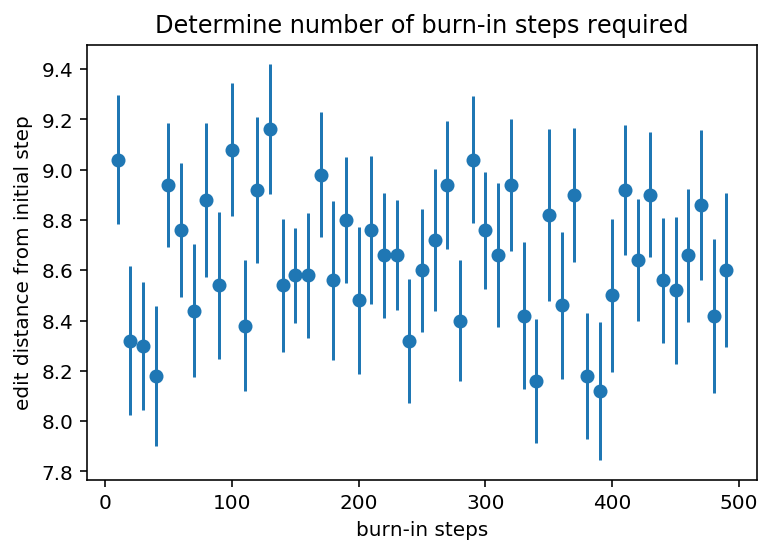

In [233]:
plt.figure()
plt.errorbar(burn_ins, distance_arr, yerr=std_arr, fmt='o')
plt.xlabel("burn-in steps")
plt.ylabel("edit distance from initial step")
plt.title("Determine number of burn-in steps required");

Great permutation!
```
accept 93 1.01894587706 [19, 1, 12, 6, 7, 3, 0, 10, 5, 9, 15, 18, 14, 2, 16, 11, 8, 17, 4, 13] -19.9409053199
```

In [226]:
burn_in = 100
num_samples = 20000
metropolis_opt_perm, metropolis_opt_val = metropolis_sample_strategy(X, teams, burn_in, greedy_perm, num_samples)
metropolis_sample_result = {"opt_perm": metropolis_opt_perm, \
                        "opt_value": metropolis_opt_val, \
                        "opt_team_list": team_order_from_perm_list(metropolis_opt_perm, teams)\
                       }
pp.pprint(metropolis_sample_result, compact=True)

Run 0 of 20000. Current optimal value is -20.5727.
accept 0 1.01935372175 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 1 1.00107632713 [17, 1, 0, 6, 4, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 7, 9, 19, 10]
accept 2 1.00344904526 [17, 1, 0, 6, 3, 4, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 7, 9, 19, 10]
accept 5 1.00753345549 [17, 1, 18, 6, 3, 4, 12, 13, 5, 16, 15, 0, 14, 2, 11, 8, 7, 9, 19, 10]
accept 8 1.02210372465 [14, 1, 18, 6, 3, 4, 12, 13, 5, 16, 15, 0, 17, 2, 11, 8, 7, 9, 19, 10]
accept 10 1.00235508067 [1, 14, 18, 6, 3, 4, 12, 13, 5, 16, 15, 0, 17, 2, 11, 8, 7, 9, 19, 10]
accept 11 1.00842124519 [1, 14, 18, 6, 15, 4, 12, 13, 5, 16, 3, 0, 17, 2, 11, 8, 7, 9, 19, 10]
accept 13 1.00763773708 [1, 14, 18, 6, 15, 4, 19, 13, 5, 16, 3, 0, 17, 2, 11, 8, 7, 9, 12, 10]
accept 17 1.02047772276 [1, 14, 18, 6, 15, 4, 19, 13, 5, 16, 3, 0, 8, 2, 11, 17, 7, 9, 12, 10]
accept 18 1.00812754322 [1, 14, 18, 13, 15, 4, 19, 6, 5, 16, 3, 0, 8, 2, 11, 17, 7, 9, 12, 10]
acce

accept 11 1.01335219247 [2, 1, 13, 6, 7, 5, 17, 11, 3, 16, 10, 18, 14, 12, 0, 8, 4, 9, 19, 15]
accept 12 1.00506514581 [2, 1, 4, 6, 7, 5, 17, 11, 3, 16, 10, 18, 14, 12, 0, 8, 13, 9, 19, 15]
accept 14 1.00688836001 [2, 1, 4, 13, 7, 5, 17, 11, 3, 16, 10, 18, 14, 12, 0, 8, 6, 9, 19, 15]
accept 16 1.00551230012 [2, 1, 4, 3, 7, 5, 17, 11, 13, 16, 10, 18, 14, 12, 0, 8, 6, 9, 19, 15]
accept 17 1.00354111278 [2, 1, 4, 3, 7, 5, 17, 11, 13, 16, 9, 18, 14, 12, 0, 8, 6, 10, 19, 15]
accept 18 1.00816675291 [2, 1, 4, 19, 7, 5, 17, 11, 13, 16, 9, 18, 14, 12, 0, 8, 6, 10, 3, 15]
accept 19 1.00049147455 [2, 1, 4, 19, 7, 15, 17, 11, 13, 16, 9, 18, 14, 12, 0, 8, 6, 10, 3, 5]
accept 21 1.01173876163 [2, 1, 4, 19, 7, 15, 17, 11, 3, 16, 9, 18, 14, 12, 0, 8, 6, 10, 13, 5]
accept 23 1.01425259438 [2, 1, 4, 19, 7, 15, 17, 9, 3, 16, 11, 18, 14, 12, 0, 8, 6, 10, 13, 5]
accept 25 1.01352057524 [2, 1, 4, 19, 7, 15, 17, 9, 3, 16, 11, 18, 13, 12, 0, 8, 6, 10, 14, 5]
accept 26 1.00062210031 [2, 1, 4, 19, 14, 15, 17, 

accept 36 1.00120500544 [13, 2, 10, 1, 4, 19, 11, 14, 15, 17, 3, 18, 16, 5, 7, 8, 12, 9, 0, 6]
accept 39 1.00027744595 [0, 2, 10, 1, 4, 19, 11, 14, 15, 17, 3, 18, 16, 5, 7, 8, 12, 9, 13, 6]
accept 41 1.00814717677 [0, 2, 10, 1, 4, 19, 16, 14, 15, 17, 3, 18, 11, 5, 7, 8, 12, 9, 13, 6]
accept 44 1.00113040524 [0, 2, 10, 1, 4, 19, 16, 14, 15, 17, 7, 18, 11, 5, 3, 8, 12, 9, 13, 6]
accept 50 1.00126490524 [0, 2, 10, 1, 4, 19, 16, 14, 15, 17, 18, 7, 11, 5, 3, 8, 12, 9, 13, 6]
accept 52 1.00165051249 [0, 2, 10, 1, 4, 19, 16, 14, 15, 17, 18, 7, 11, 5, 8, 3, 12, 9, 13, 6]
accept 57 1.00665737959 [0, 2, 10, 1, 4, 19, 16, 5, 15, 17, 18, 7, 11, 14, 8, 3, 12, 9, 13, 6]
accept 59 1.00258141495 [0, 16, 10, 1, 4, 19, 2, 5, 15, 17, 18, 7, 11, 14, 8, 3, 12, 9, 13, 6]
accept 60 1.00135240306 [0, 16, 10, 7, 4, 19, 2, 5, 15, 17, 18, 1, 11, 14, 8, 3, 12, 9, 13, 6]
accept 61 1.00448369786 [0, 16, 10, 7, 4, 19, 2, 5, 15, 14, 18, 1, 11, 17, 8, 3, 12, 9, 13, 6]
accept 63 1.00629533077 [0, 16, 10, 18, 4, 19, 2, 

accept 7 1.01416739833 [17, 13, 3, 11, 7, 15, 1, 12, 5, 16, 0, 18, 14, 6, 2, 8, 4, 9, 19, 10]
accept 9 1.00121060453 [17, 13, 3, 11, 7, 15, 1, 12, 5, 16, 0, 18, 14, 6, 2, 8, 4, 19, 9, 10]
accept 14 1.00788277968 [13, 17, 3, 11, 7, 15, 1, 12, 5, 16, 0, 18, 14, 6, 2, 8, 4, 19, 9, 10]
accept 16 1.00768946678 [13, 17, 3, 8, 7, 15, 1, 12, 5, 16, 0, 18, 14, 6, 2, 11, 4, 19, 9, 10]
accept 19 1.0020885131 [13, 17, 11, 8, 7, 15, 1, 12, 5, 16, 0, 18, 14, 6, 2, 3, 4, 19, 9, 10]
accept 20 1.01433421538 [13, 17, 11, 8, 7, 15, 1, 18, 5, 16, 0, 12, 14, 6, 2, 3, 4, 19, 9, 10]
accept 21 1.00201528331 [13, 17, 11, 8, 7, 15, 1, 18, 14, 16, 0, 12, 5, 6, 2, 3, 4, 19, 9, 10]
accept 23 1.00484532076 [2, 17, 11, 8, 7, 15, 1, 18, 14, 16, 0, 12, 5, 6, 13, 3, 4, 19, 9, 10]
accept 26 1.01911987991 [2, 17, 11, 1, 7, 15, 8, 18, 14, 16, 0, 12, 5, 6, 13, 3, 4, 19, 9, 10]
accept 36 1.00602882861 [2, 17, 11, 7, 1, 15, 8, 18, 14, 16, 0, 12, 5, 6, 13, 3, 4, 19, 9, 10]
accept 39 1.00150629689 [14, 17, 11, 7, 1, 15, 8, 18,

accept 82 1.00037391353 [11, 10, 4, 5, 1, 16, 8, 6, 13, 14, 7, 2, 9, 12, 15, 18, 17, 0, 3, 19]
accept 89 1.00558205908 [11, 10, 4, 0, 1, 16, 8, 6, 13, 14, 7, 2, 9, 12, 15, 18, 17, 5, 3, 19]
accept 1 1.00943979535 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 2 1.00248955299 [17, 1, 0, 6, 7, 3, 12, 13, 16, 5, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 3 1.00392403388 [17, 1, 0, 6, 7, 3, 12, 13, 16, 5, 10, 18, 14, 2, 11, 8, 4, 9, 19, 15]
accept 4 1.01105930299 [17, 1, 0, 6, 7, 13, 12, 3, 16, 5, 10, 18, 14, 2, 11, 8, 4, 9, 19, 15]
accept 5 1.00891652318 [17, 1, 0, 6, 7, 13, 12, 3, 16, 4, 10, 18, 14, 2, 11, 8, 5, 9, 19, 15]
accept 6 1.00725777858 [17, 1, 0, 6, 7, 13, 12, 3, 16, 4, 10, 18, 14, 2, 15, 8, 5, 9, 19, 11]
accept 7 1.00080161091 [17, 1, 0, 6, 13, 7, 12, 3, 16, 4, 10, 18, 14, 2, 15, 8, 5, 9, 19, 11]
accept 8 1.02216482984 [17, 1, 0, 6, 13, 7, 12, 3, 16, 18, 10, 4, 14, 2, 15, 8, 5, 9, 19, 11]
accept 11 1.01021834615 [1, 17, 0, 6, 13, 7, 12, 3, 16, 18

accept 7 1.0021815145 [9, 1, 0, 17, 7, 12, 3, 18, 5, 8, 15, 4, 6, 2, 11, 16, 13, 14, 19, 10]
accept 8 1.01421913179 [9, 1, 0, 17, 7, 12, 3, 18, 5, 8, 15, 4, 6, 2, 11, 10, 13, 14, 19, 16]
accept 9 1.00755209082 [9, 1, 0, 17, 7, 12, 3, 18, 5, 8, 19, 4, 6, 2, 11, 10, 13, 14, 15, 16]
accept 12 1.0022196554 [9, 1, 0, 2, 7, 12, 3, 18, 5, 8, 19, 4, 6, 17, 11, 10, 13, 14, 15, 16]
accept 14 1.00835063825 [9, 1, 0, 2, 7, 12, 3, 18, 4, 8, 19, 5, 6, 17, 11, 10, 13, 14, 15, 16]
accept 18 1.00680538999 [9, 1, 0, 2, 7, 17, 3, 18, 4, 8, 19, 5, 6, 12, 11, 10, 13, 14, 15, 16]
accept 20 1.00334824803 [9, 1, 0, 2, 7, 17, 3, 18, 4, 8, 19, 12, 6, 5, 11, 10, 13, 14, 15, 16]
accept 21 1.00353181704 [9, 1, 0, 2, 8, 17, 3, 18, 4, 7, 19, 12, 6, 5, 11, 10, 13, 14, 15, 16]
accept 23 1.0011134479 [9, 3, 0, 2, 8, 17, 1, 18, 4, 7, 19, 12, 6, 5, 11, 10, 13, 14, 15, 16]
accept 24 1.01350528552 [9, 4, 0, 2, 8, 17, 1, 18, 3, 7, 19, 12, 6, 5, 11, 10, 13, 14, 15, 16]
accept 26 1.00530447166 [9, 4, 0, 2, 8, 17, 1, 18, 3, 7,

accept 32 1.0049896389 [4, 2, 9, 1, 0, 17, 15, 14, 18, 13, 6, 3, 8, 5, 19, 16, 7, 12, 10, 11]
accept 33 1.00012023022 [4, 2, 9, 1, 14, 17, 15, 0, 18, 13, 6, 3, 8, 5, 19, 16, 7, 12, 10, 11]
accept 35 1.01430883941 [4, 2, 9, 1, 14, 15, 17, 0, 18, 13, 6, 3, 8, 5, 19, 16, 7, 12, 10, 11]
accept 43 1.01418305673 [4, 2, 9, 0, 14, 15, 17, 1, 18, 13, 6, 3, 8, 5, 19, 16, 7, 12, 10, 11]
accept 47 1.00418239627 [4, 2, 9, 0, 14, 15, 17, 1, 18, 12, 6, 3, 8, 5, 19, 16, 7, 13, 10, 11]
accept 50 1.00022698368 [4, 13, 9, 0, 14, 15, 17, 1, 18, 12, 6, 3, 8, 5, 19, 16, 7, 2, 10, 11]
accept 77 1.0029334344 [4, 13, 9, 0, 14, 15, 17, 1, 18, 12, 19, 3, 8, 5, 6, 16, 7, 2, 10, 11]
accept 0 1.01506835527 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 1 1.00346733425 [17, 1, 0, 11, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 6, 8, 4, 9, 19, 10]
accept 2 1.02087880877 [17, 1, 18, 11, 7, 3, 12, 13, 5, 16, 15, 0, 14, 2, 6, 8, 4, 9, 19, 10]
accept 3 1.02420362102 [17, 1, 18, 11, 7, 3, 12, 13, 5,

accept 92 1.00840707449 [4, 13, 11, 3, 12, 5, 1, 6, 2, 15, 18, 9, 19, 16, 8, 14, 17, 0, 10, 7]
accept 0 1.00413684008 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 1 1.00160584232 [7, 1, 0, 6, 17, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 3 1.02368581551 [7, 9, 0, 6, 17, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 1, 19, 10]
accept 4 1.01775198006 [7, 9, 0, 6, 17, 3, 12, 13, 5, 10, 15, 18, 14, 2, 11, 8, 4, 1, 19, 16]
accept 9 1.01339408673 [13, 9, 0, 6, 17, 3, 12, 7, 5, 10, 15, 18, 14, 2, 11, 8, 4, 1, 19, 16]
accept 11 1.01192029361 [13, 9, 0, 6, 17, 3, 8, 7, 5, 10, 15, 18, 14, 2, 11, 12, 4, 1, 19, 16]
accept 13 1.01518391359 [13, 9, 0, 6, 17, 3, 8, 7, 19, 10, 15, 18, 14, 2, 11, 12, 4, 1, 5, 16]
accept 15 1.01590942048 [13, 5, 0, 6, 17, 3, 8, 7, 19, 10, 15, 18, 14, 2, 11, 12, 4, 1, 9, 16]
accept 21 1.0162027699 [11, 5, 0, 6, 17, 3, 8, 7, 19, 10, 15, 18, 14, 2, 13, 12, 4, 1, 9, 16]
accept 26 1.0118398399 [11, 5, 0, 7, 17, 3, 8, 6, 19, 10

accept 44 1.01331718112 [13, 16, 2, 9, 6, 17, 1, 5, 18, 12, 4, 3, 11, 15, 8, 7, 14, 19, 0, 10]
accept 49 1.00113951981 [13, 16, 2, 9, 6, 17, 1, 5, 18, 15, 4, 3, 11, 12, 8, 7, 14, 19, 0, 10]
accept 55 1.00082149135 [0, 16, 2, 9, 6, 17, 1, 5, 18, 15, 4, 3, 11, 12, 8, 7, 14, 19, 13, 10]
accept 57 1.00033061561 [0, 16, 2, 5, 6, 17, 1, 9, 18, 15, 4, 3, 11, 12, 8, 7, 14, 19, 13, 10]
accept 76 1.00725626372 [1, 16, 2, 5, 6, 17, 0, 9, 18, 15, 4, 3, 11, 12, 8, 7, 14, 19, 13, 10]
accept 79 1.00409514148 [1, 16, 2, 5, 6, 17, 0, 7, 18, 15, 4, 3, 11, 12, 8, 9, 14, 19, 13, 10]
accept 0 1.01081769159 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 1 1.01218464638 [17, 1, 0, 6, 12, 3, 7, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 2 1.01867061792 [17, 1, 4, 6, 12, 3, 7, 13, 5, 16, 15, 18, 14, 2, 11, 8, 0, 9, 19, 10]
accept 3 1.01090379639 [17, 1, 4, 6, 12, 3, 7, 13, 5, 16, 15, 18, 14, 2, 11, 8, 0, 9, 10, 19]
accept 4 1.00612263183 [17, 1, 4, 5, 12, 3, 7, 13, 6, 

accept 2 1.01944300454 [17, 4, 0, 6, 7, 3, 10, 13, 5, 16, 15, 18, 14, 2, 11, 8, 1, 9, 19, 12]
accept 3 1.02194651442 [17, 4, 0, 6, 1, 3, 10, 13, 5, 16, 15, 18, 14, 2, 11, 8, 7, 9, 19, 12]
accept 5 1.00777727262 [17, 4, 0, 6, 1, 3, 10, 14, 5, 16, 15, 18, 13, 2, 11, 8, 7, 9, 19, 12]
accept 6 1.00248782912 [17, 4, 16, 6, 1, 3, 10, 14, 5, 0, 15, 18, 13, 2, 11, 8, 7, 9, 19, 12]
accept 7 1.01967932032 [17, 4, 16, 6, 1, 3, 10, 0, 5, 14, 15, 18, 13, 2, 11, 8, 7, 9, 19, 12]
accept 8 1.00834344188 [17, 4, 16, 6, 1, 3, 10, 0, 5, 14, 18, 15, 13, 2, 11, 8, 7, 9, 19, 12]
accept 11 1.00604063374 [17, 4, 16, 6, 1, 3, 10, 0, 5, 14, 18, 15, 13, 12, 11, 8, 7, 9, 19, 2]
accept 14 1.0129542499 [17, 4, 16, 6, 1, 3, 10, 7, 5, 14, 18, 15, 13, 12, 11, 8, 0, 9, 19, 2]
accept 16 1.00300679693 [17, 4, 16, 6, 1, 3, 10, 7, 5, 8, 18, 15, 13, 12, 11, 14, 0, 9, 19, 2]
accept 18 1.00176984428 [17, 4, 16, 6, 1, 2, 10, 7, 5, 8, 18, 15, 13, 12, 11, 14, 0, 9, 19, 3]
accept 21 1.00301942084 [17, 4, 16, 9, 1, 2, 10, 7, 5, 8,

accept 42 1.00147898212 [0, 18, 6, 7, 15, 19, 12, 8, 2, 3, 11, 17, 14, 16, 1, 9, 4, 5, 13, 10]
accept 50 1.00070859414 [0, 18, 6, 7, 10, 19, 12, 8, 2, 3, 11, 17, 14, 16, 1, 9, 4, 5, 13, 15]
accept 51 1.02842449761 [0, 18, 6, 7, 13, 19, 12, 8, 2, 3, 11, 17, 14, 16, 1, 9, 4, 5, 10, 15]
accept 62 1.00514439747 [0, 18, 6, 7, 13, 19, 12, 8, 2, 3, 11, 17, 4, 16, 1, 9, 14, 5, 10, 15]
accept 70 1.00742186067 [0, 18, 6, 7, 13, 19, 12, 8, 2, 3, 11, 17, 4, 15, 1, 9, 14, 5, 10, 16]
accept 75 1.00112419843 [0, 18, 6, 7, 13, 19, 2, 8, 12, 3, 11, 17, 4, 15, 1, 9, 14, 5, 10, 16]
accept 79 1.01025619948 [0, 18, 6, 7, 13, 19, 2, 8, 12, 3, 4, 17, 11, 15, 1, 9, 14, 5, 10, 16]
accept 0 1.01191665089 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 1 1.01370280932 [17, 1, 0, 6, 7, 15, 12, 13, 5, 16, 3, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 2 1.00287404973 [17, 1, 0, 6, 18, 15, 12, 13, 5, 16, 3, 7, 14, 2, 11, 8, 4, 9, 19, 10]
accept 3 1.00804346857 [17, 1, 10, 6, 18, 15, 12, 13,

accept 1 1.01491749825 [17, 12, 0, 6, 7, 3, 1, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 2 1.01664740979 [17, 12, 0, 6, 2, 3, 1, 13, 5, 16, 15, 18, 14, 7, 11, 8, 4, 9, 19, 10]
accept 3 1.0219060796 [17, 12, 0, 6, 2, 3, 11, 13, 5, 16, 15, 18, 14, 7, 1, 8, 4, 9, 19, 10]
accept 4 1.00376785225 [17, 12, 0, 14, 2, 3, 11, 13, 5, 16, 15, 18, 6, 7, 1, 8, 4, 9, 19, 10]
accept 5 1.01158477437 [16, 12, 0, 14, 2, 3, 11, 13, 5, 17, 15, 18, 6, 7, 1, 8, 4, 9, 19, 10]
accept 6 1.01053402198 [16, 12, 4, 14, 2, 3, 11, 13, 5, 17, 15, 18, 6, 7, 1, 8, 0, 9, 19, 10]
accept 7 1.01099934645 [18, 12, 4, 14, 2, 3, 11, 13, 5, 17, 15, 16, 6, 7, 1, 8, 0, 9, 19, 10]
accept 8 1.00394782099 [18, 12, 4, 14, 2, 3, 11, 13, 5, 19, 15, 16, 6, 7, 1, 8, 0, 9, 17, 10]
accept 10 1.00771912171 [18, 12, 15, 14, 2, 3, 11, 13, 5, 19, 4, 16, 6, 7, 1, 8, 0, 9, 17, 10]
accept 11 1.0016428217 [18, 12, 15, 14, 2, 3, 11, 13, 5, 8, 4, 16, 6, 7, 1, 19, 0, 9, 17, 10]
accept 16 1.00501965991 [18, 12, 15, 14, 2, 3, 11, 13, 5, 8,

accept 25 1.00703103691 [0, 19, 1, 13, 2, 7, 16, 6, 15, 10, 9, 8, 4, 12, 11, 18, 3, 14, 17, 5]
accept 30 1.00013273037 [0, 19, 1, 13, 2, 7, 16, 6, 14, 10, 9, 8, 4, 12, 11, 18, 3, 15, 17, 5]
accept 37 1.00572664385 [0, 19, 1, 13, 2, 7, 16, 6, 12, 10, 9, 8, 4, 14, 11, 18, 3, 15, 17, 5]
accept 39 1.01741337999 [0, 19, 1, 3, 2, 7, 16, 6, 12, 10, 9, 8, 4, 14, 11, 18, 13, 15, 17, 5]
accept 41 1.00236448355 [0, 19, 1, 3, 2, 7, 16, 6, 12, 10, 9, 11, 4, 14, 8, 18, 13, 15, 17, 5]
accept 47 1.00479924657 [0, 5, 1, 3, 2, 7, 16, 6, 12, 10, 9, 11, 4, 14, 8, 18, 13, 15, 17, 19]
accept 48 1.00048929223 [0, 5, 1, 3, 2, 7, 16, 6, 11, 10, 9, 12, 4, 14, 8, 18, 13, 15, 17, 19]
accept 59 1.00505839648 [0, 3, 1, 5, 2, 7, 16, 6, 11, 10, 9, 12, 4, 14, 8, 18, 13, 15, 17, 19]
accept 73 1.0040710425 [0, 3, 1, 5, 2, 7, 16, 6, 11, 10, 9, 12, 4, 14, 8, 18, 17, 15, 13, 19]
accept 75 1.00743944239 [0, 3, 9, 5, 2, 7, 16, 6, 11, 10, 1, 12, 4, 14, 8, 18, 17, 15, 13, 19]
accept 86 1.00580435127 [0, 13, 9, 5, 2, 7, 16, 6, 

accept 2 1.012729917 [17, 1, 0, 8, 7, 3, 12, 13, 4, 16, 15, 18, 14, 2, 11, 6, 5, 9, 19, 10]
accept 3 1.00398983157 [3, 1, 0, 8, 7, 17, 12, 13, 4, 16, 15, 18, 14, 2, 11, 6, 5, 9, 19, 10]
accept 6 1.02020698851 [3, 1, 0, 8, 7, 17, 12, 13, 2, 16, 15, 18, 14, 4, 11, 6, 5, 9, 19, 10]
accept 8 1.00726838037 [3, 1, 0, 8, 7, 17, 12, 13, 2, 16, 18, 15, 14, 4, 11, 6, 5, 9, 19, 10]
accept 10 1.00838096528 [3, 1, 0, 8, 7, 17, 12, 4, 2, 16, 18, 15, 14, 13, 11, 6, 5, 9, 19, 10]
accept 11 1.00148078463 [3, 1, 0, 8, 7, 17, 12, 4, 2, 16, 18, 15, 10, 13, 11, 6, 5, 9, 19, 14]
accept 12 1.00281806914 [3, 9, 0, 8, 7, 17, 12, 4, 2, 16, 18, 15, 10, 13, 11, 6, 5, 1, 19, 14]
accept 14 1.00267680431 [3, 9, 0, 8, 7, 17, 12, 4, 2, 16, 18, 15, 11, 13, 10, 6, 5, 1, 19, 14]
accept 15 1.01338500729 [3, 9, 0, 8, 7, 17, 6, 4, 2, 16, 18, 15, 11, 13, 10, 12, 5, 1, 19, 14]
accept 16 1.00281073328 [3, 9, 0, 8, 7, 17, 6, 14, 2, 16, 18, 15, 11, 13, 10, 12, 5, 1, 19, 4]
accept 20 1.00858425846 [3, 9, 0, 8, 7, 17, 6, 16, 2, 14

accept 12 1.01923014457 [1, 17, 3, 6, 7, 0, 12, 5, 18, 2, 15, 19, 14, 16, 13, 8, 4, 9, 11, 10]
accept 15 1.00467620268 [1, 17, 3, 6, 7, 0, 12, 5, 18, 2, 4, 19, 14, 16, 13, 8, 15, 9, 11, 10]
accept 18 1.00701756466 [1, 17, 3, 6, 7, 0, 12, 5, 18, 14, 4, 19, 2, 16, 13, 8, 15, 9, 11, 10]
accept 19 1.00226913023 [1, 17, 3, 6, 7, 0, 12, 5, 18, 14, 4, 9, 2, 16, 13, 8, 15, 19, 11, 10]
accept 24 1.00175911596 [1, 12, 3, 6, 7, 0, 17, 5, 18, 14, 4, 9, 2, 16, 13, 8, 15, 19, 11, 10]
accept 29 1.00686326868 [1, 12, 3, 6, 7, 0, 17, 5, 18, 14, 4, 11, 2, 16, 13, 8, 15, 19, 9, 10]
accept 30 1.00372799851 [1, 2, 3, 6, 7, 0, 17, 5, 18, 14, 4, 11, 12, 16, 13, 8, 15, 19, 9, 10]
accept 31 1.00774844649 [1, 2, 3, 6, 10, 0, 17, 5, 18, 14, 4, 11, 12, 16, 13, 8, 15, 19, 9, 7]
accept 34 1.01059857343 [1, 2, 3, 6, 10, 0, 17, 5, 18, 14, 4, 11, 16, 12, 13, 8, 15, 19, 9, 7]
accept 43 1.00409267967 [1, 2, 11, 6, 10, 0, 17, 5, 18, 14, 4, 3, 16, 12, 13, 8, 15, 19, 9, 7]
accept 46 1.00306110422 [1, 2, 11, 16, 10, 0, 17, 

accept 17 1.01485437978 [14, 13, 4, 6, 16, 3, 15, 1, 9, 11, 19, 12, 17, 2, 7, 8, 18, 5, 0, 10]
accept 19 1.00325298865 [14, 13, 4, 6, 16, 17, 15, 1, 9, 11, 19, 12, 3, 2, 7, 8, 18, 5, 0, 10]
accept 20 1.00733847206 [14, 13, 4, 6, 16, 12, 15, 1, 9, 11, 19, 17, 3, 2, 7, 8, 18, 5, 0, 10]
accept 22 1.00479532364 [14, 13, 4, 19, 16, 12, 15, 1, 9, 11, 6, 17, 3, 2, 7, 8, 18, 5, 0, 10]
accept 30 1.01232336598 [14, 13, 4, 19, 16, 12, 15, 1, 9, 11, 7, 17, 3, 2, 6, 8, 18, 5, 0, 10]
accept 37 1.00211276395 [14, 13, 4, 19, 16, 12, 15, 1, 9, 10, 7, 17, 3, 2, 6, 8, 18, 5, 0, 11]
accept 38 1.0072809399 [14, 13, 4, 19, 16, 12, 10, 1, 9, 15, 7, 17, 3, 2, 6, 8, 18, 5, 0, 11]
accept 44 1.00091807155 [9, 13, 4, 19, 16, 12, 10, 1, 14, 15, 7, 17, 3, 2, 6, 8, 18, 5, 0, 11]
accept 49 1.0003043792 [9, 13, 4, 19, 16, 12, 10, 1, 14, 15, 7, 17, 3, 2, 8, 6, 18, 5, 0, 11]
accept 52 1.00116382533 [9, 13, 4, 19, 16, 12, 10, 8, 14, 15, 7, 17, 3, 2, 1, 6, 18, 5, 0, 11]
accept 53 1.0013090328 [9, 13, 4, 12, 16, 19, 10, 8,

accept 15 1.00564616406 [1, 17, 3, 6, 11, 0, 9, 5, 13, 12, 4, 2, 15, 18, 7, 8, 14, 10, 19, 16]
accept 17 1.00525339649 [1, 17, 3, 6, 11, 0, 9, 5, 13, 12, 4, 2, 15, 18, 8, 7, 14, 10, 19, 16]
accept 22 1.00050502 [1, 17, 3, 6, 11, 0, 9, 5, 13, 12, 4, 2, 15, 7, 8, 18, 14, 10, 19, 16]
accept 23 1.01317554246 [1, 17, 3, 6, 11, 0, 9, 5, 13, 12, 4, 2, 15, 7, 8, 14, 18, 10, 19, 16]
accept 36 1.0085209401 [1, 17, 3, 6, 11, 0, 9, 7, 13, 12, 4, 2, 15, 5, 8, 14, 18, 10, 19, 16]
accept 37 1.00367037211 [1, 17, 3, 6, 11, 0, 9, 7, 19, 12, 4, 2, 15, 5, 8, 14, 18, 10, 13, 16]
accept 43 1.0016076284 [1, 13, 3, 6, 11, 0, 9, 7, 19, 12, 4, 2, 15, 5, 8, 14, 18, 10, 17, 16]
accept 46 1.00341032253 [1, 13, 3, 6, 11, 0, 9, 7, 8, 12, 4, 2, 15, 5, 19, 14, 18, 10, 17, 16]
accept 56 1.0006105718 [1, 13, 3, 6, 11, 17, 9, 7, 8, 12, 4, 2, 15, 5, 19, 14, 18, 10, 0, 16]
accept 59 1.00365769789 [3, 13, 1, 6, 11, 17, 9, 7, 8, 12, 4, 2, 15, 5, 19, 14, 18, 10, 0, 16]
accept 61 1.00017557041 [3, 13, 1, 18, 11, 17, 9, 7, 8, 

accept 18 1.0014092122 [15, 14, 0, 5, 7, 16, 12, 6, 18, 3, 4, 11, 1, 19, 13, 8, 17, 9, 2, 10]
accept 20 1.01542618097 [15, 14, 0, 5, 7, 16, 2, 6, 18, 3, 4, 11, 1, 19, 13, 8, 17, 9, 12, 10]
accept 23 1.00624726272 [15, 14, 0, 5, 11, 16, 2, 6, 18, 3, 4, 7, 1, 19, 13, 8, 17, 9, 12, 10]
accept 27 1.01217351897 [15, 14, 0, 5, 11, 16, 2, 6, 18, 3, 4, 7, 1, 19, 13, 8, 12, 9, 17, 10]
accept 30 1.0042874914 [3, 14, 0, 5, 11, 16, 2, 6, 18, 15, 4, 7, 1, 19, 13, 8, 12, 9, 17, 10]
accept 32 1.00693823587 [3, 14, 0, 5, 11, 16, 2, 6, 18, 15, 7, 4, 1, 19, 13, 8, 12, 9, 17, 10]
accept 38 1.00727919655 [3, 14, 0, 5, 11, 16, 2, 6, 18, 15, 7, 4, 19, 1, 13, 8, 12, 9, 17, 10]
accept 40 1.00317680411 [3, 14, 0, 5, 11, 10, 2, 6, 18, 15, 7, 4, 19, 1, 13, 8, 12, 9, 17, 16]
accept 43 1.00676838315 [3, 14, 0, 1, 11, 10, 2, 6, 18, 15, 7, 4, 19, 5, 13, 8, 12, 9, 17, 16]
accept 45 1.00746020938 [0, 14, 3, 1, 11, 10, 2, 6, 18, 15, 7, 4, 19, 5, 13, 8, 12, 9, 17, 16]
accept 47 1.00063628862 [0, 14, 3, 1, 11, 10, 2, 6, 

accept 57 1.00815294508 [4, 0, 11, 2, 5, 6, 9, 17, 13, 15, 19, 14, 3, 12, 1, 18, 7, 10, 8, 16]
accept 84 1.0077793649 [4, 0, 11, 2, 5, 19, 9, 17, 13, 15, 6, 14, 3, 12, 1, 18, 7, 10, 8, 16]
accept 95 1.00577073444 [4, 0, 5, 2, 11, 19, 9, 17, 13, 15, 6, 14, 3, 12, 1, 18, 7, 10, 8, 16]
accept 0 1.00710240921 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 2 1.01379252729 [17, 1, 0, 6, 5, 3, 12, 13, 7, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 3 1.01859525779 [17, 1, 0, 3, 5, 6, 12, 13, 7, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 4 1.01210388128 [17, 1, 0, 3, 5, 6, 16, 13, 7, 12, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 5 1.01148181782 [17, 15, 0, 3, 5, 6, 16, 13, 7, 12, 1, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 6 1.00093240221 [17, 15, 0, 3, 5, 6, 16, 4, 7, 12, 1, 18, 14, 2, 11, 8, 13, 9, 19, 10]
accept 8 1.00328642965 [17, 15, 0, 3, 5, 6, 16, 4, 7, 12, 1, 18, 14, 2, 11, 8, 9, 13, 19, 10]
accept 9 1.00052049274 [19, 15, 0, 3, 5, 6, 16, 4, 7, 12, 

accept 48 1.00163437347 [12, 11, 6, 17, 2, 10, 16, 14, 3, 8, 4, 13, 9, 5, 0, 7, 18, 15, 19, 1]
accept 51 1.00032951374 [12, 11, 6, 17, 2, 10, 16, 5, 3, 8, 4, 13, 9, 14, 0, 7, 18, 15, 19, 1]
accept 56 1.00529205558 [3, 11, 6, 17, 2, 10, 16, 5, 12, 8, 4, 13, 9, 14, 0, 7, 18, 15, 19, 1]
accept 58 1.00575285302 [3, 11, 6, 17, 2, 10, 16, 5, 12, 8, 4, 13, 9, 14, 0, 19, 18, 15, 7, 1]
accept 59 1.00508918338 [0, 11, 6, 17, 2, 10, 16, 5, 12, 8, 4, 13, 9, 14, 3, 19, 18, 15, 7, 1]
accept 63 1.00090026832 [0, 11, 6, 17, 2, 16, 10, 5, 12, 8, 4, 13, 9, 14, 3, 19, 18, 15, 7, 1]
accept 64 1.00560365547 [0, 11, 6, 17, 13, 16, 10, 5, 12, 8, 4, 2, 9, 14, 3, 19, 18, 15, 7, 1]
accept 65 1.01156600524 [0, 9, 6, 17, 13, 16, 10, 5, 12, 8, 4, 2, 11, 14, 3, 19, 18, 15, 7, 1]
accept 96 1.00531227365 [0, 9, 6, 17, 13, 19, 10, 5, 12, 8, 4, 2, 11, 14, 3, 16, 18, 15, 7, 1]
accept 0 1.00998651112 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 3 1.02348416284 [17, 1, 3, 6, 7, 0, 12, 13, 

accept 7 1.00985868561 [5, 1, 0, 8, 7, 18, 11, 13, 4, 16, 15, 3, 10, 2, 12, 6, 17, 9, 19, 14]
accept 8 1.00595926525 [5, 1, 0, 19, 7, 18, 11, 13, 4, 16, 15, 3, 10, 2, 12, 6, 17, 9, 8, 14]
accept 11 1.02479153309 [5, 1, 0, 2, 7, 18, 11, 13, 4, 16, 15, 3, 10, 19, 12, 6, 17, 9, 8, 14]
accept 13 1.00059670111 [5, 13, 0, 2, 7, 18, 11, 1, 4, 16, 15, 3, 10, 19, 12, 6, 17, 9, 8, 14]
accept 15 1.00697685905 [5, 13, 0, 2, 7, 16, 11, 1, 4, 18, 15, 3, 10, 19, 12, 6, 17, 9, 8, 14]
accept 17 1.01313929886 [5, 13, 0, 2, 16, 7, 11, 1, 4, 18, 15, 3, 10, 19, 12, 6, 17, 9, 8, 14]
accept 18 1.00454698223 [5, 13, 0, 2, 16, 7, 11, 1, 18, 4, 15, 3, 10, 19, 12, 6, 17, 9, 8, 14]
accept 20 1.0026681858 [5, 13, 0, 2, 16, 7, 10, 1, 18, 4, 15, 3, 11, 19, 12, 6, 17, 9, 8, 14]
accept 30 1.00585309004 [5, 13, 0, 2, 16, 7, 10, 1, 15, 4, 18, 3, 11, 19, 12, 6, 17, 9, 8, 14]
accept 32 1.00168893495 [5, 13, 0, 2, 16, 18, 10, 1, 15, 4, 7, 3, 11, 19, 12, 6, 17, 9, 8, 14]
accept 38 1.01137382592 [5, 13, 14, 2, 16, 18, 10, 1,

accept 15 1.00443406485 [17, 18, 1, 5, 16, 8, 10, 13, 2, 0, 4, 19, 9, 11, 3, 6, 15, 14, 7, 12]
accept 18 1.00334047949 [17, 18, 1, 5, 16, 8, 10, 13, 2, 0, 4, 19, 15, 11, 3, 6, 9, 14, 7, 12]
accept 19 1.00770405855 [17, 18, 1, 5, 16, 8, 10, 13, 2, 0, 4, 19, 15, 11, 3, 9, 6, 14, 7, 12]
accept 27 1.01537502289 [17, 18, 1, 5, 16, 7, 10, 13, 2, 0, 4, 19, 15, 11, 3, 9, 6, 14, 8, 12]
accept 33 1.01387321701 [17, 18, 1, 5, 16, 7, 10, 13, 2, 14, 4, 19, 15, 11, 3, 9, 6, 0, 8, 12]
accept 37 1.00108850953 [6, 18, 1, 5, 16, 7, 10, 13, 2, 14, 4, 19, 15, 11, 3, 9, 17, 0, 8, 12]
accept 45 1.01373071651 [6, 18, 1, 5, 16, 7, 10, 0, 2, 14, 4, 19, 15, 11, 3, 9, 17, 13, 8, 12]
accept 54 1.0108318836 [0, 18, 1, 5, 16, 7, 10, 6, 2, 14, 4, 19, 15, 11, 3, 9, 17, 13, 8, 12]
accept 75 1.00720500747 [0, 18, 1, 5, 16, 7, 10, 6, 19, 14, 4, 2, 15, 11, 3, 9, 17, 13, 8, 12]
accept 90 1.003792377 [0, 18, 1, 5, 16, 4, 10, 6, 19, 14, 7, 2, 15, 11, 3, 9, 17, 13, 8, 12]
accept 0 1.00993627781 [17, 1, 0, 6, 7, 3, 12, 13, 5,

accept 3 1.00664686233 [17, 1, 0, 6, 7, 3, 12, 13, 8, 16, 15, 18, 14, 11, 2, 10, 4, 9, 19, 5]
accept 4 1.01266384634 [17, 1, 0, 6, 7, 3, 12, 13, 8, 16, 15, 18, 14, 19, 2, 10, 4, 9, 11, 5]
accept 6 1.01817782455 [3, 1, 0, 6, 7, 17, 12, 13, 8, 16, 15, 18, 14, 19, 2, 10, 4, 9, 11, 5]
accept 7 1.00903315792 [3, 1, 0, 6, 2, 17, 12, 13, 8, 16, 15, 18, 14, 19, 7, 10, 4, 9, 11, 5]
accept 8 1.01139485051 [3, 17, 0, 6, 2, 1, 12, 13, 8, 16, 15, 18, 14, 19, 7, 10, 4, 9, 11, 5]
accept 9 1.00943550027 [3, 17, 4, 6, 2, 1, 12, 13, 8, 16, 15, 18, 14, 19, 7, 10, 0, 9, 11, 5]
accept 10 1.00477788257 [3, 17, 4, 19, 2, 1, 12, 13, 8, 16, 15, 18, 14, 6, 7, 10, 0, 9, 11, 5]
accept 11 1.01014397904 [3, 17, 4, 19, 2, 1, 12, 13, 8, 16, 11, 18, 14, 6, 7, 10, 0, 9, 15, 5]
accept 14 1.00476767331 [3, 17, 4, 19, 2, 1, 14, 13, 8, 16, 11, 18, 12, 6, 7, 10, 0, 9, 15, 5]
accept 16 1.01077951651 [3, 17, 4, 19, 2, 1, 14, 0, 8, 16, 11, 18, 12, 6, 7, 10, 13, 9, 15, 5]
accept 17 1.00159045343 [3, 17, 4, 19, 2, 1, 14, 0, 8, 1

accept 6 1.01143560635 [17, 18, 19, 0, 7, 3, 12, 13, 5, 1, 15, 16, 10, 2, 11, 8, 4, 9, 6, 14]
accept 8 1.01881179543 [17, 18, 19, 0, 7, 3, 12, 13, 5, 1, 15, 16, 10, 2, 8, 11, 4, 9, 6, 14]
accept 18 1.00246037063 [17, 18, 11, 0, 7, 3, 12, 13, 5, 1, 15, 16, 10, 2, 8, 19, 4, 9, 6, 14]
accept 21 1.0133646856 [16, 18, 11, 0, 7, 3, 12, 13, 5, 1, 15, 17, 10, 2, 8, 19, 4, 9, 6, 14]
accept 22 1.01617826466 [16, 18, 11, 0, 7, 3, 12, 13, 14, 1, 15, 17, 10, 2, 8, 19, 4, 9, 6, 5]
accept 23 1.00100193096 [16, 18, 11, 0, 1, 3, 12, 13, 14, 7, 15, 17, 10, 2, 8, 19, 4, 9, 6, 5]
accept 24 1.01423860423 [16, 18, 11, 0, 1, 3, 12, 13, 14, 7, 2, 17, 10, 15, 8, 19, 4, 9, 6, 5]
accept 27 1.00567212445 [16, 18, 11, 0, 1, 3, 12, 13, 14, 7, 4, 17, 10, 15, 8, 19, 2, 9, 6, 5]
accept 28 1.01267886843 [16, 18, 11, 0, 1, 14, 12, 13, 3, 7, 4, 17, 10, 15, 8, 19, 2, 9, 6, 5]
accept 33 1.00771356146 [5, 18, 11, 0, 1, 14, 12, 13, 3, 7, 4, 17, 10, 15, 8, 19, 2, 9, 6, 16]
accept 34 1.00399261929 [5, 2, 11, 0, 1, 14, 12, 13, 

accept 62 1.01224650444 [17, 13, 11, 5, 2, 0, 8, 12, 19, 6, 4, 16, 10, 1, 7, 14, 18, 9, 3, 15]
accept 81 1.01168315019 [1, 13, 11, 5, 2, 0, 8, 12, 19, 6, 4, 16, 10, 17, 7, 14, 18, 9, 3, 15]
accept 82 1.00597563085 [1, 13, 11, 5, 2, 0, 8, 6, 19, 12, 4, 16, 10, 17, 7, 14, 18, 9, 3, 15]
accept 96 1.01202616533 [1, 13, 11, 5, 2, 0, 8, 6, 19, 12, 4, 16, 3, 17, 7, 14, 18, 9, 10, 15]
accept 0 1.00668480213 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 1 1.01800264446 [17, 1, 0, 6, 7, 3, 12, 16, 5, 13, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 2 1.0116281814 [17, 1, 0, 18, 7, 3, 12, 16, 5, 13, 15, 6, 14, 2, 11, 8, 4, 9, 19, 10]
accept 3 1.00514080748 [17, 1, 0, 18, 7, 15, 12, 16, 5, 13, 3, 6, 14, 2, 11, 8, 4, 9, 19, 10]
accept 4 1.00869817024 [17, 1, 0, 18, 7, 15, 12, 2, 5, 13, 3, 6, 14, 16, 11, 8, 4, 9, 19, 10]
accept 6 1.00428749171 [17, 1, 0, 18, 7, 15, 12, 2, 5, 13, 3, 6, 14, 16, 11, 9, 4, 8, 19, 10]
accept 7 1.01708347253 [17, 12, 0, 18, 7, 15, 1, 2, 5, 13

accept 14 1.00173759878 [4, 9, 0, 5, 6, 3, 12, 17, 7, 10, 14, 2, 15, 19, 18, 8, 13, 1, 11, 16]
accept 16 1.0226658689 [4, 9, 0, 5, 6, 3, 12, 17, 7, 10, 14, 2, 13, 19, 18, 8, 15, 1, 11, 16]
accept 17 1.00040526099 [4, 9, 0, 5, 6, 3, 12, 17, 7, 10, 19, 2, 13, 14, 18, 8, 15, 1, 11, 16]
accept 23 1.02204940026 [4, 9, 0, 5, 6, 3, 12, 17, 7, 10, 19, 2, 11, 14, 18, 8, 15, 1, 13, 16]
accept 26 1.00783197687 [4, 9, 0, 5, 6, 3, 12, 17, 7, 10, 19, 2, 11, 14, 8, 18, 15, 1, 13, 16]
accept 27 1.00464650922 [4, 9, 0, 5, 6, 7, 12, 17, 3, 10, 19, 2, 11, 14, 8, 18, 15, 1, 13, 16]
accept 34 1.00289846971 [4, 12, 0, 5, 6, 7, 9, 17, 3, 10, 19, 2, 11, 14, 8, 18, 15, 1, 13, 16]
accept 36 1.00129794476 [4, 12, 11, 5, 6, 7, 9, 17, 3, 10, 19, 2, 0, 14, 8, 18, 15, 1, 13, 16]
accept 47 1.00183078913 [4, 12, 11, 7, 6, 5, 9, 17, 3, 10, 19, 2, 0, 14, 8, 18, 15, 1, 13, 16]
accept 58 1.00325441345 [4, 12, 11, 7, 6, 5, 9, 15, 3, 10, 19, 2, 0, 14, 8, 18, 17, 1, 13, 16]
accept 63 1.0061858587 [4, 12, 11, 7, 6, 5, 15, 9, 

accept 18 1.007366219 [13, 17, 16, 6, 14, 3, 19, 5, 12, 7, 8, 11, 18, 1, 0, 15, 4, 9, 2, 10]
accept 19 1.00207990558 [13, 17, 16, 6, 14, 3, 15, 5, 12, 7, 8, 11, 18, 1, 0, 19, 4, 9, 2, 10]
accept 22 1.01162884908 [13, 17, 16, 6, 14, 3, 15, 5, 12, 19, 8, 11, 18, 1, 0, 7, 4, 9, 2, 10]
accept 29 1.01046788595 [13, 17, 16, 6, 14, 3, 15, 5, 18, 19, 8, 11, 12, 1, 0, 7, 4, 9, 2, 10]
accept 30 1.01199272742 [13, 17, 16, 6, 14, 19, 15, 5, 18, 3, 8, 11, 12, 1, 0, 7, 4, 9, 2, 10]
accept 37 1.00571574191 [13, 17, 16, 6, 14, 19, 15, 5, 18, 3, 8, 11, 12, 1, 0, 7, 10, 9, 2, 4]
accept 40 1.00179290467 [13, 17, 16, 6, 14, 19, 15, 5, 18, 3, 8, 11, 10, 1, 0, 7, 12, 9, 2, 4]
accept 49 1.0070744771 [13, 17, 16, 12, 14, 19, 15, 5, 18, 3, 8, 11, 10, 1, 0, 7, 6, 9, 2, 4]
accept 61 1.00837478619 [13, 17, 16, 12, 14, 19, 15, 5, 18, 3, 8, 2, 10, 1, 0, 7, 6, 9, 11, 4]
accept 65 1.00755106981 [13, 17, 16, 12, 14, 19, 15, 5, 18, 10, 8, 2, 3, 1, 0, 7, 6, 9, 11, 4]
accept 68 1.00244203275 [13, 17, 16, 12, 14, 19, 15, 

accept 39 1.00623316311 [9, 12, 1, 14, 8, 16, 10, 6, 0, 2, 3, 17, 11, 5, 15, 7, 13, 18, 19, 4]
accept 48 1.00083691631 [9, 0, 1, 14, 8, 16, 10, 6, 12, 2, 3, 17, 11, 5, 15, 7, 13, 18, 19, 4]
accept 51 1.00712843761 [9, 0, 1, 14, 12, 16, 10, 6, 8, 2, 3, 17, 11, 5, 15, 7, 13, 18, 19, 4]
accept 55 1.00001367565 [9, 0, 1, 14, 12, 16, 10, 6, 8, 2, 3, 17, 11, 5, 13, 7, 15, 18, 19, 4]
accept 63 1.00017364104 [9, 0, 1, 2, 12, 16, 10, 6, 8, 14, 3, 17, 11, 5, 13, 7, 15, 18, 19, 4]
accept 65 1.00348034824 [9, 0, 1, 2, 5, 16, 10, 6, 8, 14, 3, 17, 11, 12, 13, 7, 15, 18, 19, 4]
accept 67 1.00708575397 [9, 0, 1, 2, 5, 16, 10, 6, 8, 14, 7, 17, 11, 12, 13, 3, 15, 18, 19, 4]
accept 68 1.00444143372 [9, 0, 1, 2, 5, 16, 10, 6, 8, 14, 7, 17, 11, 12, 19, 3, 15, 18, 13, 4]
accept 70 1.01310995004 [9, 0, 1, 2, 16, 5, 10, 6, 8, 14, 7, 17, 11, 12, 19, 3, 15, 18, 13, 4]
accept 71 1.0052900003 [9, 0, 1, 2, 16, 5, 10, 6, 8, 15, 7, 17, 11, 12, 19, 3, 14, 18, 13, 4]
accept 78 1.00012393691 [9, 0, 1, 2, 11, 5, 10, 6, 

accept 73 1.00274292284 [15, 3, 11, 7, 10, 16, 2, 6, 12, 17, 19, 14, 4, 5, 9, 18, 13, 8, 0, 1]
accept 76 1.00453851286 [15, 14, 11, 7, 10, 16, 2, 6, 12, 17, 19, 3, 4, 5, 9, 18, 13, 8, 0, 1]
accept 77 1.00998201778 [15, 14, 11, 7, 10, 16, 2, 6, 13, 17, 19, 3, 4, 5, 9, 18, 12, 8, 0, 1]
accept 78 1.00483132479 [17, 14, 11, 7, 10, 16, 2, 6, 13, 15, 19, 3, 4, 5, 9, 18, 12, 8, 0, 1]
accept 93 1.00541496773 [17, 14, 10, 7, 11, 16, 2, 6, 13, 15, 19, 3, 4, 5, 9, 18, 12, 8, 0, 1]
accept 94 1.00580546301 [12, 14, 10, 7, 11, 16, 2, 6, 13, 15, 19, 3, 4, 5, 9, 18, 17, 8, 0, 1]
accept 1 1.00197264794 [17, 1, 0, 6, 7, 3, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 10]
accept 2 1.00774357045 [17, 1, 0, 6, 7, 10, 12, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 3]
accept 3 1.0081947766 [17, 1, 0, 12, 7, 10, 6, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 3]
accept 4 1.00958038312 [17, 1, 7, 12, 0, 10, 6, 13, 5, 16, 15, 18, 14, 2, 11, 8, 4, 9, 19, 3]
accept 5 1.00023768377 [17, 1, 7, 12, 0, 10, 6, 13, 5, 

accept 25 1.00460300726 [5, 4, 14, 6, 2, 18, 16, 13, 1, 3, 7, 11, 0, 10, 15, 8, 17, 9, 19, 12]
accept 28 1.00343132037 [5, 4, 14, 6, 2, 18, 16, 13, 1, 3, 7, 19, 0, 10, 15, 8, 17, 9, 11, 12]
accept 32 1.00475091165 [5, 4, 14, 17, 2, 18, 16, 13, 1, 3, 7, 19, 0, 10, 15, 8, 6, 9, 11, 12]
accept 35 1.00566442254 [5, 4, 14, 17, 2, 18, 16, 13, 1, 3, 7, 19, 0, 10, 9, 8, 6, 15, 11, 12]
accept 36 1.00773535348 [5, 4, 14, 17, 2, 18, 16, 13, 1, 3, 7, 19, 0, 6, 9, 8, 10, 15, 11, 12]
accept 39 1.01466933393 [5, 4, 14, 17, 2, 18, 16, 13, 19, 3, 7, 1, 0, 6, 9, 8, 10, 15, 11, 12]
accept 40 1.00742394219 [5, 4, 8, 17, 2, 18, 16, 13, 19, 3, 7, 1, 0, 6, 9, 14, 10, 15, 11, 12]
accept 41 1.01618694747 [5, 4, 8, 17, 2, 18, 1, 13, 19, 3, 7, 16, 0, 6, 9, 14, 10, 15, 11, 12]
accept 48 1.00276707977 [5, 13, 8, 17, 2, 18, 1, 4, 19, 3, 7, 16, 0, 6, 9, 14, 10, 15, 11, 12]
accept 56 1.00539268397 [5, 13, 8, 17, 2, 18, 9, 4, 19, 3, 7, 16, 0, 6, 1, 14, 10, 15, 11, 12]
accept 59 1.00867266371 [5, 13, 8, 17, 2, 18, 9, 4

accept 1 1.01346990098 [17, 1, 0, 6, 14, 3, 12, 13, 5, 16, 15, 18, 7, 2, 11, 8, 4, 9, 19, 10]
accept 2 1.01168136573 [17, 1, 0, 6, 14, 5, 12, 13, 3, 16, 15, 18, 7, 2, 11, 8, 4, 9, 19, 10]
accept 3 1.00586563469 [17, 1, 0, 6, 14, 5, 12, 4, 3, 16, 15, 18, 7, 2, 11, 8, 13, 9, 19, 10]
accept 5 1.01814433512 [17, 1, 0, 6, 8, 5, 12, 4, 3, 16, 15, 18, 7, 2, 11, 14, 13, 9, 19, 10]
accept 6 1.01981015174 [17, 1, 0, 6, 8, 5, 12, 4, 3, 16, 15, 18, 7, 2, 11, 14, 13, 9, 10, 19]
accept 8 1.01439541598 [17, 1, 0, 6, 8, 5, 12, 4, 3, 16, 18, 15, 7, 2, 11, 14, 13, 9, 10, 19]
accept 9 1.00353624872 [17, 1, 0, 8, 6, 5, 12, 4, 3, 16, 18, 15, 7, 2, 11, 14, 13, 9, 10, 19]
accept 11 1.00442976761 [17, 1, 0, 8, 6, 5, 12, 4, 7, 16, 18, 15, 3, 2, 11, 14, 13, 9, 10, 19]
accept 12 1.00301571683 [17, 1, 7, 8, 6, 5, 12, 4, 0, 16, 18, 15, 3, 2, 11, 14, 13, 9, 10, 19]
accept 13 1.00079960067 [17, 1, 7, 8, 6, 13, 12, 4, 0, 16, 18, 15, 3, 2, 11, 14, 5, 9, 10, 19]
accept 15 1.00921872473 [17, 1, 7, 8, 6, 3, 12, 4, 0, 16,

KeyboardInterrupt: 

## Convex Programming Strategy

#### Permutation matrices

In [65]:
from birkhoff import to_permutation_matrix as to_permutation_matrix
def perm_matrix_from_list(perm_list):
    """
        Takes an ordered list of integers and returns a permutation matrix.
    """
    ## check list 'full'
    n_range = list(range(len(perm_list)))
    if( not (sorted(perm_list) == n_range)):
        raise(ValueError("perm_list doesn't contain all integers from 0 to %d" % (len(perm_list) -1 )))
    perm_dict = dict(zip(n_range, perm_list))    
    return to_permutation_matrix(perm_dict) 

In [63]:
perm_matrix_from_list(a)

array([[ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.],
       [ 1.,  0.,  0.,  0.,  0.]])